# Employee Fatigue Prediction Score

## Import Libraries

In [ ]:
!pip install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor,ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

import pickle
import os

## Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Since data is in form of csv file we have to use pandas read_csv to load the data
train_df = pd.read_csv("/content/train.csv")
#original_test_df = pd.read_csv("/content/test.csv")
#test_df = original_test_df.copy()
test_df = pd.read_csv("/content/test.csv")

Dataset Fields description:

1.  **Employee ID** : Unique identifier of the employee
2.  **Date of Joining** : Date on which the employee joined the company
3.  **Gender** : Gender of the employee
4.  **Company Type** : Type of company [eg: Service based, Product based, etc.]
5.  **WFH Setup Available** : Whether proper work from home setup is available or not
6.  **Age** : Age of employee
7.  **Tenure** : Number of years in the organization
8.  **Vacations taken** : Number of vacations taken
9.  **Designation** : Seniority level of the employee in codes
10. **Average Hours worked per day** : Hours allocated per day
11. **Employee Satisfaction Score** : Satisfaction score provided by the employees
12. **Mental Fatigue Score** : Dependent Variable [ to be predicted ]

In [ ]:
# Check the data
train_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52


## Validating the dataset entries



In [ ]:
# Get Statistical overview of the dataset
train_df.describe() 

,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
count,22750.000000,22750.000000,22750.000000,22750.000000,21369.000000,20633.000000,21739.000000
mean,43.036967,10.499516,5.955341,2.178725,4.481398,5.728188,0.449656
std,12.931466,5.776066,3.736712,1.135145,2.047211,1.920839,0.200365
min,21.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,5.000000,3.000000,1.000000,3.000000,4.600000,0.310000
50%,43.000000,10.000000,6.000000,2.000000,4.000000,5.900000,0.450000
75%,54.000000,16.000000,9.000000,3.000000,6.000000,7.100000,0.590000
max,65.000000,20.000000,12.000000,5.000000,10.000000,10.000000,1.000000


In [ ]:
# Check for columns with null values, data types and total no. of records 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   22750 non-null  object 
 1   Date of Joining               22750 non-null  object 
 2   Gender                        22750 non-null  object 
 3   Company Type                  22750 non-null  object 
 4   WFH Setup Available           22750 non-null  object 
 5   Age                           22750 non-null  int64  
 6   Tenure                        22750 non-null  int64  
 7   Vacations taken               22750 non-null  int64  
 8   Designation                   22750 non-null  int64  
 9   Average Hours worked per day  21369 non-null  float64
 10  Employee satisfaction score   20633 non-null  float64
 11  Mental Fatigue Score          21739 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
# Recheck for null values
train_df.isnull().sum()

Employee ID                        0
Date of Joining                    0
Gender                             0
Company Type                       0
WFH Setup Available                0
Age                                0
Tenure                             0
Vacations taken                    0
Designation                        0
Average Hours worked per day    1381
Employee satisfaction score     2117
Mental Fatigue Score            1011
dtype: int64

In [ ]:
train_df['w1'] = train_df[['Designation','Employee satisfaction score']].groupby("Designation").transform(lambda x: x.fillna(x.mean()))
train_df['w1'].isnull().sum()

0

In [ ]:
# Treating Null values

# Replace missing values in categorial columns using knnImpute
from sklearn.impute import KNNImputer

def nullValuesHandle(df):
  ## Section I:

  # You may also consider replacing the values by mean

  # Replace the NaN rows of Average Hours Worked per day with avg value
  avgHrsMean = round(df['Average Hours worked per day'].mean(),2)
  df['Average Hours worked per day'].fillna(avgHrsMean, inplace=True)

  # Replace the NaN rows of Employee satisfaction score with avg value
  #avgEmpSatisfactionMean = round(train_df['Employee satisfaction score'].mean(), 1)
  #df['Employee satisfaction score'].fillna(avgEmpSatisfactionMean, inplace=True)

  df['Employee satisfaction score'] = df[['Designation','Employee satisfaction score']].groupby("Designation").transform(lambda x: x.fillna(x.mean()))

  #df.head()

  ## Section II:

  # Since there are less than 25% rows with null values, we can drop them. (Here we drop rows with blank mental Fatigue score)

  # Append these records to test data
  #test_df=pd.concat([test_df, train_df.loc[train_df['Mental Fatigue Score'].isnull(), :'Mental Fatigue Score']])

  #imputer = KNNImputer(n_neighbors=2)
  #imputer.fit_transform(df)


  # If there were few rows with null values:
  df.dropna(inplace = True)

  # Final check for null rows
  df.isnull().sum()

  return df



In [ ]:
train_df = nullValuesHandle(train_df)

In [ ]:
# Check Unique values & their occurrance in the data set

print("*****Gender Distribution*****  \n ",train_df["Gender"].value_counts(), "\n") 
print("*****Company Type Distribution***** \n ",train_df["Company Type"].value_counts(),"\n")
print("*****WFH Setup Available Distribution*****  \n ",train_df["WFH Setup Available"].value_counts(), "\n") 
print("*****Age Distribution*****  \n ",train_df["Age"].value_counts(), "\n") 
print("*****Tenure Distribution*****  \n ",train_df["Tenure"].value_counts(), "\n") 
print("*****Vacations taken Distribution*****  \n ",train_df["Vacations taken"].value_counts(), "\n") 
print("*****Designation Distribution*****  \n ",train_df["Designation"].value_counts(), "\n") 
print("*****Average Hours worked per day Distribution*****  \n ",train_df["Average Hours worked per day"].value_counts(), "\n") 
print("*****Employee satisfaction score Distribution*****  \n ",train_df["Employee satisfaction score"].value_counts(), "\n") 


*****Gender Distribution*****  
  Female    10356
Male       9417
Name: Gender, dtype: int64 

*****Company Type Distribution***** 
  Service    12925
Product     6848
Name: Company Type, dtype: int64 

*****WFH Setup Available Distribution*****  
  Yes    10658
No      9115
Name: WFH Setup Available, dtype: int64 

*****Age Distribution*****  
  32    487
24    483
54    480
49    476
60    473
50    463
64    462
43    460
36    460
37    456
63    456
46    455
45    454
33    453
41    452
21    451
58    445
34    443
44    441
51    440
52    439
31    439
26    438
55    437
59    432
57    432
56    431
48    429
42    429
27    428
35    428
61    424
47    423
25    423
28    423
53    421
22    419
62    418
38    418
30    417
29    413
65    409
23    407
39    404
40    402
Name: Age, dtype: int64 

*****Tenure Distribution*****  
  2     1044
17    1043
16    1015
3     1005
6     1005
18    1002
4     1000
20     998
14     996
7      989
5      988
11     988
10     98

## Exploratory data analysis

In [ ]:
## Not required as we will be removing this field because we have Tenure feature
"""
#From the description, Date of Joining is of object data type. In order to use this column properly for prediction, we convert the datatype into timestamp.
#We use pandas to_datetime() to convert object data type to datetime dtype.
#Note: .dt.day method extracts only day of that date, .dt.month method will get only the month of that date & .dt.year method will return year

train_df["Joining day"] = pd.to_datetime(train_df["Date of Joining"], format="%d/%m/%Y").dt.day
train_data["Joining month"] = pd.to_datetime(train_df["Date of Joining"], format = "%d/%m/%Y").dt.month
train_df["Joining year"] = pd.to_datetime(train_df["Date of Joining"], format="%d/%m/%Y").dt.year
"""

'\n#From the description, Date of Joining is of object data type. In order to use this column properly for prediction, we convert the datatype into timestamp.\n#We use pandas to_datetime() to convert object data type to datetime dtype.\n#Note: .dt.day method extracts only day of that date, .dt.month method will get only the month of that date & .dt.year method will return year\n\ntrain_df["Joining day"] = pd.to_datetime(train_df["Date of Joining"], format="%d/%m/%Y").dt.day\ntrain_data["Joining month"] = pd.to_datetime(train_df["Date of Joining"], format = "%d/%m/%Y").dt.month\ntrain_df["Joining year"] = pd.to_datetime(train_df["Date of Joining"], format="%d/%m/%Y").dt.year\n'

In [ ]:
# Since we have the Tenure column to determine the no. of yrs of an employee in an organization, we can drop Date of Joining.
train_df.drop(["Date of Joining"], axis = 1, inplace = True)

#### **Handling categorical data**
Types of categorical data :
1. **Nominal data** --> data not in any order --> **OneHotEncoder** 
2. **Ordinal data** --> data in order --> **LabelEncoder** 

In [ ]:
# Perfom OneHotEncoding on Nominal Categorical data
# features: Gender, Company Type, WFH Setup Available
'''
onehotencoder = OneHotEncoder() #(categories='auto')(categorical_features = [0])
feature_arr = onehotencoder.fit_transform(train_df[['Gender','Company Type','WFH Setup Available']]).toarray()

feature_labels = onehotencoder.categories_ 
feature_labels = np.array(feature_labels).ravel()    # Get new column names

features = pd.DataFrame(feature_arr, columns=feature_labels)
features.head()

'''
# source = pd.get_dummies(train_df[['Gender', 'Company Type', 'WFH Setup Available']], drop_first= True)
# source.head()
## Not required.. we can directly opt for label encoding

"\nonehotencoder = OneHotEncoder() #(categories='auto')(categorical_features = [0])\nfeature_arr = onehotencoder.fit_transform(train_df[['Gender','Company Type','WFH Setup Available']]).toarray()\n\nfeature_labels = onehotencoder.categories_ \nfeature_labels = np.array(feature_labels).ravel()    # Get new column names\n\nfeatures = pd.DataFrame(feature_arr, columns=feature_labels)\nfeatures.head()\n\n"

In [ ]:
# To Convert Age column to range, lets know the limits
train_df['Age'].min(), train_df['Age'].max()

(21, 65)

In [ ]:
# Convert Age column to range
def categorizeAge(age):

  ''' 
  if age <=20:
    return "less than 20"
  elif age <= 25:
    return "21-25"
  elif age <=30 :
    return "26-30"
  elif age <= 35:
    return "31-35"
  elif age <= 40:
    return "36-40"
  elif age <= 45:
    return "41-45"
  elif age <=50:
    return "46-50"
  elif age <=55:
    return "51-55"
  elif age <=60:
    return "56-60"
  elif age <=65:
    return "61-65"
  else :
    return "more than 65"
  '''

  if age <=20:
    return "less than 20"
  elif age <= 30:
    return "21-30"
  elif age <=40 :
    return "31-40"
  elif age <= 50:
    return "40-50"
  elif age <= 60:
    return "50-60"
  else:
    return "more than 60"
  


train_df['Age Category'] = train_df["Age"].apply(categorizeAge)

In [ ]:
# Label Encoding - Convert Categorical Columns to Numerical

labelencoder_age = LabelEncoder()    # creating instance of labelencoder & Assign numerical values and store in another column
train_df['Age Num Category'] = labelencoder_age.fit_transform(train_df['Age Category'])

labelencoder_gender = LabelEncoder()
train_df['Gender Category'] = labelencoder_gender.fit_transform(train_df['Gender'])

labelencoder_companyType = LabelEncoder()
train_df['Company Type Category'] = labelencoder_companyType.fit_transform(train_df['Company Type'])

labelencoder_wfhSetup = LabelEncoder()
train_df['WFH Setup Available Category'] = labelencoder_wfhSetup.fit_transform(train_df['WFH Setup Available'])

### Data Visualization

**When to use which plot?**
*(https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70)*
1. histogram/ Countplot/ Bar Plot : Univariant - when we need the count of the variable in a plot (Check distribution of a feature).
2. multi histogram : Univariant - To check distribution/no. of rows of a feature's multiple variable.
3. Pie chart : Univariant - Used when it is difficult to compare sections of the chart. Bar plot is used instead as comparing sections is easy. (Check distribution of a feature) - Feature count should tally to 100%
4. Time Series : Single/Multi vaiant - Use when single or multiple variables are to be plotted over time.
5. Box/Violin plot - use when we require to use the overall statistical information on the distribution of the data. It can be used to detect outliers in the data.
6. TwinAxis : Multivariant - helps in visualizing plotting 2 plots w.r.t to the y-axis and same x-axis. It should be used when we require 2 plots or grouped data in the same direction.
7. 

#### Deal with Outliers

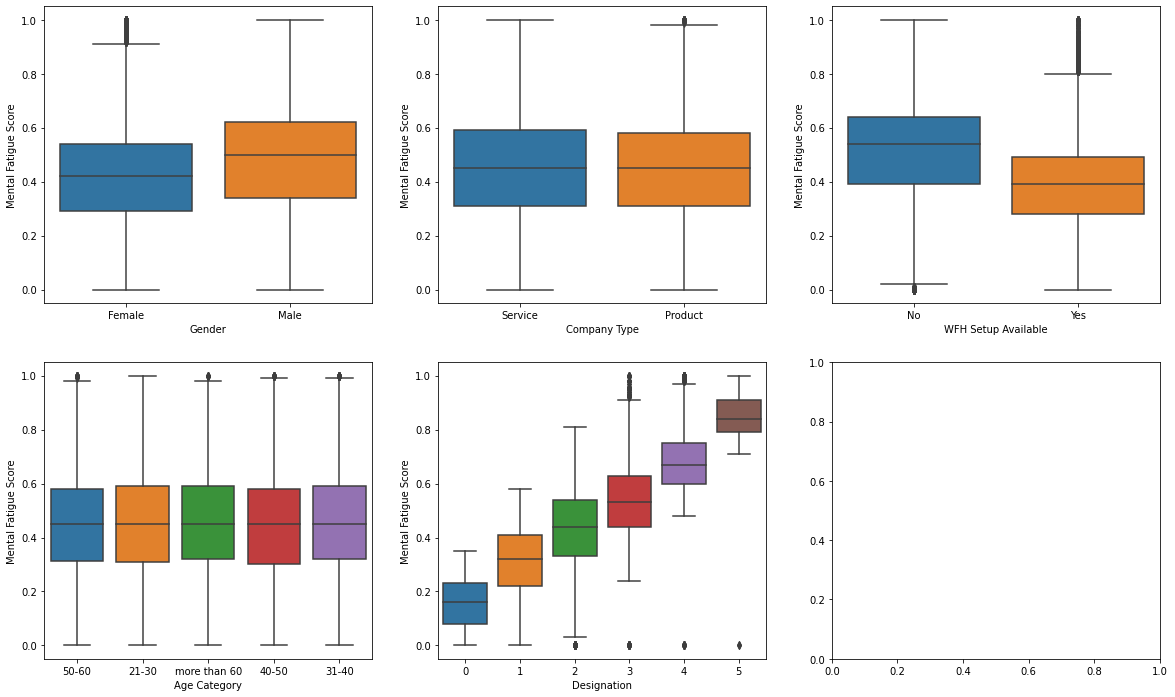

In [ ]:
# Check for Outliers in categorical features
col=['Gender', 'Company Type', 'WFH Setup Available', 'Age Category','Designation']
#sns.boxplot(y='Mental Fatigue Score', x='Average Hours worked per day', data=train_df);

fig, ax = plt.subplots(2, 3, figsize=(20,12))
for var, subplot in zip(col, ax.flatten()):
    sns.boxplot(x=var, y='Mental Fatigue Score', data=train_df, ax=subplot)

Conclusions from above charts:

1. Avg Mental Fatigue for those with WFH setup is less
2. The fatigue score is not impacted by the Age Category and company Type
3. Avg Fatigue score is more seen in Males compared to females
4. Outliers exists in Designation

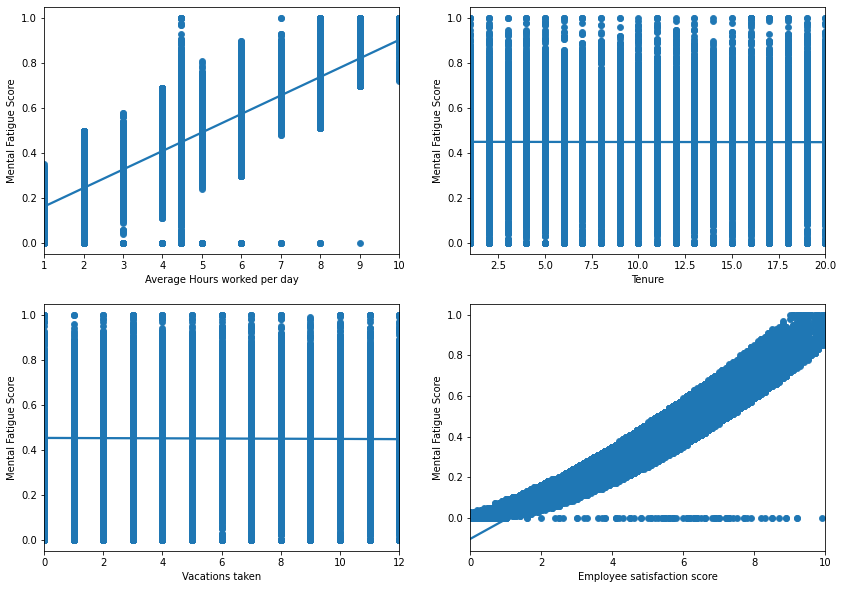

In [ ]:
# Check for Outliers in numerical features
col=['Average Hours worked per day','Tenure','Vacations taken', 'Employee satisfaction score']

fig, ax = plt.subplots(2, 2, figsize=(14,10))
for var, subplot in zip(col, ax.flatten()):
    sns.scatterplot(x=var, y='Mental Fatigue Score', data=train_df, ax=subplot)
    sns.regplot(x=var, y='Mental Fatigue Score', data=train_df, ax=subplot)

Conclusions from above charts:
1. Outlier exists in Avg hours worked per day.
2. Mental Fatigue is not impacted by Tenure and Vacations taken

In [ ]:
# Check outlier count
print(train_df.loc[(((train_df['Average Hours worked per day']>=5) | (train_df['Designation']>=3) | (train_df['Employee satisfaction score']>3)) & (train_df['Mental Fatigue Score']==0 ))].count())

# Since the count is too small, we will remove them

Employee ID                     112
Gender                          112
Company Type                    112
WFH Setup Available             112
Age                             112
Tenure                          112
Vacations taken                 112
Designation                     112
Average Hours worked per day    112
Employee satisfaction score     112
Mental Fatigue Score            112
w1                              112
Age Category                    112
Age Num Category                112
Gender Category                 112
Company Type Category           112
WFH Setup Available Category    112
dtype: int64


In [ ]:
#train_df[['Designation','Mental Fatigue Score']].groupby('Designation').mean().set_index('Designation')['Mental Fatigue Score']
#train_df.loc[(train_df['Designation'] >=3) & (train_df['Mental Fatigue Score']==0)].map()

In [ ]:
# Replace the outliers with mean values based on designation:
#train_df.loc[(train_df['Designation'] >=3) & (train_df['Mental Fatigue Score']==0),'Mental Fatigue Score'] = train_df[train_df['Designation']>3,'Mental Fatigue Score'].groupby('Designation').transform(lambda x: x.mean())

In [ ]:
#train_df.loc[(train_df['Employee satisfaction score'] >=3) & (train_df['Mental Fatigue Score']==0),'Mental Fatigue Score'] = train_df[train_df['Employee satisfaction score']>3]['Mental Fatigue Score'].mean()
#train_df.loc[(train_df['Average Hours worked per day'] >=3) & (train_df['Mental Fatigue Score']==0),'Mental Fatigue Score'] = train_df[train_df['Average Hours worked per day']>5]['Mental Fatigue Score'].mean()

In [ ]:
#train_df.drop(train_df.loc[(train_df['Employee satisfaction score'] >=3) & (train_df['Mental Fatigue Score']==0)].index,axis=0, inplace=True)

In [ ]:
# Remove outliers
train_df.drop(train_df.loc[(((train_df['Average Hours worked per day']>=5) | (train_df['Designation']>=3)) & (train_df['Mental Fatigue Score']==0 ))].index, axis=0, inplace=True)

#### Evaluate Relations between features

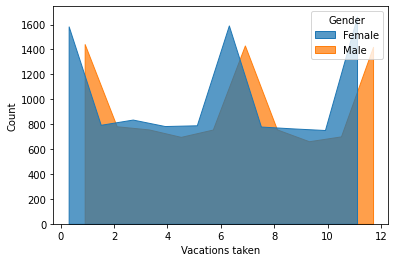

In [ ]:
# Check Distribution of Dataset
# Check Vacation Hours taken based on Gender
# multiple{“layer”, “dodge”, “stack”, “fill”}, element{“bars”, “step”, “poly”}
sns.histplot(data=train_df, x="Vacations taken",bins=10, hue="Gender", multiple="dodge", element="poly")

In [ ]:
# Gender vs Mental Fatigue Score (kind = box, boxen, violin)
#sns.catplot(y = "Mental Fatigue Score", x = "Gender", data = train_df.sort_values("Mental Fatigue Score", ascending = False), kind="box", height = 4, aspect = 2)
#plt.show()


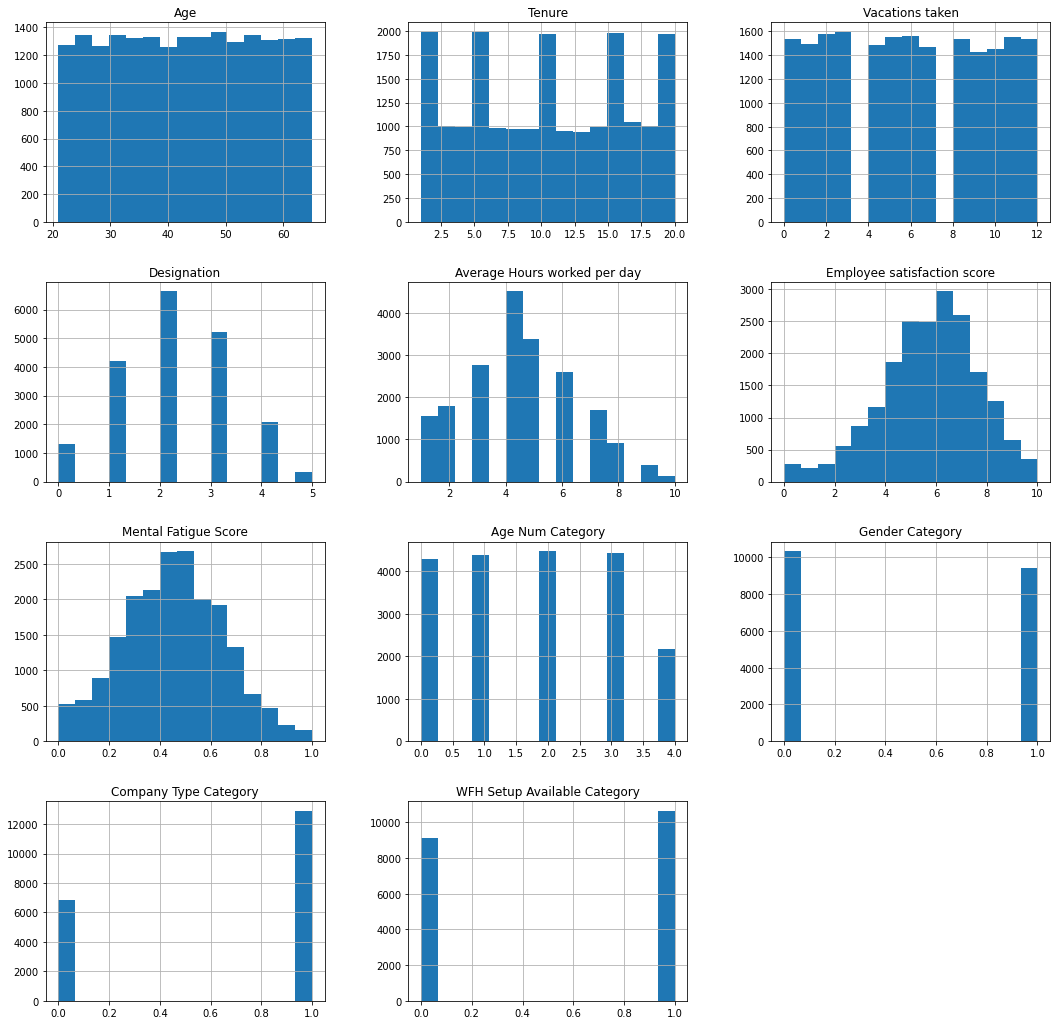

In [ ]:
# Graphical Representation of count & unique values in Features - Check data distribution
train_df.hist(bins=15, figsize=(18, 18));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

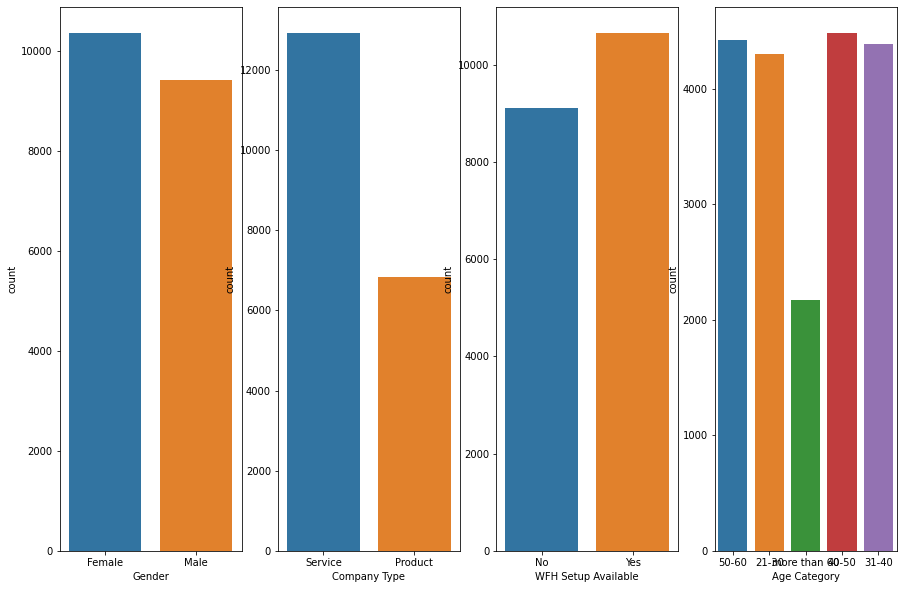

In [ ]:
categorical=['Gender', 'Company Type', 'WFH Setup Available', 'Age Category']

fig, ax = plt.subplots(1, 4, figsize=(15, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(train_df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(0)

'\nConclusion: Higher the Emp Satisfaction score and Designation, higher the value of Mental Fatigue score.\n'

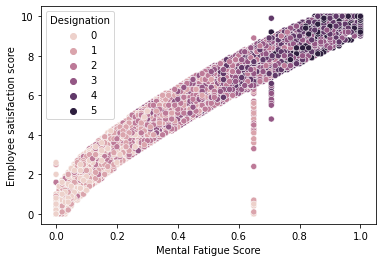

In [ ]:
# Display Relation between Emp Satisfaction Score, Designation and Mental Fatigue Score
sns.scatterplot(x='Mental Fatigue Score', y='Employee satisfaction score', data=train_df, hue='Designation');
#sns.lmplot(x='Mental Fatigue Score', y='Employee satisfaction score', data=train_df);
'''
Conclusion: Higher the Emp Satisfaction score and Designation, higher the value of Mental Fatigue score.
'''

'\nMental Fatigue Score Increases with Designation\n'

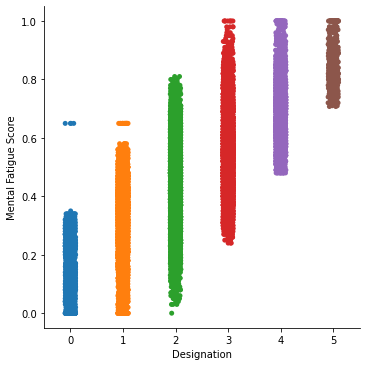

In [ ]:
# View Relation between Designation & Mental Fatigue Score
sns.catplot(x="Designation", y="Mental Fatigue Score", data=train_df);

'''
Mental Fatigue Score Increases with Designation
'''

'\nHigher the Designation, higher the Emp Satisfaction score\n'

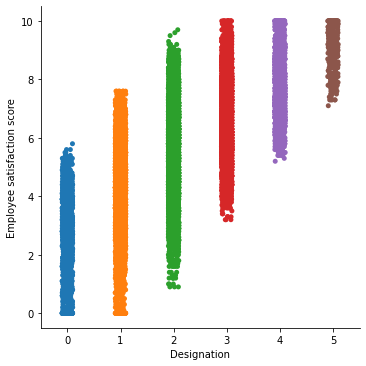

In [ ]:
# Reviewing Designation & Employee Satisfaction Score
sns.catplot(x="Designation", y="Employee satisfaction score", data=train_df);

'''
Higher the Designation, higher the Emp Satisfaction score
'''

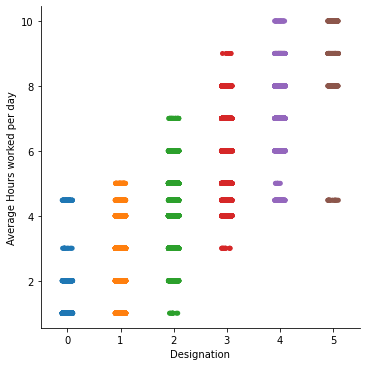

In [ ]:
sns.catplot(x="Designation", y="Average Hours worked per day", data=train_df);

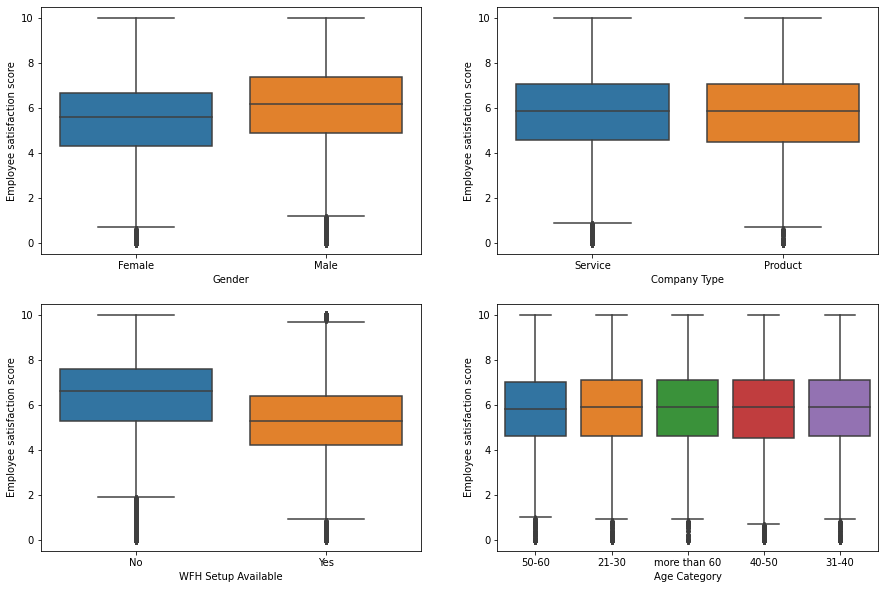

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Employee satisfaction score', data=train_df, ax=subplot)

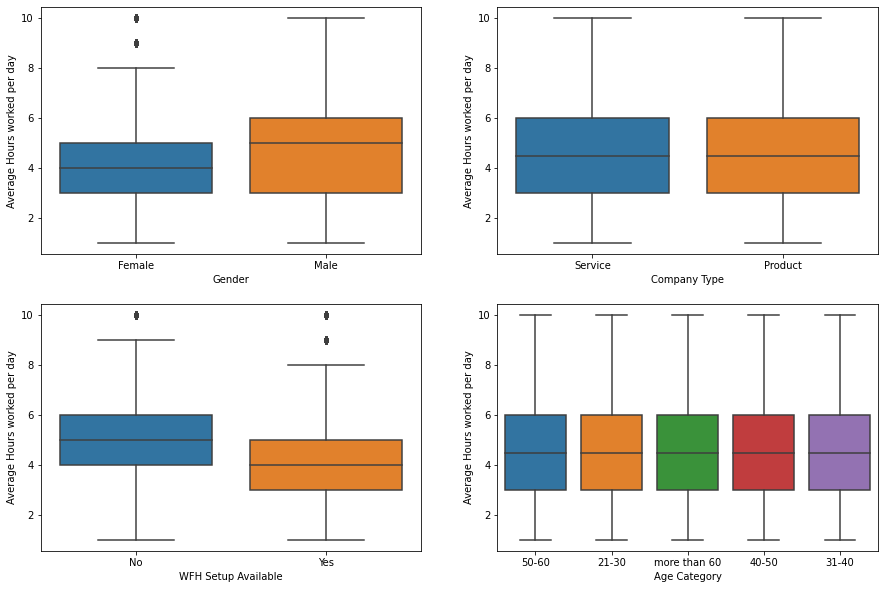

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Average Hours worked per day', data=train_df, ax=subplot)

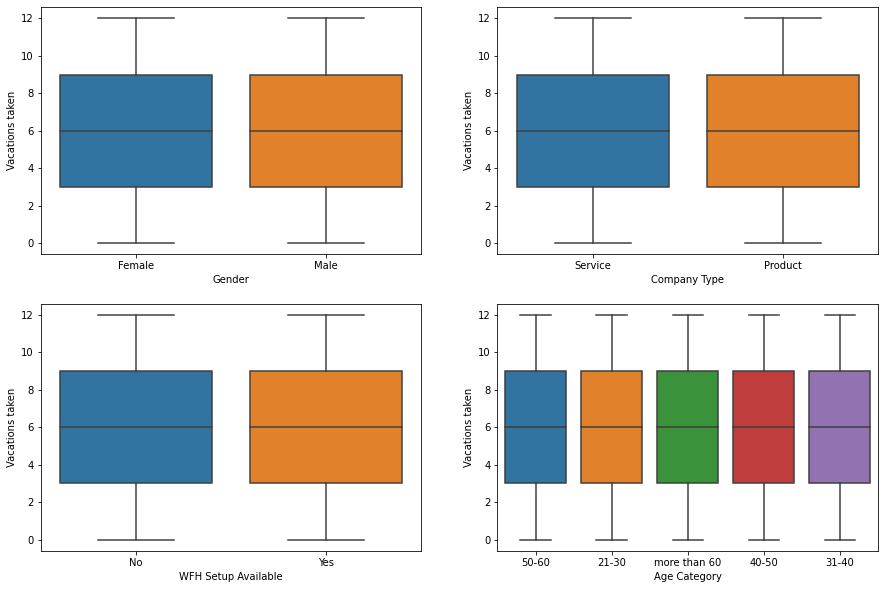

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Vacations taken', data=train_df, ax=subplot)

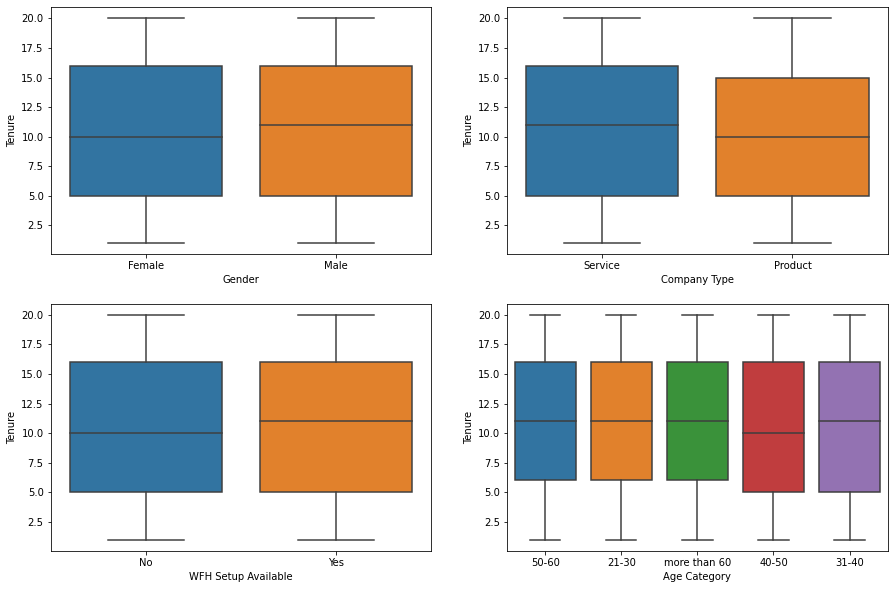

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='Tenure', data=train_df, ax=subplot)

In [ ]:
# Tenure vs Fatigue Score
#chart = sns.catplot(y = "Mental Fatigue Score", x = "Tenure", data = train_df.sort_values("Mental Fatigue Score", ascending = False), kind="box", height = 4, aspect = 2)
#chart.set_xticklabels(rotation=30)
#plt.show()

### Normalize the dataset
Correlation will be maintained & model will be easily trained

In [ ]:

'''
df = train_df.drop(['Employee ID', 'Gender', 'Company Type', 'WFH Setup Available', 'Age Category', 'Age'],axis=1)
minValues = df.min()
range_df = (df - minValues).max()
df_scaled = (df - minValues)/range_df

df_scaled.head()
'''

# OR

scaler=MinMaxScaler()
train_df[['Tenure Scaled','Employee satisfaction score Scaled', 'Average Hours worked per day Scaled', 'Vacations taken Scaled']] = scaler.fit_transform(train_df[['Tenure','Employee satisfaction score', 'Average Hours worked per day', 'Vacations taken']])

In [ ]:
train_df.head()

,Employee ID,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,Age Category,Age Num Category,Gender Category,Company Type Category,WFH Setup Available Category,Tenure Scaled,Employee satisfaction score Scaled,Average Hours worked per day Scaled,Vacations taken Scaled
0,fffe32003000360033003200,Female,Service,No,52,18,8,2,3.00,3.8,0.16,50-60,3,0,1,0,0.894737,0.38,0.222222,0.666667
1,fffe3700360033003500,Male,Service,Yes,26,12,4,1,2.00,5.0,0.36,21-30,0,1,1,1,0.578947,0.50,0.111111,0.333333
2,fffe31003300320037003900,Female,Product,Yes,63,20,4,2,4.48,5.8,0.49,more than 60,4,0,0,1,1.000000,0.58,0.386667,0.333333
3,fffe32003400380032003900,Male,Service,Yes,59,20,12,1,1.00,2.6,0.20,50-60,3,1,1,1,1.000000,0.26,0.000000,1.000000
4,fffe31003900340031003600,Female,Service,No,63,10,9,3,7.00,6.9,0.52,more than 60,4,0,1,0,0.473684,0.69,0.666667,0.750000


[]

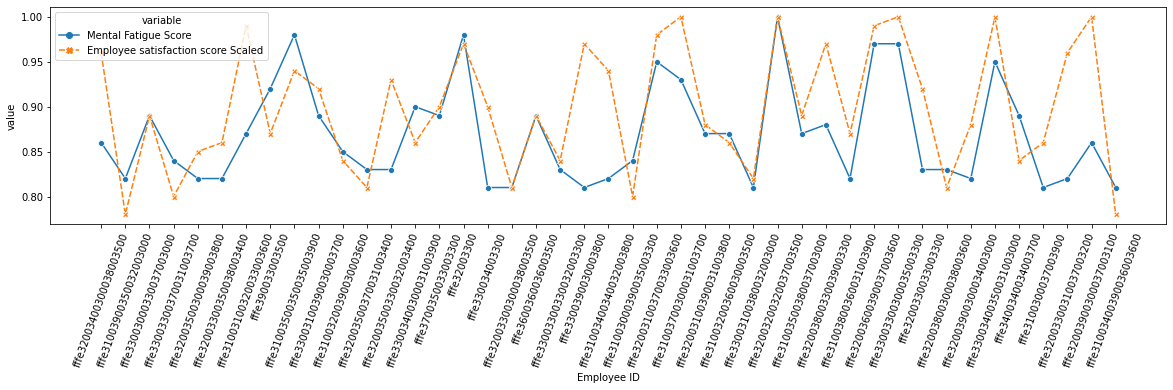

In [ ]:
# Satisfaction vs Fatigue Score
df = train_df.loc[((train_df['Age']<25) & (train_df['Gender']=='Male')& (train_df['Mental Fatigue Score']>0.80)),["Mental Fatigue Score",'Employee ID','Employee satisfaction score Scaled']]
plt.figure(figsize=(20,4))
chart = sns.lineplot(x="Employee ID", y='value', hue='variable', data=pd.melt(df,['Employee ID']), palette="tab10", markers=True,style="variable")
plt.setp(chart.get_xticklabels(), rotation=70)

#male_chart = sns.lineplot(x="Employee ID", y='value', hue='variable', data=pd.melt(df,['Employee ID']), palette="tab10", markers=True,style="variable")
plt.plot()



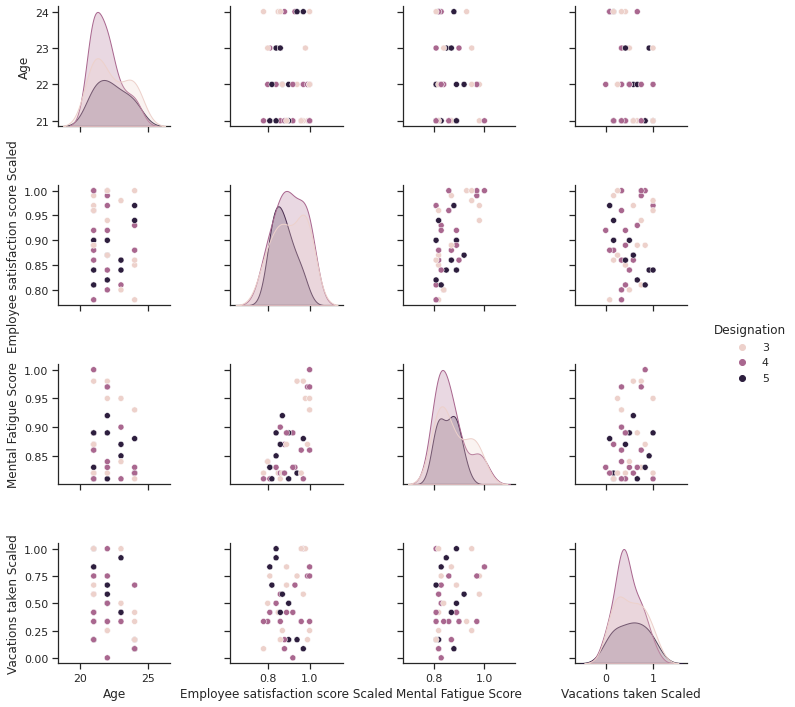

In [ ]:
sns.set_theme(style="ticks")

#sns.pairplot(train_df, hue="Designation")

df=train_df.loc[((train_df['Age']<25) & (train_df['Gender']=='Male')& (train_df['Mental Fatigue Score']>0.80)),["Mental Fatigue Score",'Employee satisfaction score Scaled', 'Designation', 'Vacations taken Scaled', 'Gender Category', 'Age']]
sns.pairplot(df, hue="Designation", vars=["Age", "Employee satisfaction score Scaled",  "Mental Fatigue Score", "Vacations taken Scaled"])

### Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods:

1. **heatmap**
2. **feature_importance_**
3. **SelectKBest**
4. **PCA**

In [ ]:
train_df.shape

(19764, 20)

In [ ]:
train_df.columns

Index(['Employee ID', 'Gender', 'Company Type', 'WFH Setup Available', 'Age',
       'Tenure', 'Vacations taken', 'Designation',
       'Average Hours worked per day', 'Employee satisfaction score',
       'Mental Fatigue Score', 'Age Category', 'Age Num Category',
       'Gender Category', 'Company Type Category',
       'WFH Setup Available Category', 'Tenure Scaled',
       'Employee satisfaction score Scaled',
       'Average Hours worked per day Scaled', 'Vacations taken Scaled'],
      dtype='object')

#### Check for highly Corelated columns before performing feature selection

In [ ]:
# Heatmap - Finds correlation between Independent and dependent attributes
def checkCorrelation(df):
  plt.figure(figsize=(15,8))                   
  sns.set(font_scale=1.1)
  sns.heatmap(df.corr(),annot=True, cmap = "RdYlGn")
       

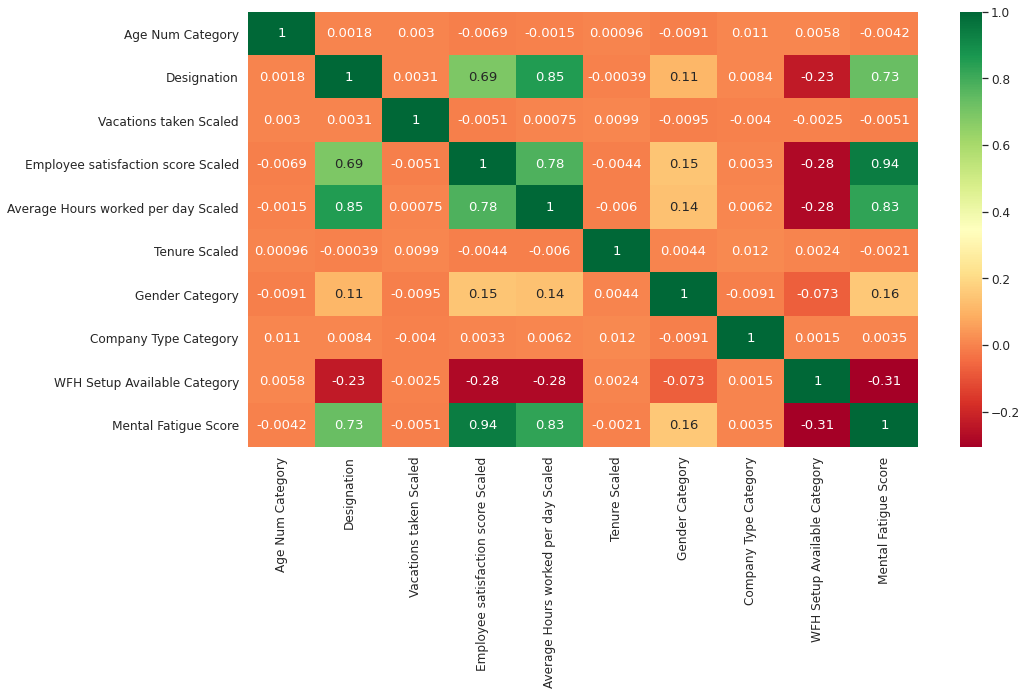

In [ ]:
checkCorrelation(train_df[['Age Num Category','Designation','Vacations taken Scaled','Employee satisfaction score Scaled','Average Hours worked per day Scaled','Tenure Scaled','Gender Category', 'Company Type Category','WFH Setup Available Category','Mental Fatigue Score']])

From the heat map above, we conclude below information:
1. Fatigue score highly depends on the features :-
*   Designation
*   Employee Satisfaction Score
*   Average hours worked per day

2.   Features that are correlated are : Designation, Employee Satisfaction Score and Avg hours worked per day



In [ ]:
# Check multicolinearity
"""
Test for detection of Multicollinearity
1. Variance Inflation Factor(VIF)
– If VIF=1; No multicollinearity
– If VIF=<5; Low multicollinearity or moderately correlated
– If VIF=>5; High multicollinearity or highly correlated

2. Tolerance(Reciprocal of VIF)
– If VIF is high then tolerance will be low i.e, high multicollinearity.
– If VIF is low the tolerance will be high i.e, low multicollinearity.
"""

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_check(columns):
  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data["feature"] = columns

  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(train_df[columns].values, i)
                          for i in range(len(columns))]

  print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
VIF_check(['Designation', 'Gender Category', 'WFH Setup Available Category', 'Employee satisfaction score', 'Average Hours worked per day Scaled'])

                               feature        VIF
0                          Designation  17.046285
1                      Gender Category   1.905342
2         WFH Setup Available Category   1.800934
3          Employee satisfaction score  13.595579
4  Average Hours worked per day Scaled  19.015668


In [ ]:
"""
Solutions for Multicollinearity
1. Drop the variables causing the problem.
– If using a large number of X-variables, a stepwise regression could be used to determine which of the variables to drop.
– Removing collinear X-variables is the simplest method of solving the multicollinearity problem.
2. If all the X-variables are retained, then avoid making inferences about the individual parameters. Also, restrict inferences about the mean value of Y of values to X that lie in the experimental region.
3. Re-code the form of the independent variables.
For example, if x1 and x2 are collinear, you might try using x1 and the ratio x2/x1 instead.
4. Ridge and Lasso Regression– This is an alternative estimation procedure to ordinary least squares. Penalizes for the duplicate information and shrinks or drops to zero the parameters of a regression model.
5. By standardizing the variables i.e, by subtracting the mean value or taking the deviated forms of the variables (xi=Xi-mean(X))
6. Increase in sample size may sometimes solve the problem of multicollinearity.
"""

train_df['Employee satisfaction score std'] = train_df['Employee satisfaction score']-train_df['Employee satisfaction score'].mean()
train_df['Average Hours worked per day Scaled std'] = train_df['Average Hours worked per day Scaled']-train_df['Average Hours worked per day Scaled'].mean()

VIF_check(['Designation', 'Gender Category', 'WFH Setup Available Category', 'Employee satisfaction score std', 'Average Hours worked per day Scaled std'])

                                   feature       VIF
0                              Designation  3.372296
1                          Gender Category  1.826217
2             WFH Setup Available Category  2.212129
3          Employee satisfaction score std  2.567021
4  Average Hours worked per day Scaled std  3.099080


In [ ]:
# Correlation remains same after update
#checkCorrelation(train_df[['Designation','Employee satisfaction score std','Average Hours worked per day Scaled std','Gender Category', 'WFH Setup Available Category','Mental Fatigue Score']])

#### Perform feature selection

##### Feature Importance using ExtraTreeRegressor

In [ ]:
# Feature Importance - Find Important features for determining the target using ExtraTreesRegressor

X = train_df[['Designation', 'Age Num Category', 'Gender Category', 'Company Type Category', 'WFH Setup Available Category', 'Tenure Scaled', 'Employee satisfaction score std', 'Average Hours worked per day Scaled std', 'Vacations taken Scaled']]
y = train_df['Mental Fatigue Score']

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)


[0.08900668 0.01272266 0.00554406 0.0053728  0.00727309 0.01834173
 0.59362479 0.25115163 0.01696254]


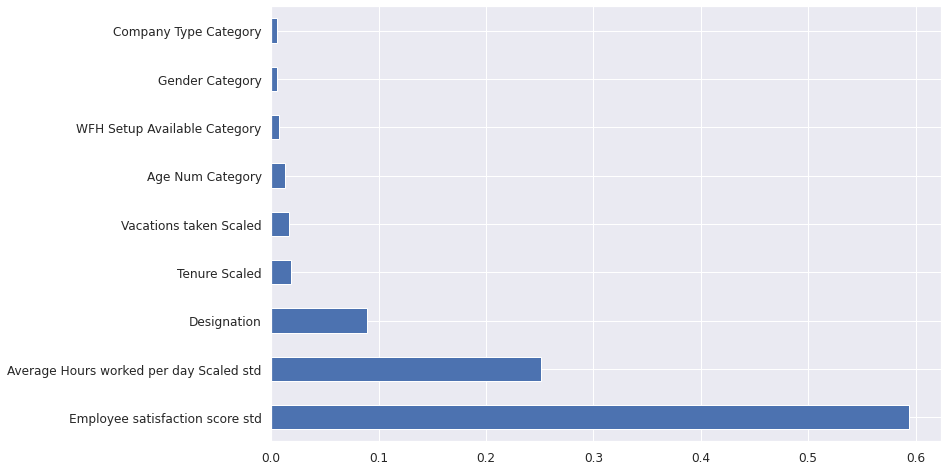

In [ ]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### SelectKBest method

In [ ]:
# SelectKBest - used for feature selection/dimensionality reduction

select_feature = SelectKBest(score_func=f_regression, k=2).fit(X,y)   # Create the object for SelectKBest and fit the regression data
feat_importances_df = pd.DataFrame({'Feature':X.columns,'Score':select_feature.scores_})
feat_importances_df.sort_values(by='Score',ascending = False)

,Feature,Score
6,Employee satisfaction score std,147645.346340
7,Average Hours worked per day Scaled std,43839.392066
0,Designation,22979.483436
4,WFH Setup Available Category,2030.266934
2,Gender Category,506.995249
8,Vacations taken Scaled,0.519233
1,Age Num Category,0.348362
3,Company Type Category,0.244056
5,Tenure Scaled,0.084311


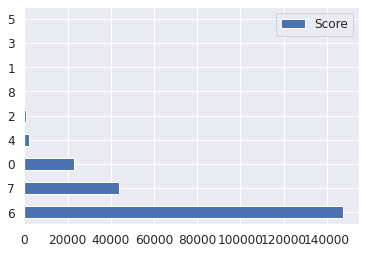

In [ ]:
# Graphical View - 18001028647
feat_importances_df.sort_values(by='Score',ascending = False).plot(kind='barh', label='Feature')

##### PCA 

All the features appear linearly related with the target dataset

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X,y)
X1 = pca.transform(X)
X1

array([[ 1.8043284 ,  1.21183396, -0.67936863, -0.17017944],
       [ 1.1891    , -1.79916859,  0.74771672,  0.33565707],
       [ 0.0775038 ,  2.21115756,  0.21089367, -0.51817967],
       ...,
       [-1.19481905, -1.77684605, -0.33846326, -0.60747774],
       [-0.10465645, -0.78560973,  0.20956949, -0.29589715],
       [-2.27481296,  0.21945762,  0.16698825,  0.61777354]])

## Test - Train Split

### Train Dataset

In [ ]:
#X = train_df[['Designation', 'Age Num Category', 'Gender Category', 'Company Type Category', 'WFH Setup Available Category', 'Tenure Scaled', 'Employee satisfaction score', 'Average Hours worked per day Scaled', 'Vacations taken Scaled']]

# Based on Above Feature Selection, features like Age Num Category, Tenure Scaled, Company Type Category & Vacations taken Scaled do not play a major role in determining the Fatigue score.
# Hence, we do not consider them. This will help to speed up the model
X = train_df[['Designation', 'Gender Category', 'WFH Setup Available Category', 'Employee satisfaction score std', 'Average Hours worked per day Scaled std']]
y = train_df['Mental Fatigue Score']


In [ ]:
# If we had one dataset we would consider spliting the dataset using train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=42, test_size=0.2)

## Prepare Model

### Check multiple Models

In [ ]:
# Try various models

def models(x_train, y_train, x_test, y_test):
    MLA = [    
        LinearRegression(),
        #LogisticRegression(),
        Ridge(alpha=.5),
        LGBMRegressor(),
        RandomForestRegressor(),
        XGBRegressor(),
        SGDRegressor(),
        SVR(),
        GradientBoostingRegressor(),  
        ElasticNet(alpha=0.05, l1_ratio=0.05, random_state=42),
        LassoCV(), 
        LassoLarsCV(), 
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        AdaBoostRegressor(),
        BaggingRegressor(n_estimators=10),
        #RandomForestRegressor(n_estimators=10),
        ExtraTreesRegressor(n_estimators=10),
        #Lasso(),
        RidgeCV(),
        CatBoostRegressor()
    ]
    
    MLA_compare = pd.DataFrame()
    for row_index, alg in enumerate(MLA):
        alg.fit(x_train, y_train)
        MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
        MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)

    MLA_compare.sort_values(by=['MLA Test Accuracy'], ascending=False, inplace=True)
    print(MLA_compare)



In [ ]:
models(X_train, y_train, X_val, y_val)

[14:37:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.063799
0:	learn: 0.1876017	total: 49.2ms	remaining: 49.2s
1:	learn: 0.1776184	total: 51.7ms	remaining: 25.8s
2:	learn: 0.1682931	total: 54.9ms	remaining: 18.3s
3:	learn: 0.1596731	total: 59.7ms	remaining: 14.9s
4:	learn: 0.1516861	total: 64.9ms	remaining: 12.9s
5:	learn: 0.1442011	total: 69.5ms	remaining: 11.5s
6:	learn: 0.1371342	total: 74ms	remaining: 10.5s
7:	learn: 0.1305983	total: 77.4ms	remaining: 9.6s
8:	learn: 0.1245671	total: 81.8ms	remaining: 9.01s
9:	learn: 0.1188929	total: 86.4ms	remaining: 8.55s
10:	learn: 0.1136105	total: 93.3ms	remaining: 8.39s
11:	learn: 0.1087299	total: 96ms	remaining: 7.9s
12:	learn: 0.1043477	total: 101ms	remaining: 7.65s
13:	learn: 0.1002291	total: 105ms	remaining: 7.39s
14:	learn: 0.0964533	total: 107ms	remaining: 7.05s
15:	learn: 0.0929816	total: 110ms	remaining: 6.76s
16:	learn: 0.0897793	total: 112

### Metrics Evaluation

In [ ]:
def evaluationMetrics(y_test, y_pred):
  print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
  print('MSE:', metrics.mean_squared_error(y_test, y_pred))
  print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
  print('R2 Score: ', metrics.r2_score(y_test, y_pred))
  print("Residual sum of squares: %.2f" % np.mean(( y_pred- y_test) ** 2))

In [ ]:
# Graphically view the difference between predicted & actual target values
def target_distPlot(y_test, y_pred):
  sns.distplot(y_test-y_pred)
  plt.show()

In [ ]:
# Graphically view of predicted & actual target values
def target_scatterPlot(y_test, y_pred):
  plt.scatter(y_test, y_pred, alpha = 0.5)
  plt.xlabel("y_test")
  plt.ylabel("y_pred")
  plt.show()

### Select the appropriate model

##### CatBoosterRegressor

In [ ]:
reg_cat = CatBoostRegressor(iterations=1500)
reg_cat.fit(X_train, y_train)

y_pred = reg_cat.predict(X_val)
reg_cat.score(X_train, y_train), reg_cat.score(X_val, y_val)

Learning rate set to 0.04688
0:	learn: 0.1904109	total: 2.77ms	remaining: 4.15s
1:	learn: 0.1829269	total: 5.46ms	remaining: 4.09s
2:	learn: 0.1758103	total: 8.24ms	remaining: 4.11s
3:	learn: 0.1690936	total: 11ms	remaining: 4.11s
4:	learn: 0.1627427	total: 13.7ms	remaining: 4.09s
5:	learn: 0.1567116	total: 16.4ms	remaining: 4.09s
6:	learn: 0.1508678	total: 19.2ms	remaining: 4.09s
7:	learn: 0.1453669	total: 21.9ms	remaining: 4.09s
8:	learn: 0.1401496	total: 24.6ms	remaining: 4.08s
9:	learn: 0.1352563	total: 27.3ms	remaining: 4.07s
10:	learn: 0.1305553	total: 30ms	remaining: 4.06s
11:	learn: 0.1260515	total: 32.8ms	remaining: 4.07s
12:	learn: 0.1218830	total: 35.7ms	remaining: 4.08s
13:	learn: 0.1180043	total: 38.4ms	remaining: 4.07s
14:	learn: 0.1142196	total: 41.1ms	remaining: 4.07s
15:	learn: 0.1106795	total: 43.9ms	remaining: 4.07s
16:	learn: 0.1073008	total: 46.5ms	remaining: 4.06s
17:	learn: 0.1040575	total: 49.2ms	remaining: 4.05s
18:	learn: 0.1010559	total: 51.8ms	remaining: 4.0

(0.9308171915940853, 0.9193952693673481)

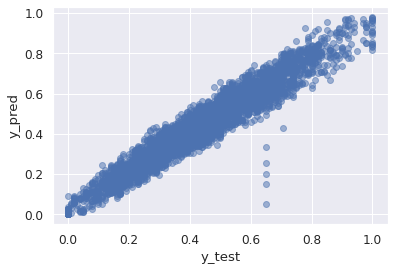

MAE: 0.04354347969517333
MSE: 0.003107624209334639
RMSE: 0.05574606900342516
R2 Score:  0.9193952693673481
Residual sum of squares: 0.00


In [ ]:
target_scatterPlot(y_val, y_pred)
evaluationMetrics(y_val,y_pred)

##### Random Forest Regressor

In [ ]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = reg_rf.predict(X_val)

In [ ]:
# Check the score on train & Test data
reg_rf.score(X_train, y_train), reg_rf.score(X_val, y_val)

(0.9403532396665703, 0.9070757752592981)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


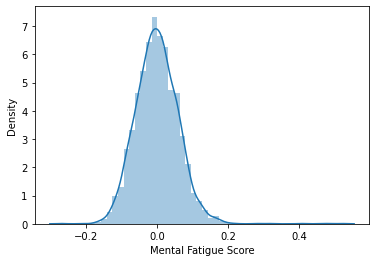

In [ ]:
target_distPlot(y_val, y_pred)

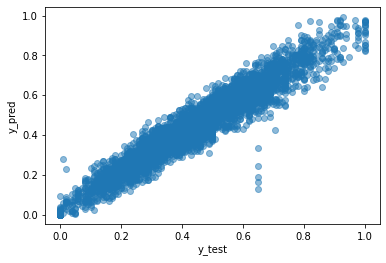

In [ ]:
target_scatterPlot(y_val, y_pred)

In [ ]:
evaluationMetrics(y_val,y_pred)

MAE: 0.04633519891077834
MSE: 0.0035825883688379847
RMSE: 0.05985472720544289
R2 Score:  0.9070757752592982
Residual sum of squares: 0.00


#### XGBoost Regressor

In [ ]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train,y_train)
y_pred = xgbmodel.predict(X_val)
evaluationMetrics(y_val,y_pred)

[00:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.044433619089669585
MSE: 0.003169634918762768
RMSE: 0.05629951082170047
R2 Score:  0.9177868520706942
Residual sum of squares: 0.00


#### AutoML 
Automatically select a best model

In [ ]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip install
!pip install auto-sklearn
!pip install scikit-learn --upgrade
!pip install sklearn --upgrade 
!sudo pip install auto-sklearn --upgrade

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,478 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (T

In [ ]:
import sklearn

print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [ ]:
from autosklearn.regression import AutoSklearnRegressor
from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error

# define search
model = AutoSklearnRegressor(time_left_for_this_task=5*60, per_run_time_limit=30, n_jobs=8)
# perform the search
model.fit(X_train, y_train)
# summarize
print(model.sprint_statistics())
# evaluate best model
y_pred = model.predict(X_test)

# Metrics
evaluationMetrics(y_test, y_pred)

IncorrectPackageVersionError: ignored

### Hyper Parameter Tuning
*  Choose following method for hyperparameter tuning
1. RandomizedSearchCV --> Fast
2. GridSearchCV
*  Assign hyperparameters in form of dictionary
*  Fit the model
*  Check best paramters and best score

#### Randomized Search CV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# Check the best parameters
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 900}

In [ ]:
# Perform prediction with the best params
prediction = rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


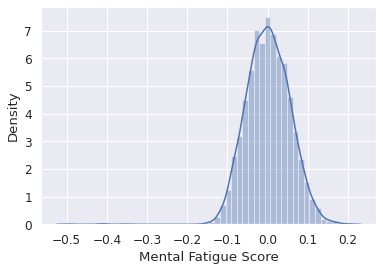

In [ ]:
# Graphical view of difference between predicted and expected value
target_distPlot(y_val,prediction)

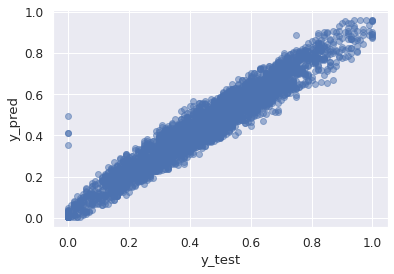

In [ ]:
# Graphical view of target variable
target_scatterPlot(y_val,prediction)

In [ ]:
# Check Accuracy
evaluationMetrics(y_val,prediction)

MAE: 0.0428680719715664
MSE: 0.002946663275072978
RMSE: 0.05428317672237853
R2 Score:  0.9272161863638313
Residual sum of squares: 0.00


#### Grid Search CV on LGBMRegressor 

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Tune Model

fit_params={"early_stopping_rounds":30,    # To stop when best model arrives. Avoids overfitting
            "eval_metric" : ['auc','l2'], 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],   # Update learning rate at runtime
            'verbose': 100   # If True, the eval metric on the eval set is printed at each boosting stage. If int, the eval metric on the eval set is printed at every verbose boosting stage.
            }

lgbm_base_params = {
    'boosting_type' :'dart',     # [gbdt, dart, gross, rf] - dart is more accurate boosting type then grad (gradient descent)
    #'num_leaves':31,            #  Maximum tree leaves for base learners
    'max_depth':10,            # Maximum tree depth for base learners, <=0 means no limit.
    'learning_rate':0.1,        # Boosting learning rate. (Use callback function to override this parameter at runtime)
    'n_estimators':900,         # Number of boosted trees to fit.
    'subsample_for_bin':200000, # Number of samples for constructing bins.
    'objective':'regression',           # [regression (for regression), ‘binary’ or ‘multiclass’ (Classifier), ‘lambdarank’ (LGBMRanker)] - Specify the learning task & objective
    'class_weight':None,        # Weights associated with classes in the form {class_label: weight}. Use this only for multi-class classification
    'min_split_gain':0.0,       # Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'min_child_weight':0.001,   # Minimum sum of instance weight (hessian) needed in a child (leaf).
    #'min_child_samples':20,     # Minimum number of data needed in a child (leaf).
    'subsample':1.0,            # Subsample ratio of the training instance.
    'subsample_freq':0,         # Frequence of subsample, <=0 means no enable
    'colsample_bytree':1.0,     # Subsample ratio of columns when constructing each tree.
    'reg_alpha':0.0,            # L1 regularization term on weights.
    'reg_lambda':0.0,           # L2 regularization term on weights
    'random_state':None, 
    'n_jobs':- 1,               # Number of parallel threads.
    'silent':True,              # Whether to print messages while running boosting.
    'importance_type':'split',   # ['split','gain'] - Type of feature importance to be filled into feature_importances_
    'max_features': 'sqrt',
    'min_samples_leaf': 5,
    'min_samples_split': 5
}

lgbm_params = {
    #'boosting_type' : ['dart'], #['gbdt', 'dart', 'gross', 'rf'] ,     # dart is more accurate boosting type then grad (gradient descent)
    #'num_leaves':sp_randint(6,50),                      #  Maximum tree leaves for base learners
    #'max_depth':[10],                              # Maximum tree depth for base learners, <=0 means no limit.
    'learning_rate':[0.001],                   # Boosting learning rate. (Use callback function to override this parameter at runtime)
    #'n_estimators':[900,100],                      # XXX - Number of boosted trees to fit. 
    #'subsample_for_bin':[200000], # Number of samples for constructing bins.
    #'objective':['regression'],           # [regression (for regression), ‘binary’ or ‘multiclass’ (Classifier), ‘lambdarank’ (LGBMRanker)] - Specify the learning task & objective
    #'class_weight':None,        # Weights associated with classes in the form {class_label: weight}. Use this only for multi-class classification
    #'min_split_gain':0.0,       # Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'min_child_weight':[0.001, 1e-5, 1e-3, 1,  1e2, 1e4],   # Minimum sum of instance weight (hessian) needed in a child (leaf).
    #'min_child_samples':[sp_randint(10, 500)],     # Minimum number of data needed in a child (leaf).
    #'subsample':1.0,            # Subsample ratio of the training instance.
    #'subsample_freq':0,         # Frequence of subsample, <=0 means no enable
    #'colsample_bytree':1.0,     # Subsample ratio of columns when constructing each tree.
    'reg_alpha':[0, 1e-1, 1],            # L1 regularization term on weights.
    'reg_lambda':[0, 1e-1, 100],           # L2 regularization term on weights
    #'random_state':None, 
    #'n_jobs':- 1,               # Number of parallel threads.
    #'silent':True,              # Whether to print messages while running boosting.
    #'importance_type':['split','gain']   # ['split','gain'] - Type of feature importance to be filled into feature_importances_
}

''' 
param_grid = {
    'num_leaves': sp_randint(6, 50), 
    'min_child_samples': sp_randint(100, 500), 
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
    'subsample': sp_uniform(loc=0.2, scale=0.8), 
    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]
}
'''

#This parameter defines the number of HP points to be tested
#n_HP_points_to_test = 100


" \nparam_grid = {\n    'num_leaves': sp_randint(6, 50), \n    'min_child_samples': sp_randint(100, 500), \n    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],\n    'subsample': sp_uniform(loc=0.2, scale=0.8), \n    'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),\n    'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],\n    'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]\n}\n"

In [ ]:
tune_model = GridSearchCV(LGBMRegressor(**lgbm_base_params ), param_grid = lgbm_params, cv=5, refit = True, verbose=5)
tune_model.fit(X_train, y_train, **fit_params)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.077039	valid's auc: 0.967926	valid's l2: 0.077039
[200]	valid's l2: 0.118501	valid's auc: 0.967823	valid's l2: 0.118501
[300]	valid's l2: 0.123692	valid's auc: 0.967613	valid's l2: 0.123692
[400]	valid's l2: 0.123232	valid's auc: 0.967501	valid's l2: 0.123232
[500]	valid's l2: 0.12109	valid's auc: 0.967821	valid's l2: 0.12109
[600]	valid's l2: 0.117806	valid's auc: 0.967679	valid's l2: 0.117806
[700]	valid's l2: 0.115936	valid's auc: 0.967666	valid's l2: 0.115936
[800]	valid's l2: 0.114424	valid's auc: 0.967765	valid's l2: 0.114424
[900]	valid's l2: 0.10895	valid's auc: 0.967773	valid's l2: 0.10895
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.774, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.9s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768522	valid's auc: 0.966718	valid's l2: 0.0768522
[200]	valid's l2: 0.118362	valid's auc: 0.966656	valid's l2: 0.118362
[300]	valid's l2: 0.123592	valid's auc: 0.966632	valid's l2: 0.123592
[400]	valid's l2: 0.123168	valid's auc: 0.966315	valid's l2: 0.123168
[500]	valid's l2: 0.121068	valid's auc: 0.967276	valid's l2: 0.121068
[600]	valid's l2: 0.117798	valid's auc: 0.967467	valid's l2: 0.117798
[700]	valid's l2: 0.115961	valid's auc: 0.967776	valid's l2: 0.115961
[800]	valid's l2: 0.114471	valid's auc: 0.967999	valid's l2: 0.114471
[900]	valid's l2: 0.109012	valid's auc: 0.968157	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.718, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.0min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768848	valid's auc: 0.967797	valid's l2: 0.0768848
[200]	valid's l2: 0.118377	valid's auc: 0.967831	valid's l2: 0.118377
[300]	valid's l2: 0.123583	valid's auc: 0.969191	valid's l2: 0.123583
[400]	valid's l2: 0.123137	valid's auc: 0.969208	valid's l2: 0.123137
[500]	valid's l2: 0.121014	valid's auc: 0.969316	valid's l2: 0.121014
[600]	valid's l2: 0.117734	valid's auc: 0.969393	valid's l2: 0.117734
[700]	valid's l2: 0.11588	valid's auc: 0.969352	valid's l2: 0.11588
[800]	valid's l2: 0.114378	valid's auc: 0.969125	valid's l2: 0.114378
[900]	valid's l2: 0.10891	valid's auc: 0.969125	valid's l2: 0.10891
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.855, total=  30.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767224	valid's auc: 0.967561	valid's l2: 0.0767224
[200]	valid's l2: 0.118248	valid's auc: 0.967329	valid's l2: 0.118248
[300]	valid's l2: 0.123486	valid's auc: 0.967299	valid's l2: 0.123486
[400]	valid's l2: 0.123066	valid's auc: 0.968278	valid's l2: 0.123066
[500]	valid's l2: 0.120967	valid's auc: 0.968423	valid's l2: 0.120967
[600]	valid's l2: 0.117697	valid's auc: 0.968423	valid's l2: 0.117697
[700]	valid's l2: 0.115863	valid's auc: 0.968398	valid's l2: 0.115863
[800]	valid's l2: 0.114372	valid's auc: 0.968329	valid's l2: 0.114372
[900]	valid's l2: 0.108914	valid's auc: 0.968329	valid's l2: 0.108914
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.712, total=  30.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.0min remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767848	valid's auc: 0.967467	valid's l2: 0.0767848
[200]	valid's l2: 0.118296	valid's auc: 0.967428	valid's l2: 0.118296
[300]	valid's l2: 0.123529	valid's auc: 0.967205	valid's l2: 0.123529
[400]	valid's l2: 0.123108	valid's auc: 0.967222	valid's l2: 0.123108
[500]	valid's l2: 0.12101	valid's auc: 0.967465	valid's l2: 0.12101
[600]	valid's l2: 0.117743	valid's auc: 0.967568	valid's l2: 0.117743
[700]	valid's l2: 0.115909	valid's auc: 0.967546	valid's l2: 0.115909
[800]	valid's l2: 0.114419	valid's auc: 0.967593	valid's l2: 0.114419
[900]	valid's l2: 0.108963	valid's auc: 0.967696	valid's l2: 0.108963
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.711, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770412	valid's auc: 0.967926	valid's l2: 0.0770412
[200]	valid's l2: 0.118507	valid's auc: 0.967791	valid's l2: 0.118507
[300]	valid's l2: 0.123703	valid's auc: 0.967613	valid's l2: 0.123703
[400]	valid's l2: 0.123246	valid's auc: 0.967501	valid's l2: 0.123246
[500]	valid's l2: 0.121107	valid's auc: 0.967722	valid's l2: 0.121107
[600]	valid's l2: 0.117827	valid's auc: 0.967658	valid's l2: 0.117827
[700]	valid's l2: 0.115962	valid's auc: 0.967658	valid's l2: 0.115962
[800]	valid's l2: 0.114454	valid's auc: 0.967876	valid's l2: 0.114454
[900]	valid's l2: 0.108984	valid's auc: 0.967919	valid's l2: 0.108984
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.774, total=  30.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768546	valid's auc: 0.96686	valid's l2: 0.0768546
[200]	valid's l2: 0.118368	valid's auc: 0.96686	valid's l2: 0.118368
[300]	valid's l2: 0.123604	valid's auc: 0.966722	valid's l2: 0.123604
[400]	valid's l2: 0.123185	valid's auc: 0.966435	valid's l2: 0.123185
[500]	valid's l2: 0.121085	valid's auc: 0.967323	valid's l2: 0.121085
[600]	valid's l2: 0.117815	valid's auc: 0.967514	valid's l2: 0.117815
[700]	valid's l2: 0.115978	valid's auc: 0.967694	valid's l2: 0.115978
[800]	valid's l2: 0.114487	valid's auc: 0.969423	valid's l2: 0.114487
[900]	valid's l2: 0.109028	valid's auc: 0.969805	valid's l2: 0.109028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.718, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768866	valid's auc: 0.969311	valid's l2: 0.0768866
[200]	valid's l2: 0.118381	valid's auc: 0.969329	valid's l2: 0.118381
[300]	valid's l2: 0.123593	valid's auc: 0.969189	valid's l2: 0.123593
[400]	valid's l2: 0.123152	valid's auc: 0.969241	valid's l2: 0.123152
[500]	valid's l2: 0.12103	valid's auc: 0.969314	valid's l2: 0.12103
[600]	valid's l2: 0.117752	valid's auc: 0.969391	valid's l2: 0.117752
[700]	valid's l2: 0.115898	valid's auc: 0.969352	valid's l2: 0.115898
[800]	valid's l2: 0.114396	valid's auc: 0.969352	valid's l2: 0.114396
[900]	valid's l2: 0.108928	valid's auc: 0.969125	valid's l2: 0.108928
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.855, total=  30.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767244	valid's auc: 0.967709	valid's l2: 0.0767244
[200]	valid's l2: 0.118254	valid's auc: 0.967325	valid's l2: 0.118254
[300]	valid's l2: 0.123497	valid's auc: 0.967291	valid's l2: 0.123497
[400]	valid's l2: 0.123081	valid's auc: 0.967317	valid's l2: 0.123081
[500]	valid's l2: 0.120986	valid's auc: 0.968338	valid's l2: 0.120986
[600]	valid's l2: 0.117717	valid's auc: 0.968355	valid's l2: 0.117717
[700]	valid's l2: 0.115885	valid's auc: 0.968398	valid's l2: 0.115885
[800]	valid's l2: 0.114396	valid's auc: 0.968329	valid's l2: 0.114396
[900]	valid's l2: 0.108939	valid's auc: 0.968329	valid's l2: 0.108939
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  30.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767877	valid's auc: 0.967467	valid's l2: 0.0767877
[200]	valid's l2: 0.118306	valid's auc: 0.967156	valid's l2: 0.118306
[300]	valid's l2: 0.123545	valid's auc: 0.967199	valid's l2: 0.123545
[400]	valid's l2: 0.123128	valid's auc: 0.967299	valid's l2: 0.123128
[500]	valid's l2: 0.121031	valid's auc: 0.967604	valid's l2: 0.121031
[600]	valid's l2: 0.117762	valid's auc: 0.967673	valid's l2: 0.117762
[700]	valid's l2: 0.115929	valid's auc: 0.967568	valid's l2: 0.115929
[800]	valid's l2: 0.11444	valid's auc: 0.967593	valid's l2: 0.11444
[900]	valid's l2: 0.108985	valid's auc: 0.967812	valid's l2: 0.108985
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774194	valid's auc: 0.969798	valid's l2: 0.0774194
[200]	valid's l2: 0.119291	valid's auc: 0.969876	valid's l2: 0.119291
[300]	valid's l2: 0.12492	valid's auc: 0.970753	valid's l2: 0.12492
[400]	valid's l2: 0.124872	valid's auc: 0.970847	valid's l2: 0.124872
[500]	valid's l2: 0.123153	valid's auc: 0.97059	valid's l2: 0.123153
[600]	valid's l2: 0.120041	valid's auc: 0.970624	valid's l2: 0.120041
[700]	valid's l2: 0.118486	valid's auc: 0.970624	valid's l2: 0.118486
[800]	valid's l2: 0.117185	valid's auc: 0.970575	valid's l2: 0.117185
[900]	valid's l2: 0.111954	valid's auc: 0.969635	valid's l2: 0.111954
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.850, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772348	valid's auc: 0.969888	valid's l2: 0.0772348
[200]	valid's l2: 0.119155	valid's auc: 0.969451	valid's l2: 0.119155
[300]	valid's l2: 0.124826	valid's auc: 0.969833	valid's l2: 0.124826
[400]	valid's l2: 0.124808	valid's auc: 0.969796	valid's l2: 0.124808
[500]	valid's l2: 0.123123	valid's auc: 0.969601	valid's l2: 0.123123
[600]	valid's l2: 0.120019	valid's auc: 0.969515	valid's l2: 0.120019
[700]	valid's l2: 0.118479	valid's auc: 0.969515	valid's l2: 0.118479
[800]	valid's l2: 0.117189	valid's auc: 0.969515	valid's l2: 0.117189
[900]	valid's l2: 0.111966	valid's auc: 0.970154	valid's l2: 0.111966
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772627	valid's auc: 0.970397	valid's l2: 0.0772627
[200]	valid's l2: 0.119161	valid's auc: 0.970886	valid's l2: 0.119161
[300]	valid's l2: 0.124798	valid's auc: 0.970686	valid's l2: 0.124798
[400]	valid's l2: 0.124751	valid's auc: 0.970907	valid's l2: 0.124751
[500]	valid's l2: 0.123033	valid's auc: 0.970826	valid's l2: 0.123033
[600]	valid's l2: 0.11992	valid's auc: 0.970834	valid's l2: 0.11992
[700]	valid's l2: 0.118367	valid's auc: 0.970457	valid's l2: 0.118367
[800]	valid's l2: 0.117072	valid's auc: 0.970393	valid's l2: 0.117072
[900]	valid's l2: 0.111839	valid's auc: 0.970738	valid's l2: 0.111839
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.920, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771036	valid's auc: 0.969447	valid's l2: 0.0771036
[200]	valid's l2: 0.119034	valid's auc: 0.969451	valid's l2: 0.119034
[300]	valid's l2: 0.12471	valid's auc: 0.97053	valid's l2: 0.12471
[400]	valid's l2: 0.124697	valid's auc: 0.969925	valid's l2: 0.124697
[500]	valid's l2: 0.123008	valid's auc: 0.970032	valid's l2: 0.123008
[600]	valid's l2: 0.119902	valid's auc: 0.970032	valid's l2: 0.119902
[700]	valid's l2: 0.118366	valid's auc: 0.970032	valid's l2: 0.118366
[800]	valid's l2: 0.11708	valid's auc: 0.970305	valid's l2: 0.11708
[900]	valid's l2: 0.111861	valid's auc: 0.968962	valid's l2: 0.111861
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771812	valid's auc: 0.971175	valid's l2: 0.0771812
[200]	valid's l2: 0.119113	valid's auc: 0.970137	valid's l2: 0.119113
[300]	valid's l2: 0.124784	valid's auc: 0.969828	valid's l2: 0.124784
[400]	valid's l2: 0.124768	valid's auc: 0.969987	valid's l2: 0.124768
[500]	valid's l2: 0.123085	valid's auc: 0.969991	valid's l2: 0.123085
[600]	valid's l2: 0.119985	valid's auc: 0.969996	valid's l2: 0.119985
[700]	valid's l2: 0.118458	valid's auc: 0.969655	valid's l2: 0.118458
[800]	valid's l2: 0.117179	valid's auc: 0.970444	valid's l2: 0.117179
[900]	valid's l2: 0.111968	valid's auc: 0.968938	valid's l2: 0.111968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.792, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770451	valid's auc: 0.968168	valid's l2: 0.0770451
[200]	valid's l2: 0.118516	valid's auc: 0.968108	valid's l2: 0.118516
[300]	valid's l2: 0.123716	valid's auc: 0.968014	valid's l2: 0.123716
[400]	valid's l2: 0.123262	valid's auc: 0.967681	valid's l2: 0.123262
[500]	valid's l2: 0.121125	valid's auc: 0.967739	valid's l2: 0.121125
[600]	valid's l2: 0.117844	valid's auc: 0.967739	valid's l2: 0.117844
[700]	valid's l2: 0.115984	valid's auc: 0.967894	valid's l2: 0.115984
[800]	valid's l2: 0.114479	valid's auc: 0.967842	valid's l2: 0.114479
[900]	valid's l2: 0.109011	valid's auc: 0.968923	valid's l2: 0.109011
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.775, total=  30.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.07686	valid's auc: 0.96689	valid's l2: 0.07686
[200]	valid's l2: 0.118378	valid's auc: 0.966946	valid's l2: 0.118378
[300]	valid's l2: 0.123617	valid's auc: 0.969468	valid's l2: 0.123617
[400]	valid's l2: 0.123202	valid's auc: 0.968932	valid's l2: 0.123202
[500]	valid's l2: 0.121103	valid's auc: 0.968919	valid's l2: 0.121103
[600]	valid's l2: 0.117833	valid's auc: 0.969003	valid's l2: 0.117833
[700]	valid's l2: 0.115997	valid's auc: 0.969316	valid's l2: 0.115997
[800]	valid's l2: 0.114506	valid's auc: 0.969419	valid's l2: 0.114506
[900]	valid's l2: 0.10905	valid's auc: 0.96959	valid's l2: 0.10905
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.718, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768914	valid's auc: 0.968061	valid's l2: 0.0768914
[200]	valid's l2: 0.118394	valid's auc: 0.969322	valid's l2: 0.118394
[300]	valid's l2: 0.123612	valid's auc: 0.969189	valid's l2: 0.123612
[400]	valid's l2: 0.123174	valid's auc: 0.969189	valid's l2: 0.123174
[500]	valid's l2: 0.121057	valid's auc: 0.969391	valid's l2: 0.121057
[600]	valid's l2: 0.117781	valid's auc: 0.970086	valid's l2: 0.117781
[700]	valid's l2: 0.115934	valid's auc: 0.970086	valid's l2: 0.115934
[800]	valid's l2: 0.114435	valid's auc: 0.969858	valid's l2: 0.114435
[900]	valid's l2: 0.108968	valid's auc: 0.969893	valid's l2: 0.108968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.856, total=  30.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767313	valid's auc: 0.967323	valid's l2: 0.0767313
[200]	valid's l2: 0.118266	valid's auc: 0.967351	valid's l2: 0.118266
[300]	valid's l2: 0.123511	valid's auc: 0.967184	valid's l2: 0.123511
[400]	valid's l2: 0.123098	valid's auc: 0.968097	valid's l2: 0.123098
[500]	valid's l2: 0.121006	valid's auc: 0.968338	valid's l2: 0.121006
[600]	valid's l2: 0.117739	valid's auc: 0.968303	valid's l2: 0.117739
[700]	valid's l2: 0.115908	valid's auc: 0.968235	valid's l2: 0.115908
[800]	valid's l2: 0.114421	valid's auc: 0.968423	valid's l2: 0.114421
[900]	valid's l2: 0.108965	valid's auc: 0.969076	valid's l2: 0.108965
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767928	valid's auc: 0.967194	valid's l2: 0.0767928
[200]	valid's l2: 0.118315	valid's auc: 0.967267	valid's l2: 0.118315
[300]	valid's l2: 0.123559	valid's auc: 0.967235	valid's l2: 0.123559
[400]	valid's l2: 0.123145	valid's auc: 0.967452	valid's l2: 0.123145
[500]	valid's l2: 0.12105	valid's auc: 0.967486	valid's l2: 0.12105
[600]	valid's l2: 0.117783	valid's auc: 0.967546	valid's l2: 0.117783
[700]	valid's l2: 0.115953	valid's auc: 0.967576	valid's l2: 0.115953
[800]	valid's l2: 0.114468	valid's auc: 0.967585	valid's l2: 0.114468
[900]	valid's l2: 0.109012	valid's auc: 0.967662	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770459	valid's auc: 0.968181	valid's l2: 0.0770459
[200]	valid's l2: 0.118518	valid's auc: 0.968108	valid's l2: 0.118518
[300]	valid's l2: 0.12372	valid's auc: 0.968108	valid's l2: 0.12372
[400]	valid's l2: 0.123268	valid's auc: 0.967728	valid's l2: 0.123268
[500]	valid's l2: 0.121134	valid's auc: 0.967739	valid's l2: 0.121134
[600]	valid's l2: 0.117857	valid's auc: 0.967739	valid's l2: 0.117857
[700]	valid's l2: 0.115997	valid's auc: 0.967894	valid's l2: 0.115997
[800]	valid's l2: 0.114493	valid's auc: 0.968876	valid's l2: 0.114493
[900]	valid's l2: 0.109027	valid's auc: 0.968923	valid's l2: 0.109027
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.775, total=  30.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768612	valid's auc: 0.967048	valid's l2: 0.0768612
[200]	valid's l2: 0.118381	valid's auc: 0.967906	valid's l2: 0.118381
[300]	valid's l2: 0.123621	valid's auc: 0.969537	valid's l2: 0.123621
[400]	valid's l2: 0.123207	valid's auc: 0.968932	valid's l2: 0.123207
[500]	valid's l2: 0.121111	valid's auc: 0.968932	valid's l2: 0.121111
[600]	valid's l2: 0.117843	valid's auc: 0.969003	valid's l2: 0.117843
[700]	valid's l2: 0.116008	valid's auc: 0.969316	valid's l2: 0.116008
[800]	valid's l2: 0.114517	valid's auc: 0.969419	valid's l2: 0.114517
[900]	valid's l2: 0.109063	valid's auc: 0.969552	valid's l2: 0.109063
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.719, total=  30.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768957	valid's auc: 0.968061	valid's l2: 0.0768957
[200]	valid's l2: 0.118403	valid's auc: 0.969232	valid's l2: 0.118403
[300]	valid's l2: 0.123624	valid's auc: 0.969215	valid's l2: 0.123624
[400]	valid's l2: 0.123188	valid's auc: 0.969155	valid's l2: 0.123188
[500]	valid's l2: 0.121073	valid's auc: 0.969232	valid's l2: 0.121073
[600]	valid's l2: 0.117798	valid's auc: 0.969927	valid's l2: 0.117798
[700]	valid's l2: 0.115952	valid's auc: 0.969961	valid's l2: 0.115952
[800]	valid's l2: 0.114453	valid's auc: 0.969884	valid's l2: 0.114453
[900]	valid's l2: 0.108987	valid's auc: 0.969884	valid's l2: 0.108987
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.856, total=  30.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767348	valid's auc: 0.967323	valid's l2: 0.0767348
[200]	valid's l2: 0.118274	valid's auc: 0.967289	valid's l2: 0.118274
[300]	valid's l2: 0.123522	valid's auc: 0.968145	valid's l2: 0.123522
[400]	valid's l2: 0.12311	valid's auc: 0.968097	valid's l2: 0.12311
[500]	valid's l2: 0.12102	valid's auc: 0.968063	valid's l2: 0.12102
[600]	valid's l2: 0.117752	valid's auc: 0.968149	valid's l2: 0.117752
[700]	valid's l2: 0.115924	valid's auc: 0.968818	valid's l2: 0.115924
[800]	valid's l2: 0.114438	valid's auc: 0.969007	valid's l2: 0.114438
[900]	valid's l2: 0.108981	valid's auc: 0.969702	valid's l2: 0.108981
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.712, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767949	valid's auc: 0.967194	valid's l2: 0.0767949
[200]	valid's l2: 0.118321	valid's auc: 0.967257	valid's l2: 0.118321
[300]	valid's l2: 0.123564	valid's auc: 0.967435	valid's l2: 0.123564
[400]	valid's l2: 0.123152	valid's auc: 0.967559	valid's l2: 0.123152
[500]	valid's l2: 0.121061	valid's auc: 0.967643	valid's l2: 0.121061
[600]	valid's l2: 0.117795	valid's auc: 0.967703	valid's l2: 0.117795
[700]	valid's l2: 0.115967	valid's auc: 0.967853	valid's l2: 0.115967
[800]	valid's l2: 0.114482	valid's auc: 0.967722	valid's l2: 0.114482
[900]	valid's l2: 0.109031	valid's auc: 0.967782	valid's l2: 0.109031
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.713, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774202	valid's auc: 0.969798	valid's l2: 0.0774202
[200]	valid's l2: 0.119292	valid's auc: 0.969871	valid's l2: 0.119292
[300]	valid's l2: 0.124922	valid's auc: 0.970749	valid's l2: 0.124922
[400]	valid's l2: 0.124876	valid's auc: 0.970809	valid's l2: 0.124876
[500]	valid's l2: 0.123156	valid's auc: 0.970616	valid's l2: 0.123156
[600]	valid's l2: 0.120046	valid's auc: 0.97062	valid's l2: 0.120046
[700]	valid's l2: 0.118491	valid's auc: 0.97062	valid's l2: 0.118491
[800]	valid's l2: 0.11719	valid's auc: 0.970571	valid's l2: 0.11719
[900]	valid's l2: 0.111961	valid's auc: 0.969777	valid's l2: 0.111961
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.851, total=  18.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772372	valid's auc: 0.969781	valid's l2: 0.0772372
[200]	valid's l2: 0.119158	valid's auc: 0.969344	valid's l2: 0.119158
[300]	valid's l2: 0.12483	valid's auc: 0.969751	valid's l2: 0.12483
[400]	valid's l2: 0.124812	valid's auc: 0.969562	valid's l2: 0.124812
[500]	valid's l2: 0.123128	valid's auc: 0.969545	valid's l2: 0.123128
[600]	valid's l2: 0.120024	valid's auc: 0.969459	valid's l2: 0.120024
[700]	valid's l2: 0.118484	valid's auc: 0.969459	valid's l2: 0.118484
[800]	valid's l2: 0.117194	valid's auc: 0.970163	valid's l2: 0.117194
[900]	valid's l2: 0.111973	valid's auc: 0.970112	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772638	valid's auc: 0.970375	valid's l2: 0.0772638
[200]	valid's l2: 0.119162	valid's auc: 0.971032	valid's l2: 0.119162
[300]	valid's l2: 0.1248	valid's auc: 0.971135	valid's l2: 0.1248
[400]	valid's l2: 0.124754	valid's auc: 0.970933	valid's l2: 0.124754
[500]	valid's l2: 0.123036	valid's auc: 0.970852	valid's l2: 0.123036
[600]	valid's l2: 0.119924	valid's auc: 0.97086	valid's l2: 0.119924
[700]	valid's l2: 0.118372	valid's auc: 0.970457	valid's l2: 0.118372
[800]	valid's l2: 0.117077	valid's auc: 0.970393	valid's l2: 0.117077
[900]	valid's l2: 0.111846	valid's auc: 0.970738	valid's l2: 0.111846
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.921, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771055	valid's auc: 0.970393	valid's l2: 0.0771055
[200]	valid's l2: 0.119036	valid's auc: 0.970397	valid's l2: 0.119036
[300]	valid's l2: 0.124713	valid's auc: 0.970478	valid's l2: 0.124713
[400]	valid's l2: 0.124701	valid's auc: 0.970015	valid's l2: 0.124701
[500]	valid's l2: 0.123013	valid's auc: 0.970122	valid's l2: 0.123013
[600]	valid's l2: 0.119907	valid's auc: 0.970122	valid's l2: 0.119907
[700]	valid's l2: 0.118371	valid's auc: 0.970122	valid's l2: 0.118371
[800]	valid's l2: 0.117085	valid's auc: 0.970395	valid's l2: 0.117085
[900]	valid's l2: 0.111867	valid's auc: 0.968962	valid's l2: 0.111867
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771824	valid's auc: 0.971175	valid's l2: 0.0771824
[200]	valid's l2: 0.119114	valid's auc: 0.970296	valid's l2: 0.119114
[300]	valid's l2: 0.124786	valid's auc: 0.969828	valid's l2: 0.124786
[400]	valid's l2: 0.12477	valid's auc: 0.969987	valid's l2: 0.12477
[500]	valid's l2: 0.123088	valid's auc: 0.969991	valid's l2: 0.123088
[600]	valid's l2: 0.11999	valid's auc: 0.969996	valid's l2: 0.11999
[700]	valid's l2: 0.118463	valid's auc: 0.970369	valid's l2: 0.118463
[800]	valid's l2: 0.117184	valid's auc: 0.970444	valid's l2: 0.117184
[900]	valid's l2: 0.111973	valid's auc: 0.968938	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.792, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770816	valid's auc: 0.967557	valid's l2: 0.0770816
[200]	valid's l2: 0.118601	valid's auc: 0.967145	valid's l2: 0.118601
[300]	valid's l2: 0.123843	valid's auc: 0.967222	valid's l2: 0.123843
[400]	valid's l2: 0.123432	valid's auc: 0.966414	valid's l2: 0.123432
[500]	valid's l2: 0.121345	valid's auc: 0.966658	valid's l2: 0.121345
[600]	valid's l2: 0.118085	valid's auc: 0.96665	valid's l2: 0.118085
[700]	valid's l2: 0.116262	valid's auc: 0.966615	valid's l2: 0.116262
[800]	valid's l2: 0.114782	valid's auc: 0.966604	valid's l2: 0.114782
[900]	valid's l2: 0.109336	valid's auc: 0.967321	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.782, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768958	valid's auc: 0.967879	valid's l2: 0.0768958
[200]	valid's l2: 0.118451	valid's auc: 0.966935	valid's l2: 0.118451
[300]	valid's l2: 0.123731	valid's auc: 0.96639	valid's l2: 0.123731
[400]	valid's l2: 0.123355	valid's auc: 0.966308	valid's l2: 0.123355
[500]	valid's l2: 0.1213	valid's auc: 0.967282	valid's l2: 0.1213
[600]	valid's l2: 0.118052	valid's auc: 0.967861	valid's l2: 0.118052
[700]	valid's l2: 0.116251	valid's auc: 0.968016	valid's l2: 0.116251
[800]	valid's l2: 0.114782	valid's auc: 0.967909	valid's l2: 0.114782
[900]	valid's l2: 0.109353	valid's auc: 0.967909	valid's l2: 0.109353
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.725, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769304	valid's auc: 0.970727	valid's l2: 0.0769304
[200]	valid's l2: 0.118473	valid's auc: 0.969689	valid's l2: 0.118473
[300]	valid's l2: 0.123735	valid's auc: 0.969706	valid's l2: 0.123735
[400]	valid's l2: 0.123343	valid's auc: 0.970084	valid's l2: 0.123343
[500]	valid's l2: 0.121274	valid's auc: 0.970073	valid's l2: 0.121274
[600]	valid's l2: 0.11802	valid's auc: 0.969991	valid's l2: 0.11802
[700]	valid's l2: 0.116206	valid's auc: 0.970335	valid's l2: 0.116206
[800]	valid's l2: 0.114735	valid's auc: 0.970253	valid's l2: 0.114735
[900]	valid's l2: 0.109303	valid's auc: 0.970313	valid's l2: 0.109303
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.863, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767682	valid's auc: 0.967244	valid's l2: 0.0767682
[200]	valid's l2: 0.118345	valid's auc: 0.966684	valid's l2: 0.118345
[300]	valid's l2: 0.123631	valid's auc: 0.966808	valid's l2: 0.123631
[400]	valid's l2: 0.123254	valid's auc: 0.966928	valid's l2: 0.123254
[500]	valid's l2: 0.1212	valid's auc: 0.966941	valid's l2: 0.1212
[600]	valid's l2: 0.117949	valid's auc: 0.966885	valid's l2: 0.117949
[700]	valid's l2: 0.116148	valid's auc: 0.966589	valid's l2: 0.116148
[800]	valid's l2: 0.114681	valid's auc: 0.966589	valid's l2: 0.114681
[900]	valid's l2: 0.109249	valid's auc: 0.967458	valid's l2: 0.109249
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.718, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768378	valid's auc: 0.96745	valid's l2: 0.0768378
[200]	valid's l2: 0.118394	valid's auc: 0.967428	valid's l2: 0.118394
[300]	valid's l2: 0.123675	valid's auc: 0.96681	valid's l2: 0.123675
[400]	valid's l2: 0.123306	valid's auc: 0.966832	valid's l2: 0.123306
[500]	valid's l2: 0.121262	valid's auc: 0.967021	valid's l2: 0.121262
[600]	valid's l2: 0.118014	valid's auc: 0.967055	valid's l2: 0.118014
[700]	valid's l2: 0.116217	valid's auc: 0.967634	valid's l2: 0.116217
[800]	valid's l2: 0.114755	valid's auc: 0.967634	valid's l2: 0.114755
[900]	valid's l2: 0.109329	valid's auc: 0.967716	valid's l2: 0.109329
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.722, total=  27.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770821	valid's auc: 0.967557	valid's l2: 0.0770821
[200]	valid's l2: 0.118603	valid's auc: 0.967145	valid's l2: 0.118603
[300]	valid's l2: 0.123845	valid's auc: 0.967278	valid's l2: 0.123845
[400]	valid's l2: 0.123436	valid's auc: 0.966414	valid's l2: 0.123436
[500]	valid's l2: 0.12135	valid's auc: 0.966581	valid's l2: 0.12135
[600]	valid's l2: 0.11809	valid's auc: 0.96665	valid's l2: 0.11809
[700]	valid's l2: 0.116269	valid's auc: 0.96665	valid's l2: 0.116269
[800]	valid's l2: 0.114789	valid's auc: 0.966634	valid's l2: 0.114789
[900]	valid's l2: 0.109343	valid's auc: 0.967158	valid's l2: 0.109343
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.782, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076897	valid's auc: 0.967767	valid's l2: 0.076897
[200]	valid's l2: 0.118454	valid's auc: 0.966935	valid's l2: 0.118454
[300]	valid's l2: 0.123735	valid's auc: 0.96639	valid's l2: 0.123735
[400]	valid's l2: 0.123359	valid's auc: 0.966308	valid's l2: 0.123359
[500]	valid's l2: 0.121305	valid's auc: 0.967282	valid's l2: 0.121305
[600]	valid's l2: 0.118057	valid's auc: 0.967861	valid's l2: 0.118057
[700]	valid's l2: 0.116256	valid's auc: 0.968016	valid's l2: 0.116256
[800]	valid's l2: 0.114787	valid's auc: 0.967909	valid's l2: 0.114787
[900]	valid's l2: 0.109359	valid's auc: 0.968016	valid's l2: 0.109359
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.725, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769319	valid's auc: 0.97068	valid's l2: 0.0769319
[200]	valid's l2: 0.118476	valid's auc: 0.969702	valid's l2: 0.118476
[300]	valid's l2: 0.123738	valid's auc: 0.969706	valid's l2: 0.123738
[400]	valid's l2: 0.123346	valid's auc: 0.970084	valid's l2: 0.123346
[500]	valid's l2: 0.121279	valid's auc: 0.97	valid's l2: 0.121279
[600]	valid's l2: 0.118025	valid's auc: 0.97	valid's l2: 0.118025
[700]	valid's l2: 0.116211	valid's auc: 0.969991	valid's l2: 0.116211
[800]	valid's l2: 0.114739	valid's auc: 0.970335	valid's l2: 0.114739
[900]	valid's l2: 0.10931	valid's auc: 0.970313	valid's l2: 0.10931
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.863, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767695	valid's auc: 0.967244	valid's l2: 0.0767695
[200]	valid's l2: 0.118348	valid's auc: 0.966684	valid's l2: 0.118348
[300]	valid's l2: 0.123634	valid's auc: 0.966808	valid's l2: 0.123634
[400]	valid's l2: 0.123258	valid's auc: 0.966928	valid's l2: 0.123258
[500]	valid's l2: 0.121204	valid's auc: 0.966941	valid's l2: 0.121204
[600]	valid's l2: 0.117954	valid's auc: 0.966813	valid's l2: 0.117954
[700]	valid's l2: 0.116154	valid's auc: 0.966589	valid's l2: 0.116154
[800]	valid's l2: 0.114687	valid's auc: 0.966504	valid's l2: 0.114687
[900]	valid's l2: 0.109256	valid's auc: 0.967458	valid's l2: 0.109256
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.719, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768383	valid's auc: 0.967527	valid's l2: 0.0768383
[200]	valid's l2: 0.118395	valid's auc: 0.967379	valid's l2: 0.118395
[300]	valid's l2: 0.123676	valid's auc: 0.966761	valid's l2: 0.123676
[400]	valid's l2: 0.123309	valid's auc: 0.966624	valid's l2: 0.123309
[500]	valid's l2: 0.121267	valid's auc: 0.966813	valid's l2: 0.121267
[600]	valid's l2: 0.118019	valid's auc: 0.96683	valid's l2: 0.118019
[700]	valid's l2: 0.116224	valid's auc: 0.967006	valid's l2: 0.116224
[800]	valid's l2: 0.114762	valid's auc: 0.967585	valid's l2: 0.114762
[900]	valid's l2: 0.109336	valid's auc: 0.967694	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.722, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774343	valid's auc: 0.968024	valid's l2: 0.0774343
[200]	valid's l2: 0.119309	valid's auc: 0.968936	valid's l2: 0.119309
[300]	valid's l2: 0.124945	valid's auc: 0.96882	valid's l2: 0.124945
[400]	valid's l2: 0.124904	valid's auc: 0.968627	valid's l2: 0.124904
[500]	valid's l2: 0.123192	valid's auc: 0.969618	valid's l2: 0.123192
[600]	valid's l2: 0.120085	valid's auc: 0.969618	valid's l2: 0.120085
[700]	valid's l2: 0.118535	valid's auc: 0.969618	valid's l2: 0.118535
[800]	valid's l2: 0.117238	valid's auc: 0.969258	valid's l2: 0.117238
[900]	valid's l2: 0.112013	valid's auc: 0.969138	valid's l2: 0.112013
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.852, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772529	valid's auc: 0.969515	valid's l2: 0.0772529
[200]	valid's l2: 0.119179	valid's auc: 0.969133	valid's l2: 0.119179
[300]	valid's l2: 0.124856	valid's auc: 0.969625	valid's l2: 0.124856
[400]	valid's l2: 0.124843	valid's auc: 0.970161	valid's l2: 0.124843
[500]	valid's l2: 0.123166	valid's auc: 0.970182	valid's l2: 0.123166
[600]	valid's l2: 0.120067	valid's auc: 0.970118	valid's l2: 0.120067
[700]	valid's l2: 0.118532	valid's auc: 0.970097	valid's l2: 0.118532
[800]	valid's l2: 0.117246	valid's auc: 0.970118	valid's l2: 0.117246
[900]	valid's l2: 0.112028	valid's auc: 0.970118	valid's l2: 0.112028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772767	valid's auc: 0.969713	valid's l2: 0.0772767
[200]	valid's l2: 0.119179	valid's auc: 0.969979	valid's l2: 0.119179
[300]	valid's l2: 0.124822	valid's auc: 0.969363	valid's l2: 0.124822
[400]	valid's l2: 0.124783	valid's auc: 0.969955	valid's l2: 0.124783
[500]	valid's l2: 0.123073	valid's auc: 0.970579	valid's l2: 0.123073
[600]	valid's l2: 0.119963	valid's auc: 0.970579	valid's l2: 0.119963
[700]	valid's l2: 0.118415	valid's auc: 0.970142	valid's l2: 0.118415
[800]	valid's l2: 0.117123	valid's auc: 0.970112	valid's l2: 0.117123
[900]	valid's l2: 0.111898	valid's auc: 0.969966	valid's l2: 0.111898
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.922, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771165	valid's auc: 0.968938	valid's l2: 0.0771165
[200]	valid's l2: 0.119052	valid's auc: 0.96894	valid's l2: 0.119052
[300]	valid's l2: 0.124734	valid's auc: 0.969234	valid's l2: 0.124734
[400]	valid's l2: 0.124729	valid's auc: 0.968943	valid's l2: 0.124729
[500]	valid's l2: 0.123048	valid's auc: 0.96964	valid's l2: 0.123048
[600]	valid's l2: 0.119944	valid's auc: 0.969425	valid's l2: 0.119944
[700]	valid's l2: 0.118413	valid's auc: 0.969419	valid's l2: 0.118413
[800]	valid's l2: 0.117134	valid's auc: 0.969127	valid's l2: 0.117134
[900]	valid's l2: 0.111919	valid's auc: 0.967643	valid's l2: 0.111919
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771925	valid's auc: 0.970511	valid's l2: 0.0771925
[200]	valid's l2: 0.119126	valid's auc: 0.970438	valid's l2: 0.119126
[300]	valid's l2: 0.124806	valid's auc: 0.970311	valid's l2: 0.124806
[400]	valid's l2: 0.124795	valid's auc: 0.970418	valid's l2: 0.124795
[500]	valid's l2: 0.12312	valid's auc: 0.970637	valid's l2: 0.12312
[600]	valid's l2: 0.120025	valid's auc: 0.970637	valid's l2: 0.120025
[700]	valid's l2: 0.118505	valid's auc: 0.970255	valid's l2: 0.118505
[800]	valid's l2: 0.117231	valid's auc: 0.968767	valid's l2: 0.117231
[900]	valid's l2: 0.112024	valid's auc: 0.968586	valid's l2: 0.112024
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.794, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771108	valid's auc: 0.967387	valid's l2: 0.0771108
[200]	valid's l2: 0.118652	valid's auc: 0.967242	valid's l2: 0.118652
[300]	valid's l2: 0.123922	valid's auc: 0.966847	valid's l2: 0.123922
[400]	valid's l2: 0.123534	valid's auc: 0.966203	valid's l2: 0.123534
[500]	valid's l2: 0.121468	valid's auc: 0.966216	valid's l2: 0.121468
[600]	valid's l2: 0.118217	valid's auc: 0.966433	valid's l2: 0.118217
[700]	valid's l2: 0.116409	valid's auc: 0.966351	valid's l2: 0.116409
[800]	valid's l2: 0.114938	valid's auc: 0.96627	valid's l2: 0.114938
[900]	valid's l2: 0.109511	valid's auc: 0.966497	valid's l2: 0.109511
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.788, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769307	valid's auc: 0.967295	valid's l2: 0.0769307
[200]	valid's l2: 0.118517	valid's auc: 0.966042	valid's l2: 0.118517
[300]	valid's l2: 0.123824	valid's auc: 0.966047	valid's l2: 0.123824
[400]	valid's l2: 0.123465	valid's auc: 0.966057	valid's l2: 0.123465
[500]	valid's l2: 0.121426	valid's auc: 0.966066	valid's l2: 0.121426
[600]	valid's l2: 0.118183	valid's auc: 0.966066	valid's l2: 0.118183
[700]	valid's l2: 0.116396	valid's auc: 0.965877	valid's l2: 0.116396
[800]	valid's l2: 0.114939	valid's auc: 0.966847	valid's l2: 0.114939
[900]	valid's l2: 0.10953	valid's auc: 0.966915	valid's l2: 0.10953
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.730, total=  24.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769614	valid's auc: 0.966866	valid's l2: 0.0769614
[200]	valid's l2: 0.118529	valid's auc: 0.966349	valid's l2: 0.118529
[300]	valid's l2: 0.123818	valid's auc: 0.966671	valid's l2: 0.123818
[400]	valid's l2: 0.123446	valid's auc: 0.966772	valid's l2: 0.123446
[500]	valid's l2: 0.121396	valid's auc: 0.96669	valid's l2: 0.121396
[600]	valid's l2: 0.118148	valid's auc: 0.96669	valid's l2: 0.118148
[700]	valid's l2: 0.116348	valid's auc: 0.96669	valid's l2: 0.116348
[800]	valid's l2: 0.114881	valid's auc: 0.967574	valid's l2: 0.114881
[900]	valid's l2: 0.10946	valid's auc: 0.968346	valid's l2: 0.10946
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.867, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768011	valid's auc: 0.966819	valid's l2: 0.0768011
[200]	valid's l2: 0.118398	valid's auc: 0.966251	valid's l2: 0.118398
[300]	valid's l2: 0.123712	valid's auc: 0.966216	valid's l2: 0.123712
[400]	valid's l2: 0.123363	valid's auc: 0.966156	valid's l2: 0.123363
[500]	valid's l2: 0.121333	valid's auc: 0.966057	valid's l2: 0.121333
[600]	valid's l2: 0.118093	valid's auc: 0.966057	valid's l2: 0.118093
[700]	valid's l2: 0.116309	valid's auc: 0.966105	valid's l2: 0.116309
[800]	valid's l2: 0.114853	valid's auc: 0.966375	valid's l2: 0.114853
[900]	valid's l2: 0.10944	valid's auc: 0.966319	valid's l2: 0.10944
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.726, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076868	valid's auc: 0.966532	valid's l2: 0.076868
[200]	valid's l2: 0.118462	valid's auc: 0.965699	valid's l2: 0.118462
[300]	valid's l2: 0.123779	valid's auc: 0.965708	valid's l2: 0.123779
[400]	valid's l2: 0.123429	valid's auc: 0.966654	valid's l2: 0.123429
[500]	valid's l2: 0.121399	valid's auc: 0.966654	valid's l2: 0.121399
[600]	valid's l2: 0.118158	valid's auc: 0.966634	valid's l2: 0.118158
[700]	valid's l2: 0.116368	valid's auc: 0.966639	valid's l2: 0.116368
[800]	valid's l2: 0.114911	valid's auc: 0.966806	valid's l2: 0.114911
[900]	valid's l2: 0.109498	valid's auc: 0.967381	valid's l2: 0.109498
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.728, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771114	valid's auc: 0.967387	valid's l2: 0.0771114
[200]	valid's l2: 0.118653	valid's auc: 0.967242	valid's l2: 0.118653
[300]	valid's l2: 0.123923	valid's auc: 0.966684	valid's l2: 0.123923
[400]	valid's l2: 0.123535	valid's auc: 0.966169	valid's l2: 0.123535
[500]	valid's l2: 0.12147	valid's auc: 0.966216	valid's l2: 0.12147
[600]	valid's l2: 0.118221	valid's auc: 0.966433	valid's l2: 0.118221
[700]	valid's l2: 0.116413	valid's auc: 0.966343	valid's l2: 0.116413
[800]	valid's l2: 0.114942	valid's auc: 0.96615	valid's l2: 0.114942
[900]	valid's l2: 0.109515	valid's auc: 0.966493	valid's l2: 0.109515
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.788, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769316	valid's auc: 0.967295	valid's l2: 0.0769316
[200]	valid's l2: 0.118518	valid's auc: 0.966042	valid's l2: 0.118518
[300]	valid's l2: 0.123827	valid's auc: 0.966047	valid's l2: 0.123827
[400]	valid's l2: 0.123468	valid's auc: 0.966057	valid's l2: 0.123468
[500]	valid's l2: 0.12143	valid's auc: 0.966066	valid's l2: 0.12143
[600]	valid's l2: 0.118188	valid's auc: 0.966066	valid's l2: 0.118188
[700]	valid's l2: 0.1164	valid's auc: 0.965877	valid's l2: 0.1164
[800]	valid's l2: 0.114943	valid's auc: 0.966847	valid's l2: 0.114943
[900]	valid's l2: 0.109534	valid's auc: 0.966915	valid's l2: 0.109534
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.730, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769617	valid's auc: 0.966924	valid's l2: 0.0769617
[200]	valid's l2: 0.11853	valid's auc: 0.966349	valid's l2: 0.11853
[300]	valid's l2: 0.123819	valid's auc: 0.966671	valid's l2: 0.123819
[400]	valid's l2: 0.123447	valid's auc: 0.966772	valid's l2: 0.123447
[500]	valid's l2: 0.121398	valid's auc: 0.96669	valid's l2: 0.121398
[600]	valid's l2: 0.11815	valid's auc: 0.96669	valid's l2: 0.11815
[700]	valid's l2: 0.116351	valid's auc: 0.966604	valid's l2: 0.116351
[800]	valid's l2: 0.114883	valid's auc: 0.967574	valid's l2: 0.114883
[900]	valid's l2: 0.109465	valid's auc: 0.968338	valid's l2: 0.109465
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.868, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768013	valid's auc: 0.966819	valid's l2: 0.0768013
[200]	valid's l2: 0.1184	valid's auc: 0.966251	valid's l2: 0.1184
[300]	valid's l2: 0.123714	valid's auc: 0.966216	valid's l2: 0.123714
[400]	valid's l2: 0.123364	valid's auc: 0.966156	valid's l2: 0.123364
[500]	valid's l2: 0.121336	valid's auc: 0.966057	valid's l2: 0.121336
[600]	valid's l2: 0.118095	valid's auc: 0.966139	valid's l2: 0.118095
[700]	valid's l2: 0.116312	valid's auc: 0.965985	valid's l2: 0.116312
[800]	valid's l2: 0.114857	valid's auc: 0.966388	valid's l2: 0.114857
[900]	valid's l2: 0.109444	valid's auc: 0.966508	valid's l2: 0.109444
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.726, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768679	valid's auc: 0.966193	valid's l2: 0.0768679
[200]	valid's l2: 0.118465	valid's auc: 0.965699	valid's l2: 0.118465
[300]	valid's l2: 0.123781	valid's auc: 0.965708	valid's l2: 0.123781
[400]	valid's l2: 0.123431	valid's auc: 0.966654	valid's l2: 0.123431
[500]	valid's l2: 0.121402	valid's auc: 0.966654	valid's l2: 0.121402
[600]	valid's l2: 0.118161	valid's auc: 0.966639	valid's l2: 0.118161
[700]	valid's l2: 0.116372	valid's auc: 0.966639	valid's l2: 0.116372
[800]	valid's l2: 0.114916	valid's auc: 0.966802	valid's l2: 0.114916
[900]	valid's l2: 0.109503	valid's auc: 0.967381	valid's l2: 0.109503
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.729, total=  24.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774457	valid's auc: 0.968747	valid's l2: 0.0774457
[200]	valid's l2: 0.119326	valid's auc: 0.968904	valid's l2: 0.119326
[300]	valid's l2: 0.124968	valid's auc: 0.968792	valid's l2: 0.124968
[400]	valid's l2: 0.124935	valid's auc: 0.968767	valid's l2: 0.124935
[500]	valid's l2: 0.123231	valid's auc: 0.968406	valid's l2: 0.123231
[600]	valid's l2: 0.120126	valid's auc: 0.969586	valid's l2: 0.120126
[700]	valid's l2: 0.118581	valid's auc: 0.969526	valid's l2: 0.118581
[800]	valid's l2: 0.117291	valid's auc: 0.969157	valid's l2: 0.117291
[900]	valid's l2: 0.112072	valid's auc: 0.968732	valid's l2: 0.112072
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.853, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772643	valid's auc: 0.96908	valid's l2: 0.0772643
[200]	valid's l2: 0.119198	valid's auc: 0.968788	valid's l2: 0.119198
[300]	valid's l2: 0.124881	valid's auc: 0.970024	valid's l2: 0.124881
[400]	valid's l2: 0.124875	valid's auc: 0.969676	valid's l2: 0.124875
[500]	valid's l2: 0.123207	valid's auc: 0.969505	valid's l2: 0.123207
[600]	valid's l2: 0.120111	valid's auc: 0.969783	valid's l2: 0.120111
[700]	valid's l2: 0.118584	valid's auc: 0.969783	valid's l2: 0.118584
[800]	valid's l2: 0.1173	valid's auc: 0.969783	valid's l2: 0.1173
[900]	valid's l2: 0.112085	valid's auc: 0.969783	valid's l2: 0.112085
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.790, total=  17.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772894	valid's auc: 0.969269	valid's l2: 0.0772894
[200]	valid's l2: 0.119195	valid's auc: 0.969547	valid's l2: 0.119195
[300]	valid's l2: 0.124847	valid's auc: 0.96997	valid's l2: 0.124847
[400]	valid's l2: 0.124816	valid's auc: 0.969695	valid's l2: 0.124816
[500]	valid's l2: 0.123112	valid's auc: 0.96961	valid's l2: 0.123112
[600]	valid's l2: 0.120005	valid's auc: 0.970307	valid's l2: 0.120005
[700]	valid's l2: 0.118464	valid's auc: 0.969951	valid's l2: 0.118464
[800]	valid's l2: 0.117176	valid's auc: 0.969951	valid's l2: 0.117176
[900]	valid's l2: 0.111956	valid's auc: 0.968664	valid's l2: 0.111956
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.923, total=  17.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771277	valid's auc: 0.967595	valid's l2: 0.0771277
[200]	valid's l2: 0.119068	valid's auc: 0.968507	valid's l2: 0.119068
[300]	valid's l2: 0.124758	valid's auc: 0.968198	valid's l2: 0.124758
[400]	valid's l2: 0.12476	valid's auc: 0.967919	valid's l2: 0.12476
[500]	valid's l2: 0.123087	valid's auc: 0.967928	valid's l2: 0.123087
[600]	valid's l2: 0.119986	valid's auc: 0.969108	valid's l2: 0.119986
[700]	valid's l2: 0.118461	valid's auc: 0.968958	valid's l2: 0.118461
[800]	valid's l2: 0.117185	valid's auc: 0.968078	valid's l2: 0.117185
[900]	valid's l2: 0.111978	valid's auc: 0.967203	valid's l2: 0.111978
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.789, total=  17.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772041	valid's auc: 0.969136	valid's l2: 0.0772041
[200]	valid's l2: 0.119144	valid's auc: 0.969387	valid's l2: 0.119144
[300]	valid's l2: 0.124829	valid's auc: 0.969009	valid's l2: 0.124829
[400]	valid's l2: 0.124826	valid's auc: 0.969018	valid's l2: 0.124826
[500]	valid's l2: 0.123159	valid's auc: 0.96991	valid's l2: 0.123159
[600]	valid's l2: 0.120066	valid's auc: 0.969869	valid's l2: 0.120066
[700]	valid's l2: 0.118555	valid's auc: 0.969783	valid's l2: 0.118555
[800]	valid's l2: 0.117284	valid's auc: 0.96805	valid's l2: 0.117284
[900]	valid's l2: 0.112083	valid's auc: 0.968273	valid's l2: 0.112083
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.795, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.077039	valid's auc: 0.967926	valid's l2: 0.077039
[200]	valid's l2: 0.118501	valid's auc: 0.967823	valid's l2: 0.118501
[300]	valid's l2: 0.123692	valid's auc: 0.967613	valid's l2: 0.123692
[400]	valid's l2: 0.123232	valid's auc: 0.967501	valid's l2: 0.123232
[500]	valid's l2: 0.12109	valid's auc: 0.967821	valid's l2: 0.12109
[600]	valid's l2: 0.117806	valid's auc: 0.967679	valid's l2: 0.117806
[700]	valid's l2: 0.115936	valid's auc: 0.967666	valid's l2: 0.115936
[800]	valid's l2: 0.114424	valid's auc: 0.967765	valid's l2: 0.114424
[900]	valid's l2: 0.10895	valid's auc: 0.967773	valid's l2: 0.10895
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=-1.774, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768522	valid's auc: 0.966718	valid's l2: 0.0768522
[200]	valid's l2: 0.118362	valid's auc: 0.966656	valid's l2: 0.118362
[300]	valid's l2: 0.123592	valid's auc: 0.966632	valid's l2: 0.123592
[400]	valid's l2: 0.123168	valid's auc: 0.966315	valid's l2: 0.123168
[500]	valid's l2: 0.121068	valid's auc: 0.967276	valid's l2: 0.121068
[600]	valid's l2: 0.117798	valid's auc: 0.967467	valid's l2: 0.117798
[700]	valid's l2: 0.115961	valid's auc: 0.967776	valid's l2: 0.115961
[800]	valid's l2: 0.114471	valid's auc: 0.967999	valid's l2: 0.114471
[900]	valid's l2: 0.109012	valid's auc: 0.968157	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=-1.718, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768848	valid's auc: 0.967797	valid's l2: 0.0768848
[200]	valid's l2: 0.118377	valid's auc: 0.967831	valid's l2: 0.118377
[300]	valid's l2: 0.123583	valid's auc: 0.969191	valid's l2: 0.123583
[400]	valid's l2: 0.123137	valid's auc: 0.969208	valid's l2: 0.123137
[500]	valid's l2: 0.121014	valid's auc: 0.969316	valid's l2: 0.121014
[600]	valid's l2: 0.117734	valid's auc: 0.969393	valid's l2: 0.117734
[700]	valid's l2: 0.11588	valid's auc: 0.969352	valid's l2: 0.11588
[800]	valid's l2: 0.114378	valid's auc: 0.969125	valid's l2: 0.114378
[900]	valid's l2: 0.10891	valid's auc: 0.969125	valid's l2: 0.10891
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=-1.855, total=  30.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767224	valid's auc: 0.967561	valid's l2: 0.0767224
[200]	valid's l2: 0.118248	valid's auc: 0.967329	valid's l2: 0.118248
[300]	valid's l2: 0.123486	valid's auc: 0.967299	valid's l2: 0.123486
[400]	valid's l2: 0.123066	valid's auc: 0.968278	valid's l2: 0.123066
[500]	valid's l2: 0.120967	valid's auc: 0.968423	valid's l2: 0.120967
[600]	valid's l2: 0.117697	valid's auc: 0.968423	valid's l2: 0.117697
[700]	valid's l2: 0.115863	valid's auc: 0.968398	valid's l2: 0.115863
[800]	valid's l2: 0.114372	valid's auc: 0.968329	valid's l2: 0.114372
[900]	valid's l2: 0.108914	valid's auc: 0.968329	valid's l2: 0.108914
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=-1.712, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767848	valid's auc: 0.967467	valid's l2: 0.0767848
[200]	valid's l2: 0.118296	valid's auc: 0.967428	valid's l2: 0.118296
[300]	valid's l2: 0.123529	valid's auc: 0.967205	valid's l2: 0.123529
[400]	valid's l2: 0.123108	valid's auc: 0.967222	valid's l2: 0.123108
[500]	valid's l2: 0.12101	valid's auc: 0.967465	valid's l2: 0.12101
[600]	valid's l2: 0.117743	valid's auc: 0.967568	valid's l2: 0.117743
[700]	valid's l2: 0.115909	valid's auc: 0.967546	valid's l2: 0.115909
[800]	valid's l2: 0.114419	valid's auc: 0.967593	valid's l2: 0.114419
[900]	valid's l2: 0.108963	valid's auc: 0.967696	valid's l2: 0.108963
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=-1.711, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770412	valid's auc: 0.967926	valid's l2: 0.0770412
[200]	valid's l2: 0.118507	valid's auc: 0.967791	valid's l2: 0.118507
[300]	valid's l2: 0.123703	valid's auc: 0.967613	valid's l2: 0.123703
[400]	valid's l2: 0.123246	valid's auc: 0.967501	valid's l2: 0.123246
[500]	valid's l2: 0.121107	valid's auc: 0.967722	valid's l2: 0.121107
[600]	valid's l2: 0.117827	valid's auc: 0.967658	valid's l2: 0.117827
[700]	valid's l2: 0.115962	valid's auc: 0.967658	valid's l2: 0.115962
[800]	valid's l2: 0.114454	valid's auc: 0.967876	valid's l2: 0.114454
[900]	valid's l2: 0.108984	valid's auc: 0.967919	valid's l2: 0.108984
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=-1.774, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768546	valid's auc: 0.96686	valid's l2: 0.0768546
[200]	valid's l2: 0.118368	valid's auc: 0.96686	valid's l2: 0.118368
[300]	valid's l2: 0.123604	valid's auc: 0.966722	valid's l2: 0.123604
[400]	valid's l2: 0.123185	valid's auc: 0.966435	valid's l2: 0.123185
[500]	valid's l2: 0.121085	valid's auc: 0.967323	valid's l2: 0.121085
[600]	valid's l2: 0.117815	valid's auc: 0.967514	valid's l2: 0.117815
[700]	valid's l2: 0.115978	valid's auc: 0.967694	valid's l2: 0.115978
[800]	valid's l2: 0.114487	valid's auc: 0.969423	valid's l2: 0.114487
[900]	valid's l2: 0.109028	valid's auc: 0.969805	valid's l2: 0.109028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=-1.718, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768866	valid's auc: 0.969311	valid's l2: 0.0768866
[200]	valid's l2: 0.118381	valid's auc: 0.969329	valid's l2: 0.118381
[300]	valid's l2: 0.123593	valid's auc: 0.969189	valid's l2: 0.123593
[400]	valid's l2: 0.123152	valid's auc: 0.969241	valid's l2: 0.123152
[500]	valid's l2: 0.12103	valid's auc: 0.969314	valid's l2: 0.12103
[600]	valid's l2: 0.117752	valid's auc: 0.969391	valid's l2: 0.117752
[700]	valid's l2: 0.115898	valid's auc: 0.969352	valid's l2: 0.115898
[800]	valid's l2: 0.114396	valid's auc: 0.969352	valid's l2: 0.114396
[900]	valid's l2: 0.108928	valid's auc: 0.969125	valid's l2: 0.108928
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=-1.855, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767244	valid's auc: 0.967709	valid's l2: 0.0767244
[200]	valid's l2: 0.118254	valid's auc: 0.967325	valid's l2: 0.118254
[300]	valid's l2: 0.123497	valid's auc: 0.967291	valid's l2: 0.123497
[400]	valid's l2: 0.123081	valid's auc: 0.967317	valid's l2: 0.123081
[500]	valid's l2: 0.120986	valid's auc: 0.968338	valid's l2: 0.120986
[600]	valid's l2: 0.117717	valid's auc: 0.968355	valid's l2: 0.117717
[700]	valid's l2: 0.115885	valid's auc: 0.968398	valid's l2: 0.115885
[800]	valid's l2: 0.114396	valid's auc: 0.968329	valid's l2: 0.114396
[900]	valid's l2: 0.108939	valid's auc: 0.968329	valid's l2: 0.108939
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  30.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767877	valid's auc: 0.967467	valid's l2: 0.0767877
[200]	valid's l2: 0.118306	valid's auc: 0.967156	valid's l2: 0.118306
[300]	valid's l2: 0.123545	valid's auc: 0.967199	valid's l2: 0.123545
[400]	valid's l2: 0.123128	valid's auc: 0.967299	valid's l2: 0.123128
[500]	valid's l2: 0.121031	valid's auc: 0.967604	valid's l2: 0.121031
[600]	valid's l2: 0.117762	valid's auc: 0.967673	valid's l2: 0.117762
[700]	valid's l2: 0.115929	valid's auc: 0.967568	valid's l2: 0.115929
[800]	valid's l2: 0.11444	valid's auc: 0.967593	valid's l2: 0.11444
[900]	valid's l2: 0.108985	valid's auc: 0.967812	valid's l2: 0.108985
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774194	valid's auc: 0.969798	valid's l2: 0.0774194
[200]	valid's l2: 0.119291	valid's auc: 0.969876	valid's l2: 0.119291
[300]	valid's l2: 0.12492	valid's auc: 0.970753	valid's l2: 0.12492
[400]	valid's l2: 0.124872	valid's auc: 0.970847	valid's l2: 0.124872
[500]	valid's l2: 0.123153	valid's auc: 0.97059	valid's l2: 0.123153
[600]	valid's l2: 0.120041	valid's auc: 0.970624	valid's l2: 0.120041
[700]	valid's l2: 0.118486	valid's auc: 0.970624	valid's l2: 0.118486
[800]	valid's l2: 0.117185	valid's auc: 0.970575	valid's l2: 0.117185
[900]	valid's l2: 0.111954	valid's auc: 0.969635	valid's l2: 0.111954
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=-1.850, total=  18.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772348	valid's auc: 0.969888	valid's l2: 0.0772348
[200]	valid's l2: 0.119155	valid's auc: 0.969451	valid's l2: 0.119155
[300]	valid's l2: 0.124826	valid's auc: 0.969833	valid's l2: 0.124826
[400]	valid's l2: 0.124808	valid's auc: 0.969796	valid's l2: 0.124808
[500]	valid's l2: 0.123123	valid's auc: 0.969601	valid's l2: 0.123123
[600]	valid's l2: 0.120019	valid's auc: 0.969515	valid's l2: 0.120019
[700]	valid's l2: 0.118479	valid's auc: 0.969515	valid's l2: 0.118479
[800]	valid's l2: 0.117189	valid's auc: 0.969515	valid's l2: 0.117189
[900]	valid's l2: 0.111966	valid's auc: 0.970154	valid's l2: 0.111966
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772627	valid's auc: 0.970397	valid's l2: 0.0772627
[200]	valid's l2: 0.119161	valid's auc: 0.970886	valid's l2: 0.119161
[300]	valid's l2: 0.124798	valid's auc: 0.970686	valid's l2: 0.124798
[400]	valid's l2: 0.124751	valid's auc: 0.970907	valid's l2: 0.124751
[500]	valid's l2: 0.123033	valid's auc: 0.970826	valid's l2: 0.123033
[600]	valid's l2: 0.11992	valid's auc: 0.970834	valid's l2: 0.11992
[700]	valid's l2: 0.118367	valid's auc: 0.970457	valid's l2: 0.118367
[800]	valid's l2: 0.117072	valid's auc: 0.970393	valid's l2: 0.117072
[900]	valid's l2: 0.111839	valid's auc: 0.970738	valid's l2: 0.111839
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=-1.920, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771036	valid's auc: 0.969447	valid's l2: 0.0771036
[200]	valid's l2: 0.119034	valid's auc: 0.969451	valid's l2: 0.119034
[300]	valid's l2: 0.12471	valid's auc: 0.97053	valid's l2: 0.12471
[400]	valid's l2: 0.124697	valid's auc: 0.969925	valid's l2: 0.124697
[500]	valid's l2: 0.123008	valid's auc: 0.970032	valid's l2: 0.123008
[600]	valid's l2: 0.119902	valid's auc: 0.970032	valid's l2: 0.119902
[700]	valid's l2: 0.118366	valid's auc: 0.970032	valid's l2: 0.118366
[800]	valid's l2: 0.11708	valid's auc: 0.970305	valid's l2: 0.11708
[900]	valid's l2: 0.111861	valid's auc: 0.968962	valid's l2: 0.111861
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771812	valid's auc: 0.971175	valid's l2: 0.0771812
[200]	valid's l2: 0.119113	valid's auc: 0.970137	valid's l2: 0.119113
[300]	valid's l2: 0.124784	valid's auc: 0.969828	valid's l2: 0.124784
[400]	valid's l2: 0.124768	valid's auc: 0.969987	valid's l2: 0.124768
[500]	valid's l2: 0.123085	valid's auc: 0.969991	valid's l2: 0.123085
[600]	valid's l2: 0.119985	valid's auc: 0.969996	valid's l2: 0.119985
[700]	valid's l2: 0.118458	valid's auc: 0.969655	valid's l2: 0.118458
[800]	valid's l2: 0.117179	valid's auc: 0.970444	valid's l2: 0.117179
[900]	valid's l2: 0.111968	valid's auc: 0.968938	valid's l2: 0.111968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=-1.792, total=  18.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770451	valid's auc: 0.968168	valid's l2: 0.0770451
[200]	valid's l2: 0.118516	valid's auc: 0.968108	valid's l2: 0.118516
[300]	valid's l2: 0.123716	valid's auc: 0.968014	valid's l2: 0.123716
[400]	valid's l2: 0.123262	valid's auc: 0.967681	valid's l2: 0.123262
[500]	valid's l2: 0.121125	valid's auc: 0.967739	valid's l2: 0.121125
[600]	valid's l2: 0.117844	valid's auc: 0.967739	valid's l2: 0.117844
[700]	valid's l2: 0.115984	valid's auc: 0.967894	valid's l2: 0.115984
[800]	valid's l2: 0.114479	valid's auc: 0.967842	valid's l2: 0.114479
[900]	valid's l2: 0.109011	valid's auc: 0.968923	valid's l2: 0.109011
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=-1.775, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.07686	valid's auc: 0.96689	valid's l2: 0.07686
[200]	valid's l2: 0.118378	valid's auc: 0.966946	valid's l2: 0.118378
[300]	valid's l2: 0.123617	valid's auc: 0.969468	valid's l2: 0.123617
[400]	valid's l2: 0.123202	valid's auc: 0.968932	valid's l2: 0.123202
[500]	valid's l2: 0.121103	valid's auc: 0.968919	valid's l2: 0.121103
[600]	valid's l2: 0.117833	valid's auc: 0.969003	valid's l2: 0.117833
[700]	valid's l2: 0.115997	valid's auc: 0.969316	valid's l2: 0.115997
[800]	valid's l2: 0.114506	valid's auc: 0.969419	valid's l2: 0.114506
[900]	valid's l2: 0.10905	valid's auc: 0.96959	valid's l2: 0.10905
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=-1.718, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768914	valid's auc: 0.968061	valid's l2: 0.0768914
[200]	valid's l2: 0.118394	valid's auc: 0.969322	valid's l2: 0.118394
[300]	valid's l2: 0.123612	valid's auc: 0.969189	valid's l2: 0.123612
[400]	valid's l2: 0.123174	valid's auc: 0.969189	valid's l2: 0.123174
[500]	valid's l2: 0.121057	valid's auc: 0.969391	valid's l2: 0.121057
[600]	valid's l2: 0.117781	valid's auc: 0.970086	valid's l2: 0.117781
[700]	valid's l2: 0.115934	valid's auc: 0.970086	valid's l2: 0.115934
[800]	valid's l2: 0.114435	valid's auc: 0.969858	valid's l2: 0.114435
[900]	valid's l2: 0.108968	valid's auc: 0.969893	valid's l2: 0.108968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=-1.856, total=  30.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767313	valid's auc: 0.967323	valid's l2: 0.0767313
[200]	valid's l2: 0.118266	valid's auc: 0.967351	valid's l2: 0.118266
[300]	valid's l2: 0.123511	valid's auc: 0.967184	valid's l2: 0.123511
[400]	valid's l2: 0.123098	valid's auc: 0.968097	valid's l2: 0.123098
[500]	valid's l2: 0.121006	valid's auc: 0.968338	valid's l2: 0.121006
[600]	valid's l2: 0.117739	valid's auc: 0.968303	valid's l2: 0.117739
[700]	valid's l2: 0.115908	valid's auc: 0.968235	valid's l2: 0.115908
[800]	valid's l2: 0.114421	valid's auc: 0.968423	valid's l2: 0.114421
[900]	valid's l2: 0.108965	valid's auc: 0.969076	valid's l2: 0.108965
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767928	valid's auc: 0.967194	valid's l2: 0.0767928
[200]	valid's l2: 0.118315	valid's auc: 0.967267	valid's l2: 0.118315
[300]	valid's l2: 0.123559	valid's auc: 0.967235	valid's l2: 0.123559
[400]	valid's l2: 0.123145	valid's auc: 0.967452	valid's l2: 0.123145
[500]	valid's l2: 0.12105	valid's auc: 0.967486	valid's l2: 0.12105
[600]	valid's l2: 0.117783	valid's auc: 0.967546	valid's l2: 0.117783
[700]	valid's l2: 0.115953	valid's auc: 0.967576	valid's l2: 0.115953
[800]	valid's l2: 0.114468	valid's auc: 0.967585	valid's l2: 0.114468
[900]	valid's l2: 0.109012	valid's auc: 0.967662	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770459	valid's auc: 0.968181	valid's l2: 0.0770459
[200]	valid's l2: 0.118518	valid's auc: 0.968108	valid's l2: 0.118518
[300]	valid's l2: 0.12372	valid's auc: 0.968108	valid's l2: 0.12372
[400]	valid's l2: 0.123268	valid's auc: 0.967728	valid's l2: 0.123268
[500]	valid's l2: 0.121134	valid's auc: 0.967739	valid's l2: 0.121134
[600]	valid's l2: 0.117857	valid's auc: 0.967739	valid's l2: 0.117857
[700]	valid's l2: 0.115997	valid's auc: 0.967894	valid's l2: 0.115997
[800]	valid's l2: 0.114493	valid's auc: 0.968876	valid's l2: 0.114493
[900]	valid's l2: 0.109027	valid's auc: 0.968923	valid's l2: 0.109027
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=-1.775, total=  30.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768612	valid's auc: 0.967048	valid's l2: 0.0768612
[200]	valid's l2: 0.118381	valid's auc: 0.967906	valid's l2: 0.118381
[300]	valid's l2: 0.123621	valid's auc: 0.969537	valid's l2: 0.123621
[400]	valid's l2: 0.123207	valid's auc: 0.968932	valid's l2: 0.123207
[500]	valid's l2: 0.121111	valid's auc: 0.968932	valid's l2: 0.121111
[600]	valid's l2: 0.117843	valid's auc: 0.969003	valid's l2: 0.117843
[700]	valid's l2: 0.116008	valid's auc: 0.969316	valid's l2: 0.116008
[800]	valid's l2: 0.114517	valid's auc: 0.969419	valid's l2: 0.114517
[900]	valid's l2: 0.109063	valid's auc: 0.969552	valid's l2: 0.109063
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=-1.719, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768957	valid's auc: 0.968061	valid's l2: 0.0768957
[200]	valid's l2: 0.118403	valid's auc: 0.969232	valid's l2: 0.118403
[300]	valid's l2: 0.123624	valid's auc: 0.969215	valid's l2: 0.123624
[400]	valid's l2: 0.123188	valid's auc: 0.969155	valid's l2: 0.123188
[500]	valid's l2: 0.121073	valid's auc: 0.969232	valid's l2: 0.121073
[600]	valid's l2: 0.117798	valid's auc: 0.969927	valid's l2: 0.117798
[700]	valid's l2: 0.115952	valid's auc: 0.969961	valid's l2: 0.115952
[800]	valid's l2: 0.114453	valid's auc: 0.969884	valid's l2: 0.114453
[900]	valid's l2: 0.108987	valid's auc: 0.969884	valid's l2: 0.108987
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=-1.856, total=  31.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767348	valid's auc: 0.967323	valid's l2: 0.0767348
[200]	valid's l2: 0.118274	valid's auc: 0.967289	valid's l2: 0.118274
[300]	valid's l2: 0.123522	valid's auc: 0.968145	valid's l2: 0.123522
[400]	valid's l2: 0.12311	valid's auc: 0.968097	valid's l2: 0.12311
[500]	valid's l2: 0.12102	valid's auc: 0.968063	valid's l2: 0.12102
[600]	valid's l2: 0.117752	valid's auc: 0.968149	valid's l2: 0.117752
[700]	valid's l2: 0.115924	valid's auc: 0.968818	valid's l2: 0.115924
[800]	valid's l2: 0.114438	valid's auc: 0.969007	valid's l2: 0.114438
[900]	valid's l2: 0.108981	valid's auc: 0.969702	valid's l2: 0.108981
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=-1.712, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767949	valid's auc: 0.967194	valid's l2: 0.0767949
[200]	valid's l2: 0.118321	valid's auc: 0.967257	valid's l2: 0.118321
[300]	valid's l2: 0.123564	valid's auc: 0.967435	valid's l2: 0.123564
[400]	valid's l2: 0.123152	valid's auc: 0.967559	valid's l2: 0.123152
[500]	valid's l2: 0.121061	valid's auc: 0.967643	valid's l2: 0.121061
[600]	valid's l2: 0.117795	valid's auc: 0.967703	valid's l2: 0.117795
[700]	valid's l2: 0.115967	valid's auc: 0.967853	valid's l2: 0.115967
[800]	valid's l2: 0.114482	valid's auc: 0.967722	valid's l2: 0.114482
[900]	valid's l2: 0.109031	valid's auc: 0.967782	valid's l2: 0.109031
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=-1.713, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774202	valid's auc: 0.969798	valid's l2: 0.0774202
[200]	valid's l2: 0.119292	valid's auc: 0.969871	valid's l2: 0.119292
[300]	valid's l2: 0.124922	valid's auc: 0.970749	valid's l2: 0.124922
[400]	valid's l2: 0.124876	valid's auc: 0.970809	valid's l2: 0.124876
[500]	valid's l2: 0.123156	valid's auc: 0.970616	valid's l2: 0.123156
[600]	valid's l2: 0.120046	valid's auc: 0.97062	valid's l2: 0.120046
[700]	valid's l2: 0.118491	valid's auc: 0.97062	valid's l2: 0.118491
[800]	valid's l2: 0.11719	valid's auc: 0.970571	valid's l2: 0.11719
[900]	valid's l2: 0.111961	valid's auc: 0.969777	valid's l2: 0.111961
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=-1.851, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772372	valid's auc: 0.969781	valid's l2: 0.0772372
[200]	valid's l2: 0.119158	valid's auc: 0.969344	valid's l2: 0.119158
[300]	valid's l2: 0.12483	valid's auc: 0.969751	valid's l2: 0.12483
[400]	valid's l2: 0.124812	valid's auc: 0.969562	valid's l2: 0.124812
[500]	valid's l2: 0.123128	valid's auc: 0.969545	valid's l2: 0.123128
[600]	valid's l2: 0.120024	valid's auc: 0.969459	valid's l2: 0.120024
[700]	valid's l2: 0.118484	valid's auc: 0.969459	valid's l2: 0.118484
[800]	valid's l2: 0.117194	valid's auc: 0.970163	valid's l2: 0.117194
[900]	valid's l2: 0.111973	valid's auc: 0.970112	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772638	valid's auc: 0.970375	valid's l2: 0.0772638
[200]	valid's l2: 0.119162	valid's auc: 0.971032	valid's l2: 0.119162
[300]	valid's l2: 0.1248	valid's auc: 0.971135	valid's l2: 0.1248
[400]	valid's l2: 0.124754	valid's auc: 0.970933	valid's l2: 0.124754
[500]	valid's l2: 0.123036	valid's auc: 0.970852	valid's l2: 0.123036
[600]	valid's l2: 0.119924	valid's auc: 0.97086	valid's l2: 0.119924
[700]	valid's l2: 0.118372	valid's auc: 0.970457	valid's l2: 0.118372
[800]	valid's l2: 0.117077	valid's auc: 0.970393	valid's l2: 0.117077
[900]	valid's l2: 0.111846	valid's auc: 0.970738	valid's l2: 0.111846
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=-1.921, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771055	valid's auc: 0.970393	valid's l2: 0.0771055
[200]	valid's l2: 0.119036	valid's auc: 0.970397	valid's l2: 0.119036
[300]	valid's l2: 0.124713	valid's auc: 0.970478	valid's l2: 0.124713
[400]	valid's l2: 0.124701	valid's auc: 0.970015	valid's l2: 0.124701
[500]	valid's l2: 0.123013	valid's auc: 0.970122	valid's l2: 0.123013
[600]	valid's l2: 0.119907	valid's auc: 0.970122	valid's l2: 0.119907
[700]	valid's l2: 0.118371	valid's auc: 0.970122	valid's l2: 0.118371
[800]	valid's l2: 0.117085	valid's auc: 0.970395	valid's l2: 0.117085
[900]	valid's l2: 0.111867	valid's auc: 0.968962	valid's l2: 0.111867
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771824	valid's auc: 0.971175	valid's l2: 0.0771824
[200]	valid's l2: 0.119114	valid's auc: 0.970296	valid's l2: 0.119114
[300]	valid's l2: 0.124786	valid's auc: 0.969828	valid's l2: 0.124786
[400]	valid's l2: 0.12477	valid's auc: 0.969987	valid's l2: 0.12477
[500]	valid's l2: 0.123088	valid's auc: 0.969991	valid's l2: 0.123088
[600]	valid's l2: 0.11999	valid's auc: 0.969996	valid's l2: 0.11999
[700]	valid's l2: 0.118463	valid's auc: 0.970369	valid's l2: 0.118463
[800]	valid's l2: 0.117184	valid's auc: 0.970444	valid's l2: 0.117184
[900]	valid's l2: 0.111973	valid's auc: 0.968938	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=-1.792, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770816	valid's auc: 0.967557	valid's l2: 0.0770816
[200]	valid's l2: 0.118601	valid's auc: 0.967145	valid's l2: 0.118601
[300]	valid's l2: 0.123843	valid's auc: 0.967222	valid's l2: 0.123843
[400]	valid's l2: 0.123432	valid's auc: 0.966414	valid's l2: 0.123432
[500]	valid's l2: 0.121345	valid's auc: 0.966658	valid's l2: 0.121345
[600]	valid's l2: 0.118085	valid's auc: 0.96665	valid's l2: 0.118085
[700]	valid's l2: 0.116262	valid's auc: 0.966615	valid's l2: 0.116262
[800]	valid's l2: 0.114782	valid's auc: 0.966604	valid's l2: 0.114782
[900]	valid's l2: 0.109336	valid's auc: 0.967321	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=-1.782, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768958	valid's auc: 0.967879	valid's l2: 0.0768958
[200]	valid's l2: 0.118451	valid's auc: 0.966935	valid's l2: 0.118451
[300]	valid's l2: 0.123731	valid's auc: 0.96639	valid's l2: 0.123731
[400]	valid's l2: 0.123355	valid's auc: 0.966308	valid's l2: 0.123355
[500]	valid's l2: 0.1213	valid's auc: 0.967282	valid's l2: 0.1213
[600]	valid's l2: 0.118052	valid's auc: 0.967861	valid's l2: 0.118052
[700]	valid's l2: 0.116251	valid's auc: 0.968016	valid's l2: 0.116251
[800]	valid's l2: 0.114782	valid's auc: 0.967909	valid's l2: 0.114782
[900]	valid's l2: 0.109353	valid's auc: 0.967909	valid's l2: 0.109353
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=-1.725, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769304	valid's auc: 0.970727	valid's l2: 0.0769304
[200]	valid's l2: 0.118473	valid's auc: 0.969689	valid's l2: 0.118473
[300]	valid's l2: 0.123735	valid's auc: 0.969706	valid's l2: 0.123735
[400]	valid's l2: 0.123343	valid's auc: 0.970084	valid's l2: 0.123343
[500]	valid's l2: 0.121274	valid's auc: 0.970073	valid's l2: 0.121274
[600]	valid's l2: 0.11802	valid's auc: 0.969991	valid's l2: 0.11802
[700]	valid's l2: 0.116206	valid's auc: 0.970335	valid's l2: 0.116206
[800]	valid's l2: 0.114735	valid's auc: 0.970253	valid's l2: 0.114735
[900]	valid's l2: 0.109303	valid's auc: 0.970313	valid's l2: 0.109303
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=-1.863, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767682	valid's auc: 0.967244	valid's l2: 0.0767682
[200]	valid's l2: 0.118345	valid's auc: 0.966684	valid's l2: 0.118345
[300]	valid's l2: 0.123631	valid's auc: 0.966808	valid's l2: 0.123631
[400]	valid's l2: 0.123254	valid's auc: 0.966928	valid's l2: 0.123254
[500]	valid's l2: 0.1212	valid's auc: 0.966941	valid's l2: 0.1212
[600]	valid's l2: 0.117949	valid's auc: 0.966885	valid's l2: 0.117949
[700]	valid's l2: 0.116148	valid's auc: 0.966589	valid's l2: 0.116148
[800]	valid's l2: 0.114681	valid's auc: 0.966589	valid's l2: 0.114681
[900]	valid's l2: 0.109249	valid's auc: 0.967458	valid's l2: 0.109249
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=-1.718, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768378	valid's auc: 0.96745	valid's l2: 0.0768378
[200]	valid's l2: 0.118394	valid's auc: 0.967428	valid's l2: 0.118394
[300]	valid's l2: 0.123675	valid's auc: 0.96681	valid's l2: 0.123675
[400]	valid's l2: 0.123306	valid's auc: 0.966832	valid's l2: 0.123306
[500]	valid's l2: 0.121262	valid's auc: 0.967021	valid's l2: 0.121262
[600]	valid's l2: 0.118014	valid's auc: 0.967055	valid's l2: 0.118014
[700]	valid's l2: 0.116217	valid's auc: 0.967634	valid's l2: 0.116217
[800]	valid's l2: 0.114755	valid's auc: 0.967634	valid's l2: 0.114755
[900]	valid's l2: 0.109329	valid's auc: 0.967716	valid's l2: 0.109329
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=-1.722, total=  27.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770821	valid's auc: 0.967557	valid's l2: 0.0770821
[200]	valid's l2: 0.118603	valid's auc: 0.967145	valid's l2: 0.118603
[300]	valid's l2: 0.123845	valid's auc: 0.967278	valid's l2: 0.123845
[400]	valid's l2: 0.123436	valid's auc: 0.966414	valid's l2: 0.123436
[500]	valid's l2: 0.12135	valid's auc: 0.966581	valid's l2: 0.12135
[600]	valid's l2: 0.11809	valid's auc: 0.96665	valid's l2: 0.11809
[700]	valid's l2: 0.116269	valid's auc: 0.96665	valid's l2: 0.116269
[800]	valid's l2: 0.114789	valid's auc: 0.966634	valid's l2: 0.114789
[900]	valid's l2: 0.109343	valid's auc: 0.967158	valid's l2: 0.109343
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=-1.782, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076897	valid's auc: 0.967767	valid's l2: 0.076897
[200]	valid's l2: 0.118454	valid's auc: 0.966935	valid's l2: 0.118454
[300]	valid's l2: 0.123735	valid's auc: 0.96639	valid's l2: 0.123735
[400]	valid's l2: 0.123359	valid's auc: 0.966308	valid's l2: 0.123359
[500]	valid's l2: 0.121305	valid's auc: 0.967282	valid's l2: 0.121305
[600]	valid's l2: 0.118057	valid's auc: 0.967861	valid's l2: 0.118057
[700]	valid's l2: 0.116256	valid's auc: 0.968016	valid's l2: 0.116256
[800]	valid's l2: 0.114787	valid's auc: 0.967909	valid's l2: 0.114787
[900]	valid's l2: 0.109359	valid's auc: 0.968016	valid's l2: 0.109359
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=-1.725, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769319	valid's auc: 0.97068	valid's l2: 0.0769319
[200]	valid's l2: 0.118476	valid's auc: 0.969702	valid's l2: 0.118476
[300]	valid's l2: 0.123738	valid's auc: 0.969706	valid's l2: 0.123738
[400]	valid's l2: 0.123346	valid's auc: 0.970084	valid's l2: 0.123346
[500]	valid's l2: 0.121279	valid's auc: 0.97	valid's l2: 0.121279
[600]	valid's l2: 0.118025	valid's auc: 0.97	valid's l2: 0.118025
[700]	valid's l2: 0.116211	valid's auc: 0.969991	valid's l2: 0.116211
[800]	valid's l2: 0.114739	valid's auc: 0.970335	valid's l2: 0.114739
[900]	valid's l2: 0.10931	valid's auc: 0.970313	valid's l2: 0.10931
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=-1.863, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767695	valid's auc: 0.967244	valid's l2: 0.0767695
[200]	valid's l2: 0.118348	valid's auc: 0.966684	valid's l2: 0.118348
[300]	valid's l2: 0.123634	valid's auc: 0.966808	valid's l2: 0.123634
[400]	valid's l2: 0.123258	valid's auc: 0.966928	valid's l2: 0.123258
[500]	valid's l2: 0.121204	valid's auc: 0.966941	valid's l2: 0.121204
[600]	valid's l2: 0.117954	valid's auc: 0.966813	valid's l2: 0.117954
[700]	valid's l2: 0.116154	valid's auc: 0.966589	valid's l2: 0.116154
[800]	valid's l2: 0.114687	valid's auc: 0.966504	valid's l2: 0.114687
[900]	valid's l2: 0.109256	valid's auc: 0.967458	valid's l2: 0.109256
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=-1.719, total=  27.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768383	valid's auc: 0.967527	valid's l2: 0.0768383
[200]	valid's l2: 0.118395	valid's auc: 0.967379	valid's l2: 0.118395
[300]	valid's l2: 0.123676	valid's auc: 0.966761	valid's l2: 0.123676
[400]	valid's l2: 0.123309	valid's auc: 0.966624	valid's l2: 0.123309
[500]	valid's l2: 0.121267	valid's auc: 0.966813	valid's l2: 0.121267
[600]	valid's l2: 0.118019	valid's auc: 0.96683	valid's l2: 0.118019
[700]	valid's l2: 0.116224	valid's auc: 0.967006	valid's l2: 0.116224
[800]	valid's l2: 0.114762	valid's auc: 0.967585	valid's l2: 0.114762
[900]	valid's l2: 0.109336	valid's auc: 0.967694	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=-1.722, total=  27.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774343	valid's auc: 0.968024	valid's l2: 0.0774343
[200]	valid's l2: 0.119309	valid's auc: 0.968936	valid's l2: 0.119309
[300]	valid's l2: 0.124945	valid's auc: 0.96882	valid's l2: 0.124945
[400]	valid's l2: 0.124904	valid's auc: 0.968627	valid's l2: 0.124904
[500]	valid's l2: 0.123192	valid's auc: 0.969618	valid's l2: 0.123192
[600]	valid's l2: 0.120085	valid's auc: 0.969618	valid's l2: 0.120085
[700]	valid's l2: 0.118535	valid's auc: 0.969618	valid's l2: 0.118535
[800]	valid's l2: 0.117238	valid's auc: 0.969258	valid's l2: 0.117238
[900]	valid's l2: 0.112013	valid's auc: 0.969138	valid's l2: 0.112013
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=-1.852, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772529	valid's auc: 0.969515	valid's l2: 0.0772529
[200]	valid's l2: 0.119179	valid's auc: 0.969133	valid's l2: 0.119179
[300]	valid's l2: 0.124856	valid's auc: 0.969625	valid's l2: 0.124856
[400]	valid's l2: 0.124843	valid's auc: 0.970161	valid's l2: 0.124843
[500]	valid's l2: 0.123166	valid's auc: 0.970182	valid's l2: 0.123166
[600]	valid's l2: 0.120067	valid's auc: 0.970118	valid's l2: 0.120067
[700]	valid's l2: 0.118532	valid's auc: 0.970097	valid's l2: 0.118532
[800]	valid's l2: 0.117246	valid's auc: 0.970118	valid's l2: 0.117246
[900]	valid's l2: 0.112028	valid's auc: 0.970118	valid's l2: 0.112028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772767	valid's auc: 0.969713	valid's l2: 0.0772767
[200]	valid's l2: 0.119179	valid's auc: 0.969979	valid's l2: 0.119179
[300]	valid's l2: 0.124822	valid's auc: 0.969363	valid's l2: 0.124822
[400]	valid's l2: 0.124783	valid's auc: 0.969955	valid's l2: 0.124783
[500]	valid's l2: 0.123073	valid's auc: 0.970579	valid's l2: 0.123073
[600]	valid's l2: 0.119963	valid's auc: 0.970579	valid's l2: 0.119963
[700]	valid's l2: 0.118415	valid's auc: 0.970142	valid's l2: 0.118415
[800]	valid's l2: 0.117123	valid's auc: 0.970112	valid's l2: 0.117123
[900]	valid's l2: 0.111898	valid's auc: 0.969966	valid's l2: 0.111898
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=-1.922, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771165	valid's auc: 0.968938	valid's l2: 0.0771165
[200]	valid's l2: 0.119052	valid's auc: 0.96894	valid's l2: 0.119052
[300]	valid's l2: 0.124734	valid's auc: 0.969234	valid's l2: 0.124734
[400]	valid's l2: 0.124729	valid's auc: 0.968943	valid's l2: 0.124729
[500]	valid's l2: 0.123048	valid's auc: 0.96964	valid's l2: 0.123048
[600]	valid's l2: 0.119944	valid's auc: 0.969425	valid's l2: 0.119944
[700]	valid's l2: 0.118413	valid's auc: 0.969419	valid's l2: 0.118413
[800]	valid's l2: 0.117134	valid's auc: 0.969127	valid's l2: 0.117134
[900]	valid's l2: 0.111919	valid's auc: 0.967643	valid's l2: 0.111919
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=-1.788, total=  18.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771925	valid's auc: 0.970511	valid's l2: 0.0771925
[200]	valid's l2: 0.119126	valid's auc: 0.970438	valid's l2: 0.119126
[300]	valid's l2: 0.124806	valid's auc: 0.970311	valid's l2: 0.124806
[400]	valid's l2: 0.124795	valid's auc: 0.970418	valid's l2: 0.124795
[500]	valid's l2: 0.12312	valid's auc: 0.970637	valid's l2: 0.12312
[600]	valid's l2: 0.120025	valid's auc: 0.970637	valid's l2: 0.120025
[700]	valid's l2: 0.118505	valid's auc: 0.970255	valid's l2: 0.118505
[800]	valid's l2: 0.117231	valid's auc: 0.968767	valid's l2: 0.117231
[900]	valid's l2: 0.112024	valid's auc: 0.968586	valid's l2: 0.112024
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=-1.794, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771108	valid's auc: 0.967387	valid's l2: 0.0771108
[200]	valid's l2: 0.118652	valid's auc: 0.967242	valid's l2: 0.118652
[300]	valid's l2: 0.123922	valid's auc: 0.966847	valid's l2: 0.123922
[400]	valid's l2: 0.123534	valid's auc: 0.966203	valid's l2: 0.123534
[500]	valid's l2: 0.121468	valid's auc: 0.966216	valid's l2: 0.121468
[600]	valid's l2: 0.118217	valid's auc: 0.966433	valid's l2: 0.118217
[700]	valid's l2: 0.116409	valid's auc: 0.966351	valid's l2: 0.116409
[800]	valid's l2: 0.114938	valid's auc: 0.96627	valid's l2: 0.114938
[900]	valid's l2: 0.109511	valid's auc: 0.966497	valid's l2: 0.109511
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=-1.788, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769307	valid's auc: 0.967295	valid's l2: 0.0769307
[200]	valid's l2: 0.118517	valid's auc: 0.966042	valid's l2: 0.118517
[300]	valid's l2: 0.123824	valid's auc: 0.966047	valid's l2: 0.123824
[400]	valid's l2: 0.123465	valid's auc: 0.966057	valid's l2: 0.123465
[500]	valid's l2: 0.121426	valid's auc: 0.966066	valid's l2: 0.121426
[600]	valid's l2: 0.118183	valid's auc: 0.966066	valid's l2: 0.118183
[700]	valid's l2: 0.116396	valid's auc: 0.965877	valid's l2: 0.116396
[800]	valid's l2: 0.114939	valid's auc: 0.966847	valid's l2: 0.114939
[900]	valid's l2: 0.10953	valid's auc: 0.966915	valid's l2: 0.10953
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=-1.730, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769614	valid's auc: 0.966866	valid's l2: 0.0769614
[200]	valid's l2: 0.118529	valid's auc: 0.966349	valid's l2: 0.118529
[300]	valid's l2: 0.123818	valid's auc: 0.966671	valid's l2: 0.123818
[400]	valid's l2: 0.123446	valid's auc: 0.966772	valid's l2: 0.123446
[500]	valid's l2: 0.121396	valid's auc: 0.96669	valid's l2: 0.121396
[600]	valid's l2: 0.118148	valid's auc: 0.96669	valid's l2: 0.118148
[700]	valid's l2: 0.116348	valid's auc: 0.96669	valid's l2: 0.116348
[800]	valid's l2: 0.114881	valid's auc: 0.967574	valid's l2: 0.114881
[900]	valid's l2: 0.10946	valid's auc: 0.968346	valid's l2: 0.10946
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=-1.867, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768011	valid's auc: 0.966819	valid's l2: 0.0768011
[200]	valid's l2: 0.118398	valid's auc: 0.966251	valid's l2: 0.118398
[300]	valid's l2: 0.123712	valid's auc: 0.966216	valid's l2: 0.123712
[400]	valid's l2: 0.123363	valid's auc: 0.966156	valid's l2: 0.123363
[500]	valid's l2: 0.121333	valid's auc: 0.966057	valid's l2: 0.121333
[600]	valid's l2: 0.118093	valid's auc: 0.966057	valid's l2: 0.118093
[700]	valid's l2: 0.116309	valid's auc: 0.966105	valid's l2: 0.116309
[800]	valid's l2: 0.114853	valid's auc: 0.966375	valid's l2: 0.114853
[900]	valid's l2: 0.10944	valid's auc: 0.966319	valid's l2: 0.10944
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=-1.726, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076868	valid's auc: 0.966532	valid's l2: 0.076868
[200]	valid's l2: 0.118462	valid's auc: 0.965699	valid's l2: 0.118462
[300]	valid's l2: 0.123779	valid's auc: 0.965708	valid's l2: 0.123779
[400]	valid's l2: 0.123429	valid's auc: 0.966654	valid's l2: 0.123429
[500]	valid's l2: 0.121399	valid's auc: 0.966654	valid's l2: 0.121399
[600]	valid's l2: 0.118158	valid's auc: 0.966634	valid's l2: 0.118158
[700]	valid's l2: 0.116368	valid's auc: 0.966639	valid's l2: 0.116368
[800]	valid's l2: 0.114911	valid's auc: 0.966806	valid's l2: 0.114911
[900]	valid's l2: 0.109498	valid's auc: 0.967381	valid's l2: 0.109498
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=-1.728, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771114	valid's auc: 0.967387	valid's l2: 0.0771114
[200]	valid's l2: 0.118653	valid's auc: 0.967242	valid's l2: 0.118653
[300]	valid's l2: 0.123923	valid's auc: 0.966684	valid's l2: 0.123923
[400]	valid's l2: 0.123535	valid's auc: 0.966169	valid's l2: 0.123535
[500]	valid's l2: 0.12147	valid's auc: 0.966216	valid's l2: 0.12147
[600]	valid's l2: 0.118221	valid's auc: 0.966433	valid's l2: 0.118221
[700]	valid's l2: 0.116413	valid's auc: 0.966343	valid's l2: 0.116413
[800]	valid's l2: 0.114942	valid's auc: 0.96615	valid's l2: 0.114942
[900]	valid's l2: 0.109515	valid's auc: 0.966493	valid's l2: 0.109515
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=-1.788, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769316	valid's auc: 0.967295	valid's l2: 0.0769316
[200]	valid's l2: 0.118518	valid's auc: 0.966042	valid's l2: 0.118518
[300]	valid's l2: 0.123827	valid's auc: 0.966047	valid's l2: 0.123827
[400]	valid's l2: 0.123468	valid's auc: 0.966057	valid's l2: 0.123468
[500]	valid's l2: 0.12143	valid's auc: 0.966066	valid's l2: 0.12143
[600]	valid's l2: 0.118188	valid's auc: 0.966066	valid's l2: 0.118188
[700]	valid's l2: 0.1164	valid's auc: 0.965877	valid's l2: 0.1164
[800]	valid's l2: 0.114943	valid's auc: 0.966847	valid's l2: 0.114943
[900]	valid's l2: 0.109534	valid's auc: 0.966915	valid's l2: 0.109534
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=-1.730, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769617	valid's auc: 0.966924	valid's l2: 0.0769617
[200]	valid's l2: 0.11853	valid's auc: 0.966349	valid's l2: 0.11853
[300]	valid's l2: 0.123819	valid's auc: 0.966671	valid's l2: 0.123819
[400]	valid's l2: 0.123447	valid's auc: 0.966772	valid's l2: 0.123447
[500]	valid's l2: 0.121398	valid's auc: 0.96669	valid's l2: 0.121398
[600]	valid's l2: 0.11815	valid's auc: 0.96669	valid's l2: 0.11815
[700]	valid's l2: 0.116351	valid's auc: 0.966604	valid's l2: 0.116351
[800]	valid's l2: 0.114883	valid's auc: 0.967574	valid's l2: 0.114883
[900]	valid's l2: 0.109465	valid's auc: 0.968338	valid's l2: 0.109465
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=-1.868, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768013	valid's auc: 0.966819	valid's l2: 0.0768013
[200]	valid's l2: 0.1184	valid's auc: 0.966251	valid's l2: 0.1184
[300]	valid's l2: 0.123714	valid's auc: 0.966216	valid's l2: 0.123714
[400]	valid's l2: 0.123364	valid's auc: 0.966156	valid's l2: 0.123364
[500]	valid's l2: 0.121336	valid's auc: 0.966057	valid's l2: 0.121336
[600]	valid's l2: 0.118095	valid's auc: 0.966139	valid's l2: 0.118095
[700]	valid's l2: 0.116312	valid's auc: 0.965985	valid's l2: 0.116312
[800]	valid's l2: 0.114857	valid's auc: 0.966388	valid's l2: 0.114857
[900]	valid's l2: 0.109444	valid's auc: 0.966508	valid's l2: 0.109444
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=-1.726, total=  24.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768679	valid's auc: 0.966193	valid's l2: 0.0768679
[200]	valid's l2: 0.118465	valid's auc: 0.965699	valid's l2: 0.118465
[300]	valid's l2: 0.123781	valid's auc: 0.965708	valid's l2: 0.123781
[400]	valid's l2: 0.123431	valid's auc: 0.966654	valid's l2: 0.123431
[500]	valid's l2: 0.121402	valid's auc: 0.966654	valid's l2: 0.121402
[600]	valid's l2: 0.118161	valid's auc: 0.966639	valid's l2: 0.118161
[700]	valid's l2: 0.116372	valid's auc: 0.966639	valid's l2: 0.116372
[800]	valid's l2: 0.114916	valid's auc: 0.966802	valid's l2: 0.114916
[900]	valid's l2: 0.109503	valid's auc: 0.967381	valid's l2: 0.109503
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=-1.729, total=  24.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774457	valid's auc: 0.968747	valid's l2: 0.0774457
[200]	valid's l2: 0.119326	valid's auc: 0.968904	valid's l2: 0.119326
[300]	valid's l2: 0.124968	valid's auc: 0.968792	valid's l2: 0.124968
[400]	valid's l2: 0.124935	valid's auc: 0.968767	valid's l2: 0.124935
[500]	valid's l2: 0.123231	valid's auc: 0.968406	valid's l2: 0.123231
[600]	valid's l2: 0.120126	valid's auc: 0.969586	valid's l2: 0.120126
[700]	valid's l2: 0.118581	valid's auc: 0.969526	valid's l2: 0.118581
[800]	valid's l2: 0.117291	valid's auc: 0.969157	valid's l2: 0.117291
[900]	valid's l2: 0.112072	valid's auc: 0.968732	valid's l2: 0.112072
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=-1.853, total=  17.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772643	valid's auc: 0.96908	valid's l2: 0.0772643
[200]	valid's l2: 0.119198	valid's auc: 0.968788	valid's l2: 0.119198
[300]	valid's l2: 0.124881	valid's auc: 0.970024	valid's l2: 0.124881
[400]	valid's l2: 0.124875	valid's auc: 0.969676	valid's l2: 0.124875
[500]	valid's l2: 0.123207	valid's auc: 0.969505	valid's l2: 0.123207
[600]	valid's l2: 0.120111	valid's auc: 0.969783	valid's l2: 0.120111
[700]	valid's l2: 0.118584	valid's auc: 0.969783	valid's l2: 0.118584
[800]	valid's l2: 0.1173	valid's auc: 0.969783	valid's l2: 0.1173
[900]	valid's l2: 0.112085	valid's auc: 0.969783	valid's l2: 0.112085
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=-1.790, total=  17.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772894	valid's auc: 0.969269	valid's l2: 0.0772894
[200]	valid's l2: 0.119195	valid's auc: 0.969547	valid's l2: 0.119195
[300]	valid's l2: 0.124847	valid's auc: 0.96997	valid's l2: 0.124847
[400]	valid's l2: 0.124816	valid's auc: 0.969695	valid's l2: 0.124816
[500]	valid's l2: 0.123112	valid's auc: 0.96961	valid's l2: 0.123112
[600]	valid's l2: 0.120005	valid's auc: 0.970307	valid's l2: 0.120005
[700]	valid's l2: 0.118464	valid's auc: 0.969951	valid's l2: 0.118464
[800]	valid's l2: 0.117176	valid's auc: 0.969951	valid's l2: 0.117176
[900]	valid's l2: 0.111956	valid's auc: 0.968664	valid's l2: 0.111956
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=-1.923, total=  17.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771277	valid's auc: 0.967595	valid's l2: 0.0771277
[200]	valid's l2: 0.119068	valid's auc: 0.968507	valid's l2: 0.119068
[300]	valid's l2: 0.124758	valid's auc: 0.968198	valid's l2: 0.124758
[400]	valid's l2: 0.12476	valid's auc: 0.967919	valid's l2: 0.12476
[500]	valid's l2: 0.123087	valid's auc: 0.967928	valid's l2: 0.123087
[600]	valid's l2: 0.119986	valid's auc: 0.969108	valid's l2: 0.119986
[700]	valid's l2: 0.118461	valid's auc: 0.968958	valid's l2: 0.118461
[800]	valid's l2: 0.117185	valid's auc: 0.968078	valid's l2: 0.117185
[900]	valid's l2: 0.111978	valid's auc: 0.967203	valid's l2: 0.111978
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=-1.789, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772041	valid's auc: 0.969136	valid's l2: 0.0772041
[200]	valid's l2: 0.119144	valid's auc: 0.969387	valid's l2: 0.119144
[300]	valid's l2: 0.124829	valid's auc: 0.969009	valid's l2: 0.124829
[400]	valid's l2: 0.124826	valid's auc: 0.969018	valid's l2: 0.124826
[500]	valid's l2: 0.123159	valid's auc: 0.96991	valid's l2: 0.123159
[600]	valid's l2: 0.120066	valid's auc: 0.969869	valid's l2: 0.120066
[700]	valid's l2: 0.118555	valid's auc: 0.969783	valid's l2: 0.118555
[800]	valid's l2: 0.117284	valid's auc: 0.96805	valid's l2: 0.117284
[900]	valid's l2: 0.112083	valid's auc: 0.968273	valid's l2: 0.112083
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=-1.795, total=  17.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.077039	valid's auc: 0.967926	valid's l2: 0.077039
[200]	valid's l2: 0.118501	valid's auc: 0.967823	valid's l2: 0.118501
[300]	valid's l2: 0.123692	valid's auc: 0.967613	valid's l2: 0.123692
[400]	valid's l2: 0.123232	valid's auc: 0.967501	valid's l2: 0.123232
[500]	valid's l2: 0.12109	valid's auc: 0.967821	valid's l2: 0.12109
[600]	valid's l2: 0.117806	valid's auc: 0.967679	valid's l2: 0.117806
[700]	valid's l2: 0.115936	valid's auc: 0.967666	valid's l2: 0.115936
[800]	valid's l2: 0.114424	valid's auc: 0.967765	valid's l2: 0.114424
[900]	valid's l2: 0.10895	valid's auc: 0.967773	valid's l2: 0.10895
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.774, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768522	valid's auc: 0.966718	valid's l2: 0.0768522
[200]	valid's l2: 0.118362	valid's auc: 0.966656	valid's l2: 0.118362
[300]	valid's l2: 0.123592	valid's auc: 0.966632	valid's l2: 0.123592
[400]	valid's l2: 0.123168	valid's auc: 0.966315	valid's l2: 0.123168
[500]	valid's l2: 0.121068	valid's auc: 0.967276	valid's l2: 0.121068
[600]	valid's l2: 0.117798	valid's auc: 0.967467	valid's l2: 0.117798
[700]	valid's l2: 0.115961	valid's auc: 0.967776	valid's l2: 0.115961
[800]	valid's l2: 0.114471	valid's auc: 0.967999	valid's l2: 0.114471
[900]	valid's l2: 0.109012	valid's auc: 0.968157	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.718, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768848	valid's auc: 0.967797	valid's l2: 0.0768848
[200]	valid's l2: 0.118377	valid's auc: 0.967831	valid's l2: 0.118377
[300]	valid's l2: 0.123583	valid's auc: 0.969191	valid's l2: 0.123583
[400]	valid's l2: 0.123137	valid's auc: 0.969208	valid's l2: 0.123137
[500]	valid's l2: 0.121014	valid's auc: 0.969316	valid's l2: 0.121014
[600]	valid's l2: 0.117734	valid's auc: 0.969393	valid's l2: 0.117734
[700]	valid's l2: 0.11588	valid's auc: 0.969352	valid's l2: 0.11588
[800]	valid's l2: 0.114378	valid's auc: 0.969125	valid's l2: 0.114378
[900]	valid's l2: 0.10891	valid's auc: 0.969125	valid's l2: 0.10891
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.855, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767224	valid's auc: 0.967561	valid's l2: 0.0767224
[200]	valid's l2: 0.118248	valid's auc: 0.967329	valid's l2: 0.118248
[300]	valid's l2: 0.123486	valid's auc: 0.967299	valid's l2: 0.123486
[400]	valid's l2: 0.123066	valid's auc: 0.968278	valid's l2: 0.123066
[500]	valid's l2: 0.120967	valid's auc: 0.968423	valid's l2: 0.120967
[600]	valid's l2: 0.117697	valid's auc: 0.968423	valid's l2: 0.117697
[700]	valid's l2: 0.115863	valid's auc: 0.968398	valid's l2: 0.115863
[800]	valid's l2: 0.114372	valid's auc: 0.968329	valid's l2: 0.114372
[900]	valid's l2: 0.108914	valid's auc: 0.968329	valid's l2: 0.108914
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.712, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767848	valid's auc: 0.967467	valid's l2: 0.0767848
[200]	valid's l2: 0.118296	valid's auc: 0.967428	valid's l2: 0.118296
[300]	valid's l2: 0.123529	valid's auc: 0.967205	valid's l2: 0.123529
[400]	valid's l2: 0.123108	valid's auc: 0.967222	valid's l2: 0.123108
[500]	valid's l2: 0.12101	valid's auc: 0.967465	valid's l2: 0.12101
[600]	valid's l2: 0.117743	valid's auc: 0.967568	valid's l2: 0.117743
[700]	valid's l2: 0.115909	valid's auc: 0.967546	valid's l2: 0.115909
[800]	valid's l2: 0.114419	valid's auc: 0.967593	valid's l2: 0.114419
[900]	valid's l2: 0.108963	valid's auc: 0.967696	valid's l2: 0.108963
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=-1.711, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770412	valid's auc: 0.967926	valid's l2: 0.0770412
[200]	valid's l2: 0.118507	valid's auc: 0.967791	valid's l2: 0.118507
[300]	valid's l2: 0.123703	valid's auc: 0.967613	valid's l2: 0.123703
[400]	valid's l2: 0.123246	valid's auc: 0.967501	valid's l2: 0.123246
[500]	valid's l2: 0.121107	valid's auc: 0.967722	valid's l2: 0.121107
[600]	valid's l2: 0.117827	valid's auc: 0.967658	valid's l2: 0.117827
[700]	valid's l2: 0.115962	valid's auc: 0.967658	valid's l2: 0.115962
[800]	valid's l2: 0.114454	valid's auc: 0.967876	valid's l2: 0.114454
[900]	valid's l2: 0.108984	valid's auc: 0.967919	valid's l2: 0.108984
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.774, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768546	valid's auc: 0.96686	valid's l2: 0.0768546
[200]	valid's l2: 0.118368	valid's auc: 0.96686	valid's l2: 0.118368
[300]	valid's l2: 0.123604	valid's auc: 0.966722	valid's l2: 0.123604
[400]	valid's l2: 0.123185	valid's auc: 0.966435	valid's l2: 0.123185
[500]	valid's l2: 0.121085	valid's auc: 0.967323	valid's l2: 0.121085
[600]	valid's l2: 0.117815	valid's auc: 0.967514	valid's l2: 0.117815
[700]	valid's l2: 0.115978	valid's auc: 0.967694	valid's l2: 0.115978
[800]	valid's l2: 0.114487	valid's auc: 0.969423	valid's l2: 0.114487
[900]	valid's l2: 0.109028	valid's auc: 0.969805	valid's l2: 0.109028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.718, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768866	valid's auc: 0.969311	valid's l2: 0.0768866
[200]	valid's l2: 0.118381	valid's auc: 0.969329	valid's l2: 0.118381
[300]	valid's l2: 0.123593	valid's auc: 0.969189	valid's l2: 0.123593
[400]	valid's l2: 0.123152	valid's auc: 0.969241	valid's l2: 0.123152
[500]	valid's l2: 0.12103	valid's auc: 0.969314	valid's l2: 0.12103
[600]	valid's l2: 0.117752	valid's auc: 0.969391	valid's l2: 0.117752
[700]	valid's l2: 0.115898	valid's auc: 0.969352	valid's l2: 0.115898
[800]	valid's l2: 0.114396	valid's auc: 0.969352	valid's l2: 0.114396
[900]	valid's l2: 0.108928	valid's auc: 0.969125	valid's l2: 0.108928
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.855, total=  31.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767244	valid's auc: 0.967709	valid's l2: 0.0767244
[200]	valid's l2: 0.118254	valid's auc: 0.967325	valid's l2: 0.118254
[300]	valid's l2: 0.123497	valid's auc: 0.967291	valid's l2: 0.123497
[400]	valid's l2: 0.123081	valid's auc: 0.967317	valid's l2: 0.123081
[500]	valid's l2: 0.120986	valid's auc: 0.968338	valid's l2: 0.120986
[600]	valid's l2: 0.117717	valid's auc: 0.968355	valid's l2: 0.117717
[700]	valid's l2: 0.115885	valid's auc: 0.968398	valid's l2: 0.115885
[800]	valid's l2: 0.114396	valid's auc: 0.968329	valid's l2: 0.114396
[900]	valid's l2: 0.108939	valid's auc: 0.968329	valid's l2: 0.108939
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767877	valid's auc: 0.967467	valid's l2: 0.0767877
[200]	valid's l2: 0.118306	valid's auc: 0.967156	valid's l2: 0.118306
[300]	valid's l2: 0.123545	valid's auc: 0.967199	valid's l2: 0.123545
[400]	valid's l2: 0.123128	valid's auc: 0.967299	valid's l2: 0.123128
[500]	valid's l2: 0.121031	valid's auc: 0.967604	valid's l2: 0.121031
[600]	valid's l2: 0.117762	valid's auc: 0.967673	valid's l2: 0.117762
[700]	valid's l2: 0.115929	valid's auc: 0.967568	valid's l2: 0.115929
[800]	valid's l2: 0.11444	valid's auc: 0.967593	valid's l2: 0.11444
[900]	valid's l2: 0.108985	valid's auc: 0.967812	valid's l2: 0.108985
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  31.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774194	valid's auc: 0.969798	valid's l2: 0.0774194
[200]	valid's l2: 0.119291	valid's auc: 0.969876	valid's l2: 0.119291
[300]	valid's l2: 0.12492	valid's auc: 0.970753	valid's l2: 0.12492
[400]	valid's l2: 0.124872	valid's auc: 0.970847	valid's l2: 0.124872
[500]	valid's l2: 0.123153	valid's auc: 0.97059	valid's l2: 0.123153
[600]	valid's l2: 0.120041	valid's auc: 0.970624	valid's l2: 0.120041
[700]	valid's l2: 0.118486	valid's auc: 0.970624	valid's l2: 0.118486
[800]	valid's l2: 0.117185	valid's auc: 0.970575	valid's l2: 0.117185
[900]	valid's l2: 0.111954	valid's auc: 0.969635	valid's l2: 0.111954
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.850, total=  18.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772348	valid's auc: 0.969888	valid's l2: 0.0772348
[200]	valid's l2: 0.119155	valid's auc: 0.969451	valid's l2: 0.119155
[300]	valid's l2: 0.124826	valid's auc: 0.969833	valid's l2: 0.124826
[400]	valid's l2: 0.124808	valid's auc: 0.969796	valid's l2: 0.124808
[500]	valid's l2: 0.123123	valid's auc: 0.969601	valid's l2: 0.123123
[600]	valid's l2: 0.120019	valid's auc: 0.969515	valid's l2: 0.120019
[700]	valid's l2: 0.118479	valid's auc: 0.969515	valid's l2: 0.118479
[800]	valid's l2: 0.117189	valid's auc: 0.969515	valid's l2: 0.117189
[900]	valid's l2: 0.111966	valid's auc: 0.970154	valid's l2: 0.111966
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772627	valid's auc: 0.970397	valid's l2: 0.0772627
[200]	valid's l2: 0.119161	valid's auc: 0.970886	valid's l2: 0.119161
[300]	valid's l2: 0.124798	valid's auc: 0.970686	valid's l2: 0.124798
[400]	valid's l2: 0.124751	valid's auc: 0.970907	valid's l2: 0.124751
[500]	valid's l2: 0.123033	valid's auc: 0.970826	valid's l2: 0.123033
[600]	valid's l2: 0.11992	valid's auc: 0.970834	valid's l2: 0.11992
[700]	valid's l2: 0.118367	valid's auc: 0.970457	valid's l2: 0.118367
[800]	valid's l2: 0.117072	valid's auc: 0.970393	valid's l2: 0.117072
[900]	valid's l2: 0.111839	valid's auc: 0.970738	valid's l2: 0.111839
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.920, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771036	valid's auc: 0.969447	valid's l2: 0.0771036
[200]	valid's l2: 0.119034	valid's auc: 0.969451	valid's l2: 0.119034
[300]	valid's l2: 0.12471	valid's auc: 0.97053	valid's l2: 0.12471
[400]	valid's l2: 0.124697	valid's auc: 0.969925	valid's l2: 0.124697
[500]	valid's l2: 0.123008	valid's auc: 0.970032	valid's l2: 0.123008
[600]	valid's l2: 0.119902	valid's auc: 0.970032	valid's l2: 0.119902
[700]	valid's l2: 0.118366	valid's auc: 0.970032	valid's l2: 0.118366
[800]	valid's l2: 0.11708	valid's auc: 0.970305	valid's l2: 0.11708
[900]	valid's l2: 0.111861	valid's auc: 0.968962	valid's l2: 0.111861
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771812	valid's auc: 0.971175	valid's l2: 0.0771812
[200]	valid's l2: 0.119113	valid's auc: 0.970137	valid's l2: 0.119113
[300]	valid's l2: 0.124784	valid's auc: 0.969828	valid's l2: 0.124784
[400]	valid's l2: 0.124768	valid's auc: 0.969987	valid's l2: 0.124768
[500]	valid's l2: 0.123085	valid's auc: 0.969991	valid's l2: 0.123085
[600]	valid's l2: 0.119985	valid's auc: 0.969996	valid's l2: 0.119985
[700]	valid's l2: 0.118458	valid's auc: 0.969655	valid's l2: 0.118458
[800]	valid's l2: 0.117179	valid's auc: 0.970444	valid's l2: 0.117179
[900]	valid's l2: 0.111968	valid's auc: 0.968938	valid's l2: 0.111968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=-1.792, total=  18.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770451	valid's auc: 0.968168	valid's l2: 0.0770451
[200]	valid's l2: 0.118516	valid's auc: 0.968108	valid's l2: 0.118516
[300]	valid's l2: 0.123716	valid's auc: 0.968014	valid's l2: 0.123716
[400]	valid's l2: 0.123262	valid's auc: 0.967681	valid's l2: 0.123262
[500]	valid's l2: 0.121125	valid's auc: 0.967739	valid's l2: 0.121125
[600]	valid's l2: 0.117844	valid's auc: 0.967739	valid's l2: 0.117844
[700]	valid's l2: 0.115984	valid's auc: 0.967894	valid's l2: 0.115984
[800]	valid's l2: 0.114479	valid's auc: 0.967842	valid's l2: 0.114479
[900]	valid's l2: 0.109011	valid's auc: 0.968923	valid's l2: 0.109011
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.775, total=  31.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.07686	valid's auc: 0.96689	valid's l2: 0.07686
[200]	valid's l2: 0.118378	valid's auc: 0.966946	valid's l2: 0.118378
[300]	valid's l2: 0.123617	valid's auc: 0.969468	valid's l2: 0.123617
[400]	valid's l2: 0.123202	valid's auc: 0.968932	valid's l2: 0.123202
[500]	valid's l2: 0.121103	valid's auc: 0.968919	valid's l2: 0.121103
[600]	valid's l2: 0.117833	valid's auc: 0.969003	valid's l2: 0.117833
[700]	valid's l2: 0.115997	valid's auc: 0.969316	valid's l2: 0.115997
[800]	valid's l2: 0.114506	valid's auc: 0.969419	valid's l2: 0.114506
[900]	valid's l2: 0.10905	valid's auc: 0.96959	valid's l2: 0.10905
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.718, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768914	valid's auc: 0.968061	valid's l2: 0.0768914
[200]	valid's l2: 0.118394	valid's auc: 0.969322	valid's l2: 0.118394
[300]	valid's l2: 0.123612	valid's auc: 0.969189	valid's l2: 0.123612
[400]	valid's l2: 0.123174	valid's auc: 0.969189	valid's l2: 0.123174
[500]	valid's l2: 0.121057	valid's auc: 0.969391	valid's l2: 0.121057
[600]	valid's l2: 0.117781	valid's auc: 0.970086	valid's l2: 0.117781
[700]	valid's l2: 0.115934	valid's auc: 0.970086	valid's l2: 0.115934
[800]	valid's l2: 0.114435	valid's auc: 0.969858	valid's l2: 0.114435
[900]	valid's l2: 0.108968	valid's auc: 0.969893	valid's l2: 0.108968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.856, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767313	valid's auc: 0.967323	valid's l2: 0.0767313
[200]	valid's l2: 0.118266	valid's auc: 0.967351	valid's l2: 0.118266
[300]	valid's l2: 0.123511	valid's auc: 0.967184	valid's l2: 0.123511
[400]	valid's l2: 0.123098	valid's auc: 0.968097	valid's l2: 0.123098
[500]	valid's l2: 0.121006	valid's auc: 0.968338	valid's l2: 0.121006
[600]	valid's l2: 0.117739	valid's auc: 0.968303	valid's l2: 0.117739
[700]	valid's l2: 0.115908	valid's auc: 0.968235	valid's l2: 0.115908
[800]	valid's l2: 0.114421	valid's auc: 0.968423	valid's l2: 0.114421
[900]	valid's l2: 0.108965	valid's auc: 0.969076	valid's l2: 0.108965
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767928	valid's auc: 0.967194	valid's l2: 0.0767928
[200]	valid's l2: 0.118315	valid's auc: 0.967267	valid's l2: 0.118315
[300]	valid's l2: 0.123559	valid's auc: 0.967235	valid's l2: 0.123559
[400]	valid's l2: 0.123145	valid's auc: 0.967452	valid's l2: 0.123145
[500]	valid's l2: 0.12105	valid's auc: 0.967486	valid's l2: 0.12105
[600]	valid's l2: 0.117783	valid's auc: 0.967546	valid's l2: 0.117783
[700]	valid's l2: 0.115953	valid's auc: 0.967576	valid's l2: 0.115953
[800]	valid's l2: 0.114468	valid's auc: 0.967585	valid's l2: 0.114468
[900]	valid's l2: 0.109012	valid's auc: 0.967662	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770459	valid's auc: 0.968181	valid's l2: 0.0770459
[200]	valid's l2: 0.118518	valid's auc: 0.968108	valid's l2: 0.118518
[300]	valid's l2: 0.12372	valid's auc: 0.968108	valid's l2: 0.12372
[400]	valid's l2: 0.123268	valid's auc: 0.967728	valid's l2: 0.123268
[500]	valid's l2: 0.121134	valid's auc: 0.967739	valid's l2: 0.121134
[600]	valid's l2: 0.117857	valid's auc: 0.967739	valid's l2: 0.117857
[700]	valid's l2: 0.115997	valid's auc: 0.967894	valid's l2: 0.115997
[800]	valid's l2: 0.114493	valid's auc: 0.968876	valid's l2: 0.114493
[900]	valid's l2: 0.109027	valid's auc: 0.968923	valid's l2: 0.109027
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.775, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768612	valid's auc: 0.967048	valid's l2: 0.0768612
[200]	valid's l2: 0.118381	valid's auc: 0.967906	valid's l2: 0.118381
[300]	valid's l2: 0.123621	valid's auc: 0.969537	valid's l2: 0.123621
[400]	valid's l2: 0.123207	valid's auc: 0.968932	valid's l2: 0.123207
[500]	valid's l2: 0.121111	valid's auc: 0.968932	valid's l2: 0.121111
[600]	valid's l2: 0.117843	valid's auc: 0.969003	valid's l2: 0.117843
[700]	valid's l2: 0.116008	valid's auc: 0.969316	valid's l2: 0.116008
[800]	valid's l2: 0.114517	valid's auc: 0.969419	valid's l2: 0.114517
[900]	valid's l2: 0.109063	valid's auc: 0.969552	valid's l2: 0.109063
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.719, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768957	valid's auc: 0.968061	valid's l2: 0.0768957
[200]	valid's l2: 0.118403	valid's auc: 0.969232	valid's l2: 0.118403
[300]	valid's l2: 0.123624	valid's auc: 0.969215	valid's l2: 0.123624
[400]	valid's l2: 0.123188	valid's auc: 0.969155	valid's l2: 0.123188
[500]	valid's l2: 0.121073	valid's auc: 0.969232	valid's l2: 0.121073
[600]	valid's l2: 0.117798	valid's auc: 0.969927	valid's l2: 0.117798
[700]	valid's l2: 0.115952	valid's auc: 0.969961	valid's l2: 0.115952
[800]	valid's l2: 0.114453	valid's auc: 0.969884	valid's l2: 0.114453
[900]	valid's l2: 0.108987	valid's auc: 0.969884	valid's l2: 0.108987
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.856, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767348	valid's auc: 0.967323	valid's l2: 0.0767348
[200]	valid's l2: 0.118274	valid's auc: 0.967289	valid's l2: 0.118274
[300]	valid's l2: 0.123522	valid's auc: 0.968145	valid's l2: 0.123522
[400]	valid's l2: 0.12311	valid's auc: 0.968097	valid's l2: 0.12311
[500]	valid's l2: 0.12102	valid's auc: 0.968063	valid's l2: 0.12102
[600]	valid's l2: 0.117752	valid's auc: 0.968149	valid's l2: 0.117752
[700]	valid's l2: 0.115924	valid's auc: 0.968818	valid's l2: 0.115924
[800]	valid's l2: 0.114438	valid's auc: 0.969007	valid's l2: 0.114438
[900]	valid's l2: 0.108981	valid's auc: 0.969702	valid's l2: 0.108981
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.712, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767949	valid's auc: 0.967194	valid's l2: 0.0767949
[200]	valid's l2: 0.118321	valid's auc: 0.967257	valid's l2: 0.118321
[300]	valid's l2: 0.123564	valid's auc: 0.967435	valid's l2: 0.123564
[400]	valid's l2: 0.123152	valid's auc: 0.967559	valid's l2: 0.123152
[500]	valid's l2: 0.121061	valid's auc: 0.967643	valid's l2: 0.121061
[600]	valid's l2: 0.117795	valid's auc: 0.967703	valid's l2: 0.117795
[700]	valid's l2: 0.115967	valid's auc: 0.967853	valid's l2: 0.115967
[800]	valid's l2: 0.114482	valid's auc: 0.967722	valid's l2: 0.114482
[900]	valid's l2: 0.109031	valid's auc: 0.967782	valid's l2: 0.109031
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=-1.713, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774202	valid's auc: 0.969798	valid's l2: 0.0774202
[200]	valid's l2: 0.119292	valid's auc: 0.969871	valid's l2: 0.119292
[300]	valid's l2: 0.124922	valid's auc: 0.970749	valid's l2: 0.124922
[400]	valid's l2: 0.124876	valid's auc: 0.970809	valid's l2: 0.124876
[500]	valid's l2: 0.123156	valid's auc: 0.970616	valid's l2: 0.123156
[600]	valid's l2: 0.120046	valid's auc: 0.97062	valid's l2: 0.120046
[700]	valid's l2: 0.118491	valid's auc: 0.97062	valid's l2: 0.118491
[800]	valid's l2: 0.11719	valid's auc: 0.970571	valid's l2: 0.11719
[900]	valid's l2: 0.111961	valid's auc: 0.969777	valid's l2: 0.111961
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.851, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772372	valid's auc: 0.969781	valid's l2: 0.0772372
[200]	valid's l2: 0.119158	valid's auc: 0.969344	valid's l2: 0.119158
[300]	valid's l2: 0.12483	valid's auc: 0.969751	valid's l2: 0.12483
[400]	valid's l2: 0.124812	valid's auc: 0.969562	valid's l2: 0.124812
[500]	valid's l2: 0.123128	valid's auc: 0.969545	valid's l2: 0.123128
[600]	valid's l2: 0.120024	valid's auc: 0.969459	valid's l2: 0.120024
[700]	valid's l2: 0.118484	valid's auc: 0.969459	valid's l2: 0.118484
[800]	valid's l2: 0.117194	valid's auc: 0.970163	valid's l2: 0.117194
[900]	valid's l2: 0.111973	valid's auc: 0.970112	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772638	valid's auc: 0.970375	valid's l2: 0.0772638
[200]	valid's l2: 0.119162	valid's auc: 0.971032	valid's l2: 0.119162
[300]	valid's l2: 0.1248	valid's auc: 0.971135	valid's l2: 0.1248
[400]	valid's l2: 0.124754	valid's auc: 0.970933	valid's l2: 0.124754
[500]	valid's l2: 0.123036	valid's auc: 0.970852	valid's l2: 0.123036
[600]	valid's l2: 0.119924	valid's auc: 0.97086	valid's l2: 0.119924
[700]	valid's l2: 0.118372	valid's auc: 0.970457	valid's l2: 0.118372
[800]	valid's l2: 0.117077	valid's auc: 0.970393	valid's l2: 0.117077
[900]	valid's l2: 0.111846	valid's auc: 0.970738	valid's l2: 0.111846
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.921, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771055	valid's auc: 0.970393	valid's l2: 0.0771055
[200]	valid's l2: 0.119036	valid's auc: 0.970397	valid's l2: 0.119036
[300]	valid's l2: 0.124713	valid's auc: 0.970478	valid's l2: 0.124713
[400]	valid's l2: 0.124701	valid's auc: 0.970015	valid's l2: 0.124701
[500]	valid's l2: 0.123013	valid's auc: 0.970122	valid's l2: 0.123013
[600]	valid's l2: 0.119907	valid's auc: 0.970122	valid's l2: 0.119907
[700]	valid's l2: 0.118371	valid's auc: 0.970122	valid's l2: 0.118371
[800]	valid's l2: 0.117085	valid's auc: 0.970395	valid's l2: 0.117085
[900]	valid's l2: 0.111867	valid's auc: 0.968962	valid's l2: 0.111867
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771824	valid's auc: 0.971175	valid's l2: 0.0771824
[200]	valid's l2: 0.119114	valid's auc: 0.970296	valid's l2: 0.119114
[300]	valid's l2: 0.124786	valid's auc: 0.969828	valid's l2: 0.124786
[400]	valid's l2: 0.12477	valid's auc: 0.969987	valid's l2: 0.12477
[500]	valid's l2: 0.123088	valid's auc: 0.969991	valid's l2: 0.123088
[600]	valid's l2: 0.11999	valid's auc: 0.969996	valid's l2: 0.11999
[700]	valid's l2: 0.118463	valid's auc: 0.970369	valid's l2: 0.118463
[800]	valid's l2: 0.117184	valid's auc: 0.970444	valid's l2: 0.117184
[900]	valid's l2: 0.111973	valid's auc: 0.968938	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=-1.792, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770816	valid's auc: 0.967557	valid's l2: 0.0770816
[200]	valid's l2: 0.118601	valid's auc: 0.967145	valid's l2: 0.118601
[300]	valid's l2: 0.123843	valid's auc: 0.967222	valid's l2: 0.123843
[400]	valid's l2: 0.123432	valid's auc: 0.966414	valid's l2: 0.123432
[500]	valid's l2: 0.121345	valid's auc: 0.966658	valid's l2: 0.121345
[600]	valid's l2: 0.118085	valid's auc: 0.96665	valid's l2: 0.118085
[700]	valid's l2: 0.116262	valid's auc: 0.966615	valid's l2: 0.116262
[800]	valid's l2: 0.114782	valid's auc: 0.966604	valid's l2: 0.114782
[900]	valid's l2: 0.109336	valid's auc: 0.967321	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.782, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768958	valid's auc: 0.967879	valid's l2: 0.0768958
[200]	valid's l2: 0.118451	valid's auc: 0.966935	valid's l2: 0.118451
[300]	valid's l2: 0.123731	valid's auc: 0.96639	valid's l2: 0.123731
[400]	valid's l2: 0.123355	valid's auc: 0.966308	valid's l2: 0.123355
[500]	valid's l2: 0.1213	valid's auc: 0.967282	valid's l2: 0.1213
[600]	valid's l2: 0.118052	valid's auc: 0.967861	valid's l2: 0.118052
[700]	valid's l2: 0.116251	valid's auc: 0.968016	valid's l2: 0.116251
[800]	valid's l2: 0.114782	valid's auc: 0.967909	valid's l2: 0.114782
[900]	valid's l2: 0.109353	valid's auc: 0.967909	valid's l2: 0.109353
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.725, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769304	valid's auc: 0.970727	valid's l2: 0.0769304
[200]	valid's l2: 0.118473	valid's auc: 0.969689	valid's l2: 0.118473
[300]	valid's l2: 0.123735	valid's auc: 0.969706	valid's l2: 0.123735
[400]	valid's l2: 0.123343	valid's auc: 0.970084	valid's l2: 0.123343
[500]	valid's l2: 0.121274	valid's auc: 0.970073	valid's l2: 0.121274
[600]	valid's l2: 0.11802	valid's auc: 0.969991	valid's l2: 0.11802
[700]	valid's l2: 0.116206	valid's auc: 0.970335	valid's l2: 0.116206
[800]	valid's l2: 0.114735	valid's auc: 0.970253	valid's l2: 0.114735
[900]	valid's l2: 0.109303	valid's auc: 0.970313	valid's l2: 0.109303
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.863, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767682	valid's auc: 0.967244	valid's l2: 0.0767682
[200]	valid's l2: 0.118345	valid's auc: 0.966684	valid's l2: 0.118345
[300]	valid's l2: 0.123631	valid's auc: 0.966808	valid's l2: 0.123631
[400]	valid's l2: 0.123254	valid's auc: 0.966928	valid's l2: 0.123254
[500]	valid's l2: 0.1212	valid's auc: 0.966941	valid's l2: 0.1212
[600]	valid's l2: 0.117949	valid's auc: 0.966885	valid's l2: 0.117949
[700]	valid's l2: 0.116148	valid's auc: 0.966589	valid's l2: 0.116148
[800]	valid's l2: 0.114681	valid's auc: 0.966589	valid's l2: 0.114681
[900]	valid's l2: 0.109249	valid's auc: 0.967458	valid's l2: 0.109249
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.718, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768378	valid's auc: 0.96745	valid's l2: 0.0768378
[200]	valid's l2: 0.118394	valid's auc: 0.967428	valid's l2: 0.118394
[300]	valid's l2: 0.123675	valid's auc: 0.96681	valid's l2: 0.123675
[400]	valid's l2: 0.123306	valid's auc: 0.966832	valid's l2: 0.123306
[500]	valid's l2: 0.121262	valid's auc: 0.967021	valid's l2: 0.121262
[600]	valid's l2: 0.118014	valid's auc: 0.967055	valid's l2: 0.118014
[700]	valid's l2: 0.116217	valid's auc: 0.967634	valid's l2: 0.116217
[800]	valid's l2: 0.114755	valid's auc: 0.967634	valid's l2: 0.114755
[900]	valid's l2: 0.109329	valid's auc: 0.967716	valid's l2: 0.109329
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=-1.722, total=  27.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770821	valid's auc: 0.967557	valid's l2: 0.0770821
[200]	valid's l2: 0.118603	valid's auc: 0.967145	valid's l2: 0.118603
[300]	valid's l2: 0.123845	valid's auc: 0.967278	valid's l2: 0.123845
[400]	valid's l2: 0.123436	valid's auc: 0.966414	valid's l2: 0.123436
[500]	valid's l2: 0.12135	valid's auc: 0.966581	valid's l2: 0.12135
[600]	valid's l2: 0.11809	valid's auc: 0.96665	valid's l2: 0.11809
[700]	valid's l2: 0.116269	valid's auc: 0.96665	valid's l2: 0.116269
[800]	valid's l2: 0.114789	valid's auc: 0.966634	valid's l2: 0.114789
[900]	valid's l2: 0.109343	valid's auc: 0.967158	valid's l2: 0.109343
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.782, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076897	valid's auc: 0.967767	valid's l2: 0.076897
[200]	valid's l2: 0.118454	valid's auc: 0.966935	valid's l2: 0.118454
[300]	valid's l2: 0.123735	valid's auc: 0.96639	valid's l2: 0.123735
[400]	valid's l2: 0.123359	valid's auc: 0.966308	valid's l2: 0.123359
[500]	valid's l2: 0.121305	valid's auc: 0.967282	valid's l2: 0.121305
[600]	valid's l2: 0.118057	valid's auc: 0.967861	valid's l2: 0.118057
[700]	valid's l2: 0.116256	valid's auc: 0.968016	valid's l2: 0.116256
[800]	valid's l2: 0.114787	valid's auc: 0.967909	valid's l2: 0.114787
[900]	valid's l2: 0.109359	valid's auc: 0.968016	valid's l2: 0.109359
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.725, total=  27.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769319	valid's auc: 0.97068	valid's l2: 0.0769319
[200]	valid's l2: 0.118476	valid's auc: 0.969702	valid's l2: 0.118476
[300]	valid's l2: 0.123738	valid's auc: 0.969706	valid's l2: 0.123738
[400]	valid's l2: 0.123346	valid's auc: 0.970084	valid's l2: 0.123346
[500]	valid's l2: 0.121279	valid's auc: 0.97	valid's l2: 0.121279
[600]	valid's l2: 0.118025	valid's auc: 0.97	valid's l2: 0.118025
[700]	valid's l2: 0.116211	valid's auc: 0.969991	valid's l2: 0.116211
[800]	valid's l2: 0.114739	valid's auc: 0.970335	valid's l2: 0.114739
[900]	valid's l2: 0.10931	valid's auc: 0.970313	valid's l2: 0.10931
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.863, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767695	valid's auc: 0.967244	valid's l2: 0.0767695
[200]	valid's l2: 0.118348	valid's auc: 0.966684	valid's l2: 0.118348
[300]	valid's l2: 0.123634	valid's auc: 0.966808	valid's l2: 0.123634
[400]	valid's l2: 0.123258	valid's auc: 0.966928	valid's l2: 0.123258
[500]	valid's l2: 0.121204	valid's auc: 0.966941	valid's l2: 0.121204
[600]	valid's l2: 0.117954	valid's auc: 0.966813	valid's l2: 0.117954
[700]	valid's l2: 0.116154	valid's auc: 0.966589	valid's l2: 0.116154
[800]	valid's l2: 0.114687	valid's auc: 0.966504	valid's l2: 0.114687
[900]	valid's l2: 0.109256	valid's auc: 0.967458	valid's l2: 0.109256
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.719, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768383	valid's auc: 0.967527	valid's l2: 0.0768383
[200]	valid's l2: 0.118395	valid's auc: 0.967379	valid's l2: 0.118395
[300]	valid's l2: 0.123676	valid's auc: 0.966761	valid's l2: 0.123676
[400]	valid's l2: 0.123309	valid's auc: 0.966624	valid's l2: 0.123309
[500]	valid's l2: 0.121267	valid's auc: 0.966813	valid's l2: 0.121267
[600]	valid's l2: 0.118019	valid's auc: 0.96683	valid's l2: 0.118019
[700]	valid's l2: 0.116224	valid's auc: 0.967006	valid's l2: 0.116224
[800]	valid's l2: 0.114762	valid's auc: 0.967585	valid's l2: 0.114762
[900]	valid's l2: 0.109336	valid's auc: 0.967694	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.722, total=  27.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774343	valid's auc: 0.968024	valid's l2: 0.0774343
[200]	valid's l2: 0.119309	valid's auc: 0.968936	valid's l2: 0.119309
[300]	valid's l2: 0.124945	valid's auc: 0.96882	valid's l2: 0.124945
[400]	valid's l2: 0.124904	valid's auc: 0.968627	valid's l2: 0.124904
[500]	valid's l2: 0.123192	valid's auc: 0.969618	valid's l2: 0.123192
[600]	valid's l2: 0.120085	valid's auc: 0.969618	valid's l2: 0.120085
[700]	valid's l2: 0.118535	valid's auc: 0.969618	valid's l2: 0.118535
[800]	valid's l2: 0.117238	valid's auc: 0.969258	valid's l2: 0.117238
[900]	valid's l2: 0.112013	valid's auc: 0.969138	valid's l2: 0.112013
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.852, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772529	valid's auc: 0.969515	valid's l2: 0.0772529
[200]	valid's l2: 0.119179	valid's auc: 0.969133	valid's l2: 0.119179
[300]	valid's l2: 0.124856	valid's auc: 0.969625	valid's l2: 0.124856
[400]	valid's l2: 0.124843	valid's auc: 0.970161	valid's l2: 0.124843
[500]	valid's l2: 0.123166	valid's auc: 0.970182	valid's l2: 0.123166
[600]	valid's l2: 0.120067	valid's auc: 0.970118	valid's l2: 0.120067
[700]	valid's l2: 0.118532	valid's auc: 0.970097	valid's l2: 0.118532
[800]	valid's l2: 0.117246	valid's auc: 0.970118	valid's l2: 0.117246
[900]	valid's l2: 0.112028	valid's auc: 0.970118	valid's l2: 0.112028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772767	valid's auc: 0.969713	valid's l2: 0.0772767
[200]	valid's l2: 0.119179	valid's auc: 0.969979	valid's l2: 0.119179
[300]	valid's l2: 0.124822	valid's auc: 0.969363	valid's l2: 0.124822
[400]	valid's l2: 0.124783	valid's auc: 0.969955	valid's l2: 0.124783
[500]	valid's l2: 0.123073	valid's auc: 0.970579	valid's l2: 0.123073
[600]	valid's l2: 0.119963	valid's auc: 0.970579	valid's l2: 0.119963
[700]	valid's l2: 0.118415	valid's auc: 0.970142	valid's l2: 0.118415
[800]	valid's l2: 0.117123	valid's auc: 0.970112	valid's l2: 0.117123
[900]	valid's l2: 0.111898	valid's auc: 0.969966	valid's l2: 0.111898
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.922, total=  17.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771165	valid's auc: 0.968938	valid's l2: 0.0771165
[200]	valid's l2: 0.119052	valid's auc: 0.96894	valid's l2: 0.119052
[300]	valid's l2: 0.124734	valid's auc: 0.969234	valid's l2: 0.124734
[400]	valid's l2: 0.124729	valid's auc: 0.968943	valid's l2: 0.124729
[500]	valid's l2: 0.123048	valid's auc: 0.96964	valid's l2: 0.123048
[600]	valid's l2: 0.119944	valid's auc: 0.969425	valid's l2: 0.119944
[700]	valid's l2: 0.118413	valid's auc: 0.969419	valid's l2: 0.118413
[800]	valid's l2: 0.117134	valid's auc: 0.969127	valid's l2: 0.117134
[900]	valid's l2: 0.111919	valid's auc: 0.967643	valid's l2: 0.111919
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771925	valid's auc: 0.970511	valid's l2: 0.0771925
[200]	valid's l2: 0.119126	valid's auc: 0.970438	valid's l2: 0.119126
[300]	valid's l2: 0.124806	valid's auc: 0.970311	valid's l2: 0.124806
[400]	valid's l2: 0.124795	valid's auc: 0.970418	valid's l2: 0.124795
[500]	valid's l2: 0.12312	valid's auc: 0.970637	valid's l2: 0.12312
[600]	valid's l2: 0.120025	valid's auc: 0.970637	valid's l2: 0.120025
[700]	valid's l2: 0.118505	valid's auc: 0.970255	valid's l2: 0.118505
[800]	valid's l2: 0.117231	valid's auc: 0.968767	valid's l2: 0.117231
[900]	valid's l2: 0.112024	valid's auc: 0.968586	valid's l2: 0.112024
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=-1.794, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771108	valid's auc: 0.967387	valid's l2: 0.0771108
[200]	valid's l2: 0.118652	valid's auc: 0.967242	valid's l2: 0.118652
[300]	valid's l2: 0.123922	valid's auc: 0.966847	valid's l2: 0.123922
[400]	valid's l2: 0.123534	valid's auc: 0.966203	valid's l2: 0.123534
[500]	valid's l2: 0.121468	valid's auc: 0.966216	valid's l2: 0.121468
[600]	valid's l2: 0.118217	valid's auc: 0.966433	valid's l2: 0.118217
[700]	valid's l2: 0.116409	valid's auc: 0.966351	valid's l2: 0.116409
[800]	valid's l2: 0.114938	valid's auc: 0.96627	valid's l2: 0.114938
[900]	valid's l2: 0.109511	valid's auc: 0.966497	valid's l2: 0.109511
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.788, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769307	valid's auc: 0.967295	valid's l2: 0.0769307
[200]	valid's l2: 0.118517	valid's auc: 0.966042	valid's l2: 0.118517
[300]	valid's l2: 0.123824	valid's auc: 0.966047	valid's l2: 0.123824
[400]	valid's l2: 0.123465	valid's auc: 0.966057	valid's l2: 0.123465
[500]	valid's l2: 0.121426	valid's auc: 0.966066	valid's l2: 0.121426
[600]	valid's l2: 0.118183	valid's auc: 0.966066	valid's l2: 0.118183
[700]	valid's l2: 0.116396	valid's auc: 0.965877	valid's l2: 0.116396
[800]	valid's l2: 0.114939	valid's auc: 0.966847	valid's l2: 0.114939
[900]	valid's l2: 0.10953	valid's auc: 0.966915	valid's l2: 0.10953
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.730, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769614	valid's auc: 0.966866	valid's l2: 0.0769614
[200]	valid's l2: 0.118529	valid's auc: 0.966349	valid's l2: 0.118529
[300]	valid's l2: 0.123818	valid's auc: 0.966671	valid's l2: 0.123818
[400]	valid's l2: 0.123446	valid's auc: 0.966772	valid's l2: 0.123446
[500]	valid's l2: 0.121396	valid's auc: 0.96669	valid's l2: 0.121396
[600]	valid's l2: 0.118148	valid's auc: 0.96669	valid's l2: 0.118148
[700]	valid's l2: 0.116348	valid's auc: 0.96669	valid's l2: 0.116348
[800]	valid's l2: 0.114881	valid's auc: 0.967574	valid's l2: 0.114881
[900]	valid's l2: 0.10946	valid's auc: 0.968346	valid's l2: 0.10946
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.867, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768011	valid's auc: 0.966819	valid's l2: 0.0768011
[200]	valid's l2: 0.118398	valid's auc: 0.966251	valid's l2: 0.118398
[300]	valid's l2: 0.123712	valid's auc: 0.966216	valid's l2: 0.123712
[400]	valid's l2: 0.123363	valid's auc: 0.966156	valid's l2: 0.123363
[500]	valid's l2: 0.121333	valid's auc: 0.966057	valid's l2: 0.121333
[600]	valid's l2: 0.118093	valid's auc: 0.966057	valid's l2: 0.118093
[700]	valid's l2: 0.116309	valid's auc: 0.966105	valid's l2: 0.116309
[800]	valid's l2: 0.114853	valid's auc: 0.966375	valid's l2: 0.114853
[900]	valid's l2: 0.10944	valid's auc: 0.966319	valid's l2: 0.10944
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.726, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076868	valid's auc: 0.966532	valid's l2: 0.076868
[200]	valid's l2: 0.118462	valid's auc: 0.965699	valid's l2: 0.118462
[300]	valid's l2: 0.123779	valid's auc: 0.965708	valid's l2: 0.123779
[400]	valid's l2: 0.123429	valid's auc: 0.966654	valid's l2: 0.123429
[500]	valid's l2: 0.121399	valid's auc: 0.966654	valid's l2: 0.121399
[600]	valid's l2: 0.118158	valid's auc: 0.966634	valid's l2: 0.118158
[700]	valid's l2: 0.116368	valid's auc: 0.966639	valid's l2: 0.116368
[800]	valid's l2: 0.114911	valid's auc: 0.966806	valid's l2: 0.114911
[900]	valid's l2: 0.109498	valid's auc: 0.967381	valid's l2: 0.109498
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=-1.728, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771114	valid's auc: 0.967387	valid's l2: 0.0771114
[200]	valid's l2: 0.118653	valid's auc: 0.967242	valid's l2: 0.118653
[300]	valid's l2: 0.123923	valid's auc: 0.966684	valid's l2: 0.123923
[400]	valid's l2: 0.123535	valid's auc: 0.966169	valid's l2: 0.123535
[500]	valid's l2: 0.12147	valid's auc: 0.966216	valid's l2: 0.12147
[600]	valid's l2: 0.118221	valid's auc: 0.966433	valid's l2: 0.118221
[700]	valid's l2: 0.116413	valid's auc: 0.966343	valid's l2: 0.116413
[800]	valid's l2: 0.114942	valid's auc: 0.96615	valid's l2: 0.114942
[900]	valid's l2: 0.109515	valid's auc: 0.966493	valid's l2: 0.109515
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.788, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769316	valid's auc: 0.967295	valid's l2: 0.0769316
[200]	valid's l2: 0.118518	valid's auc: 0.966042	valid's l2: 0.118518
[300]	valid's l2: 0.123827	valid's auc: 0.966047	valid's l2: 0.123827
[400]	valid's l2: 0.123468	valid's auc: 0.966057	valid's l2: 0.123468
[500]	valid's l2: 0.12143	valid's auc: 0.966066	valid's l2: 0.12143
[600]	valid's l2: 0.118188	valid's auc: 0.966066	valid's l2: 0.118188
[700]	valid's l2: 0.1164	valid's auc: 0.965877	valid's l2: 0.1164
[800]	valid's l2: 0.114943	valid's auc: 0.966847	valid's l2: 0.114943
[900]	valid's l2: 0.109534	valid's auc: 0.966915	valid's l2: 0.109534
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.730, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769617	valid's auc: 0.966924	valid's l2: 0.0769617
[200]	valid's l2: 0.11853	valid's auc: 0.966349	valid's l2: 0.11853
[300]	valid's l2: 0.123819	valid's auc: 0.966671	valid's l2: 0.123819
[400]	valid's l2: 0.123447	valid's auc: 0.966772	valid's l2: 0.123447
[500]	valid's l2: 0.121398	valid's auc: 0.96669	valid's l2: 0.121398
[600]	valid's l2: 0.11815	valid's auc: 0.96669	valid's l2: 0.11815
[700]	valid's l2: 0.116351	valid's auc: 0.966604	valid's l2: 0.116351
[800]	valid's l2: 0.114883	valid's auc: 0.967574	valid's l2: 0.114883
[900]	valid's l2: 0.109465	valid's auc: 0.968338	valid's l2: 0.109465
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.868, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768013	valid's auc: 0.966819	valid's l2: 0.0768013
[200]	valid's l2: 0.1184	valid's auc: 0.966251	valid's l2: 0.1184
[300]	valid's l2: 0.123714	valid's auc: 0.966216	valid's l2: 0.123714
[400]	valid's l2: 0.123364	valid's auc: 0.966156	valid's l2: 0.123364
[500]	valid's l2: 0.121336	valid's auc: 0.966057	valid's l2: 0.121336
[600]	valid's l2: 0.118095	valid's auc: 0.966139	valid's l2: 0.118095
[700]	valid's l2: 0.116312	valid's auc: 0.965985	valid's l2: 0.116312
[800]	valid's l2: 0.114857	valid's auc: 0.966388	valid's l2: 0.114857
[900]	valid's l2: 0.109444	valid's auc: 0.966508	valid's l2: 0.109444
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.726, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768679	valid's auc: 0.966193	valid's l2: 0.0768679
[200]	valid's l2: 0.118465	valid's auc: 0.965699	valid's l2: 0.118465
[300]	valid's l2: 0.123781	valid's auc: 0.965708	valid's l2: 0.123781
[400]	valid's l2: 0.123431	valid's auc: 0.966654	valid's l2: 0.123431
[500]	valid's l2: 0.121402	valid's auc: 0.966654	valid's l2: 0.121402
[600]	valid's l2: 0.118161	valid's auc: 0.966639	valid's l2: 0.118161
[700]	valid's l2: 0.116372	valid's auc: 0.966639	valid's l2: 0.116372
[800]	valid's l2: 0.114916	valid's auc: 0.966802	valid's l2: 0.114916
[900]	valid's l2: 0.109503	valid's auc: 0.967381	valid's l2: 0.109503
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=-1.729, total=  24.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774457	valid's auc: 0.968747	valid's l2: 0.0774457
[200]	valid's l2: 0.119326	valid's auc: 0.968904	valid's l2: 0.119326
[300]	valid's l2: 0.124968	valid's auc: 0.968792	valid's l2: 0.124968
[400]	valid's l2: 0.124935	valid's auc: 0.968767	valid's l2: 0.124935
[500]	valid's l2: 0.123231	valid's auc: 0.968406	valid's l2: 0.123231
[600]	valid's l2: 0.120126	valid's auc: 0.969586	valid's l2: 0.120126
[700]	valid's l2: 0.118581	valid's auc: 0.969526	valid's l2: 0.118581
[800]	valid's l2: 0.117291	valid's auc: 0.969157	valid's l2: 0.117291
[900]	valid's l2: 0.112072	valid's auc: 0.968732	valid's l2: 0.112072
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.853, total=  17.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772643	valid's auc: 0.96908	valid's l2: 0.0772643
[200]	valid's l2: 0.119198	valid's auc: 0.968788	valid's l2: 0.119198
[300]	valid's l2: 0.124881	valid's auc: 0.970024	valid's l2: 0.124881
[400]	valid's l2: 0.124875	valid's auc: 0.969676	valid's l2: 0.124875
[500]	valid's l2: 0.123207	valid's auc: 0.969505	valid's l2: 0.123207
[600]	valid's l2: 0.120111	valid's auc: 0.969783	valid's l2: 0.120111
[700]	valid's l2: 0.118584	valid's auc: 0.969783	valid's l2: 0.118584
[800]	valid's l2: 0.1173	valid's auc: 0.969783	valid's l2: 0.1173
[900]	valid's l2: 0.112085	valid's auc: 0.969783	valid's l2: 0.112085
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.790, total=  17.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772894	valid's auc: 0.969269	valid's l2: 0.0772894
[200]	valid's l2: 0.119195	valid's auc: 0.969547	valid's l2: 0.119195
[300]	valid's l2: 0.124847	valid's auc: 0.96997	valid's l2: 0.124847
[400]	valid's l2: 0.124816	valid's auc: 0.969695	valid's l2: 0.124816
[500]	valid's l2: 0.123112	valid's auc: 0.96961	valid's l2: 0.123112
[600]	valid's l2: 0.120005	valid's auc: 0.970307	valid's l2: 0.120005
[700]	valid's l2: 0.118464	valid's auc: 0.969951	valid's l2: 0.118464
[800]	valid's l2: 0.117176	valid's auc: 0.969951	valid's l2: 0.117176
[900]	valid's l2: 0.111956	valid's auc: 0.968664	valid's l2: 0.111956
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.923, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771277	valid's auc: 0.967595	valid's l2: 0.0771277
[200]	valid's l2: 0.119068	valid's auc: 0.968507	valid's l2: 0.119068
[300]	valid's l2: 0.124758	valid's auc: 0.968198	valid's l2: 0.124758
[400]	valid's l2: 0.12476	valid's auc: 0.967919	valid's l2: 0.12476
[500]	valid's l2: 0.123087	valid's auc: 0.967928	valid's l2: 0.123087
[600]	valid's l2: 0.119986	valid's auc: 0.969108	valid's l2: 0.119986
[700]	valid's l2: 0.118461	valid's auc: 0.968958	valid's l2: 0.118461
[800]	valid's l2: 0.117185	valid's auc: 0.968078	valid's l2: 0.117185
[900]	valid's l2: 0.111978	valid's auc: 0.967203	valid's l2: 0.111978
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.789, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772041	valid's auc: 0.969136	valid's l2: 0.0772041
[200]	valid's l2: 0.119144	valid's auc: 0.969387	valid's l2: 0.119144
[300]	valid's l2: 0.124829	valid's auc: 0.969009	valid's l2: 0.124829
[400]	valid's l2: 0.124826	valid's auc: 0.969018	valid's l2: 0.124826
[500]	valid's l2: 0.123159	valid's auc: 0.96991	valid's l2: 0.123159
[600]	valid's l2: 0.120066	valid's auc: 0.969869	valid's l2: 0.120066
[700]	valid's l2: 0.118555	valid's auc: 0.969783	valid's l2: 0.118555
[800]	valid's l2: 0.117284	valid's auc: 0.96805	valid's l2: 0.117284
[900]	valid's l2: 0.112083	valid's auc: 0.968273	valid's l2: 0.112083
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=-1.795, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.077039	valid's auc: 0.967926	valid's l2: 0.077039
[200]	valid's l2: 0.118501	valid's auc: 0.967823	valid's l2: 0.118501
[300]	valid's l2: 0.123692	valid's auc: 0.967613	valid's l2: 0.123692
[400]	valid's l2: 0.123232	valid's auc: 0.967501	valid's l2: 0.123232
[500]	valid's l2: 0.12109	valid's auc: 0.967821	valid's l2: 0.12109
[600]	valid's l2: 0.117806	valid's auc: 0.967679	valid's l2: 0.117806
[700]	valid's l2: 0.115936	valid's auc: 0.967666	valid's l2: 0.115936
[800]	valid's l2: 0.114424	valid's auc: 0.967765	valid's l2: 0.114424
[900]	valid's l2: 0.10895	valid's auc: 0.967773	valid's l2: 0.10895
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=-1.774, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768522	valid's auc: 0.966718	valid's l2: 0.0768522
[200]	valid's l2: 0.118362	valid's auc: 0.966656	valid's l2: 0.118362
[300]	valid's l2: 0.123592	valid's auc: 0.966632	valid's l2: 0.123592
[400]	valid's l2: 0.123168	valid's auc: 0.966315	valid's l2: 0.123168
[500]	valid's l2: 0.121068	valid's auc: 0.967276	valid's l2: 0.121068
[600]	valid's l2: 0.117798	valid's auc: 0.967467	valid's l2: 0.117798
[700]	valid's l2: 0.115961	valid's auc: 0.967776	valid's l2: 0.115961
[800]	valid's l2: 0.114471	valid's auc: 0.967999	valid's l2: 0.114471
[900]	valid's l2: 0.109012	valid's auc: 0.968157	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=-1.718, total=  31.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768848	valid's auc: 0.967797	valid's l2: 0.0768848
[200]	valid's l2: 0.118377	valid's auc: 0.967831	valid's l2: 0.118377
[300]	valid's l2: 0.123583	valid's auc: 0.969191	valid's l2: 0.123583
[400]	valid's l2: 0.123137	valid's auc: 0.969208	valid's l2: 0.123137
[500]	valid's l2: 0.121014	valid's auc: 0.969316	valid's l2: 0.121014
[600]	valid's l2: 0.117734	valid's auc: 0.969393	valid's l2: 0.117734
[700]	valid's l2: 0.11588	valid's auc: 0.969352	valid's l2: 0.11588
[800]	valid's l2: 0.114378	valid's auc: 0.969125	valid's l2: 0.114378
[900]	valid's l2: 0.10891	valid's auc: 0.969125	valid's l2: 0.10891
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=-1.855, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767224	valid's auc: 0.967561	valid's l2: 0.0767224
[200]	valid's l2: 0.118248	valid's auc: 0.967329	valid's l2: 0.118248
[300]	valid's l2: 0.123486	valid's auc: 0.967299	valid's l2: 0.123486
[400]	valid's l2: 0.123066	valid's auc: 0.968278	valid's l2: 0.123066
[500]	valid's l2: 0.120967	valid's auc: 0.968423	valid's l2: 0.120967
[600]	valid's l2: 0.117697	valid's auc: 0.968423	valid's l2: 0.117697
[700]	valid's l2: 0.115863	valid's auc: 0.968398	valid's l2: 0.115863
[800]	valid's l2: 0.114372	valid's auc: 0.968329	valid's l2: 0.114372
[900]	valid's l2: 0.108914	valid's auc: 0.968329	valid's l2: 0.108914
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=-1.712, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767848	valid's auc: 0.967467	valid's l2: 0.0767848
[200]	valid's l2: 0.118296	valid's auc: 0.967428	valid's l2: 0.118296
[300]	valid's l2: 0.123529	valid's auc: 0.967205	valid's l2: 0.123529
[400]	valid's l2: 0.123108	valid's auc: 0.967222	valid's l2: 0.123108
[500]	valid's l2: 0.12101	valid's auc: 0.967465	valid's l2: 0.12101
[600]	valid's l2: 0.117743	valid's auc: 0.967568	valid's l2: 0.117743
[700]	valid's l2: 0.115909	valid's auc: 0.967546	valid's l2: 0.115909
[800]	valid's l2: 0.114419	valid's auc: 0.967593	valid's l2: 0.114419
[900]	valid's l2: 0.108963	valid's auc: 0.967696	valid's l2: 0.108963
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=-1.711, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770412	valid's auc: 0.967926	valid's l2: 0.0770412
[200]	valid's l2: 0.118507	valid's auc: 0.967791	valid's l2: 0.118507
[300]	valid's l2: 0.123703	valid's auc: 0.967613	valid's l2: 0.123703
[400]	valid's l2: 0.123246	valid's auc: 0.967501	valid's l2: 0.123246
[500]	valid's l2: 0.121107	valid's auc: 0.967722	valid's l2: 0.121107
[600]	valid's l2: 0.117827	valid's auc: 0.967658	valid's l2: 0.117827
[700]	valid's l2: 0.115962	valid's auc: 0.967658	valid's l2: 0.115962
[800]	valid's l2: 0.114454	valid's auc: 0.967876	valid's l2: 0.114454
[900]	valid's l2: 0.108984	valid's auc: 0.967919	valid's l2: 0.108984
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1, score=-1.774, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768546	valid's auc: 0.96686	valid's l2: 0.0768546
[200]	valid's l2: 0.118368	valid's auc: 0.96686	valid's l2: 0.118368
[300]	valid's l2: 0.123604	valid's auc: 0.966722	valid's l2: 0.123604
[400]	valid's l2: 0.123185	valid's auc: 0.966435	valid's l2: 0.123185
[500]	valid's l2: 0.121085	valid's auc: 0.967323	valid's l2: 0.121085
[600]	valid's l2: 0.117815	valid's auc: 0.967514	valid's l2: 0.117815
[700]	valid's l2: 0.115978	valid's auc: 0.967694	valid's l2: 0.115978
[800]	valid's l2: 0.114487	valid's auc: 0.969423	valid's l2: 0.114487
[900]	valid's l2: 0.109028	valid's auc: 0.969805	valid's l2: 0.109028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1, score=-1.718, total=  31.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768866	valid's auc: 0.969311	valid's l2: 0.0768866
[200]	valid's l2: 0.118381	valid's auc: 0.969329	valid's l2: 0.118381
[300]	valid's l2: 0.123593	valid's auc: 0.969189	valid's l2: 0.123593
[400]	valid's l2: 0.123152	valid's auc: 0.969241	valid's l2: 0.123152
[500]	valid's l2: 0.12103	valid's auc: 0.969314	valid's l2: 0.12103
[600]	valid's l2: 0.117752	valid's auc: 0.969391	valid's l2: 0.117752
[700]	valid's l2: 0.115898	valid's auc: 0.969352	valid's l2: 0.115898
[800]	valid's l2: 0.114396	valid's auc: 0.969352	valid's l2: 0.114396
[900]	valid's l2: 0.108928	valid's auc: 0.969125	valid's l2: 0.108928
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1, score=-1.855, total=  31.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767244	valid's auc: 0.967709	valid's l2: 0.0767244
[200]	valid's l2: 0.118254	valid's auc: 0.967325	valid's l2: 0.118254
[300]	valid's l2: 0.123497	valid's auc: 0.967291	valid's l2: 0.123497
[400]	valid's l2: 0.123081	valid's auc: 0.967317	valid's l2: 0.123081
[500]	valid's l2: 0.120986	valid's auc: 0.968338	valid's l2: 0.120986
[600]	valid's l2: 0.117717	valid's auc: 0.968355	valid's l2: 0.117717
[700]	valid's l2: 0.115885	valid's auc: 0.968398	valid's l2: 0.115885
[800]	valid's l2: 0.114396	valid's auc: 0.968329	valid's l2: 0.114396
[900]	valid's l2: 0.108939	valid's auc: 0.968329	valid's l2: 0.108939
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767877	valid's auc: 0.967467	valid's l2: 0.0767877
[200]	valid's l2: 0.118306	valid's auc: 0.967156	valid's l2: 0.118306
[300]	valid's l2: 0.123545	valid's auc: 0.967199	valid's l2: 0.123545
[400]	valid's l2: 0.123128	valid's auc: 0.967299	valid's l2: 0.123128
[500]	valid's l2: 0.121031	valid's auc: 0.967604	valid's l2: 0.121031
[600]	valid's l2: 0.117762	valid's auc: 0.967673	valid's l2: 0.117762
[700]	valid's l2: 0.115929	valid's auc: 0.967568	valid's l2: 0.115929
[800]	valid's l2: 0.11444	valid's auc: 0.967593	valid's l2: 0.11444
[900]	valid's l2: 0.108985	valid's auc: 0.967812	valid's l2: 0.108985
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774194	valid's auc: 0.969798	valid's l2: 0.0774194
[200]	valid's l2: 0.119291	valid's auc: 0.969876	valid's l2: 0.119291
[300]	valid's l2: 0.12492	valid's auc: 0.970753	valid's l2: 0.12492
[400]	valid's l2: 0.124872	valid's auc: 0.970847	valid's l2: 0.124872
[500]	valid's l2: 0.123153	valid's auc: 0.97059	valid's l2: 0.123153
[600]	valid's l2: 0.120041	valid's auc: 0.970624	valid's l2: 0.120041
[700]	valid's l2: 0.118486	valid's auc: 0.970624	valid's l2: 0.118486
[800]	valid's l2: 0.117185	valid's auc: 0.970575	valid's l2: 0.117185
[900]	valid's l2: 0.111954	valid's auc: 0.969635	valid's l2: 0.111954
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100, score=-1.850, total=  18.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772348	valid's auc: 0.969888	valid's l2: 0.0772348
[200]	valid's l2: 0.119155	valid's auc: 0.969451	valid's l2: 0.119155
[300]	valid's l2: 0.124826	valid's auc: 0.969833	valid's l2: 0.124826
[400]	valid's l2: 0.124808	valid's auc: 0.969796	valid's l2: 0.124808
[500]	valid's l2: 0.123123	valid's auc: 0.969601	valid's l2: 0.123123
[600]	valid's l2: 0.120019	valid's auc: 0.969515	valid's l2: 0.120019
[700]	valid's l2: 0.118479	valid's auc: 0.969515	valid's l2: 0.118479
[800]	valid's l2: 0.117189	valid's auc: 0.969515	valid's l2: 0.117189
[900]	valid's l2: 0.111966	valid's auc: 0.970154	valid's l2: 0.111966
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772627	valid's auc: 0.970397	valid's l2: 0.0772627
[200]	valid's l2: 0.119161	valid's auc: 0.970886	valid's l2: 0.119161
[300]	valid's l2: 0.124798	valid's auc: 0.970686	valid's l2: 0.124798
[400]	valid's l2: 0.124751	valid's auc: 0.970907	valid's l2: 0.124751
[500]	valid's l2: 0.123033	valid's auc: 0.970826	valid's l2: 0.123033
[600]	valid's l2: 0.11992	valid's auc: 0.970834	valid's l2: 0.11992
[700]	valid's l2: 0.118367	valid's auc: 0.970457	valid's l2: 0.118367
[800]	valid's l2: 0.117072	valid's auc: 0.970393	valid's l2: 0.117072
[900]	valid's l2: 0.111839	valid's auc: 0.970738	valid's l2: 0.111839
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100, score=-1.920, total=  18.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771036	valid's auc: 0.969447	valid's l2: 0.0771036
[200]	valid's l2: 0.119034	valid's auc: 0.969451	valid's l2: 0.119034
[300]	valid's l2: 0.12471	valid's auc: 0.97053	valid's l2: 0.12471
[400]	valid's l2: 0.124697	valid's auc: 0.969925	valid's l2: 0.124697
[500]	valid's l2: 0.123008	valid's auc: 0.970032	valid's l2: 0.123008
[600]	valid's l2: 0.119902	valid's auc: 0.970032	valid's l2: 0.119902
[700]	valid's l2: 0.118366	valid's auc: 0.970032	valid's l2: 0.118366
[800]	valid's l2: 0.11708	valid's auc: 0.970305	valid's l2: 0.11708
[900]	valid's l2: 0.111861	valid's auc: 0.968962	valid's l2: 0.111861
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771812	valid's auc: 0.971175	valid's l2: 0.0771812
[200]	valid's l2: 0.119113	valid's auc: 0.970137	valid's l2: 0.119113
[300]	valid's l2: 0.124784	valid's auc: 0.969828	valid's l2: 0.124784
[400]	valid's l2: 0.124768	valid's auc: 0.969987	valid's l2: 0.124768
[500]	valid's l2: 0.123085	valid's auc: 0.969991	valid's l2: 0.123085
[600]	valid's l2: 0.119985	valid's auc: 0.969996	valid's l2: 0.119985
[700]	valid's l2: 0.118458	valid's auc: 0.969655	valid's l2: 0.118458
[800]	valid's l2: 0.117179	valid's auc: 0.970444	valid's l2: 0.117179
[900]	valid's l2: 0.111968	valid's auc: 0.968938	valid's l2: 0.111968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100, score=-1.792, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770451	valid's auc: 0.968168	valid's l2: 0.0770451
[200]	valid's l2: 0.118516	valid's auc: 0.968108	valid's l2: 0.118516
[300]	valid's l2: 0.123716	valid's auc: 0.968014	valid's l2: 0.123716
[400]	valid's l2: 0.123262	valid's auc: 0.967681	valid's l2: 0.123262
[500]	valid's l2: 0.121125	valid's auc: 0.967739	valid's l2: 0.121125
[600]	valid's l2: 0.117844	valid's auc: 0.967739	valid's l2: 0.117844
[700]	valid's l2: 0.115984	valid's auc: 0.967894	valid's l2: 0.115984
[800]	valid's l2: 0.114479	valid's auc: 0.967842	valid's l2: 0.114479
[900]	valid's l2: 0.109011	valid's auc: 0.968923	valid's l2: 0.109011
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, score=-1.775, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.07686	valid's auc: 0.96689	valid's l2: 0.07686
[200]	valid's l2: 0.118378	valid's auc: 0.966946	valid's l2: 0.118378
[300]	valid's l2: 0.123617	valid's auc: 0.969468	valid's l2: 0.123617
[400]	valid's l2: 0.123202	valid's auc: 0.968932	valid's l2: 0.123202
[500]	valid's l2: 0.121103	valid's auc: 0.968919	valid's l2: 0.121103
[600]	valid's l2: 0.117833	valid's auc: 0.969003	valid's l2: 0.117833
[700]	valid's l2: 0.115997	valid's auc: 0.969316	valid's l2: 0.115997
[800]	valid's l2: 0.114506	valid's auc: 0.969419	valid's l2: 0.114506
[900]	valid's l2: 0.10905	valid's auc: 0.96959	valid's l2: 0.10905
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, score=-1.718, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768914	valid's auc: 0.968061	valid's l2: 0.0768914
[200]	valid's l2: 0.118394	valid's auc: 0.969322	valid's l2: 0.118394
[300]	valid's l2: 0.123612	valid's auc: 0.969189	valid's l2: 0.123612
[400]	valid's l2: 0.123174	valid's auc: 0.969189	valid's l2: 0.123174
[500]	valid's l2: 0.121057	valid's auc: 0.969391	valid's l2: 0.121057
[600]	valid's l2: 0.117781	valid's auc: 0.970086	valid's l2: 0.117781
[700]	valid's l2: 0.115934	valid's auc: 0.970086	valid's l2: 0.115934
[800]	valid's l2: 0.114435	valid's auc: 0.969858	valid's l2: 0.114435
[900]	valid's l2: 0.108968	valid's auc: 0.969893	valid's l2: 0.108968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, score=-1.856, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767313	valid's auc: 0.967323	valid's l2: 0.0767313
[200]	valid's l2: 0.118266	valid's auc: 0.967351	valid's l2: 0.118266
[300]	valid's l2: 0.123511	valid's auc: 0.967184	valid's l2: 0.123511
[400]	valid's l2: 0.123098	valid's auc: 0.968097	valid's l2: 0.123098
[500]	valid's l2: 0.121006	valid's auc: 0.968338	valid's l2: 0.121006
[600]	valid's l2: 0.117739	valid's auc: 0.968303	valid's l2: 0.117739
[700]	valid's l2: 0.115908	valid's auc: 0.968235	valid's l2: 0.115908
[800]	valid's l2: 0.114421	valid's auc: 0.968423	valid's l2: 0.114421
[900]	valid's l2: 0.108965	valid's auc: 0.969076	valid's l2: 0.108965
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767928	valid's auc: 0.967194	valid's l2: 0.0767928
[200]	valid's l2: 0.118315	valid's auc: 0.967267	valid's l2: 0.118315
[300]	valid's l2: 0.123559	valid's auc: 0.967235	valid's l2: 0.123559
[400]	valid's l2: 0.123145	valid's auc: 0.967452	valid's l2: 0.123145
[500]	valid's l2: 0.12105	valid's auc: 0.967486	valid's l2: 0.12105
[600]	valid's l2: 0.117783	valid's auc: 0.967546	valid's l2: 0.117783
[700]	valid's l2: 0.115953	valid's auc: 0.967576	valid's l2: 0.115953
[800]	valid's l2: 0.114468	valid's auc: 0.967585	valid's l2: 0.114468
[900]	valid's l2: 0.109012	valid's auc: 0.967662	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770459	valid's auc: 0.968181	valid's l2: 0.0770459
[200]	valid's l2: 0.118518	valid's auc: 0.968108	valid's l2: 0.118518
[300]	valid's l2: 0.12372	valid's auc: 0.968108	valid's l2: 0.12372
[400]	valid's l2: 0.123268	valid's auc: 0.967728	valid's l2: 0.123268
[500]	valid's l2: 0.121134	valid's auc: 0.967739	valid's l2: 0.121134
[600]	valid's l2: 0.117857	valid's auc: 0.967739	valid's l2: 0.117857
[700]	valid's l2: 0.115997	valid's auc: 0.967894	valid's l2: 0.115997
[800]	valid's l2: 0.114493	valid's auc: 0.968876	valid's l2: 0.114493
[900]	valid's l2: 0.109027	valid's auc: 0.968923	valid's l2: 0.109027
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1, score=-1.775, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768612	valid's auc: 0.967048	valid's l2: 0.0768612
[200]	valid's l2: 0.118381	valid's auc: 0.967906	valid's l2: 0.118381
[300]	valid's l2: 0.123621	valid's auc: 0.969537	valid's l2: 0.123621
[400]	valid's l2: 0.123207	valid's auc: 0.968932	valid's l2: 0.123207
[500]	valid's l2: 0.121111	valid's auc: 0.968932	valid's l2: 0.121111
[600]	valid's l2: 0.117843	valid's auc: 0.969003	valid's l2: 0.117843
[700]	valid's l2: 0.116008	valid's auc: 0.969316	valid's l2: 0.116008
[800]	valid's l2: 0.114517	valid's auc: 0.969419	valid's l2: 0.114517
[900]	valid's l2: 0.109063	valid's auc: 0.969552	valid's l2: 0.109063
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1, score=-1.719, total=  31.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768957	valid's auc: 0.968061	valid's l2: 0.0768957
[200]	valid's l2: 0.118403	valid's auc: 0.969232	valid's l2: 0.118403
[300]	valid's l2: 0.123624	valid's auc: 0.969215	valid's l2: 0.123624
[400]	valid's l2: 0.123188	valid's auc: 0.969155	valid's l2: 0.123188
[500]	valid's l2: 0.121073	valid's auc: 0.969232	valid's l2: 0.121073
[600]	valid's l2: 0.117798	valid's auc: 0.969927	valid's l2: 0.117798
[700]	valid's l2: 0.115952	valid's auc: 0.969961	valid's l2: 0.115952
[800]	valid's l2: 0.114453	valid's auc: 0.969884	valid's l2: 0.114453
[900]	valid's l2: 0.108987	valid's auc: 0.969884	valid's l2: 0.108987
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1, score=-1.856, total=  30.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767348	valid's auc: 0.967323	valid's l2: 0.0767348
[200]	valid's l2: 0.118274	valid's auc: 0.967289	valid's l2: 0.118274
[300]	valid's l2: 0.123522	valid's auc: 0.968145	valid's l2: 0.123522
[400]	valid's l2: 0.12311	valid's auc: 0.968097	valid's l2: 0.12311
[500]	valid's l2: 0.12102	valid's auc: 0.968063	valid's l2: 0.12102
[600]	valid's l2: 0.117752	valid's auc: 0.968149	valid's l2: 0.117752
[700]	valid's l2: 0.115924	valid's auc: 0.968818	valid's l2: 0.115924
[800]	valid's l2: 0.114438	valid's auc: 0.969007	valid's l2: 0.114438
[900]	valid's l2: 0.108981	valid's auc: 0.969702	valid's l2: 0.108981
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1, score=-1.712, total=  31.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767949	valid's auc: 0.967194	valid's l2: 0.0767949
[200]	valid's l2: 0.118321	valid's auc: 0.967257	valid's l2: 0.118321
[300]	valid's l2: 0.123564	valid's auc: 0.967435	valid's l2: 0.123564
[400]	valid's l2: 0.123152	valid's auc: 0.967559	valid's l2: 0.123152
[500]	valid's l2: 0.121061	valid's auc: 0.967643	valid's l2: 0.121061
[600]	valid's l2: 0.117795	valid's auc: 0.967703	valid's l2: 0.117795
[700]	valid's l2: 0.115967	valid's auc: 0.967853	valid's l2: 0.115967
[800]	valid's l2: 0.114482	valid's auc: 0.967722	valid's l2: 0.114482
[900]	valid's l2: 0.109031	valid's auc: 0.967782	valid's l2: 0.109031
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=0.1, score=-1.713, total=  31.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774202	valid's auc: 0.969798	valid's l2: 0.0774202
[200]	valid's l2: 0.119292	valid's auc: 0.969871	valid's l2: 0.119292
[300]	valid's l2: 0.124922	valid's auc: 0.970749	valid's l2: 0.124922
[400]	valid's l2: 0.124876	valid's auc: 0.970809	valid's l2: 0.124876
[500]	valid's l2: 0.123156	valid's auc: 0.970616	valid's l2: 0.123156
[600]	valid's l2: 0.120046	valid's auc: 0.97062	valid's l2: 0.120046
[700]	valid's l2: 0.118491	valid's auc: 0.97062	valid's l2: 0.118491
[800]	valid's l2: 0.11719	valid's auc: 0.970571	valid's l2: 0.11719
[900]	valid's l2: 0.111961	valid's auc: 0.969777	valid's l2: 0.111961
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100, score=-1.851, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772372	valid's auc: 0.969781	valid's l2: 0.0772372
[200]	valid's l2: 0.119158	valid's auc: 0.969344	valid's l2: 0.119158
[300]	valid's l2: 0.12483	valid's auc: 0.969751	valid's l2: 0.12483
[400]	valid's l2: 0.124812	valid's auc: 0.969562	valid's l2: 0.124812
[500]	valid's l2: 0.123128	valid's auc: 0.969545	valid's l2: 0.123128
[600]	valid's l2: 0.120024	valid's auc: 0.969459	valid's l2: 0.120024
[700]	valid's l2: 0.118484	valid's auc: 0.969459	valid's l2: 0.118484
[800]	valid's l2: 0.117194	valid's auc: 0.970163	valid's l2: 0.117194
[900]	valid's l2: 0.111973	valid's auc: 0.970112	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772638	valid's auc: 0.970375	valid's l2: 0.0772638
[200]	valid's l2: 0.119162	valid's auc: 0.971032	valid's l2: 0.119162
[300]	valid's l2: 0.1248	valid's auc: 0.971135	valid's l2: 0.1248
[400]	valid's l2: 0.124754	valid's auc: 0.970933	valid's l2: 0.124754
[500]	valid's l2: 0.123036	valid's auc: 0.970852	valid's l2: 0.123036
[600]	valid's l2: 0.119924	valid's auc: 0.97086	valid's l2: 0.119924
[700]	valid's l2: 0.118372	valid's auc: 0.970457	valid's l2: 0.118372
[800]	valid's l2: 0.117077	valid's auc: 0.970393	valid's l2: 0.117077
[900]	valid's l2: 0.111846	valid's auc: 0.970738	valid's l2: 0.111846
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100, score=-1.921, total=  18.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771055	valid's auc: 0.970393	valid's l2: 0.0771055
[200]	valid's l2: 0.119036	valid's auc: 0.970397	valid's l2: 0.119036
[300]	valid's l2: 0.124713	valid's auc: 0.970478	valid's l2: 0.124713
[400]	valid's l2: 0.124701	valid's auc: 0.970015	valid's l2: 0.124701
[500]	valid's l2: 0.123013	valid's auc: 0.970122	valid's l2: 0.123013
[600]	valid's l2: 0.119907	valid's auc: 0.970122	valid's l2: 0.119907
[700]	valid's l2: 0.118371	valid's auc: 0.970122	valid's l2: 0.118371
[800]	valid's l2: 0.117085	valid's auc: 0.970395	valid's l2: 0.117085
[900]	valid's l2: 0.111867	valid's auc: 0.968962	valid's l2: 0.111867
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771824	valid's auc: 0.971175	valid's l2: 0.0771824
[200]	valid's l2: 0.119114	valid's auc: 0.970296	valid's l2: 0.119114
[300]	valid's l2: 0.124786	valid's auc: 0.969828	valid's l2: 0.124786
[400]	valid's l2: 0.12477	valid's auc: 0.969987	valid's l2: 0.12477
[500]	valid's l2: 0.123088	valid's auc: 0.969991	valid's l2: 0.123088
[600]	valid's l2: 0.11999	valid's auc: 0.969996	valid's l2: 0.11999
[700]	valid's l2: 0.118463	valid's auc: 0.970369	valid's l2: 0.118463
[800]	valid's l2: 0.117184	valid's auc: 0.970444	valid's l2: 0.117184
[900]	valid's l2: 0.111973	valid's auc: 0.968938	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0.1, reg_lambda=100, score=-1.792, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770816	valid's auc: 0.967557	valid's l2: 0.0770816
[200]	valid's l2: 0.118601	valid's auc: 0.967145	valid's l2: 0.118601
[300]	valid's l2: 0.123843	valid's auc: 0.967222	valid's l2: 0.123843
[400]	valid's l2: 0.123432	valid's auc: 0.966414	valid's l2: 0.123432
[500]	valid's l2: 0.121345	valid's auc: 0.966658	valid's l2: 0.121345
[600]	valid's l2: 0.118085	valid's auc: 0.96665	valid's l2: 0.118085
[700]	valid's l2: 0.116262	valid's auc: 0.966615	valid's l2: 0.116262
[800]	valid's l2: 0.114782	valid's auc: 0.966604	valid's l2: 0.114782
[900]	valid's l2: 0.109336	valid's auc: 0.967321	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0, score=-1.782, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768958	valid's auc: 0.967879	valid's l2: 0.0768958
[200]	valid's l2: 0.118451	valid's auc: 0.966935	valid's l2: 0.118451
[300]	valid's l2: 0.123731	valid's auc: 0.96639	valid's l2: 0.123731
[400]	valid's l2: 0.123355	valid's auc: 0.966308	valid's l2: 0.123355
[500]	valid's l2: 0.1213	valid's auc: 0.967282	valid's l2: 0.1213
[600]	valid's l2: 0.118052	valid's auc: 0.967861	valid's l2: 0.118052
[700]	valid's l2: 0.116251	valid's auc: 0.968016	valid's l2: 0.116251
[800]	valid's l2: 0.114782	valid's auc: 0.967909	valid's l2: 0.114782
[900]	valid's l2: 0.109353	valid's auc: 0.967909	valid's l2: 0.109353
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0, score=-1.725, total=  27.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769304	valid's auc: 0.970727	valid's l2: 0.0769304
[200]	valid's l2: 0.118473	valid's auc: 0.969689	valid's l2: 0.118473
[300]	valid's l2: 0.123735	valid's auc: 0.969706	valid's l2: 0.123735
[400]	valid's l2: 0.123343	valid's auc: 0.970084	valid's l2: 0.123343
[500]	valid's l2: 0.121274	valid's auc: 0.970073	valid's l2: 0.121274
[600]	valid's l2: 0.11802	valid's auc: 0.969991	valid's l2: 0.11802
[700]	valid's l2: 0.116206	valid's auc: 0.970335	valid's l2: 0.116206
[800]	valid's l2: 0.114735	valid's auc: 0.970253	valid's l2: 0.114735
[900]	valid's l2: 0.109303	valid's auc: 0.970313	valid's l2: 0.109303
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0, score=-1.863, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767682	valid's auc: 0.967244	valid's l2: 0.0767682
[200]	valid's l2: 0.118345	valid's auc: 0.966684	valid's l2: 0.118345
[300]	valid's l2: 0.123631	valid's auc: 0.966808	valid's l2: 0.123631
[400]	valid's l2: 0.123254	valid's auc: 0.966928	valid's l2: 0.123254
[500]	valid's l2: 0.1212	valid's auc: 0.966941	valid's l2: 0.1212
[600]	valid's l2: 0.117949	valid's auc: 0.966885	valid's l2: 0.117949
[700]	valid's l2: 0.116148	valid's auc: 0.966589	valid's l2: 0.116148
[800]	valid's l2: 0.114681	valid's auc: 0.966589	valid's l2: 0.114681
[900]	valid's l2: 0.109249	valid's auc: 0.967458	valid's l2: 0.109249
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0, score=-1.718, total=  27.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768378	valid's auc: 0.96745	valid's l2: 0.0768378
[200]	valid's l2: 0.118394	valid's auc: 0.967428	valid's l2: 0.118394
[300]	valid's l2: 0.123675	valid's auc: 0.96681	valid's l2: 0.123675
[400]	valid's l2: 0.123306	valid's auc: 0.966832	valid's l2: 0.123306
[500]	valid's l2: 0.121262	valid's auc: 0.967021	valid's l2: 0.121262
[600]	valid's l2: 0.118014	valid's auc: 0.967055	valid's l2: 0.118014
[700]	valid's l2: 0.116217	valid's auc: 0.967634	valid's l2: 0.116217
[800]	valid's l2: 0.114755	valid's auc: 0.967634	valid's l2: 0.114755
[900]	valid's l2: 0.109329	valid's auc: 0.967716	valid's l2: 0.109329
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0, score=-1.722, total=  27.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770821	valid's auc: 0.967557	valid's l2: 0.0770821
[200]	valid's l2: 0.118603	valid's auc: 0.967145	valid's l2: 0.118603
[300]	valid's l2: 0.123845	valid's auc: 0.967278	valid's l2: 0.123845
[400]	valid's l2: 0.123436	valid's auc: 0.966414	valid's l2: 0.123436
[500]	valid's l2: 0.12135	valid's auc: 0.966581	valid's l2: 0.12135
[600]	valid's l2: 0.11809	valid's auc: 0.96665	valid's l2: 0.11809
[700]	valid's l2: 0.116269	valid's auc: 0.96665	valid's l2: 0.116269
[800]	valid's l2: 0.114789	valid's auc: 0.966634	valid's l2: 0.114789
[900]	valid's l2: 0.109343	valid's auc: 0.967158	valid's l2: 0.109343
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1, score=-1.782, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076897	valid's auc: 0.967767	valid's l2: 0.076897
[200]	valid's l2: 0.118454	valid's auc: 0.966935	valid's l2: 0.118454
[300]	valid's l2: 0.123735	valid's auc: 0.96639	valid's l2: 0.123735
[400]	valid's l2: 0.123359	valid's auc: 0.966308	valid's l2: 0.123359
[500]	valid's l2: 0.121305	valid's auc: 0.967282	valid's l2: 0.121305
[600]	valid's l2: 0.118057	valid's auc: 0.967861	valid's l2: 0.118057
[700]	valid's l2: 0.116256	valid's auc: 0.968016	valid's l2: 0.116256
[800]	valid's l2: 0.114787	valid's auc: 0.967909	valid's l2: 0.114787
[900]	valid's l2: 0.109359	valid's auc: 0.968016	valid's l2: 0.109359
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1, score=-1.725, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769319	valid's auc: 0.97068	valid's l2: 0.0769319
[200]	valid's l2: 0.118476	valid's auc: 0.969702	valid's l2: 0.118476
[300]	valid's l2: 0.123738	valid's auc: 0.969706	valid's l2: 0.123738
[400]	valid's l2: 0.123346	valid's auc: 0.970084	valid's l2: 0.123346
[500]	valid's l2: 0.121279	valid's auc: 0.97	valid's l2: 0.121279
[600]	valid's l2: 0.118025	valid's auc: 0.97	valid's l2: 0.118025
[700]	valid's l2: 0.116211	valid's auc: 0.969991	valid's l2: 0.116211
[800]	valid's l2: 0.114739	valid's auc: 0.970335	valid's l2: 0.114739
[900]	valid's l2: 0.10931	valid's auc: 0.970313	valid's l2: 0.10931
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1, score=-1.863, total=  27.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767695	valid's auc: 0.967244	valid's l2: 0.0767695
[200]	valid's l2: 0.118348	valid's auc: 0.966684	valid's l2: 0.118348
[300]	valid's l2: 0.123634	valid's auc: 0.966808	valid's l2: 0.123634
[400]	valid's l2: 0.123258	valid's auc: 0.966928	valid's l2: 0.123258
[500]	valid's l2: 0.121204	valid's auc: 0.966941	valid's l2: 0.121204
[600]	valid's l2: 0.117954	valid's auc: 0.966813	valid's l2: 0.117954
[700]	valid's l2: 0.116154	valid's auc: 0.966589	valid's l2: 0.116154
[800]	valid's l2: 0.114687	valid's auc: 0.966504	valid's l2: 0.114687
[900]	valid's l2: 0.109256	valid's auc: 0.967458	valid's l2: 0.109256
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1, score=-1.719, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768383	valid's auc: 0.967527	valid's l2: 0.0768383
[200]	valid's l2: 0.118395	valid's auc: 0.967379	valid's l2: 0.118395
[300]	valid's l2: 0.123676	valid's auc: 0.966761	valid's l2: 0.123676
[400]	valid's l2: 0.123309	valid's auc: 0.966624	valid's l2: 0.123309
[500]	valid's l2: 0.121267	valid's auc: 0.966813	valid's l2: 0.121267
[600]	valid's l2: 0.118019	valid's auc: 0.96683	valid's l2: 0.118019
[700]	valid's l2: 0.116224	valid's auc: 0.967006	valid's l2: 0.116224
[800]	valid's l2: 0.114762	valid's auc: 0.967585	valid's l2: 0.114762
[900]	valid's l2: 0.109336	valid's auc: 0.967694	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=0.1, score=-1.722, total=  27.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774343	valid's auc: 0.968024	valid's l2: 0.0774343
[200]	valid's l2: 0.119309	valid's auc: 0.968936	valid's l2: 0.119309
[300]	valid's l2: 0.124945	valid's auc: 0.96882	valid's l2: 0.124945
[400]	valid's l2: 0.124904	valid's auc: 0.968627	valid's l2: 0.124904
[500]	valid's l2: 0.123192	valid's auc: 0.969618	valid's l2: 0.123192
[600]	valid's l2: 0.120085	valid's auc: 0.969618	valid's l2: 0.120085
[700]	valid's l2: 0.118535	valid's auc: 0.969618	valid's l2: 0.118535
[800]	valid's l2: 0.117238	valid's auc: 0.969258	valid's l2: 0.117238
[900]	valid's l2: 0.112013	valid's auc: 0.969138	valid's l2: 0.112013
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100, score=-1.852, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772529	valid's auc: 0.969515	valid's l2: 0.0772529
[200]	valid's l2: 0.119179	valid's auc: 0.969133	valid's l2: 0.119179
[300]	valid's l2: 0.124856	valid's auc: 0.969625	valid's l2: 0.124856
[400]	valid's l2: 0.124843	valid's auc: 0.970161	valid's l2: 0.124843
[500]	valid's l2: 0.123166	valid's auc: 0.970182	valid's l2: 0.123166
[600]	valid's l2: 0.120067	valid's auc: 0.970118	valid's l2: 0.120067
[700]	valid's l2: 0.118532	valid's auc: 0.970097	valid's l2: 0.118532
[800]	valid's l2: 0.117246	valid's auc: 0.970118	valid's l2: 0.117246
[900]	valid's l2: 0.112028	valid's auc: 0.970118	valid's l2: 0.112028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772767	valid's auc: 0.969713	valid's l2: 0.0772767
[200]	valid's l2: 0.119179	valid's auc: 0.969979	valid's l2: 0.119179
[300]	valid's l2: 0.124822	valid's auc: 0.969363	valid's l2: 0.124822
[400]	valid's l2: 0.124783	valid's auc: 0.969955	valid's l2: 0.124783
[500]	valid's l2: 0.123073	valid's auc: 0.970579	valid's l2: 0.123073
[600]	valid's l2: 0.119963	valid's auc: 0.970579	valid's l2: 0.119963
[700]	valid's l2: 0.118415	valid's auc: 0.970142	valid's l2: 0.118415
[800]	valid's l2: 0.117123	valid's auc: 0.970112	valid's l2: 0.117123
[900]	valid's l2: 0.111898	valid's auc: 0.969966	valid's l2: 0.111898
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100, score=-1.922, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771165	valid's auc: 0.968938	valid's l2: 0.0771165
[200]	valid's l2: 0.119052	valid's auc: 0.96894	valid's l2: 0.119052
[300]	valid's l2: 0.124734	valid's auc: 0.969234	valid's l2: 0.124734
[400]	valid's l2: 0.124729	valid's auc: 0.968943	valid's l2: 0.124729
[500]	valid's l2: 0.123048	valid's auc: 0.96964	valid's l2: 0.123048
[600]	valid's l2: 0.119944	valid's auc: 0.969425	valid's l2: 0.119944
[700]	valid's l2: 0.118413	valid's auc: 0.969419	valid's l2: 0.118413
[800]	valid's l2: 0.117134	valid's auc: 0.969127	valid's l2: 0.117134
[900]	valid's l2: 0.111919	valid's auc: 0.967643	valid's l2: 0.111919
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771925	valid's auc: 0.970511	valid's l2: 0.0771925
[200]	valid's l2: 0.119126	valid's auc: 0.970438	valid's l2: 0.119126
[300]	valid's l2: 0.124806	valid's auc: 0.970311	valid's l2: 0.124806
[400]	valid's l2: 0.124795	valid's auc: 0.970418	valid's l2: 0.124795
[500]	valid's l2: 0.12312	valid's auc: 0.970637	valid's l2: 0.12312
[600]	valid's l2: 0.120025	valid's auc: 0.970637	valid's l2: 0.120025
[700]	valid's l2: 0.118505	valid's auc: 0.970255	valid's l2: 0.118505
[800]	valid's l2: 0.117231	valid's auc: 0.968767	valid's l2: 0.117231
[900]	valid's l2: 0.112024	valid's auc: 0.968586	valid's l2: 0.112024
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=1, reg_lambda=100, score=-1.794, total=  18.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771108	valid's auc: 0.967387	valid's l2: 0.0771108
[200]	valid's l2: 0.118652	valid's auc: 0.967242	valid's l2: 0.118652
[300]	valid's l2: 0.123922	valid's auc: 0.966847	valid's l2: 0.123922
[400]	valid's l2: 0.123534	valid's auc: 0.966203	valid's l2: 0.123534
[500]	valid's l2: 0.121468	valid's auc: 0.966216	valid's l2: 0.121468
[600]	valid's l2: 0.118217	valid's auc: 0.966433	valid's l2: 0.118217
[700]	valid's l2: 0.116409	valid's auc: 0.966351	valid's l2: 0.116409
[800]	valid's l2: 0.114938	valid's auc: 0.96627	valid's l2: 0.114938
[900]	valid's l2: 0.109511	valid's auc: 0.966497	valid's l2: 0.109511
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0, score=-1.788, total=  24.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769307	valid's auc: 0.967295	valid's l2: 0.0769307
[200]	valid's l2: 0.118517	valid's auc: 0.966042	valid's l2: 0.118517
[300]	valid's l2: 0.123824	valid's auc: 0.966047	valid's l2: 0.123824
[400]	valid's l2: 0.123465	valid's auc: 0.966057	valid's l2: 0.123465
[500]	valid's l2: 0.121426	valid's auc: 0.966066	valid's l2: 0.121426
[600]	valid's l2: 0.118183	valid's auc: 0.966066	valid's l2: 0.118183
[700]	valid's l2: 0.116396	valid's auc: 0.965877	valid's l2: 0.116396
[800]	valid's l2: 0.114939	valid's auc: 0.966847	valid's l2: 0.114939
[900]	valid's l2: 0.10953	valid's auc: 0.966915	valid's l2: 0.10953
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0, score=-1.730, total=  24.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769614	valid's auc: 0.966866	valid's l2: 0.0769614
[200]	valid's l2: 0.118529	valid's auc: 0.966349	valid's l2: 0.118529
[300]	valid's l2: 0.123818	valid's auc: 0.966671	valid's l2: 0.123818
[400]	valid's l2: 0.123446	valid's auc: 0.966772	valid's l2: 0.123446
[500]	valid's l2: 0.121396	valid's auc: 0.96669	valid's l2: 0.121396
[600]	valid's l2: 0.118148	valid's auc: 0.96669	valid's l2: 0.118148
[700]	valid's l2: 0.116348	valid's auc: 0.96669	valid's l2: 0.116348
[800]	valid's l2: 0.114881	valid's auc: 0.967574	valid's l2: 0.114881
[900]	valid's l2: 0.10946	valid's auc: 0.968346	valid's l2: 0.10946
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0, score=-1.867, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768011	valid's auc: 0.966819	valid's l2: 0.0768011
[200]	valid's l2: 0.118398	valid's auc: 0.966251	valid's l2: 0.118398
[300]	valid's l2: 0.123712	valid's auc: 0.966216	valid's l2: 0.123712
[400]	valid's l2: 0.123363	valid's auc: 0.966156	valid's l2: 0.123363
[500]	valid's l2: 0.121333	valid's auc: 0.966057	valid's l2: 0.121333
[600]	valid's l2: 0.118093	valid's auc: 0.966057	valid's l2: 0.118093
[700]	valid's l2: 0.116309	valid's auc: 0.966105	valid's l2: 0.116309
[800]	valid's l2: 0.114853	valid's auc: 0.966375	valid's l2: 0.114853
[900]	valid's l2: 0.10944	valid's auc: 0.966319	valid's l2: 0.10944
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0, score=-1.726, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076868	valid's auc: 0.966532	valid's l2: 0.076868
[200]	valid's l2: 0.118462	valid's auc: 0.965699	valid's l2: 0.118462
[300]	valid's l2: 0.123779	valid's auc: 0.965708	valid's l2: 0.123779
[400]	valid's l2: 0.123429	valid's auc: 0.966654	valid's l2: 0.123429
[500]	valid's l2: 0.121399	valid's auc: 0.966654	valid's l2: 0.121399
[600]	valid's l2: 0.118158	valid's auc: 0.966634	valid's l2: 0.118158
[700]	valid's l2: 0.116368	valid's auc: 0.966639	valid's l2: 0.116368
[800]	valid's l2: 0.114911	valid's auc: 0.966806	valid's l2: 0.114911
[900]	valid's l2: 0.109498	valid's auc: 0.967381	valid's l2: 0.109498
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0, score=-1.728, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771114	valid's auc: 0.967387	valid's l2: 0.0771114
[200]	valid's l2: 0.118653	valid's auc: 0.967242	valid's l2: 0.118653
[300]	valid's l2: 0.123923	valid's auc: 0.966684	valid's l2: 0.123923
[400]	valid's l2: 0.123535	valid's auc: 0.966169	valid's l2: 0.123535
[500]	valid's l2: 0.12147	valid's auc: 0.966216	valid's l2: 0.12147
[600]	valid's l2: 0.118221	valid's auc: 0.966433	valid's l2: 0.118221
[700]	valid's l2: 0.116413	valid's auc: 0.966343	valid's l2: 0.116413
[800]	valid's l2: 0.114942	valid's auc: 0.96615	valid's l2: 0.114942
[900]	valid's l2: 0.109515	valid's auc: 0.966493	valid's l2: 0.109515
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1, score=-1.788, total=  24.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769316	valid's auc: 0.967295	valid's l2: 0.0769316
[200]	valid's l2: 0.118518	valid's auc: 0.966042	valid's l2: 0.118518
[300]	valid's l2: 0.123827	valid's auc: 0.966047	valid's l2: 0.123827
[400]	valid's l2: 0.123468	valid's auc: 0.966057	valid's l2: 0.123468
[500]	valid's l2: 0.12143	valid's auc: 0.966066	valid's l2: 0.12143
[600]	valid's l2: 0.118188	valid's auc: 0.966066	valid's l2: 0.118188
[700]	valid's l2: 0.1164	valid's auc: 0.965877	valid's l2: 0.1164
[800]	valid's l2: 0.114943	valid's auc: 0.966847	valid's l2: 0.114943
[900]	valid's l2: 0.109534	valid's auc: 0.966915	valid's l2: 0.109534
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1, score=-1.730, total=  24.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769617	valid's auc: 0.966924	valid's l2: 0.0769617
[200]	valid's l2: 0.11853	valid's auc: 0.966349	valid's l2: 0.11853
[300]	valid's l2: 0.123819	valid's auc: 0.966671	valid's l2: 0.123819
[400]	valid's l2: 0.123447	valid's auc: 0.966772	valid's l2: 0.123447
[500]	valid's l2: 0.121398	valid's auc: 0.96669	valid's l2: 0.121398
[600]	valid's l2: 0.11815	valid's auc: 0.96669	valid's l2: 0.11815
[700]	valid's l2: 0.116351	valid's auc: 0.966604	valid's l2: 0.116351
[800]	valid's l2: 0.114883	valid's auc: 0.967574	valid's l2: 0.114883
[900]	valid's l2: 0.109465	valid's auc: 0.968338	valid's l2: 0.109465
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1, score=-1.868, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768013	valid's auc: 0.966819	valid's l2: 0.0768013
[200]	valid's l2: 0.1184	valid's auc: 0.966251	valid's l2: 0.1184
[300]	valid's l2: 0.123714	valid's auc: 0.966216	valid's l2: 0.123714
[400]	valid's l2: 0.123364	valid's auc: 0.966156	valid's l2: 0.123364
[500]	valid's l2: 0.121336	valid's auc: 0.966057	valid's l2: 0.121336
[600]	valid's l2: 0.118095	valid's auc: 0.966139	valid's l2: 0.118095
[700]	valid's l2: 0.116312	valid's auc: 0.965985	valid's l2: 0.116312
[800]	valid's l2: 0.114857	valid's auc: 0.966388	valid's l2: 0.114857
[900]	valid's l2: 0.109444	valid's auc: 0.966508	valid's l2: 0.109444
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1, score=-1.726, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768679	valid's auc: 0.966193	valid's l2: 0.0768679
[200]	valid's l2: 0.118465	valid's auc: 0.965699	valid's l2: 0.118465
[300]	valid's l2: 0.123781	valid's auc: 0.965708	valid's l2: 0.123781
[400]	valid's l2: 0.123431	valid's auc: 0.966654	valid's l2: 0.123431
[500]	valid's l2: 0.121402	valid's auc: 0.966654	valid's l2: 0.121402
[600]	valid's l2: 0.118161	valid's auc: 0.966639	valid's l2: 0.118161
[700]	valid's l2: 0.116372	valid's auc: 0.966639	valid's l2: 0.116372
[800]	valid's l2: 0.114916	valid's auc: 0.966802	valid's l2: 0.114916
[900]	valid's l2: 0.109503	valid's auc: 0.967381	valid's l2: 0.109503
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=0.1, score=-1.729, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774457	valid's auc: 0.968747	valid's l2: 0.0774457
[200]	valid's l2: 0.119326	valid's auc: 0.968904	valid's l2: 0.119326
[300]	valid's l2: 0.124968	valid's auc: 0.968792	valid's l2: 0.124968
[400]	valid's l2: 0.124935	valid's auc: 0.968767	valid's l2: 0.124935
[500]	valid's l2: 0.123231	valid's auc: 0.968406	valid's l2: 0.123231
[600]	valid's l2: 0.120126	valid's auc: 0.969586	valid's l2: 0.120126
[700]	valid's l2: 0.118581	valid's auc: 0.969526	valid's l2: 0.118581
[800]	valid's l2: 0.117291	valid's auc: 0.969157	valid's l2: 0.117291
[900]	valid's l2: 0.112072	valid's auc: 0.968732	valid's l2: 0.112072
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100, score=-1.853, total=  17.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772643	valid's auc: 0.96908	valid's l2: 0.0772643
[200]	valid's l2: 0.119198	valid's auc: 0.968788	valid's l2: 0.119198
[300]	valid's l2: 0.124881	valid's auc: 0.970024	valid's l2: 0.124881
[400]	valid's l2: 0.124875	valid's auc: 0.969676	valid's l2: 0.124875
[500]	valid's l2: 0.123207	valid's auc: 0.969505	valid's l2: 0.123207
[600]	valid's l2: 0.120111	valid's auc: 0.969783	valid's l2: 0.120111
[700]	valid's l2: 0.118584	valid's auc: 0.969783	valid's l2: 0.118584
[800]	valid's l2: 0.1173	valid's auc: 0.969783	valid's l2: 0.1173
[900]	valid's l2: 0.112085	valid's auc: 0.969783	valid's l2: 0.112085
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100, score=-1.790, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772894	valid's auc: 0.969269	valid's l2: 0.0772894
[200]	valid's l2: 0.119195	valid's auc: 0.969547	valid's l2: 0.119195
[300]	valid's l2: 0.124847	valid's auc: 0.96997	valid's l2: 0.124847
[400]	valid's l2: 0.124816	valid's auc: 0.969695	valid's l2: 0.124816
[500]	valid's l2: 0.123112	valid's auc: 0.96961	valid's l2: 0.123112
[600]	valid's l2: 0.120005	valid's auc: 0.970307	valid's l2: 0.120005
[700]	valid's l2: 0.118464	valid's auc: 0.969951	valid's l2: 0.118464
[800]	valid's l2: 0.117176	valid's auc: 0.969951	valid's l2: 0.117176
[900]	valid's l2: 0.111956	valid's auc: 0.968664	valid's l2: 0.111956
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100, score=-1.923, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771277	valid's auc: 0.967595	valid's l2: 0.0771277
[200]	valid's l2: 0.119068	valid's auc: 0.968507	valid's l2: 0.119068
[300]	valid's l2: 0.124758	valid's auc: 0.968198	valid's l2: 0.124758
[400]	valid's l2: 0.12476	valid's auc: 0.967919	valid's l2: 0.12476
[500]	valid's l2: 0.123087	valid's auc: 0.967928	valid's l2: 0.123087
[600]	valid's l2: 0.119986	valid's auc: 0.969108	valid's l2: 0.119986
[700]	valid's l2: 0.118461	valid's auc: 0.968958	valid's l2: 0.118461
[800]	valid's l2: 0.117185	valid's auc: 0.968078	valid's l2: 0.117185
[900]	valid's l2: 0.111978	valid's auc: 0.967203	valid's l2: 0.111978
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100, score=-1.789, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772041	valid's auc: 0.969136	valid's l2: 0.0772041
[200]	valid's l2: 0.119144	valid's auc: 0.969387	valid's l2: 0.119144
[300]	valid's l2: 0.124829	valid's auc: 0.969009	valid's l2: 0.124829
[400]	valid's l2: 0.124826	valid's auc: 0.969018	valid's l2: 0.124826
[500]	valid's l2: 0.123159	valid's auc: 0.96991	valid's l2: 0.123159
[600]	valid's l2: 0.120066	valid's auc: 0.969869	valid's l2: 0.120066
[700]	valid's l2: 0.118555	valid's auc: 0.969783	valid's l2: 0.118555
[800]	valid's l2: 0.117284	valid's auc: 0.96805	valid's l2: 0.117284
[900]	valid's l2: 0.112083	valid's auc: 0.968273	valid's l2: 0.112083
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=2, reg_lambda=100, score=-1.795, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770368	valid's auc: 0.967891	valid's l2: 0.0770368
[200]	valid's l2: 0.118499	valid's auc: 0.967823	valid's l2: 0.118499
[300]	valid's l2: 0.12369	valid's auc: 0.967795	valid's l2: 0.12369
[400]	valid's l2: 0.123235	valid's auc: 0.967812	valid's l2: 0.123235
[500]	valid's l2: 0.121097	valid's auc: 0.967763	valid's l2: 0.121097
[600]	valid's l2: 0.117818	valid's auc: 0.967763	valid's l2: 0.117818
[700]	valid's l2: 0.115954	valid's auc: 0.967728	valid's l2: 0.115954
[800]	valid's l2: 0.114446	valid's auc: 0.967973	valid's l2: 0.114446
[900]	valid's l2: 0.108976	valid's auc: 0.968054	valid's l2: 0.108976
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0, score=-1.774, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768515	valid's auc: 0.966888	valid's l2: 0.0768515
[200]	valid's l2: 0.118362	valid's auc: 0.966978	valid's l2: 0.118362
[300]	valid's l2: 0.123592	valid's auc: 0.966978	valid's l2: 0.123592
[400]	valid's l2: 0.123169	valid's auc: 0.966647	valid's l2: 0.123169
[500]	valid's l2: 0.121068	valid's auc: 0.967402	valid's l2: 0.121068
[600]	valid's l2: 0.117798	valid's auc: 0.967477	valid's l2: 0.117798
[700]	valid's l2: 0.115961	valid's auc: 0.967906	valid's l2: 0.115961
[800]	valid's l2: 0.114471	valid's auc: 0.96819	valid's l2: 0.114471
[900]	valid's l2: 0.109016	valid's auc: 0.969914	valid's l2: 0.109016
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0, score=-1.718, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076889	valid's auc: 0.967797	valid's l2: 0.076889
[200]	valid's l2: 0.118383	valid's auc: 0.967814	valid's l2: 0.118383
[300]	valid's l2: 0.123589	valid's auc: 0.967677	valid's l2: 0.123589
[400]	valid's l2: 0.123144	valid's auc: 0.9692	valid's l2: 0.123144
[500]	valid's l2: 0.121023	valid's auc: 0.969316	valid's l2: 0.121023
[600]	valid's l2: 0.117745	valid's auc: 0.969393	valid's l2: 0.117745
[700]	valid's l2: 0.115893	valid's auc: 0.969354	valid's l2: 0.115893
[800]	valid's l2: 0.114393	valid's auc: 0.969127	valid's l2: 0.114393
[900]	valid's l2: 0.108928	valid's auc: 0.969127	valid's l2: 0.108928
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0, score=-1.855, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767248	valid's auc: 0.967675	valid's l2: 0.0767248
[200]	valid's l2: 0.11825	valid's auc: 0.967199	valid's l2: 0.11825
[300]	valid's l2: 0.123488	valid's auc: 0.967349	valid's l2: 0.123488
[400]	valid's l2: 0.123069	valid's auc: 0.967302	valid's l2: 0.123069
[500]	valid's l2: 0.12097	valid's auc: 0.968305	valid's l2: 0.12097
[600]	valid's l2: 0.1177	valid's auc: 0.968323	valid's l2: 0.1177
[700]	valid's l2: 0.115866	valid's auc: 0.968378	valid's l2: 0.115866
[800]	valid's l2: 0.114378	valid's auc: 0.968417	valid's l2: 0.114378
[900]	valid's l2: 0.108921	valid's auc: 0.968417	valid's l2: 0.108921
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0, score=-1.711, total=  31.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076787	valid's auc: 0.96746	valid's l2: 0.076787
[200]	valid's l2: 0.118301	valid's auc: 0.967156	valid's l2: 0.118301
[300]	valid's l2: 0.123536	valid's auc: 0.967199	valid's l2: 0.123536
[400]	valid's l2: 0.123116	valid's auc: 0.967282	valid's l2: 0.123116
[500]	valid's l2: 0.121019	valid's auc: 0.967465	valid's l2: 0.121019
[600]	valid's l2: 0.117751	valid's auc: 0.96754	valid's l2: 0.117751
[700]	valid's l2: 0.11592	valid's auc: 0.967613	valid's l2: 0.11592
[800]	valid's l2: 0.114431	valid's auc: 0.967617	valid's l2: 0.114431
[900]	valid's l2: 0.108977	valid's auc: 0.967982	valid's l2: 0.108977
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0, score=-1.711, total=  31.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770385	valid's auc: 0.967986	valid's l2: 0.0770385
[200]	valid's l2: 0.118503	valid's auc: 0.967926	valid's l2: 0.118503
[300]	valid's l2: 0.123698	valid's auc: 0.968009	valid's l2: 0.123698
[400]	valid's l2: 0.123246	valid's auc: 0.967932	valid's l2: 0.123246
[500]	valid's l2: 0.12111	valid's auc: 0.967943	valid's l2: 0.12111
[600]	valid's l2: 0.117832	valid's auc: 0.967982	valid's l2: 0.117832
[700]	valid's l2: 0.11597	valid's auc: 0.967926	valid's l2: 0.11597
[800]	valid's l2: 0.114462	valid's auc: 0.968003	valid's l2: 0.114462
[900]	valid's l2: 0.108994	valid's auc: 0.968072	valid's l2: 0.108994
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1, score=-1.775, total=  32.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768551	valid's auc: 0.967016	valid's l2: 0.0768551
[200]	valid's l2: 0.118369	valid's auc: 0.966978	valid's l2: 0.118369
[300]	valid's l2: 0.123605	valid's auc: 0.966978	valid's l2: 0.123605
[400]	valid's l2: 0.123186	valid's auc: 0.966699	valid's l2: 0.123186
[500]	valid's l2: 0.121087	valid's auc: 0.967402	valid's l2: 0.121087
[600]	valid's l2: 0.117817	valid's auc: 0.96749	valid's l2: 0.117817
[700]	valid's l2: 0.115981	valid's auc: 0.968027	valid's l2: 0.115981
[800]	valid's l2: 0.114489	valid's auc: 0.968142	valid's l2: 0.114489
[900]	valid's l2: 0.109033	valid's auc: 0.969897	valid's l2: 0.109033
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1, score=-1.718, total=  31.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768908	valid's auc: 0.969311	valid's l2: 0.0768908
[200]	valid's l2: 0.118389	valid's auc: 0.969346	valid's l2: 0.118389
[300]	valid's l2: 0.123601	valid's auc: 0.96938	valid's l2: 0.123601
[400]	valid's l2: 0.123159	valid's auc: 0.969414	valid's l2: 0.123159
[500]	valid's l2: 0.121038	valid's auc: 0.969341	valid's l2: 0.121038
[600]	valid's l2: 0.117761	valid's auc: 0.969419	valid's l2: 0.117761
[700]	valid's l2: 0.11591	valid's auc: 0.96938	valid's l2: 0.11591
[800]	valid's l2: 0.114411	valid's auc: 0.96938	valid's l2: 0.114411
[900]	valid's l2: 0.108947	valid's auc: 0.969153	valid's l2: 0.108947
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1, score=-1.855, total=  31.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767293	valid's auc: 0.967289	valid's l2: 0.0767293
[200]	valid's l2: 0.118261	valid's auc: 0.967044	valid's l2: 0.118261
[300]	valid's l2: 0.123504	valid's auc: 0.967194	valid's l2: 0.123504
[400]	valid's l2: 0.123089	valid's auc: 0.967302	valid's l2: 0.123089
[500]	valid's l2: 0.120994	valid's auc: 0.967242	valid's l2: 0.120994
[600]	valid's l2: 0.117724	valid's auc: 0.967259	valid's l2: 0.117724
[700]	valid's l2: 0.115891	valid's auc: 0.968361	valid's l2: 0.115891
[800]	valid's l2: 0.114404	valid's auc: 0.968348	valid's l2: 0.114404
[900]	valid's l2: 0.108948	valid's auc: 0.968396	valid's l2: 0.108948
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767897	valid's auc: 0.96746	valid's l2: 0.0767897
[200]	valid's l2: 0.118307	valid's auc: 0.967267	valid's l2: 0.118307
[300]	valid's l2: 0.123546	valid's auc: 0.967282	valid's l2: 0.123546
[400]	valid's l2: 0.12313	valid's auc: 0.967458	valid's l2: 0.12313
[500]	valid's l2: 0.121035	valid's auc: 0.967645	valid's l2: 0.121035
[600]	valid's l2: 0.117767	valid's auc: 0.967743	valid's l2: 0.117767
[700]	valid's l2: 0.115934	valid's auc: 0.967651	valid's l2: 0.115934
[800]	valid's l2: 0.114447	valid's auc: 0.967763	valid's l2: 0.114447
[900]	valid's l2: 0.108993	valid's auc: 0.968127	valid's l2: 0.108993
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=0.1, score=-1.712, total=  31.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.07742	valid's auc: 0.970491	valid's l2: 0.07742
[200]	valid's l2: 0.119291	valid's auc: 0.970075	valid's l2: 0.119291
[300]	valid's l2: 0.12492	valid's auc: 0.97074	valid's l2: 0.12492
[400]	valid's l2: 0.124872	valid's auc: 0.970757	valid's l2: 0.124872
[500]	valid's l2: 0.123153	valid's auc: 0.970635	valid's l2: 0.123153
[600]	valid's l2: 0.120042	valid's auc: 0.970635	valid's l2: 0.120042
[700]	valid's l2: 0.118487	valid's auc: 0.970635	valid's l2: 0.118487
[800]	valid's l2: 0.117186	valid's auc: 0.970545	valid's l2: 0.117186
[900]	valid's l2: 0.111955	valid's auc: 0.96964	valid's l2: 0.111955
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100, score=-1.851, total=  18.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772376	valid's auc: 0.970294	valid's l2: 0.0772376
[200]	valid's l2: 0.119158	valid's auc: 0.969934	valid's l2: 0.119158
[300]	valid's l2: 0.124828	valid's auc: 0.97032	valid's l2: 0.124828
[400]	valid's l2: 0.12481	valid's auc: 0.970257	valid's l2: 0.12481
[500]	valid's l2: 0.123125	valid's auc: 0.970114	valid's l2: 0.123125
[600]	valid's l2: 0.120021	valid's auc: 0.970041	valid's l2: 0.120021
[700]	valid's l2: 0.11848	valid's auc: 0.970041	valid's l2: 0.11848
[800]	valid's l2: 0.117191	valid's auc: 0.970041	valid's l2: 0.117191
[900]	valid's l2: 0.111968	valid's auc: 0.970641	valid's l2: 0.111968
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100, score=-1.787, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772633	valid's auc: 0.970641	valid's l2: 0.0772633
[200]	valid's l2: 0.11916	valid's auc: 0.971332	valid's l2: 0.11916
[300]	valid's l2: 0.124796	valid's auc: 0.971027	valid's l2: 0.124796
[400]	valid's l2: 0.12475	valid's auc: 0.97118	valid's l2: 0.12475
[500]	valid's l2: 0.123033	valid's auc: 0.971081	valid's l2: 0.123033
[600]	valid's l2: 0.119919	valid's auc: 0.971081	valid's l2: 0.119919
[700]	valid's l2: 0.118366	valid's auc: 0.970644	valid's l2: 0.118366
[800]	valid's l2: 0.117072	valid's auc: 0.970607	valid's l2: 0.117072
[900]	valid's l2: 0.111839	valid's auc: 0.970952	valid's l2: 0.111839
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100, score=-1.920, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771047	valid's auc: 0.969412	valid's l2: 0.0771047
[200]	valid's l2: 0.119034	valid's auc: 0.969417	valid's l2: 0.119034
[300]	valid's l2: 0.124709	valid's auc: 0.970495	valid's l2: 0.124709
[400]	valid's l2: 0.124696	valid's auc: 0.969998	valid's l2: 0.124696
[500]	valid's l2: 0.123008	valid's auc: 0.97009	valid's l2: 0.123008
[600]	valid's l2: 0.119902	valid's auc: 0.970124	valid's l2: 0.119902
[700]	valid's l2: 0.118366	valid's auc: 0.970124	valid's l2: 0.118366
[800]	valid's l2: 0.117081	valid's auc: 0.970388	valid's l2: 0.117081
[900]	valid's l2: 0.111861	valid's auc: 0.96899	valid's l2: 0.111861
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100, score=-1.787, total=  17.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771825	valid's auc: 0.971233	valid's l2: 0.0771825
[200]	valid's l2: 0.119113	valid's auc: 0.970122	valid's l2: 0.119113
[300]	valid's l2: 0.124785	valid's auc: 0.969798	valid's l2: 0.124785
[400]	valid's l2: 0.124768	valid's auc: 0.969957	valid's l2: 0.124768
[500]	valid's l2: 0.123085	valid's auc: 0.969957	valid's l2: 0.123085
[600]	valid's l2: 0.119986	valid's auc: 0.969957	valid's l2: 0.119986
[700]	valid's l2: 0.118459	valid's auc: 0.969562	valid's l2: 0.118459
[800]	valid's l2: 0.117178	valid's auc: 0.970352	valid's l2: 0.117178
[900]	valid's l2: 0.111967	valid's auc: 0.96888	valid's l2: 0.111967
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0, reg_lambda=100, score=-1.792, total=  18.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770433	valid's auc: 0.969728	valid's l2: 0.0770433
[200]	valid's l2: 0.118513	valid's auc: 0.969655	valid's l2: 0.118513
[300]	valid's l2: 0.123712	valid's auc: 0.969655	valid's l2: 0.123712
[400]	valid's l2: 0.123259	valid's auc: 0.969507	valid's l2: 0.123259
[500]	valid's l2: 0.121124	valid's auc: 0.969376	valid's l2: 0.121124
[600]	valid's l2: 0.117844	valid's auc: 0.969264	valid's l2: 0.117844
[700]	valid's l2: 0.115985	valid's auc: 0.969517	valid's l2: 0.115985
[800]	valid's l2: 0.114481	valid's auc: 0.970268	valid's l2: 0.114481
[900]	valid's l2: 0.109014	valid's auc: 0.970294	valid's l2: 0.109014
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0, score=-1.775, total=  31.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768589	valid's auc: 0.967055	valid's l2: 0.0768589
[200]	valid's l2: 0.118376	valid's auc: 0.967111	valid's l2: 0.118376
[300]	valid's l2: 0.123614	valid's auc: 0.969474	valid's l2: 0.123614
[400]	valid's l2: 0.123198	valid's auc: 0.96887	valid's l2: 0.123198
[500]	valid's l2: 0.121098	valid's auc: 0.96887	valid's l2: 0.121098
[600]	valid's l2: 0.117829	valid's auc: 0.968958	valid's l2: 0.117829
[700]	valid's l2: 0.115992	valid's auc: 0.969528	valid's l2: 0.115992
[800]	valid's l2: 0.1145	valid's auc: 0.969704	valid's l2: 0.1145
[900]	valid's l2: 0.109042	valid's auc: 0.969914	valid's l2: 0.109042
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0, score=-1.718, total=  31.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768983	valid's auc: 0.968063	valid's l2: 0.0768983
[200]	valid's l2: 0.118405	valid's auc: 0.969359	valid's l2: 0.118405
[300]	valid's l2: 0.123622	valid's auc: 0.96938	valid's l2: 0.123622
[400]	valid's l2: 0.123184	valid's auc: 0.969226	valid's l2: 0.123184
[500]	valid's l2: 0.121065	valid's auc: 0.970088	valid's l2: 0.121065
[600]	valid's l2: 0.117789	valid's auc: 0.970088	valid's l2: 0.117789
[700]	valid's l2: 0.115939	valid's auc: 0.970084	valid's l2: 0.115939
[800]	valid's l2: 0.114443	valid's auc: 0.970084	valid's l2: 0.114443
[900]	valid's l2: 0.10898	valid's auc: 0.969916	valid's l2: 0.10898
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0, score=-1.856, total=  30.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767342	valid's auc: 0.967289	valid's l2: 0.0767342
[200]	valid's l2: 0.11827	valid's auc: 0.967021	valid's l2: 0.11827
[300]	valid's l2: 0.123517	valid's auc: 0.968207	valid's l2: 0.123517
[400]	valid's l2: 0.123105	valid's auc: 0.968155	valid's l2: 0.123105
[500]	valid's l2: 0.121014	valid's auc: 0.968121	valid's l2: 0.121014
[600]	valid's l2: 0.117747	valid's auc: 0.968198	valid's l2: 0.117747
[700]	valid's l2: 0.115916	valid's auc: 0.969481	valid's l2: 0.115916
[800]	valid's l2: 0.114429	valid's auc: 0.969429	valid's l2: 0.114429
[900]	valid's l2: 0.108972	valid's auc: 0.96961	valid's l2: 0.108972
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076794	valid's auc: 0.967782	valid's l2: 0.076794
[200]	valid's l2: 0.118315	valid's auc: 0.968121	valid's l2: 0.118315
[300]	valid's l2: 0.123556	valid's auc: 0.96787	valid's l2: 0.123556
[400]	valid's l2: 0.12314	valid's auc: 0.968063	valid's l2: 0.12314
[500]	valid's l2: 0.121046	valid's auc: 0.968179	valid's l2: 0.121046
[600]	valid's l2: 0.11778	valid's auc: 0.968205	valid's l2: 0.11778
[700]	valid's l2: 0.115949	valid's auc: 0.969054	valid's l2: 0.115949
[800]	valid's l2: 0.114464	valid's auc: 0.969024	valid's l2: 0.114464
[900]	valid's l2: 0.109012	valid's auc: 0.96941	valid's l2: 0.109012
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0, score=-1.712, total=  31.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770449	valid's auc: 0.969728	valid's l2: 0.0770449
[200]	valid's l2: 0.118516	valid's auc: 0.969655	valid's l2: 0.118516
[300]	valid's l2: 0.123717	valid's auc: 0.969655	valid's l2: 0.123717
[400]	valid's l2: 0.123266	valid's auc: 0.969507	valid's l2: 0.123266
[500]	valid's l2: 0.121134	valid's auc: 0.969376	valid's l2: 0.121134
[600]	valid's l2: 0.117855	valid's auc: 0.969474	valid's l2: 0.117855
[700]	valid's l2: 0.115999	valid's auc: 0.970268	valid's l2: 0.115999
[800]	valid's l2: 0.114495	valid's auc: 0.970294	valid's l2: 0.114495
[900]	valid's l2: 0.109029	valid's auc: 0.970298	valid's l2: 0.109029
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1, score=-1.776, total=  31.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768603	valid's auc: 0.967055	valid's l2: 0.0768603
[200]	valid's l2: 0.118378	valid's auc: 0.969346	valid's l2: 0.118378
[300]	valid's l2: 0.123618	valid's auc: 0.969161	valid's l2: 0.123618
[400]	valid's l2: 0.123203	valid's auc: 0.969144	valid's l2: 0.123203
[500]	valid's l2: 0.121106	valid's auc: 0.968955	valid's l2: 0.121106
[600]	valid's l2: 0.117838	valid's auc: 0.969232	valid's l2: 0.117838
[700]	valid's l2: 0.116003	valid's auc: 0.969678	valid's l2: 0.116003
[800]	valid's l2: 0.114512	valid's auc: 0.969897	valid's l2: 0.114512
[900]	valid's l2: 0.109057	valid's auc: 0.969931	valid's l2: 0.109057
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1, score=-1.719, total=  31.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076901	valid's auc: 0.967928	valid's l2: 0.076901
[200]	valid's l2: 0.118409	valid's auc: 0.969451	valid's l2: 0.118409
[300]	valid's l2: 0.12363	valid's auc: 0.969399	valid's l2: 0.12363
[400]	valid's l2: 0.123193	valid's auc: 0.969472	valid's l2: 0.123193
[500]	valid's l2: 0.121077	valid's auc: 0.969567	valid's l2: 0.121077
[600]	valid's l2: 0.117802	valid's auc: 0.970107	valid's l2: 0.117802
[700]	valid's l2: 0.115956	valid's auc: 0.970142	valid's l2: 0.115956
[800]	valid's l2: 0.114461	valid's auc: 0.969987	valid's l2: 0.114461
[900]	valid's l2: 0.108999	valid's auc: 0.970047	valid's l2: 0.108999
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1, score=-1.856, total=  31.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767356	valid's auc: 0.967289	valid's l2: 0.0767356
[200]	valid's l2: 0.118275	valid's auc: 0.967021	valid's l2: 0.118275
[300]	valid's l2: 0.123524	valid's auc: 0.968207	valid's l2: 0.123524
[400]	valid's l2: 0.123114	valid's auc: 0.968155	valid's l2: 0.123114
[500]	valid's l2: 0.121025	valid's auc: 0.968121	valid's l2: 0.121025
[600]	valid's l2: 0.117758	valid's auc: 0.968198	valid's l2: 0.117758
[700]	valid's l2: 0.115928	valid's auc: 0.968786	valid's l2: 0.115928
[800]	valid's l2: 0.11444	valid's auc: 0.968734	valid's l2: 0.11444
[900]	valid's l2: 0.108985	valid's auc: 0.96961	valid's l2: 0.108985
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1, score=-1.713, total=  31.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767958	valid's auc: 0.967928	valid's l2: 0.0767958
[200]	valid's l2: 0.11832	valid's auc: 0.967949	valid's l2: 0.11832
[300]	valid's l2: 0.123561	valid's auc: 0.968033	valid's l2: 0.123561
[400]	valid's l2: 0.123147	valid's auc: 0.968213	valid's l2: 0.123147
[500]	valid's l2: 0.121055	valid's auc: 0.968218	valid's l2: 0.121055
[600]	valid's l2: 0.11779	valid's auc: 0.968265	valid's l2: 0.11779
[700]	valid's l2: 0.115962	valid's auc: 0.968359	valid's l2: 0.115962
[800]	valid's l2: 0.114478	valid's auc: 0.969204	valid's l2: 0.114478
[900]	valid's l2: 0.109029	valid's auc: 0.969522	valid's l2: 0.109029
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=0.1, score=-1.713, total=  31.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.077421	valid's auc: 0.970491	valid's l2: 0.077421
[200]	valid's l2: 0.119293	valid's auc: 0.970075	valid's l2: 0.119293
[300]	valid's l2: 0.124922	valid's auc: 0.970721	valid's l2: 0.124922
[400]	valid's l2: 0.124876	valid's auc: 0.970738	valid's l2: 0.124876
[500]	valid's l2: 0.123157	valid's auc: 0.970635	valid's l2: 0.123157
[600]	valid's l2: 0.120047	valid's auc: 0.970635	valid's l2: 0.120047
[700]	valid's l2: 0.118492	valid's auc: 0.970635	valid's l2: 0.118492
[800]	valid's l2: 0.117192	valid's auc: 0.970581	valid's l2: 0.117192
[900]	valid's l2: 0.111961	valid's auc: 0.969614	valid's l2: 0.111961
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100, score=-1.851, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772387	valid's auc: 0.970444	valid's l2: 0.0772387
[200]	valid's l2: 0.119159	valid's auc: 0.970084	valid's l2: 0.119159
[300]	valid's l2: 0.12483	valid's auc: 0.97047	valid's l2: 0.12483
[400]	valid's l2: 0.124812	valid's auc: 0.970408	valid's l2: 0.124812
[500]	valid's l2: 0.123129	valid's auc: 0.970174	valid's l2: 0.123129
[600]	valid's l2: 0.120026	valid's auc: 0.970101	valid's l2: 0.120026
[700]	valid's l2: 0.118485	valid's auc: 0.970101	valid's l2: 0.118485
[800]	valid's l2: 0.117195	valid's auc: 0.970101	valid's l2: 0.117195
[900]	valid's l2: 0.111975	valid's auc: 0.970701	valid's l2: 0.111975
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772644	valid's auc: 0.970594	valid's l2: 0.0772644
[200]	valid's l2: 0.119161	valid's auc: 0.971332	valid's l2: 0.119161
[300]	valid's l2: 0.124798	valid's auc: 0.97145	valid's l2: 0.124798
[400]	valid's l2: 0.124753	valid's auc: 0.97118	valid's l2: 0.124753
[500]	valid's l2: 0.123036	valid's auc: 0.971081	valid's l2: 0.123036
[600]	valid's l2: 0.119923	valid's auc: 0.971081	valid's l2: 0.119923
[700]	valid's l2: 0.118372	valid's auc: 0.970644	valid's l2: 0.118372
[800]	valid's l2: 0.117077	valid's auc: 0.970607	valid's l2: 0.117077
[900]	valid's l2: 0.111845	valid's auc: 0.970952	valid's l2: 0.111845
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100, score=-1.921, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771069	valid's auc: 0.970358	valid's l2: 0.0771069
[200]	valid's l2: 0.119036	valid's auc: 0.970358	valid's l2: 0.119036
[300]	valid's l2: 0.124712	valid's auc: 0.97044	valid's l2: 0.124712
[400]	valid's l2: 0.1247	valid's auc: 0.969994	valid's l2: 0.1247
[500]	valid's l2: 0.123013	valid's auc: 0.970086	valid's l2: 0.123013
[600]	valid's l2: 0.119907	valid's auc: 0.97012	valid's l2: 0.119907
[700]	valid's l2: 0.118372	valid's auc: 0.97012	valid's l2: 0.118372
[800]	valid's l2: 0.117086	valid's auc: 0.970208	valid's l2: 0.117086
[900]	valid's l2: 0.111867	valid's auc: 0.96899	valid's l2: 0.111867
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100, score=-1.787, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771837	valid's auc: 0.971233	valid's l2: 0.0771837
[200]	valid's l2: 0.119114	valid's auc: 0.97053	valid's l2: 0.119114
[300]	valid's l2: 0.124785	valid's auc: 0.970047	valid's l2: 0.124785
[400]	valid's l2: 0.12477	valid's auc: 0.970206	valid's l2: 0.12477
[500]	valid's l2: 0.123088	valid's auc: 0.970206	valid's l2: 0.123088
[600]	valid's l2: 0.119989	valid's auc: 0.970206	valid's l2: 0.119989
[700]	valid's l2: 0.118463	valid's auc: 0.970526	valid's l2: 0.118463
[800]	valid's l2: 0.117184	valid's auc: 0.970429	valid's l2: 0.117184
[900]	valid's l2: 0.111973	valid's auc: 0.968958	valid's l2: 0.111973
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=0.1, reg_lambda=100, score=-1.792, total=  17.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770815	valid's auc: 0.968213	valid's l2: 0.0770815
[200]	valid's l2: 0.118599	valid's auc: 0.967844	valid's l2: 0.118599
[300]	valid's l2: 0.123843	valid's auc: 0.967482	valid's l2: 0.123843
[400]	valid's l2: 0.12343	valid's auc: 0.96861	valid's l2: 0.12343
[500]	valid's l2: 0.121342	valid's auc: 0.968855	valid's l2: 0.121342
[600]	valid's l2: 0.118081	valid's auc: 0.969065	valid's l2: 0.118081
[700]	valid's l2: 0.116255	valid's auc: 0.969065	valid's l2: 0.116255
[800]	valid's l2: 0.114775	valid's auc: 0.969048	valid's l2: 0.114775
[900]	valid's l2: 0.10933	valid's auc: 0.969088	valid's l2: 0.10933
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0, score=-1.782, total=  26.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768961	valid's auc: 0.968072	valid's l2: 0.0768961
[200]	valid's l2: 0.11845	valid's auc: 0.967124	valid's l2: 0.11845
[300]	valid's l2: 0.123731	valid's auc: 0.96811	valid's l2: 0.123731
[400]	valid's l2: 0.123355	valid's auc: 0.967784	valid's l2: 0.123355
[500]	valid's l2: 0.121299	valid's auc: 0.968586	valid's l2: 0.121299
[600]	valid's l2: 0.118052	valid's auc: 0.968586	valid's l2: 0.118052
[700]	valid's l2: 0.116251	valid's auc: 0.968586	valid's l2: 0.116251
[800]	valid's l2: 0.114781	valid's auc: 0.968466	valid's l2: 0.114781
[900]	valid's l2: 0.109353	valid's auc: 0.969161	valid's l2: 0.109353
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0, score=-1.725, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769307	valid's auc: 0.967731	valid's l2: 0.0769307
[200]	valid's l2: 0.118473	valid's auc: 0.966885	valid's l2: 0.118473
[300]	valid's l2: 0.123735	valid's auc: 0.968415	valid's l2: 0.123735
[400]	valid's l2: 0.123341	valid's auc: 0.968775	valid's l2: 0.123341
[500]	valid's l2: 0.121272	valid's auc: 0.968381	valid's l2: 0.121272
[600]	valid's l2: 0.118017	valid's auc: 0.968381	valid's l2: 0.118017
[700]	valid's l2: 0.116203	valid's auc: 0.968325	valid's l2: 0.116203
[800]	valid's l2: 0.114732	valid's auc: 0.968235	valid's l2: 0.114732
[900]	valid's l2: 0.109299	valid's auc: 0.968235	valid's l2: 0.109299
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0, score=-1.863, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767669	valid's auc: 0.967853	valid's l2: 0.0767669
[200]	valid's l2: 0.118342	valid's auc: 0.966838	valid's l2: 0.118342
[300]	valid's l2: 0.12363	valid's auc: 0.967997	valid's l2: 0.12363
[400]	valid's l2: 0.123252	valid's auc: 0.968091	valid's l2: 0.123252
[500]	valid's l2: 0.121198	valid's auc: 0.968001	valid's l2: 0.121198
[600]	valid's l2: 0.117947	valid's auc: 0.968074	valid's l2: 0.117947
[700]	valid's l2: 0.116146	valid's auc: 0.967778	valid's l2: 0.116146
[800]	valid's l2: 0.114679	valid's auc: 0.967776	valid's l2: 0.114679
[900]	valid's l2: 0.109246	valid's auc: 0.967683	valid's l2: 0.109246
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0, score=-1.718, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768376	valid's auc: 0.967465	valid's l2: 0.0768376
[200]	valid's l2: 0.118394	valid's auc: 0.967589	valid's l2: 0.118394
[300]	valid's l2: 0.123673	valid's auc: 0.967392	valid's l2: 0.123673
[400]	valid's l2: 0.123304	valid's auc: 0.968001	valid's l2: 0.123304
[500]	valid's l2: 0.121258	valid's auc: 0.967971	valid's l2: 0.121258
[600]	valid's l2: 0.11801	valid's auc: 0.968207	valid's l2: 0.11801
[700]	valid's l2: 0.116212	valid's auc: 0.968224	valid's l2: 0.116212
[800]	valid's l2: 0.114749	valid's auc: 0.968258	valid's l2: 0.114749
[900]	valid's l2: 0.109323	valid's auc: 0.968664	valid's l2: 0.109323
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0, score=-1.722, total=  27.1s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0770813	valid's auc: 0.968233	valid's l2: 0.0770813
[200]	valid's l2: 0.1186	valid's auc: 0.967469	valid's l2: 0.1186
[300]	valid's l2: 0.123845	valid's auc: 0.967426	valid's l2: 0.123845
[400]	valid's l2: 0.123434	valid's auc: 0.968717	valid's l2: 0.123434
[500]	valid's l2: 0.121345	valid's auc: 0.968966	valid's l2: 0.121345
[600]	valid's l2: 0.118085	valid's auc: 0.969065	valid's l2: 0.118085
[700]	valid's l2: 0.116262	valid's auc: 0.969065	valid's l2: 0.116262
[800]	valid's l2: 0.11478	valid's auc: 0.969048	valid's l2: 0.11478
[900]	valid's l2: 0.109336	valid's auc: 0.969196	valid's l2: 0.109336
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1, score=-1.782, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076897	valid's auc: 0.968072	valid's l2: 0.076897
[200]	valid's l2: 0.118453	valid's auc: 0.967124	valid's l2: 0.118453
[300]	valid's l2: 0.123734	valid's auc: 0.967823	valid's l2: 0.123734
[400]	valid's l2: 0.123359	valid's auc: 0.967784	valid's l2: 0.123359
[500]	valid's l2: 0.121306	valid's auc: 0.968586	valid's l2: 0.121306
[600]	valid's l2: 0.118057	valid's auc: 0.968586	valid's l2: 0.118057
[700]	valid's l2: 0.116255	valid's auc: 0.968586	valid's l2: 0.116255
[800]	valid's l2: 0.114786	valid's auc: 0.968466	valid's l2: 0.114786
[900]	valid's l2: 0.109358	valid's auc: 0.969281	valid's l2: 0.109358
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1, score=-1.725, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.076931	valid's auc: 0.967713	valid's l2: 0.076931
[200]	valid's l2: 0.118475	valid's auc: 0.966868	valid's l2: 0.118475
[300]	valid's l2: 0.123737	valid's auc: 0.968415	valid's l2: 0.123737
[400]	valid's l2: 0.123343	valid's auc: 0.968398	valid's l2: 0.123343
[500]	valid's l2: 0.121276	valid's auc: 0.968381	valid's l2: 0.121276
[600]	valid's l2: 0.118023	valid's auc: 0.968325	valid's l2: 0.118023
[700]	valid's l2: 0.116207	valid's auc: 0.968325	valid's l2: 0.116207
[800]	valid's l2: 0.114737	valid's auc: 0.968235	valid's l2: 0.114737
[900]	valid's l2: 0.109307	valid's auc: 0.968235	valid's l2: 0.109307
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1, score=-1.863, total=  26.8s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0767682	valid's auc: 0.967853	valid's l2: 0.0767682
[200]	valid's l2: 0.118344	valid's auc: 0.966838	valid's l2: 0.118344
[300]	valid's l2: 0.123631	valid's auc: 0.967997	valid's l2: 0.123631
[400]	valid's l2: 0.123256	valid's auc: 0.968091	valid's l2: 0.123256
[500]	valid's l2: 0.121202	valid's auc: 0.968001	valid's l2: 0.121202
[600]	valid's l2: 0.117952	valid's auc: 0.968001	valid's l2: 0.117952
[700]	valid's l2: 0.116152	valid's auc: 0.967778	valid's l2: 0.116152
[800]	valid's l2: 0.114683	valid's auc: 0.967776	valid's l2: 0.114683
[900]	valid's l2: 0.109252	valid's auc: 0.967683	valid's l2: 0.109252
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1, score=-1.719, total=  26.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768388	valid's auc: 0.967465	valid's l2: 0.0768388
[200]	valid's l2: 0.118394	valid's auc: 0.967589	valid's l2: 0.118394
[300]	valid's l2: 0.123675	valid's auc: 0.967392	valid's l2: 0.123675
[400]	valid's l2: 0.123307	valid's auc: 0.967842	valid's l2: 0.123307
[500]	valid's l2: 0.121263	valid's auc: 0.968031	valid's l2: 0.121263
[600]	valid's l2: 0.118015	valid's auc: 0.968048	valid's l2: 0.118015
[700]	valid's l2: 0.116218	valid's auc: 0.968224	valid's l2: 0.116218
[800]	valid's l2: 0.114756	valid's auc: 0.968258	valid's l2: 0.114756
[900]	valid's l2: 0.109329	valid's auc: 0.968664	valid's l2: 0.109329
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=0.1, score=-1.722, total=  27.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774348	valid's auc: 0.969138	valid's l2: 0.0774348
[200]	valid's l2: 0.119308	valid's auc: 0.969792	valid's l2: 0.119308
[300]	valid's l2: 0.124944	valid's auc: 0.969657	valid's l2: 0.124944
[400]	valid's l2: 0.124904	valid's auc: 0.969459	valid's l2: 0.124904
[500]	valid's l2: 0.123192	valid's auc: 0.969959	valid's l2: 0.123192
[600]	valid's l2: 0.120084	valid's auc: 0.969959	valid's l2: 0.120084
[700]	valid's l2: 0.118535	valid's auc: 0.969916	valid's l2: 0.118535
[800]	valid's l2: 0.117238	valid's auc: 0.969507	valid's l2: 0.117238
[900]	valid's l2: 0.112014	valid's auc: 0.969464	valid's l2: 0.112014
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100, score=-1.852, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772532	valid's auc: 0.970139	valid's l2: 0.0772532
[200]	valid's l2: 0.119178	valid's auc: 0.969753	valid's l2: 0.119178
[300]	valid's l2: 0.124855	valid's auc: 0.970322	valid's l2: 0.124855
[400]	valid's l2: 0.124843	valid's auc: 0.970759	valid's l2: 0.124843
[500]	valid's l2: 0.123167	valid's auc: 0.970789	valid's l2: 0.123167
[600]	valid's l2: 0.120066	valid's auc: 0.970704	valid's l2: 0.120066
[700]	valid's l2: 0.118533	valid's auc: 0.970704	valid's l2: 0.118533
[800]	valid's l2: 0.117247	valid's auc: 0.970704	valid's l2: 0.117247
[900]	valid's l2: 0.112028	valid's auc: 0.970884	valid's l2: 0.112028
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772786	valid's auc: 0.970429	valid's l2: 0.0772786
[200]	valid's l2: 0.119179	valid's auc: 0.970626	valid's l2: 0.119179
[300]	valid's l2: 0.124823	valid's auc: 0.97009	valid's l2: 0.124823
[400]	valid's l2: 0.124784	valid's auc: 0.970221	valid's l2: 0.124784
[500]	valid's l2: 0.123073	valid's auc: 0.97107	valid's l2: 0.123073
[600]	valid's l2: 0.119963	valid's auc: 0.97107	valid's l2: 0.119963
[700]	valid's l2: 0.118416	valid's auc: 0.970633	valid's l2: 0.118416
[800]	valid's l2: 0.117124	valid's auc: 0.970596	valid's l2: 0.117124
[900]	valid's l2: 0.111899	valid's auc: 0.970403	valid's l2: 0.111899
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100, score=-1.922, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771177	valid's auc: 0.969805	valid's l2: 0.0771177
[200]	valid's l2: 0.119052	valid's auc: 0.969856	valid's l2: 0.119052
[300]	valid's l2: 0.124735	valid's auc: 0.970129	valid's l2: 0.124735
[400]	valid's l2: 0.12473	valid's auc: 0.969835	valid's l2: 0.12473
[500]	valid's l2: 0.123049	valid's auc: 0.970532	valid's l2: 0.123049
[600]	valid's l2: 0.119945	valid's auc: 0.970532	valid's l2: 0.119945
[700]	valid's l2: 0.118415	valid's auc: 0.970459	valid's l2: 0.118415
[800]	valid's l2: 0.117135	valid's auc: 0.970176	valid's l2: 0.117135
[900]	valid's l2: 0.11192	valid's auc: 0.96885	valid's l2: 0.11192
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100, score=-1.788, total=  17.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771925	valid's auc: 0.971817	valid's l2: 0.0771925
[200]	valid's l2: 0.119126	valid's auc: 0.971276	valid's l2: 0.119126
[300]	valid's l2: 0.124805	valid's auc: 0.971203	valid's l2: 0.124805
[400]	valid's l2: 0.124795	valid's auc: 0.970997	valid's l2: 0.124795
[500]	valid's l2: 0.12312	valid's auc: 0.971212	valid's l2: 0.12312
[600]	valid's l2: 0.120024	valid's auc: 0.971212	valid's l2: 0.120024
[700]	valid's l2: 0.118505	valid's auc: 0.970742	valid's l2: 0.118505
[800]	valid's l2: 0.11723	valid's auc: 0.969661	valid's l2: 0.11723
[900]	valid's l2: 0.112024	valid's auc: 0.968863	valid's l2: 0.112024
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=1, reg_lambda=100, score=-1.794, total=  17.6s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771118	valid's auc: 0.967821	valid's l2: 0.0771118
[200]	valid's l2: 0.118653	valid's auc: 0.967344	valid's l2: 0.118653
[300]	valid's l2: 0.123923	valid's auc: 0.966982	valid's l2: 0.123923
[400]	valid's l2: 0.123535	valid's auc: 0.966133	valid's l2: 0.123535
[500]	valid's l2: 0.121469	valid's auc: 0.966133	valid's l2: 0.121469
[600]	valid's l2: 0.11822	valid's auc: 0.966133	valid's l2: 0.11822
[700]	valid's l2: 0.116409	valid's auc: 0.967806	valid's l2: 0.116409
[800]	valid's l2: 0.114937	valid's auc: 0.968312	valid's l2: 0.114937
[900]	valid's l2: 0.109506	valid's auc: 0.968136	valid's l2: 0.109506
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0, score=-1.788, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769323	valid's auc: 0.967222	valid's l2: 0.0769323
[200]	valid's l2: 0.118517	valid's auc: 0.966145	valid's l2: 0.118517
[300]	valid's l2: 0.123825	valid's auc: 0.965987	valid's l2: 0.123825
[400]	valid's l2: 0.123466	valid's auc: 0.966002	valid's l2: 0.123466
[500]	valid's l2: 0.121427	valid's auc: 0.966002	valid's l2: 0.121427
[600]	valid's l2: 0.118185	valid's auc: 0.966002	valid's l2: 0.118185
[700]	valid's l2: 0.116397	valid's auc: 0.967173	valid's l2: 0.116397
[800]	valid's l2: 0.114941	valid's auc: 0.967405	valid's l2: 0.114941
[900]	valid's l2: 0.109531	valid's auc: 0.967619	valid's l2: 0.109531
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0, score=-1.730, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769625	valid's auc: 0.96743	valid's l2: 0.0769625
[200]	valid's l2: 0.11853	valid's auc: 0.966836	valid's l2: 0.11853
[300]	valid's l2: 0.123819	valid's auc: 0.966851	valid's l2: 0.123819
[400]	valid's l2: 0.123446	valid's auc: 0.966727	valid's l2: 0.123446
[500]	valid's l2: 0.121396	valid's auc: 0.968151	valid's l2: 0.121396
[600]	valid's l2: 0.118148	valid's auc: 0.968151	valid's l2: 0.118148
[700]	valid's l2: 0.116348	valid's auc: 0.968151	valid's l2: 0.116348
[800]	valid's l2: 0.114881	valid's auc: 0.968065	valid's l2: 0.114881
[900]	valid's l2: 0.10946	valid's auc: 0.968297	valid's l2: 0.10946
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0, score=-1.868, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768004	valid's auc: 0.967435	valid's l2: 0.0768004
[200]	valid's l2: 0.118398	valid's auc: 0.966845	valid's l2: 0.118398
[300]	valid's l2: 0.123709	valid's auc: 0.966656	valid's l2: 0.123709
[400]	valid's l2: 0.123359	valid's auc: 0.966905	valid's l2: 0.123359
[500]	valid's l2: 0.121327	valid's auc: 0.967857	valid's l2: 0.121327
[600]	valid's l2: 0.118086	valid's auc: 0.96778	valid's l2: 0.118086
[700]	valid's l2: 0.116304	valid's auc: 0.967827	valid's l2: 0.116304
[800]	valid's l2: 0.114849	valid's auc: 0.967891	valid's l2: 0.114849
[900]	valid's l2: 0.109436	valid's auc: 0.967797	valid's l2: 0.109436
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0, score=-1.726, total=  24.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768698	valid's auc: 0.967085	valid's l2: 0.0768698
[200]	valid's l2: 0.118463	valid's auc: 0.965721	valid's l2: 0.118463
[300]	valid's l2: 0.12378	valid's auc: 0.965721	valid's l2: 0.12378
[400]	valid's l2: 0.123431	valid's auc: 0.966682	valid's l2: 0.123431
[500]	valid's l2: 0.1214	valid's auc: 0.966682	valid's l2: 0.1214
[600]	valid's l2: 0.11816	valid's auc: 0.96663	valid's l2: 0.11816
[700]	valid's l2: 0.116371	valid's auc: 0.967231	valid's l2: 0.116371
[800]	valid's l2: 0.114912	valid's auc: 0.967823	valid's l2: 0.114912
[900]	valid's l2: 0.109498	valid's auc: 0.96799	valid's l2: 0.109498
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0, score=-1.729, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771124	valid's auc: 0.967821	valid's l2: 0.0771124
[200]	valid's l2: 0.118654	valid's auc: 0.967344	valid's l2: 0.118654
[300]	valid's l2: 0.123924	valid's auc: 0.967136	valid's l2: 0.123924
[400]	valid's l2: 0.123536	valid's auc: 0.966098	valid's l2: 0.123536
[500]	valid's l2: 0.121472	valid's auc: 0.966133	valid's l2: 0.121472
[600]	valid's l2: 0.118223	valid's auc: 0.966133	valid's l2: 0.118223
[700]	valid's l2: 0.116413	valid's auc: 0.967806	valid's l2: 0.116413
[800]	valid's l2: 0.114941	valid's auc: 0.968226	valid's l2: 0.114941
[900]	valid's l2: 0.109511	valid's auc: 0.968136	valid's l2: 0.109511
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1, score=-1.788, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769329	valid's auc: 0.967338	valid's l2: 0.0769329
[200]	valid's l2: 0.118519	valid's auc: 0.966145	valid's l2: 0.118519
[300]	valid's l2: 0.123827	valid's auc: 0.965987	valid's l2: 0.123827
[400]	valid's l2: 0.123469	valid's auc: 0.966002	valid's l2: 0.123469
[500]	valid's l2: 0.121431	valid's auc: 0.966002	valid's l2: 0.121431
[600]	valid's l2: 0.118189	valid's auc: 0.966002	valid's l2: 0.118189
[700]	valid's l2: 0.116401	valid's auc: 0.967173	valid's l2: 0.116401
[800]	valid's l2: 0.114944	valid's auc: 0.967563	valid's l2: 0.114944
[900]	valid's l2: 0.109535	valid's auc: 0.967619	valid's l2: 0.109535
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1, score=-1.730, total=  24.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0769628	valid's auc: 0.96743	valid's l2: 0.0769628
[200]	valid's l2: 0.118531	valid's auc: 0.966836	valid's l2: 0.118531
[300]	valid's l2: 0.12382	valid's auc: 0.966851	valid's l2: 0.12382
[400]	valid's l2: 0.123447	valid's auc: 0.966727	valid's l2: 0.123447
[500]	valid's l2: 0.121398	valid's auc: 0.968151	valid's l2: 0.121398
[600]	valid's l2: 0.11815	valid's auc: 0.968151	valid's l2: 0.11815
[700]	valid's l2: 0.11635	valid's auc: 0.968065	valid's l2: 0.11635
[800]	valid's l2: 0.114883	valid's auc: 0.968065	valid's l2: 0.114883
[900]	valid's l2: 0.109464	valid's auc: 0.968297	valid's l2: 0.109464
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1, score=-1.868, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0768007	valid's auc: 0.967435	valid's l2: 0.0768007
[200]	valid's l2: 0.118399	valid's auc: 0.966845	valid's l2: 0.118399
[300]	valid's l2: 0.123713	valid's auc: 0.966656	valid's l2: 0.123713
[400]	valid's l2: 0.123361	valid's auc: 0.966905	valid's l2: 0.123361
[500]	valid's l2: 0.12133	valid's auc: 0.967857	valid's l2: 0.12133
[600]	valid's l2: 0.11809	valid's auc: 0.967861	valid's l2: 0.11809
[700]	valid's l2: 0.116307	valid's auc: 0.967827	valid's l2: 0.116307
[800]	valid's l2: 0.114852	valid's auc: 0.967784	valid's l2: 0.114852
[900]	valid's l2: 0.109441	valid's auc: 0.967728	valid's l2: 0.109441
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1, score=-1.726, total=  24.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.07687	valid's auc: 0.967085	valid's l2: 0.07687
[200]	valid's l2: 0.118466	valid's auc: 0.965721	valid's l2: 0.118466
[300]	valid's l2: 0.123782	valid's auc: 0.965721	valid's l2: 0.123782
[400]	valid's l2: 0.123433	valid's auc: 0.966682	valid's l2: 0.123433
[500]	valid's l2: 0.121404	valid's auc: 0.966682	valid's l2: 0.121404
[600]	valid's l2: 0.118163	valid's auc: 0.96663	valid's l2: 0.118163
[700]	valid's l2: 0.116375	valid's auc: 0.967231	valid's l2: 0.116375
[800]	valid's l2: 0.114917	valid's auc: 0.967823	valid's l2: 0.114917
[900]	valid's l2: 0.109503	valid's auc: 0.96799	valid's l2: 0.109503
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=0.1, score=-1.729, total=  24.2s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0774462	valid's auc: 0.969524	valid's l2: 0.0774462
[200]	valid's l2: 0.119325	valid's auc: 0.9697	valid's l2: 0.119325
[300]	valid's l2: 0.124967	valid's auc: 0.96962	valid's l2: 0.124967
[400]	valid's l2: 0.124934	valid's auc: 0.969586	valid's l2: 0.124934
[500]	valid's l2: 0.12323	valid's auc: 0.969226	valid's l2: 0.12323
[600]	valid's l2: 0.120125	valid's auc: 0.970281	valid's l2: 0.120125
[700]	valid's l2: 0.118581	valid's auc: 0.970195	valid's l2: 0.118581
[800]	valid's l2: 0.117291	valid's auc: 0.969622	valid's l2: 0.117291
[900]	valid's l2: 0.112072	valid's auc: 0.968915	valid's l2: 0.112072
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100, score=-1.853, total=  17.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772674	valid's auc: 0.970285	valid's l2: 0.0772674
[200]	valid's l2: 0.1192	valid's auc: 0.970006	valid's l2: 0.1192
[300]	valid's l2: 0.124883	valid's auc: 0.971221	valid's l2: 0.124883
[400]	valid's l2: 0.124877	valid's auc: 0.970852	valid's l2: 0.124877
[500]	valid's l2: 0.123209	valid's auc: 0.970684	valid's l2: 0.123209
[600]	valid's l2: 0.120113	valid's auc: 0.97095	valid's l2: 0.120113
[700]	valid's l2: 0.118584	valid's auc: 0.97095	valid's l2: 0.118584
[800]	valid's l2: 0.117302	valid's auc: 0.97095	valid's l2: 0.117302
[900]	valid's l2: 0.112087	valid's auc: 0.970847	valid's l2: 0.112087
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100, score=-1.790, total=  17.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772922	valid's auc: 0.970157	valid's l2: 0.0772922
[200]	valid's l2: 0.119197	valid's auc: 0.97035	valid's l2: 0.119197
[300]	valid's l2: 0.124848	valid's auc: 0.970869	valid's l2: 0.124848
[400]	valid's l2: 0.124817	valid's auc: 0.970427	valid's l2: 0.124817
[500]	valid's l2: 0.123114	valid's auc: 0.970221	valid's l2: 0.123114
[600]	valid's l2: 0.120006	valid's auc: 0.970918	valid's l2: 0.120006
[700]	valid's l2: 0.118465	valid's auc: 0.970556	valid's l2: 0.118465
[800]	valid's l2: 0.117176	valid's auc: 0.970556	valid's l2: 0.117176
[900]	valid's l2: 0.111957	valid's auc: 0.96965	valid's l2: 0.111957
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100, score=-1.923, total=  17.5s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0771278	valid's auc: 0.968728	valid's l2: 0.0771278
[200]	valid's l2: 0.119067	valid's auc: 0.96965	valid's l2: 0.119067
[300]	valid's l2: 0.124757	valid's auc: 0.969324	valid's l2: 0.124757
[400]	valid's l2: 0.124759	valid's auc: 0.969063	valid's l2: 0.124759
[500]	valid's l2: 0.123086	valid's auc: 0.969063	valid's l2: 0.123086
[600]	valid's l2: 0.119985	valid's auc: 0.970242	valid's l2: 0.119985
[700]	valid's l2: 0.118461	valid's auc: 0.970129	valid's l2: 0.118461
[800]	valid's l2: 0.117186	valid's auc: 0.968805	valid's l2: 0.117186
[900]	valid's l2: 0.111979	valid's auc: 0.968196	valid's l2: 0.111979
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100, score=-1.789, total=  17.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0772074	valid's auc: 0.970429	valid's l2: 0.0772074
[200]	valid's l2: 0.119146	valid's auc: 0.970225	valid's l2: 0.119146
[300]	valid's l2: 0.124831	valid's auc: 0.969903	valid's l2: 0.124831
[400]	valid's l2: 0.124828	valid's auc: 0.969586	valid's l2: 0.124828
[500]	valid's l2: 0.123161	valid's auc: 0.970478	valid's l2: 0.123161
[600]	valid's l2: 0.120068	valid's auc: 0.970483	valid's l2: 0.120068
[700]	valid's l2: 0.118556	valid's auc: 0.970281	valid's l2: 0.118556
[800]	valid's l2: 0.117285	valid's auc: 0.968651	valid's l2: 0.117285
[900]	valid's l2: 0.112085	valid's auc: 0.968396	valid's l2: 0.112085
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=100.0, reg_alpha=2, reg_lambda=100, score=-1.795, total=  17.7s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's 

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's 

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	va

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[500]	valid's l2: 0.244363	valid's auc: 0.5	

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=0.1, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's 

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's 

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0, score=-0.000, total=   0.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid'

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100, score=-0.000, total=   0.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=1, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's 

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's 

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0, score=-0.000, total=   0.4s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid'

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1 
[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[300]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1 
[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[400]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[500]	valid's l2: 0.244822	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=0.1, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100 
[100]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[200]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[300]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[400]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[500]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[600]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[700]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[800]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[900]	valid's l2: 0.242649	valid's auc: 0.5	valid's l2: 0.242649
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100, score=-0.001, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[200]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[300]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[400]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[500]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[600]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[700]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[800]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[900]	valid's l2: 0.244363	valid's auc: 0.5	valid's l2: 0.244363
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100 
[100]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[200]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[300]	valid's l2: 0.243959	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[400]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[500]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[600]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[700]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[800]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[900]	valid's l2: 0.243959	valid's auc: 0.5	valid's l2: 0.243959
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[200]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[300]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[400]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[500]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[600]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[700]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[800]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[900]	valid's l2: 0.245536	valid's auc: 0.5	valid's l2: 0.245536
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100 
[100]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[200]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[300]	valid's l2: 0.244822	valid's auc: 0.5	vali

/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[500]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[600]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[700]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[800]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[900]	valid's l2: 0.244822	valid's auc: 0.5	valid's l2: 0.244822
[CV]  importance_type=split, learning_rate=0.001, min_child_weight=10000.0, reg_alpha=2, reg_lambda=100, score=-0.000, total=   0.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128393	valid's auc: 0.970785	valid's l2: 0.0128393
[200]	valid's l2: 0.00632017	valid's auc: 0.971497	valid's l2: 0.00632017
[300]	valid's l2: 0.00407656	valid's auc: 0.971439	valid's l2: 0.00407656
[400]	valid's l2: 0.00324078	valid's auc: 0.971407	valid's l2: 0.00324078
[500]	valid's l2: 0.00317315	valid's auc: 0.971274	valid's l2: 0.00317315
[600]	valid's l2: 0.00347629	valid's auc: 0.971246	valid's l2: 0.00347629
[700]	valid's l2: 0.00319659	valid's auc: 0.97116	valid's l2: 0.00319659
[800]	valid's l2: 0.00323895	valid's auc: 0.971169	valid's l2: 0.00323895
[900]	valid's l2: 0.0031325	valid's auc: 0.971212	valid's l2: 0.0031325
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.920, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129655	valid's auc: 0.970661	valid's l2: 0.0129655
[200]	valid's l2: 0.00640189	valid's auc: 0.970654	valid's l2: 0.00640189
[300]	valid's l2: 0.00413055	valid's auc: 0.971218	valid's l2: 0.00413055
[400]	valid's l2: 0.0032753	valid's auc: 0.971381	valid's l2: 0.0032753
[500]	valid's l2: 0.00319961	valid's auc: 0.971371	valid's l2: 0.00319961
[600]	valid's l2: 0.00351366	valid's auc: 0.971454	valid's l2: 0.00351366
[700]	valid's l2: 0.0032254	valid's auc: 0.971343	valid's l2: 0.0032254
[800]	valid's l2: 0.00327175	valid's auc: 0.971255	valid's l2: 0.00327175
[900]	valid's l2: 0.00315983	valid's auc: 0.971276	valid's l2: 0.00315983
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.915, total=  29.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128737	valid's auc: 0.97112	valid's l2: 0.0128737
[200]	valid's l2: 0.00634852	valid's auc: 0.971107	valid's l2: 0.00634852
[300]	valid's l2: 0.00410052	valid's auc: 0.971283	valid's l2: 0.00410052
[400]	valid's l2: 0.00326145	valid's auc: 0.971156	valid's l2: 0.00326145
[500]	valid's l2: 0.00318904	valid's auc: 0.97116	valid's l2: 0.00318904
[600]	valid's l2: 0.00349872	valid's auc: 0.970946	valid's l2: 0.00349872
[700]	valid's l2: 0.00321452	valid's auc: 0.970937	valid's l2: 0.00321452
[800]	valid's l2: 0.00325787	valid's auc: 0.970839	valid's l2: 0.00325787
[900]	valid's l2: 0.00314618	valid's auc: 0.970873	valid's l2: 0.00314618
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.915, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128885	valid's auc: 0.971133	valid's l2: 0.0128885
[200]	valid's l2: 0.0063543	valid's auc: 0.971495	valid's l2: 0.0063543
[300]	valid's l2: 0.00410179	valid's auc: 0.971465	valid's l2: 0.00410179
[400]	valid's l2: 0.00325994	valid's auc: 0.971523	valid's l2: 0.00325994
[500]	valid's l2: 0.00319122	valid's auc: 0.971469	valid's l2: 0.00319122
[600]	valid's l2: 0.00349646	valid's auc: 0.971504	valid's l2: 0.00349646
[700]	valid's l2: 0.00321327	valid's auc: 0.971491	valid's l2: 0.00321327
[800]	valid's l2: 0.00325474	valid's auc: 0.971512	valid's l2: 0.00325474
[900]	valid's l2: 0.00314405	valid's auc: 0.971362	valid's l2: 0.00314405
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.916, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128996	valid's auc: 0.970472	valid's l2: 0.0128996
[200]	valid's l2: 0.00636233	valid's auc: 0.971549	valid's l2: 0.00636233
[300]	valid's l2: 0.00410524	valid's auc: 0.971338	valid's l2: 0.00410524
[400]	valid's l2: 0.00326452	valid's auc: 0.971257	valid's l2: 0.00326452
[500]	valid's l2: 0.00318414	valid's auc: 0.97115	valid's l2: 0.00318414
[600]	valid's l2: 0.0034931	valid's auc: 0.970987	valid's l2: 0.0034931
[700]	valid's l2: 0.00320852	valid's auc: 0.971012	valid's l2: 0.00320852
[800]	valid's l2: 0.00325254	valid's auc: 0.970909	valid's l2: 0.00325254
[900]	valid's l2: 0.00314035	valid's auc: 0.970888	valid's l2: 0.00314035
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.918, total=  29.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128529	valid's auc: 0.970669	valid's l2: 0.0128529
[200]	valid's l2: 0.00632294	valid's auc: 0.971484	valid's l2: 0.00632294
[300]	valid's l2: 0.00407632	valid's auc: 0.971371	valid's l2: 0.00407632
[400]	valid's l2: 0.00323963	valid's auc: 0.971525	valid's l2: 0.00323963
[500]	valid's l2: 0.00317103	valid's auc: 0.971364	valid's l2: 0.00317103
[600]	valid's l2: 0.0034764	valid's auc: 0.971326	valid's l2: 0.0034764
[700]	valid's l2: 0.00319576	valid's auc: 0.971197	valid's l2: 0.00319576
[800]	valid's l2: 0.00323907	valid's auc: 0.971236	valid's l2: 0.00323907
[900]	valid's l2: 0.00313099	valid's auc: 0.971266	valid's l2: 0.00313099
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.920, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129702	valid's auc: 0.970669	valid's l2: 0.0129702
[200]	valid's l2: 0.006399	valid's auc: 0.970611	valid's l2: 0.006399
[300]	valid's l2: 0.00413086	valid's auc: 0.97116	valid's l2: 0.00413086
[400]	valid's l2: 0.00327818	valid's auc: 0.971227	valid's l2: 0.00327818
[500]	valid's l2: 0.00319942	valid's auc: 0.971276	valid's l2: 0.00319942
[600]	valid's l2: 0.00351602	valid's auc: 0.971433	valid's l2: 0.00351602
[700]	valid's l2: 0.00322786	valid's auc: 0.971411	valid's l2: 0.00322786
[800]	valid's l2: 0.00327041	valid's auc: 0.971381	valid's l2: 0.00327041
[900]	valid's l2: 0.00315446	valid's auc: 0.971283	valid's l2: 0.00315446
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.915, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128841	valid's auc: 0.971107	valid's l2: 0.0128841
[200]	valid's l2: 0.00635043	valid's auc: 0.971025	valid's l2: 0.00635043
[300]	valid's l2: 0.00410141	valid's auc: 0.970798	valid's l2: 0.00410141
[400]	valid's l2: 0.00325965	valid's auc: 0.971319	valid's l2: 0.00325965
[500]	valid's l2: 0.00319074	valid's auc: 0.971053	valid's l2: 0.00319074
[600]	valid's l2: 0.00349515	valid's auc: 0.971175	valid's l2: 0.00349515
[700]	valid's l2: 0.00321606	valid's auc: 0.970965	valid's l2: 0.00321606
[800]	valid's l2: 0.0032594	valid's auc: 0.970879	valid's l2: 0.0032594
[900]	valid's l2: 0.00315251	valid's auc: 0.970862	valid's l2: 0.00315251
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.915, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128958	valid's auc: 0.971111	valid's l2: 0.0128958
[200]	valid's l2: 0.00635933	valid's auc: 0.971349	valid's l2: 0.00635933
[300]	valid's l2: 0.00410242	valid's auc: 0.971396	valid's l2: 0.00410242
[400]	valid's l2: 0.00325965	valid's auc: 0.971549	valid's l2: 0.00325965
[500]	valid's l2: 0.00318535	valid's auc: 0.971568	valid's l2: 0.00318535
[600]	valid's l2: 0.00349063	valid's auc: 0.971598	valid's l2: 0.00349063
[700]	valid's l2: 0.00320956	valid's auc: 0.971499	valid's l2: 0.00320956
[800]	valid's l2: 0.00325172	valid's auc: 0.971474	valid's l2: 0.00325172
[900]	valid's l2: 0.00313989	valid's auc: 0.971452	valid's l2: 0.00313989
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.916, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128994	valid's auc: 0.970378	valid's l2: 0.0128994
[200]	valid's l2: 0.00635767	valid's auc: 0.971484	valid's l2: 0.00635767
[300]	valid's l2: 0.00410521	valid's auc: 0.971291	valid's l2: 0.00410521
[400]	valid's l2: 0.00325937	valid's auc: 0.971291	valid's l2: 0.00325937
[500]	valid's l2: 0.00318257	valid's auc: 0.971133	valid's l2: 0.00318257
[600]	valid's l2: 0.00348758	valid's auc: 0.970997	valid's l2: 0.00348758
[700]	valid's l2: 0.00320644	valid's auc: 0.971045	valid's l2: 0.00320644
[800]	valid's l2: 0.00324878	valid's auc: 0.97095	valid's l2: 0.00324878
[900]	valid's l2: 0.00313693	valid's auc: 0.970907	valid's l2: 0.00313693
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.919, total=  29.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141503	valid's auc: 0.969605	valid's l2: 0.0141503
[200]	valid's l2: 0.00717992	valid's auc: 0.971429	valid's l2: 0.00717992
[300]	valid's l2: 0.0044765	valid's auc: 0.971785	valid's l2: 0.0044765
[400]	valid's l2: 0.00347059	valid's auc: 0.971976	valid's l2: 0.00347059
[500]	valid's l2: 0.00332399	valid's auc: 0.97198	valid's l2: 0.00332399
[600]	valid's l2: 0.00364051	valid's auc: 0.971976	valid's l2: 0.00364051
[700]	valid's l2: 0.00332687	valid's auc: 0.971997	valid's l2: 0.00332687
[800]	valid's l2: 0.0033625	valid's auc: 0.971937	valid's l2: 0.0033625
[900]	valid's l2: 0.00321413	valid's auc: 0.972008	valid's l2: 0.00321413
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.917, total=  19.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142468	valid's auc: 0.970187	valid's l2: 0.0142468
[200]	valid's l2: 0.00724835	valid's auc: 0.971559	valid's l2: 0.00724835
[300]	valid's l2: 0.00452445	valid's auc: 0.971654	valid's l2: 0.00452445
[400]	valid's l2: 0.0035046	valid's auc: 0.971557	valid's l2: 0.0035046
[500]	valid's l2: 0.00335463	valid's auc: 0.971594	valid's l2: 0.00335463
[600]	valid's l2: 0.00368256	valid's auc: 0.971551	valid's l2: 0.00368256
[700]	valid's l2: 0.00336031	valid's auc: 0.971607	valid's l2: 0.00336031
[800]	valid's l2: 0.00339493	valid's auc: 0.971542	valid's l2: 0.00339493
[900]	valid's l2: 0.00324059	valid's auc: 0.97171	valid's l2: 0.00324059
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.912, total=  19.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.014119	valid's auc: 0.969846	valid's l2: 0.014119
[200]	valid's l2: 0.00715995	valid's auc: 0.971313	valid's l2: 0.00715995
[300]	valid's l2: 0.00447493	valid's auc: 0.971555	valid's l2: 0.00447493
[400]	valid's l2: 0.00347747	valid's auc: 0.971491	valid's l2: 0.00347747
[500]	valid's l2: 0.00333383	valid's auc: 0.971347	valid's l2: 0.00333383
[600]	valid's l2: 0.00365164	valid's auc: 0.971283	valid's l2: 0.00365164
[700]	valid's l2: 0.00333907	valid's auc: 0.971334	valid's l2: 0.00333907
[800]	valid's l2: 0.00337325	valid's auc: 0.971326	valid's l2: 0.00337325
[900]	valid's l2: 0.00323039	valid's auc: 0.971313	valid's l2: 0.00323039
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.912, total=  19.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141708	valid's auc: 0.969837	valid's l2: 0.0141708
[200]	valid's l2: 0.00719503	valid's auc: 0.971654	valid's l2: 0.00719503
[300]	valid's l2: 0.00449924	valid's auc: 0.971879	valid's l2: 0.00449924
[400]	valid's l2: 0.00348864	valid's auc: 0.971677	valid's l2: 0.00348864
[500]	valid's l2: 0.00334365	valid's auc: 0.971703	valid's l2: 0.00334365
[600]	valid's l2: 0.00366427	valid's auc: 0.971778	valid's l2: 0.00366427
[700]	valid's l2: 0.00334701	valid's auc: 0.971864	valid's l2: 0.00334701
[800]	valid's l2: 0.00338251	valid's auc: 0.97186	valid's l2: 0.00338251
[900]	valid's l2: 0.00323443	valid's auc: 0.97183	valid's l2: 0.00323443
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.914, total=  19.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141796	valid's auc: 0.969783	valid's l2: 0.0141796
[200]	valid's l2: 0.00720599	valid's auc: 0.971077	valid's l2: 0.00720599
[300]	valid's l2: 0.00449694	valid's auc: 0.971392	valid's l2: 0.00449694
[400]	valid's l2: 0.00348704	valid's auc: 0.97119	valid's l2: 0.00348704
[500]	valid's l2: 0.00334193	valid's auc: 0.971358	valid's l2: 0.00334193
[600]	valid's l2: 0.00365917	valid's auc: 0.971405	valid's l2: 0.00365917
[700]	valid's l2: 0.00334535	valid's auc: 0.971336	valid's l2: 0.00334535
[800]	valid's l2: 0.00338169	valid's auc: 0.971311	valid's l2: 0.00338169
[900]	valid's l2: 0.00323266	valid's auc: 0.971289	valid's l2: 0.00323266
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.915, total=  19.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128761	valid's auc: 0.971502	valid's l2: 0.0128761
[200]	valid's l2: 0.00634594	valid's auc: 0.97151	valid's l2: 0.00634594
[300]	valid's l2: 0.00409471	valid's auc: 0.971319	valid's l2: 0.00409471
[400]	valid's l2: 0.00325472	valid's auc: 0.971414	valid's l2: 0.00325472
[500]	valid's l2: 0.00317951	valid's auc: 0.971375	valid's l2: 0.00317951
[600]	valid's l2: 0.00348581	valid's auc: 0.971392	valid's l2: 0.00348581
[700]	valid's l2: 0.00319982	valid's auc: 0.971392	valid's l2: 0.00319982
[800]	valid's l2: 0.00323926	valid's auc: 0.971306	valid's l2: 0.00323926
[900]	valid's l2: 0.0031255	valid's auc: 0.971418	valid's l2: 0.0031255
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.920, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129952	valid's auc: 0.970631	valid's l2: 0.0129952
[200]	valid's l2: 0.00642197	valid's auc: 0.971418	valid's l2: 0.00642197
[300]	valid's l2: 0.00414224	valid's auc: 0.971394	valid's l2: 0.00414224
[400]	valid's l2: 0.00328419	valid's auc: 0.971459	valid's l2: 0.00328419
[500]	valid's l2: 0.00320542	valid's auc: 0.971482	valid's l2: 0.00320542
[600]	valid's l2: 0.00351814	valid's auc: 0.971484	valid's l2: 0.00351814
[700]	valid's l2: 0.00322584	valid's auc: 0.971506	valid's l2: 0.00322584
[800]	valid's l2: 0.00326652	valid's auc: 0.971418	valid's l2: 0.00326652
[900]	valid's l2: 0.00314834	valid's auc: 0.971484	valid's l2: 0.00314834
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.915, total=  28.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129123	valid's auc: 0.971124	valid's l2: 0.0129123
[200]	valid's l2: 0.00637688	valid's auc: 0.971414	valid's l2: 0.00637688
[300]	valid's l2: 0.00411988	valid's auc: 0.971351	valid's l2: 0.00411988
[400]	valid's l2: 0.00327763	valid's auc: 0.971341	valid's l2: 0.00327763
[500]	valid's l2: 0.00319798	valid's auc: 0.971287	valid's l2: 0.00319798
[600]	valid's l2: 0.00350454	valid's auc: 0.971205	valid's l2: 0.00350454
[700]	valid's l2: 0.00321906	valid's auc: 0.971193	valid's l2: 0.00321906
[800]	valid's l2: 0.00325826	valid's auc: 0.971115	valid's l2: 0.00325826
[900]	valid's l2: 0.00314536	valid's auc: 0.971085	valid's l2: 0.00314536
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.915, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129165	valid's auc: 0.971386	valid's l2: 0.0129165
[200]	valid's l2: 0.00638338	valid's auc: 0.971416	valid's l2: 0.00638338
[300]	valid's l2: 0.00412259	valid's auc: 0.971437	valid's l2: 0.00412259
[400]	valid's l2: 0.00327502	valid's auc: 0.97154	valid's l2: 0.00327502
[500]	valid's l2: 0.00319598	valid's auc: 0.971542	valid's l2: 0.00319598
[600]	valid's l2: 0.00350444	valid's auc: 0.971452	valid's l2: 0.00350444
[700]	valid's l2: 0.00321565	valid's auc: 0.971456	valid's l2: 0.00321565
[800]	valid's l2: 0.00325552	valid's auc: 0.971465	valid's l2: 0.00325552
[900]	valid's l2: 0.00314307	valid's auc: 0.971356	valid's l2: 0.00314307
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.916, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.01293	valid's auc: 0.97119	valid's l2: 0.01293
[200]	valid's l2: 0.00638523	valid's auc: 0.971499	valid's l2: 0.00638523
[300]	valid's l2: 0.00412437	valid's auc: 0.971446	valid's l2: 0.00412437
[400]	valid's l2: 0.00327479	valid's auc: 0.971311	valid's l2: 0.00327479
[500]	valid's l2: 0.00320037	valid's auc: 0.971345	valid's l2: 0.00320037
[600]	valid's l2: 0.00350662	valid's auc: 0.971268	valid's l2: 0.00350662
[700]	valid's l2: 0.00321807	valid's auc: 0.971311	valid's l2: 0.00321807
[800]	valid's l2: 0.00325878	valid's auc: 0.971302	valid's l2: 0.00325878
[900]	valid's l2: 0.0031451	valid's auc: 0.97124	valid's l2: 0.0031451
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.919, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128864	valid's auc: 0.971669	valid's l2: 0.0128864
[200]	valid's l2: 0.00635295	valid's auc: 0.971544	valid's l2: 0.00635295
[300]	valid's l2: 0.00409888	valid's auc: 0.971587	valid's l2: 0.00409888
[400]	valid's l2: 0.00325588	valid's auc: 0.971345	valid's l2: 0.00325588
[500]	valid's l2: 0.00318247	valid's auc: 0.971293	valid's l2: 0.00318247
[600]	valid's l2: 0.00348832	valid's auc: 0.971482	valid's l2: 0.00348832
[700]	valid's l2: 0.00320293	valid's auc: 0.971375	valid's l2: 0.00320293
[800]	valid's l2: 0.00324245	valid's auc: 0.971495	valid's l2: 0.00324245
[900]	valid's l2: 0.00312762	valid's auc: 0.971435	valid's l2: 0.00312762
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.920, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0130019	valid's auc: 0.970652	valid's l2: 0.0130019
[200]	valid's l2: 0.00642332	valid's auc: 0.971426	valid's l2: 0.00642332
[300]	valid's l2: 0.00414133	valid's auc: 0.971416	valid's l2: 0.00414133
[400]	valid's l2: 0.00328398	valid's auc: 0.971439	valid's l2: 0.00328398
[500]	valid's l2: 0.00320366	valid's auc: 0.971474	valid's l2: 0.00320366
[600]	valid's l2: 0.00351749	valid's auc: 0.971527	valid's l2: 0.00351749
[700]	valid's l2: 0.00322753	valid's auc: 0.971553	valid's l2: 0.00322753
[800]	valid's l2: 0.00326894	valid's auc: 0.971514	valid's l2: 0.00326894
[900]	valid's l2: 0.00315101	valid's auc: 0.971553	valid's l2: 0.00315101
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.915, total=  28.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129197	valid's auc: 0.971077	valid's l2: 0.0129197
[200]	valid's l2: 0.00638164	valid's auc: 0.971302	valid's l2: 0.00638164
[300]	valid's l2: 0.00412274	valid's auc: 0.971296	valid's l2: 0.00412274
[400]	valid's l2: 0.00327572	valid's auc: 0.971246	valid's l2: 0.00327572
[500]	valid's l2: 0.00319838	valid's auc: 0.971182	valid's l2: 0.00319838
[600]	valid's l2: 0.00350634	valid's auc: 0.971047	valid's l2: 0.00350634
[700]	valid's l2: 0.00322	valid's auc: 0.97103	valid's l2: 0.00322
[800]	valid's l2: 0.003258	valid's auc: 0.970974	valid's l2: 0.003258
[900]	valid's l2: 0.00314239	valid's auc: 0.971004	valid's l2: 0.00314239
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.915, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129286	valid's auc: 0.971465	valid's l2: 0.0129286
[200]	valid's l2: 0.00638952	valid's auc: 0.971456	valid's l2: 0.00638952
[300]	valid's l2: 0.00412132	valid's auc: 0.971525	valid's l2: 0.00412132
[400]	valid's l2: 0.00327622	valid's auc: 0.971534	valid's l2: 0.00327622
[500]	valid's l2: 0.00319741	valid's auc: 0.971517	valid's l2: 0.00319741
[600]	valid's l2: 0.00350594	valid's auc: 0.971491	valid's l2: 0.00350594
[700]	valid's l2: 0.00321856	valid's auc: 0.971396	valid's l2: 0.00321856
[800]	valid's l2: 0.00325759	valid's auc: 0.971444	valid's l2: 0.00325759
[900]	valid's l2: 0.0031438	valid's auc: 0.971426	valid's l2: 0.0031438
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.916, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129358	valid's auc: 0.971529	valid's l2: 0.0129358
[200]	valid's l2: 0.00638211	valid's auc: 0.971611	valid's l2: 0.00638211
[300]	valid's l2: 0.00412901	valid's auc: 0.971448	valid's l2: 0.00412901
[400]	valid's l2: 0.00327665	valid's auc: 0.971371	valid's l2: 0.00327665
[500]	valid's l2: 0.00319893	valid's auc: 0.971489	valid's l2: 0.00319893
[600]	valid's l2: 0.00350771	valid's auc: 0.971497	valid's l2: 0.00350771
[700]	valid's l2: 0.00321928	valid's auc: 0.971414	valid's l2: 0.00321928
[800]	valid's l2: 0.00325776	valid's auc: 0.971394	valid's l2: 0.00325776
[900]	valid's l2: 0.00314424	valid's auc: 0.971287	valid's l2: 0.00314424
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.918, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141558	valid's auc: 0.969747	valid's l2: 0.0141558
[200]	valid's l2: 0.00717667	valid's auc: 0.971557	valid's l2: 0.00717667
[300]	valid's l2: 0.00448323	valid's auc: 0.971819	valid's l2: 0.00448323
[400]	valid's l2: 0.00347292	valid's auc: 0.97177	valid's l2: 0.00347292
[500]	valid's l2: 0.00333102	valid's auc: 0.971767	valid's l2: 0.00333102
[600]	valid's l2: 0.00365041	valid's auc: 0.971695	valid's l2: 0.00365041
[700]	valid's l2: 0.00333686	valid's auc: 0.971815	valid's l2: 0.00333686
[800]	valid's l2: 0.0033702	valid's auc: 0.97187	valid's l2: 0.0033702
[900]	valid's l2: 0.00322093	valid's auc: 0.971763	valid's l2: 0.00322093
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.917, total=  18.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142655	valid's auc: 0.97006	valid's l2: 0.0142655
[200]	valid's l2: 0.00726325	valid's auc: 0.971261	valid's l2: 0.00726325
[300]	valid's l2: 0.00453355	valid's auc: 0.971652	valid's l2: 0.00453355
[400]	valid's l2: 0.00351065	valid's auc: 0.971624	valid's l2: 0.00351065
[500]	valid's l2: 0.0033643	valid's auc: 0.971476	valid's l2: 0.0033643
[600]	valid's l2: 0.00368957	valid's auc: 0.971532	valid's l2: 0.00368957
[700]	valid's l2: 0.00336866	valid's auc: 0.971553	valid's l2: 0.00336866
[800]	valid's l2: 0.00340115	valid's auc: 0.971572	valid's l2: 0.00340115
[900]	valid's l2: 0.00324715	valid's auc: 0.971662	valid's l2: 0.00324715
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.912, total=  18.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141208	valid's auc: 0.969597	valid's l2: 0.0141208
[200]	valid's l2: 0.00716319	valid's auc: 0.971231	valid's l2: 0.00716319
[300]	valid's l2: 0.00448349	valid's auc: 0.971517	valid's l2: 0.00448349
[400]	valid's l2: 0.0034851	valid's auc: 0.971274	valid's l2: 0.0034851
[500]	valid's l2: 0.00334072	valid's auc: 0.971418	valid's l2: 0.00334072
[600]	valid's l2: 0.00365984	valid's auc: 0.971369	valid's l2: 0.00365984
[700]	valid's l2: 0.00334605	valid's auc: 0.971302	valid's l2: 0.00334605
[800]	valid's l2: 0.00338091	valid's auc: 0.971358	valid's l2: 0.00338091
[900]	valid's l2: 0.00323638	valid's auc: 0.971311	valid's l2: 0.00323638
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.912, total=  18.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141799	valid's auc: 0.969732	valid's l2: 0.0141799
[200]	valid's l2: 0.00720918	valid's auc: 0.971637	valid's l2: 0.00720918
[300]	valid's l2: 0.00450591	valid's auc: 0.971832	valid's l2: 0.00450591
[400]	valid's l2: 0.00349182	valid's auc: 0.971918	valid's l2: 0.00349182
[500]	valid's l2: 0.00334808	valid's auc: 0.971802	valid's l2: 0.00334808
[600]	valid's l2: 0.00366964	valid's auc: 0.971813	valid's l2: 0.00366964
[700]	valid's l2: 0.00335553	valid's auc: 0.971725	valid's l2: 0.00335553
[800]	valid's l2: 0.00338987	valid's auc: 0.97181	valid's l2: 0.00338987
[900]	valid's l2: 0.00324206	valid's auc: 0.971761	valid's l2: 0.00324206
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.914, total=  18.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141884	valid's auc: 0.969818	valid's l2: 0.0141884
[200]	valid's l2: 0.00721708	valid's auc: 0.971308	valid's l2: 0.00721708
[300]	valid's l2: 0.00450041	valid's auc: 0.971236	valid's l2: 0.00450041
[400]	valid's l2: 0.00349358	valid's auc: 0.971205	valid's l2: 0.00349358
[500]	valid's l2: 0.00334844	valid's auc: 0.971163	valid's l2: 0.00334844
[600]	valid's l2: 0.0036667	valid's auc: 0.971236	valid's l2: 0.0036667
[700]	valid's l2: 0.0033544	valid's auc: 0.971231	valid's l2: 0.0033544
[800]	valid's l2: 0.0033908	valid's auc: 0.971163	valid's l2: 0.0033908
[900]	valid's l2: 0.00323896	valid's auc: 0.971236	valid's l2: 0.00323896
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.915, total=  18.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131778	valid's auc: 0.970845	valid's l2: 0.0131778
[200]	valid's l2: 0.00657002	valid's auc: 0.971607	valid's l2: 0.00657002
[300]	valid's l2: 0.00424101	valid's auc: 0.971688	valid's l2: 0.00424101
[400]	valid's l2: 0.00335932	valid's auc: 0.971748	valid's l2: 0.00335932
[500]	valid's l2: 0.00327164	valid's auc: 0.97165	valid's l2: 0.00327164
[600]	valid's l2: 0.00358413	valid's auc: 0.97165	valid's l2: 0.00358413
[700]	valid's l2: 0.00328553	valid's auc: 0.971617	valid's l2: 0.00328553
[800]	valid's l2: 0.00332517	valid's auc: 0.9716	valid's l2: 0.00332517
[900]	valid's l2: 0.00319934	valid's auc: 0.97169	valid's l2: 0.00319934
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.918, total=  19.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132839	valid's auc: 0.971278	valid's l2: 0.0132839
[200]	valid's l2: 0.0066461	valid's auc: 0.971401	valid's l2: 0.0066461
[300]	valid's l2: 0.00429433	valid's auc: 0.971433	valid's l2: 0.00429433
[400]	valid's l2: 0.00339557	valid's auc: 0.97139	valid's l2: 0.00339557
[500]	valid's l2: 0.00329944	valid's auc: 0.971304	valid's l2: 0.00329944
[600]	valid's l2: 0.00362233	valid's auc: 0.97136	valid's l2: 0.00362233
[700]	valid's l2: 0.00331731	valid's auc: 0.9713	valid's l2: 0.00331731
[800]	valid's l2: 0.00335659	valid's auc: 0.971302	valid's l2: 0.00335659
[900]	valid's l2: 0.00322623	valid's auc: 0.971341	valid's l2: 0.00322623
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.913, total=  20.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131991	valid's auc: 0.97097	valid's l2: 0.0131991
[200]	valid's l2: 0.00658224	valid's auc: 0.971128	valid's l2: 0.00658224
[300]	valid's l2: 0.00425421	valid's auc: 0.971285	valid's l2: 0.00425421
[400]	valid's l2: 0.00337095	valid's auc: 0.971272	valid's l2: 0.00337095
[500]	valid's l2: 0.00328082	valid's auc: 0.971233	valid's l2: 0.00328082
[600]	valid's l2: 0.00359451	valid's auc: 0.971212	valid's l2: 0.00359451
[700]	valid's l2: 0.00329239	valid's auc: 0.971306	valid's l2: 0.00329239
[800]	valid's l2: 0.00333244	valid's auc: 0.971281	valid's l2: 0.00333244
[900]	valid's l2: 0.00320366	valid's auc: 0.971281	valid's l2: 0.00320366
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.913, total=  19.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132078	valid's auc: 0.971152	valid's l2: 0.0132078
[200]	valid's l2: 0.00659175	valid's auc: 0.971559	valid's l2: 0.00659175
[300]	valid's l2: 0.00426158	valid's auc: 0.971759	valid's l2: 0.00426158
[400]	valid's l2: 0.00337829	valid's auc: 0.97184	valid's l2: 0.00337829
[500]	valid's l2: 0.00328896	valid's auc: 0.971695	valid's l2: 0.00328896
[600]	valid's l2: 0.00360487	valid's auc: 0.97175	valid's l2: 0.00360487
[700]	valid's l2: 0.00330386	valid's auc: 0.97166	valid's l2: 0.00330386
[800]	valid's l2: 0.00334269	valid's auc: 0.971686	valid's l2: 0.00334269
[900]	valid's l2: 0.00321485	valid's auc: 0.971647	valid's l2: 0.00321485
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.914, total=  19.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132276	valid's auc: 0.970225	valid's l2: 0.0132276
[200]	valid's l2: 0.00660564	valid's auc: 0.971171	valid's l2: 0.00660564
[300]	valid's l2: 0.00426352	valid's auc: 0.971073	valid's l2: 0.00426352
[400]	valid's l2: 0.00337645	valid's auc: 0.971143	valid's l2: 0.00337645
[500]	valid's l2: 0.00328592	valid's auc: 0.971109	valid's l2: 0.00328592
[600]	valid's l2: 0.00360331	valid's auc: 0.971079	valid's l2: 0.00360331
[700]	valid's l2: 0.00330135	valid's auc: 0.971122	valid's l2: 0.00330135
[800]	valid's l2: 0.00334164	valid's auc: 0.971122	valid's l2: 0.00334164
[900]	valid's l2: 0.00321467	valid's auc: 0.971135	valid's l2: 0.00321467
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.916, total=  19.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131759	valid's auc: 0.971212	valid's l2: 0.0131759
[200]	valid's l2: 0.00656789	valid's auc: 0.971446	valid's l2: 0.00656789
[300]	valid's l2: 0.00424202	valid's auc: 0.971705	valid's l2: 0.00424202
[400]	valid's l2: 0.00335866	valid's auc: 0.971643	valid's l2: 0.00335866
[500]	valid's l2: 0.00326836	valid's auc: 0.971626	valid's l2: 0.00326836
[600]	valid's l2: 0.00358287	valid's auc: 0.971656	valid's l2: 0.00358287
[700]	valid's l2: 0.0032863	valid's auc: 0.971626	valid's l2: 0.0032863
[800]	valid's l2: 0.0033247	valid's auc: 0.971647	valid's l2: 0.0033247
[900]	valid's l2: 0.00319915	valid's auc: 0.971695	valid's l2: 0.00319915
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.918, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132819	valid's auc: 0.970652	valid's l2: 0.0132819
[200]	valid's l2: 0.00665741	valid's auc: 0.971463	valid's l2: 0.00665741
[300]	valid's l2: 0.00429976	valid's auc: 0.971386	valid's l2: 0.00429976
[400]	valid's l2: 0.00339812	valid's auc: 0.971476	valid's l2: 0.00339812
[500]	valid's l2: 0.00330223	valid's auc: 0.971334	valid's l2: 0.00330223
[600]	valid's l2: 0.00362313	valid's auc: 0.971439	valid's l2: 0.00362313
[700]	valid's l2: 0.00331648	valid's auc: 0.971499	valid's l2: 0.00331648
[800]	valid's l2: 0.00335752	valid's auc: 0.971414	valid's l2: 0.00335752
[900]	valid's l2: 0.00322822	valid's auc: 0.971366	valid's l2: 0.00322822
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.912, total=  19.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131979	valid's auc: 0.970927	valid's l2: 0.0131979
[200]	valid's l2: 0.00658047	valid's auc: 0.971291	valid's l2: 0.00658047
[300]	valid's l2: 0.00425522	valid's auc: 0.971377	valid's l2: 0.00425522
[400]	valid's l2: 0.00337197	valid's auc: 0.971298	valid's l2: 0.00337197
[500]	valid's l2: 0.00328096	valid's auc: 0.971263	valid's l2: 0.00328096
[600]	valid's l2: 0.00359152	valid's auc: 0.971336	valid's l2: 0.00359152
[700]	valid's l2: 0.00329434	valid's auc: 0.971332	valid's l2: 0.00329434
[800]	valid's l2: 0.00333298	valid's auc: 0.971268	valid's l2: 0.00333298
[900]	valid's l2: 0.00320548	valid's auc: 0.971435	valid's l2: 0.00320548
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.913, total=  19.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132166	valid's auc: 0.971373	valid's l2: 0.0132166
[200]	valid's l2: 0.00659793	valid's auc: 0.971622	valid's l2: 0.00659793
[300]	valid's l2: 0.00426167	valid's auc: 0.971746	valid's l2: 0.00426167
[400]	valid's l2: 0.00337807	valid's auc: 0.971823	valid's l2: 0.00337807
[500]	valid's l2: 0.00328631	valid's auc: 0.971707	valid's l2: 0.00328631
[600]	valid's l2: 0.00360509	valid's auc: 0.971695	valid's l2: 0.00360509
[700]	valid's l2: 0.00330521	valid's auc: 0.971665	valid's l2: 0.00330521
[800]	valid's l2: 0.00334368	valid's auc: 0.971639	valid's l2: 0.00334368
[900]	valid's l2: 0.00321416	valid's auc: 0.971553	valid's l2: 0.00321416
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.914, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132288	valid's auc: 0.971113	valid's l2: 0.0132288
[200]	valid's l2: 0.00660321	valid's auc: 0.971229	valid's l2: 0.00660321
[300]	valid's l2: 0.00426639	valid's auc: 0.971169	valid's l2: 0.00426639
[400]	valid's l2: 0.00337629	valid's auc: 0.971167	valid's l2: 0.00337629
[500]	valid's l2: 0.0032868	valid's auc: 0.971205	valid's l2: 0.0032868
[600]	valid's l2: 0.00360174	valid's auc: 0.971201	valid's l2: 0.00360174
[700]	valid's l2: 0.00330104	valid's auc: 0.971163	valid's l2: 0.00330104
[800]	valid's l2: 0.00334128	valid's auc: 0.97109	valid's l2: 0.00334128
[900]	valid's l2: 0.00321578	valid's auc: 0.97118	valid's l2: 0.00321578
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.916, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142363	valid's auc: 0.9684	valid's l2: 0.0142363
[200]	valid's l2: 0.00724183	valid's auc: 0.971484	valid's l2: 0.00724183
[300]	valid's l2: 0.00453166	valid's auc: 0.971525	valid's l2: 0.00453166
[400]	valid's l2: 0.0035197	valid's auc: 0.971589	valid's l2: 0.0035197
[500]	valid's l2: 0.00337868	valid's auc: 0.971568	valid's l2: 0.00337868
[600]	valid's l2: 0.00371093	valid's auc: 0.971607	valid's l2: 0.00371093
[700]	valid's l2: 0.00339113	valid's auc: 0.971619	valid's l2: 0.00339113
[800]	valid's l2: 0.00342477	valid's auc: 0.971577	valid's l2: 0.00342477
[900]	valid's l2: 0.00327705	valid's auc: 0.97154	valid's l2: 0.00327705
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.915, total=  16.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143477	valid's auc: 0.969644	valid's l2: 0.0143477
[200]	valid's l2: 0.00732406	valid's auc: 0.971403	valid's l2: 0.00732406
[300]	valid's l2: 0.00458649	valid's auc: 0.971441	valid's l2: 0.00458649
[400]	valid's l2: 0.00355657	valid's auc: 0.971446	valid's l2: 0.00355657
[500]	valid's l2: 0.00341511	valid's auc: 0.971287	valid's l2: 0.00341511
[600]	valid's l2: 0.00375379	valid's auc: 0.971291	valid's l2: 0.00375379
[700]	valid's l2: 0.00342577	valid's auc: 0.97139	valid's l2: 0.00342577
[800]	valid's l2: 0.00346551	valid's auc: 0.971336	valid's l2: 0.00346551
[900]	valid's l2: 0.00330937	valid's auc: 0.971319	valid's l2: 0.00330937
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.910, total=  16.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141947	valid's auc: 0.969676	valid's l2: 0.0141947
[200]	valid's l2: 0.00722785	valid's auc: 0.971227	valid's l2: 0.00722785
[300]	valid's l2: 0.00453256	valid's auc: 0.971371	valid's l2: 0.00453256
[400]	valid's l2: 0.00352866	valid's auc: 0.971326	valid's l2: 0.00352866
[500]	valid's l2: 0.00338791	valid's auc: 0.971377	valid's l2: 0.00338791
[600]	valid's l2: 0.00371687	valid's auc: 0.97136	valid's l2: 0.00371687
[700]	valid's l2: 0.00339689	valid's auc: 0.971446	valid's l2: 0.00339689
[800]	valid's l2: 0.00343258	valid's auc: 0.971364	valid's l2: 0.00343258
[900]	valid's l2: 0.00328074	valid's auc: 0.971343	valid's l2: 0.00328074
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.911, total=  16.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142545	valid's auc: 0.969326	valid's l2: 0.0142545
[200]	valid's l2: 0.00726129	valid's auc: 0.971399	valid's l2: 0.00726129
[300]	valid's l2: 0.00454791	valid's auc: 0.97171	valid's l2: 0.00454791
[400]	valid's l2: 0.00353008	valid's auc: 0.971742	valid's l2: 0.00353008
[500]	valid's l2: 0.00339052	valid's auc: 0.971789	valid's l2: 0.00339052
[600]	valid's l2: 0.00372135	valid's auc: 0.971742	valid's l2: 0.00372135
[700]	valid's l2: 0.00340174	valid's auc: 0.971793	valid's l2: 0.00340174
[800]	valid's l2: 0.00343594	valid's auc: 0.971729	valid's l2: 0.00343594
[900]	valid's l2: 0.00328588	valid's auc: 0.97175	valid's l2: 0.00328588
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.912, total=  16.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142762	valid's auc: 0.969281	valid's l2: 0.0142762
[200]	valid's l2: 0.00727837	valid's auc: 0.971321	valid's l2: 0.00727837
[300]	valid's l2: 0.0045515	valid's auc: 0.97151	valid's l2: 0.0045515
[400]	valid's l2: 0.00353614	valid's auc: 0.97142	valid's l2: 0.00353614
[500]	valid's l2: 0.00338814	valid's auc: 0.971407	valid's l2: 0.00338814
[600]	valid's l2: 0.00372307	valid's auc: 0.971351	valid's l2: 0.00372307
[700]	valid's l2: 0.00340146	valid's auc: 0.971424	valid's l2: 0.00340146
[800]	valid's l2: 0.00343734	valid's auc: 0.97139	valid's l2: 0.00343734
[900]	valid's l2: 0.00328686	valid's auc: 0.971338	valid's l2: 0.00328686
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.914, total=  16.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133458	valid's auc: 0.971032	valid's l2: 0.0133458
[200]	valid's l2: 0.00668675	valid's auc: 0.971489	valid's l2: 0.00668675
[300]	valid's l2: 0.00432885	valid's auc: 0.971658	valid's l2: 0.00432885
[400]	valid's l2: 0.00342301	valid's auc: 0.971701	valid's l2: 0.00342301
[500]	valid's l2: 0.00332923	valid's auc: 0.971714	valid's l2: 0.00332923
[600]	valid's l2: 0.0036514	valid's auc: 0.971669	valid's l2: 0.0036514
[700]	valid's l2: 0.0033464	valid's auc: 0.971725	valid's l2: 0.0033464
[800]	valid's l2: 0.00338635	valid's auc: 0.971712	valid's l2: 0.00338635
[900]	valid's l2: 0.00325338	valid's auc: 0.971712	valid's l2: 0.00325338
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.916, total=  17.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.013452	valid's auc: 0.97041	valid's l2: 0.013452
[200]	valid's l2: 0.00676578	valid's auc: 0.971023	valid's l2: 0.00676578
[300]	valid's l2: 0.00438437	valid's auc: 0.971212	valid's l2: 0.00438437
[400]	valid's l2: 0.00346343	valid's auc: 0.971326	valid's l2: 0.00346343
[500]	valid's l2: 0.00336535	valid's auc: 0.97133	valid's l2: 0.00336535
[600]	valid's l2: 0.00369252	valid's auc: 0.971291	valid's l2: 0.00369252
[700]	valid's l2: 0.00337969	valid's auc: 0.971283	valid's l2: 0.00337969
[800]	valid's l2: 0.00342364	valid's auc: 0.971128	valid's l2: 0.00342364
[900]	valid's l2: 0.0032839	valid's auc: 0.97124	valid's l2: 0.0032839
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.911, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133503	valid's auc: 0.969826	valid's l2: 0.0133503
[200]	valid's l2: 0.00670248	valid's auc: 0.971212	valid's l2: 0.00670248
[300]	valid's l2: 0.00433969	valid's auc: 0.971126	valid's l2: 0.00433969
[400]	valid's l2: 0.00343323	valid's auc: 0.971205	valid's l2: 0.00343323
[500]	valid's l2: 0.00333676	valid's auc: 0.971255	valid's l2: 0.00333676
[600]	valid's l2: 0.00365777	valid's auc: 0.971208	valid's l2: 0.00365777
[700]	valid's l2: 0.00335226	valid's auc: 0.971315	valid's l2: 0.00335226
[800]	valid's l2: 0.00339257	valid's auc: 0.971281	valid's l2: 0.00339257
[900]	valid's l2: 0.00325718	valid's auc: 0.971225	valid's l2: 0.00325718
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.912, total=  17.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133575	valid's auc: 0.96994	valid's l2: 0.0133575
[200]	valid's l2: 0.00670818	valid's auc: 0.971347	valid's l2: 0.00670818
[300]	valid's l2: 0.00433971	valid's auc: 0.971585	valid's l2: 0.00433971
[400]	valid's l2: 0.00342827	valid's auc: 0.971581	valid's l2: 0.00342827
[500]	valid's l2: 0.00333356	valid's auc: 0.97166	valid's l2: 0.00333356
[600]	valid's l2: 0.00365803	valid's auc: 0.971634	valid's l2: 0.00365803
[700]	valid's l2: 0.00335201	valid's auc: 0.971643	valid's l2: 0.00335201
[800]	valid's l2: 0.00339237	valid's auc: 0.97163	valid's l2: 0.00339237
[900]	valid's l2: 0.00325967	valid's auc: 0.971656	valid's l2: 0.00325967
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.913, total=  17.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133722	valid's auc: 0.971302	valid's l2: 0.0133722
[200]	valid's l2: 0.00671787	valid's auc: 0.971124	valid's l2: 0.00671787
[300]	valid's l2: 0.0043459	valid's auc: 0.970989	valid's l2: 0.0043459
[400]	valid's l2: 0.00343678	valid's auc: 0.971034	valid's l2: 0.00343678
[500]	valid's l2: 0.00334139	valid's auc: 0.971218	valid's l2: 0.00334139
[600]	valid's l2: 0.00366401	valid's auc: 0.971124	valid's l2: 0.00366401
[700]	valid's l2: 0.00335625	valid's auc: 0.971283	valid's l2: 0.00335625
[800]	valid's l2: 0.00339614	valid's auc: 0.971308	valid's l2: 0.00339614
[900]	valid's l2: 0.00326238	valid's auc: 0.971278	valid's l2: 0.00326238
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.915, total=  17.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133427	valid's auc: 0.970592	valid's l2: 0.0133427
[200]	valid's l2: 0.00668958	valid's auc: 0.971493	valid's l2: 0.00668958
[300]	valid's l2: 0.00432851	valid's auc: 0.971611	valid's l2: 0.00432851
[400]	valid's l2: 0.00342686	valid's auc: 0.971673	valid's l2: 0.00342686
[500]	valid's l2: 0.00333045	valid's auc: 0.97166	valid's l2: 0.00333045
[600]	valid's l2: 0.00365479	valid's auc: 0.971613	valid's l2: 0.00365479
[700]	valid's l2: 0.00334923	valid's auc: 0.971643	valid's l2: 0.00334923
[800]	valid's l2: 0.0033883	valid's auc: 0.971682	valid's l2: 0.0033883
[900]	valid's l2: 0.00325386	valid's auc: 0.971686	valid's l2: 0.00325386
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.916, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0134426	valid's auc: 0.970504	valid's l2: 0.0134426
[200]	valid's l2: 0.00676601	valid's auc: 0.971175	valid's l2: 0.00676601
[300]	valid's l2: 0.00438423	valid's auc: 0.971118	valid's l2: 0.00438423
[400]	valid's l2: 0.00346478	valid's auc: 0.971253	valid's l2: 0.00346478
[500]	valid's l2: 0.00336498	valid's auc: 0.971321	valid's l2: 0.00336498
[600]	valid's l2: 0.00369473	valid's auc: 0.971201	valid's l2: 0.00369473
[700]	valid's l2: 0.00338123	valid's auc: 0.971236	valid's l2: 0.00338123
[800]	valid's l2: 0.00342058	valid's auc: 0.971236	valid's l2: 0.00342058
[900]	valid's l2: 0.0032857	valid's auc: 0.971253	valid's l2: 0.0032857
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.911, total=  17.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133484	valid's auc: 0.970997	valid's l2: 0.0133484
[200]	valid's l2: 0.00669948	valid's auc: 0.971257	valid's l2: 0.00669948
[300]	valid's l2: 0.00433813	valid's auc: 0.971128	valid's l2: 0.00433813
[400]	valid's l2: 0.00342922	valid's auc: 0.971229	valid's l2: 0.00342922
[500]	valid's l2: 0.00333455	valid's auc: 0.971263	valid's l2: 0.00333455
[600]	valid's l2: 0.00365886	valid's auc: 0.971126	valid's l2: 0.00365886
[700]	valid's l2: 0.00335274	valid's auc: 0.971246	valid's l2: 0.00335274
[800]	valid's l2: 0.00339125	valid's auc: 0.971272	valid's l2: 0.00339125
[900]	valid's l2: 0.00325672	valid's auc: 0.971251	valid's l2: 0.00325672
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.912, total=  17.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133655	valid's auc: 0.971287	valid's l2: 0.0133655
[200]	valid's l2: 0.00671092	valid's auc: 0.97136	valid's l2: 0.00671092
[300]	valid's l2: 0.00434177	valid's auc: 0.971598	valid's l2: 0.00434177
[400]	valid's l2: 0.0034331	valid's auc: 0.971611	valid's l2: 0.0034331
[500]	valid's l2: 0.00333793	valid's auc: 0.971712	valid's l2: 0.00333793
[600]	valid's l2: 0.00366207	valid's auc: 0.971532	valid's l2: 0.00366207
[700]	valid's l2: 0.0033536	valid's auc: 0.971622	valid's l2: 0.0033536
[800]	valid's l2: 0.00339386	valid's auc: 0.971626	valid's l2: 0.00339386
[900]	valid's l2: 0.00326378	valid's auc: 0.971617	valid's l2: 0.00326378
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.913, total=  17.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133758	valid's auc: 0.970281	valid's l2: 0.0133758
[200]	valid's l2: 0.00670995	valid's auc: 0.970897	valid's l2: 0.00670995
[300]	valid's l2: 0.00434686	valid's auc: 0.971062	valid's l2: 0.00434686
[400]	valid's l2: 0.00343577	valid's auc: 0.971141	valid's l2: 0.00343577
[500]	valid's l2: 0.00333956	valid's auc: 0.971266	valid's l2: 0.00333956
[600]	valid's l2: 0.00366318	valid's auc: 0.971167	valid's l2: 0.00366318
[700]	valid's l2: 0.00335745	valid's auc: 0.971141	valid's l2: 0.00335745
[800]	valid's l2: 0.00339808	valid's auc: 0.971223	valid's l2: 0.00339808
[900]	valid's l2: 0.00326081	valid's auc: 0.971274	valid's l2: 0.00326081
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.915, total=  17.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143068	valid's auc: 0.9687	valid's l2: 0.0143068
[200]	valid's l2: 0.00730389	valid's auc: 0.971486	valid's l2: 0.00730389
[300]	valid's l2: 0.00458054	valid's auc: 0.971793	valid's l2: 0.00458054
[400]	valid's l2: 0.00355537	valid's auc: 0.971946	valid's l2: 0.00355537
[500]	valid's l2: 0.00341244	valid's auc: 0.971883	valid's l2: 0.00341244
[600]	valid's l2: 0.00375291	valid's auc: 0.971815	valid's l2: 0.00375291
[700]	valid's l2: 0.00342801	valid's auc: 0.971793	valid's l2: 0.00342801
[800]	valid's l2: 0.00346648	valid's auc: 0.971742	valid's l2: 0.00346648
[900]	valid's l2: 0.00331479	valid's auc: 0.971858	valid's l2: 0.00331479
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.914, total=  15.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0144156	valid's auc: 0.968818	valid's l2: 0.0144156
[200]	valid's l2: 0.00738446	valid's auc: 0.970689	valid's l2: 0.00738446
[300]	valid's l2: 0.00463637	valid's auc: 0.971384	valid's l2: 0.00463637
[400]	valid's l2: 0.00358772	valid's auc: 0.971549	valid's l2: 0.00358772
[500]	valid's l2: 0.00344733	valid's auc: 0.971529	valid's l2: 0.00344733
[600]	valid's l2: 0.00379565	valid's auc: 0.971422	valid's l2: 0.00379565
[700]	valid's l2: 0.0034626	valid's auc: 0.971439	valid's l2: 0.0034626
[800]	valid's l2: 0.00350047	valid's auc: 0.971375	valid's l2: 0.00350047
[900]	valid's l2: 0.00334927	valid's auc: 0.971384	valid's l2: 0.00334927
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.909, total=  15.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142719	valid's auc: 0.9692	valid's l2: 0.0142719
[200]	valid's l2: 0.00728517	valid's auc: 0.971407	valid's l2: 0.00728517
[300]	valid's l2: 0.00458624	valid's auc: 0.971435	valid's l2: 0.00458624
[400]	valid's l2: 0.00356403	valid's auc: 0.971619	valid's l2: 0.00356403
[500]	valid's l2: 0.00342257	valid's auc: 0.971583	valid's l2: 0.00342257
[600]	valid's l2: 0.00376227	valid's auc: 0.97145	valid's l2: 0.00376227
[700]	valid's l2: 0.00343753	valid's auc: 0.971459	valid's l2: 0.00343753
[800]	valid's l2: 0.00347439	valid's auc: 0.971486	valid's l2: 0.00347439
[900]	valid's l2: 0.00332821	valid's auc: 0.971426	valid's l2: 0.00332821
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.910, total=  15.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143319	valid's auc: 0.968848	valid's l2: 0.0143319
[200]	valid's l2: 0.0073342	valid's auc: 0.971525	valid's l2: 0.0073342
[300]	valid's l2: 0.00460336	valid's auc: 0.971804	valid's l2: 0.00460336
[400]	valid's l2: 0.00357214	valid's auc: 0.971804	valid's l2: 0.00357214
[500]	valid's l2: 0.00342876	valid's auc: 0.971881	valid's l2: 0.00342876
[600]	valid's l2: 0.00376932	valid's auc: 0.971806	valid's l2: 0.00376932
[700]	valid's l2: 0.00344121	valid's auc: 0.971802	valid's l2: 0.00344121
[800]	valid's l2: 0.00347977	valid's auc: 0.97184	valid's l2: 0.00347977
[900]	valid's l2: 0.00332816	valid's auc: 0.97175	valid's l2: 0.00332816
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.911, total=  15.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143625	valid's auc: 0.969427	valid's l2: 0.0143625
[200]	valid's l2: 0.00734298	valid's auc: 0.971403	valid's l2: 0.00734298
[300]	valid's l2: 0.00460541	valid's auc: 0.971482	valid's l2: 0.00460541
[400]	valid's l2: 0.00357243	valid's auc: 0.971733	valid's l2: 0.00357243
[500]	valid's l2: 0.00342592	valid's auc: 0.97169	valid's l2: 0.00342592
[600]	valid's l2: 0.00376936	valid's auc: 0.971617	valid's l2: 0.00376936
[700]	valid's l2: 0.00344228	valid's auc: 0.971686	valid's l2: 0.00344228
[800]	valid's l2: 0.00347753	valid's auc: 0.971549	valid's l2: 0.00347753
[900]	valid's l2: 0.00332877	valid's auc: 0.971493	valid's l2: 0.00332877
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.912, total=  15.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128393	valid's auc: 0.970785	valid's l2: 0.0128393
[200]	valid's l2: 0.00632017	valid's auc: 0.971497	valid's l2: 0.00632017
[300]	valid's l2: 0.00407656	valid's auc: 0.971439	valid's l2: 0.00407656
[400]	valid's l2: 0.00324078	valid's auc: 0.971407	valid's l2: 0.00324078
[500]	valid's l2: 0.00317315	valid's auc: 0.971274	valid's l2: 0.00317315
[600]	valid's l2: 0.00347629	valid's auc: 0.971246	valid's l2: 0.00347629
[700]	valid's l2: 0.00319659	valid's auc: 0.97116	valid's l2: 0.00319659
[800]	valid's l2: 0.00323895	valid's auc: 0.971169	valid's l2: 0.00323895
[900]	valid's l2: 0.0031325	valid's auc: 0.971212	valid's l2: 0.0031325
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=0.920, total=  29.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129655	valid's auc: 0.970661	valid's l2: 0.0129655
[200]	valid's l2: 0.00640189	valid's auc: 0.970654	valid's l2: 0.00640189
[300]	valid's l2: 0.00413055	valid's auc: 0.971218	valid's l2: 0.00413055
[400]	valid's l2: 0.0032753	valid's auc: 0.971381	valid's l2: 0.0032753
[500]	valid's l2: 0.00319961	valid's auc: 0.971371	valid's l2: 0.00319961
[600]	valid's l2: 0.00351366	valid's auc: 0.971454	valid's l2: 0.00351366
[700]	valid's l2: 0.0032254	valid's auc: 0.971343	valid's l2: 0.0032254
[800]	valid's l2: 0.00327175	valid's auc: 0.971255	valid's l2: 0.00327175
[900]	valid's l2: 0.00315983	valid's auc: 0.971276	valid's l2: 0.00315983
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=0.915, total=  30.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128737	valid's auc: 0.97112	valid's l2: 0.0128737
[200]	valid's l2: 0.00634852	valid's auc: 0.971107	valid's l2: 0.00634852
[300]	valid's l2: 0.00410052	valid's auc: 0.971283	valid's l2: 0.00410052
[400]	valid's l2: 0.00326145	valid's auc: 0.971156	valid's l2: 0.00326145
[500]	valid's l2: 0.00318904	valid's auc: 0.97116	valid's l2: 0.00318904
[600]	valid's l2: 0.00349872	valid's auc: 0.970946	valid's l2: 0.00349872
[700]	valid's l2: 0.00321452	valid's auc: 0.970937	valid's l2: 0.00321452
[800]	valid's l2: 0.00325787	valid's auc: 0.970839	valid's l2: 0.00325787
[900]	valid's l2: 0.00314618	valid's auc: 0.970873	valid's l2: 0.00314618
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=0.915, total=  29.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128885	valid's auc: 0.971133	valid's l2: 0.0128885
[200]	valid's l2: 0.0063543	valid's auc: 0.971495	valid's l2: 0.0063543
[300]	valid's l2: 0.00410179	valid's auc: 0.971465	valid's l2: 0.00410179
[400]	valid's l2: 0.00325994	valid's auc: 0.971523	valid's l2: 0.00325994
[500]	valid's l2: 0.00319122	valid's auc: 0.971469	valid's l2: 0.00319122
[600]	valid's l2: 0.00349646	valid's auc: 0.971504	valid's l2: 0.00349646
[700]	valid's l2: 0.00321327	valid's auc: 0.971491	valid's l2: 0.00321327
[800]	valid's l2: 0.00325474	valid's auc: 0.971512	valid's l2: 0.00325474
[900]	valid's l2: 0.00314405	valid's auc: 0.971362	valid's l2: 0.00314405
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=0.916, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128996	valid's auc: 0.970472	valid's l2: 0.0128996
[200]	valid's l2: 0.00636233	valid's auc: 0.971549	valid's l2: 0.00636233
[300]	valid's l2: 0.00410524	valid's auc: 0.971338	valid's l2: 0.00410524
[400]	valid's l2: 0.00326452	valid's auc: 0.971257	valid's l2: 0.00326452
[500]	valid's l2: 0.00318414	valid's auc: 0.97115	valid's l2: 0.00318414
[600]	valid's l2: 0.0034931	valid's auc: 0.970987	valid's l2: 0.0034931
[700]	valid's l2: 0.00320852	valid's auc: 0.971012	valid's l2: 0.00320852
[800]	valid's l2: 0.00325254	valid's auc: 0.970909	valid's l2: 0.00325254
[900]	valid's l2: 0.00314035	valid's auc: 0.970888	valid's l2: 0.00314035
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0, score=0.918, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128529	valid's auc: 0.970669	valid's l2: 0.0128529
[200]	valid's l2: 0.00632294	valid's auc: 0.971484	valid's l2: 0.00632294
[300]	valid's l2: 0.00407632	valid's auc: 0.971371	valid's l2: 0.00407632
[400]	valid's l2: 0.00323963	valid's auc: 0.971525	valid's l2: 0.00323963
[500]	valid's l2: 0.00317103	valid's auc: 0.971364	valid's l2: 0.00317103
[600]	valid's l2: 0.0034764	valid's auc: 0.971326	valid's l2: 0.0034764
[700]	valid's l2: 0.00319576	valid's auc: 0.971197	valid's l2: 0.00319576
[800]	valid's l2: 0.00323907	valid's auc: 0.971236	valid's l2: 0.00323907
[900]	valid's l2: 0.00313099	valid's auc: 0.971266	valid's l2: 0.00313099
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=0.920, total=  29.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129702	valid's auc: 0.970669	valid's l2: 0.0129702
[200]	valid's l2: 0.006399	valid's auc: 0.970611	valid's l2: 0.006399
[300]	valid's l2: 0.00413086	valid's auc: 0.97116	valid's l2: 0.00413086
[400]	valid's l2: 0.00327818	valid's auc: 0.971227	valid's l2: 0.00327818
[500]	valid's l2: 0.00319942	valid's auc: 0.971276	valid's l2: 0.00319942
[600]	valid's l2: 0.00351602	valid's auc: 0.971433	valid's l2: 0.00351602
[700]	valid's l2: 0.00322786	valid's auc: 0.971411	valid's l2: 0.00322786
[800]	valid's l2: 0.00327041	valid's auc: 0.971381	valid's l2: 0.00327041
[900]	valid's l2: 0.00315446	valid's auc: 0.971283	valid's l2: 0.00315446
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=0.915, total=  29.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128841	valid's auc: 0.971107	valid's l2: 0.0128841
[200]	valid's l2: 0.00635043	valid's auc: 0.971025	valid's l2: 0.00635043
[300]	valid's l2: 0.00410141	valid's auc: 0.970798	valid's l2: 0.00410141
[400]	valid's l2: 0.00325965	valid's auc: 0.971319	valid's l2: 0.00325965
[500]	valid's l2: 0.00319074	valid's auc: 0.971053	valid's l2: 0.00319074
[600]	valid's l2: 0.00349515	valid's auc: 0.971175	valid's l2: 0.00349515
[700]	valid's l2: 0.00321606	valid's auc: 0.970965	valid's l2: 0.00321606
[800]	valid's l2: 0.0032594	valid's auc: 0.970879	valid's l2: 0.0032594
[900]	valid's l2: 0.00315251	valid's auc: 0.970862	valid's l2: 0.00315251
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=0.915, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128958	valid's auc: 0.971111	valid's l2: 0.0128958
[200]	valid's l2: 0.00635933	valid's auc: 0.971349	valid's l2: 0.00635933
[300]	valid's l2: 0.00410242	valid's auc: 0.971396	valid's l2: 0.00410242
[400]	valid's l2: 0.00325965	valid's auc: 0.971549	valid's l2: 0.00325965
[500]	valid's l2: 0.00318535	valid's auc: 0.971568	valid's l2: 0.00318535
[600]	valid's l2: 0.00349063	valid's auc: 0.971598	valid's l2: 0.00349063
[700]	valid's l2: 0.00320956	valid's auc: 0.971499	valid's l2: 0.00320956
[800]	valid's l2: 0.00325172	valid's auc: 0.971474	valid's l2: 0.00325172
[900]	valid's l2: 0.00313989	valid's auc: 0.971452	valid's l2: 0.00313989
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=0.916, total=  29.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128994	valid's auc: 0.970378	valid's l2: 0.0128994
[200]	valid's l2: 0.00635767	valid's auc: 0.971484	valid's l2: 0.00635767
[300]	valid's l2: 0.00410521	valid's auc: 0.971291	valid's l2: 0.00410521
[400]	valid's l2: 0.00325937	valid's auc: 0.971291	valid's l2: 0.00325937
[500]	valid's l2: 0.00318257	valid's auc: 0.971133	valid's l2: 0.00318257
[600]	valid's l2: 0.00348758	valid's auc: 0.970997	valid's l2: 0.00348758
[700]	valid's l2: 0.00320644	valid's auc: 0.971045	valid's l2: 0.00320644
[800]	valid's l2: 0.00324878	valid's auc: 0.97095	valid's l2: 0.00324878
[900]	valid's l2: 0.00313693	valid's auc: 0.970907	valid's l2: 0.00313693
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=0.1, score=0.919, total=  29.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141503	valid's auc: 0.969605	valid's l2: 0.0141503
[200]	valid's l2: 0.00717992	valid's auc: 0.971429	valid's l2: 0.00717992
[300]	valid's l2: 0.0044765	valid's auc: 0.971785	valid's l2: 0.0044765
[400]	valid's l2: 0.00347059	valid's auc: 0.971976	valid's l2: 0.00347059
[500]	valid's l2: 0.00332399	valid's auc: 0.97198	valid's l2: 0.00332399
[600]	valid's l2: 0.00364051	valid's auc: 0.971976	valid's l2: 0.00364051
[700]	valid's l2: 0.00332687	valid's auc: 0.971997	valid's l2: 0.00332687
[800]	valid's l2: 0.0033625	valid's auc: 0.971937	valid's l2: 0.0033625
[900]	valid's l2: 0.00321413	valid's auc: 0.972008	valid's l2: 0.00321413
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=0.917, total=  19.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142468	valid's auc: 0.970187	valid's l2: 0.0142468
[200]	valid's l2: 0.00724835	valid's auc: 0.971559	valid's l2: 0.00724835
[300]	valid's l2: 0.00452445	valid's auc: 0.971654	valid's l2: 0.00452445
[400]	valid's l2: 0.0035046	valid's auc: 0.971557	valid's l2: 0.0035046
[500]	valid's l2: 0.00335463	valid's auc: 0.971594	valid's l2: 0.00335463
[600]	valid's l2: 0.00368256	valid's auc: 0.971551	valid's l2: 0.00368256
[700]	valid's l2: 0.00336031	valid's auc: 0.971607	valid's l2: 0.00336031
[800]	valid's l2: 0.00339493	valid's auc: 0.971542	valid's l2: 0.00339493
[900]	valid's l2: 0.00324059	valid's auc: 0.97171	valid's l2: 0.00324059
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=0.912, total=  19.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.014119	valid's auc: 0.969846	valid's l2: 0.014119
[200]	valid's l2: 0.00715995	valid's auc: 0.971313	valid's l2: 0.00715995
[300]	valid's l2: 0.00447493	valid's auc: 0.971555	valid's l2: 0.00447493
[400]	valid's l2: 0.00347747	valid's auc: 0.971491	valid's l2: 0.00347747
[500]	valid's l2: 0.00333383	valid's auc: 0.971347	valid's l2: 0.00333383
[600]	valid's l2: 0.00365164	valid's auc: 0.971283	valid's l2: 0.00365164
[700]	valid's l2: 0.00333907	valid's auc: 0.971334	valid's l2: 0.00333907
[800]	valid's l2: 0.00337325	valid's auc: 0.971326	valid's l2: 0.00337325
[900]	valid's l2: 0.00323039	valid's auc: 0.971313	valid's l2: 0.00323039
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=0.912, total=  19.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141708	valid's auc: 0.969837	valid's l2: 0.0141708
[200]	valid's l2: 0.00719503	valid's auc: 0.971654	valid's l2: 0.00719503
[300]	valid's l2: 0.00449924	valid's auc: 0.971879	valid's l2: 0.00449924
[400]	valid's l2: 0.00348864	valid's auc: 0.971677	valid's l2: 0.00348864
[500]	valid's l2: 0.00334365	valid's auc: 0.971703	valid's l2: 0.00334365
[600]	valid's l2: 0.00366427	valid's auc: 0.971778	valid's l2: 0.00366427
[700]	valid's l2: 0.00334701	valid's auc: 0.971864	valid's l2: 0.00334701
[800]	valid's l2: 0.00338251	valid's auc: 0.97186	valid's l2: 0.00338251
[900]	valid's l2: 0.00323443	valid's auc: 0.97183	valid's l2: 0.00323443
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=0.914, total=  18.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141796	valid's auc: 0.969783	valid's l2: 0.0141796
[200]	valid's l2: 0.00720599	valid's auc: 0.971077	valid's l2: 0.00720599
[300]	valid's l2: 0.00449694	valid's auc: 0.971392	valid's l2: 0.00449694
[400]	valid's l2: 0.00348704	valid's auc: 0.97119	valid's l2: 0.00348704
[500]	valid's l2: 0.00334193	valid's auc: 0.971358	valid's l2: 0.00334193
[600]	valid's l2: 0.00365917	valid's auc: 0.971405	valid's l2: 0.00365917
[700]	valid's l2: 0.00334535	valid's auc: 0.971336	valid's l2: 0.00334535
[800]	valid's l2: 0.00338169	valid's auc: 0.971311	valid's l2: 0.00338169
[900]	valid's l2: 0.00323266	valid's auc: 0.971289	valid's l2: 0.00323266
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0, reg_lambda=100, score=0.915, total=  19.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128761	valid's auc: 0.971502	valid's l2: 0.0128761
[200]	valid's l2: 0.00634594	valid's auc: 0.97151	valid's l2: 0.00634594
[300]	valid's l2: 0.00409471	valid's auc: 0.971319	valid's l2: 0.00409471
[400]	valid's l2: 0.00325472	valid's auc: 0.971414	valid's l2: 0.00325472
[500]	valid's l2: 0.00317951	valid's auc: 0.971375	valid's l2: 0.00317951
[600]	valid's l2: 0.00348581	valid's auc: 0.971392	valid's l2: 0.00348581
[700]	valid's l2: 0.00319982	valid's auc: 0.971392	valid's l2: 0.00319982
[800]	valid's l2: 0.00323926	valid's auc: 0.971306	valid's l2: 0.00323926
[900]	valid's l2: 0.0031255	valid's auc: 0.971418	valid's l2: 0.0031255
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=0.920, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129952	valid's auc: 0.970631	valid's l2: 0.0129952
[200]	valid's l2: 0.00642197	valid's auc: 0.971418	valid's l2: 0.00642197
[300]	valid's l2: 0.00414224	valid's auc: 0.971394	valid's l2: 0.00414224
[400]	valid's l2: 0.00328419	valid's auc: 0.971459	valid's l2: 0.00328419
[500]	valid's l2: 0.00320542	valid's auc: 0.971482	valid's l2: 0.00320542
[600]	valid's l2: 0.00351814	valid's auc: 0.971484	valid's l2: 0.00351814
[700]	valid's l2: 0.00322584	valid's auc: 0.971506	valid's l2: 0.00322584
[800]	valid's l2: 0.00326652	valid's auc: 0.971418	valid's l2: 0.00326652
[900]	valid's l2: 0.00314834	valid's auc: 0.971484	valid's l2: 0.00314834
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=0.915, total=  28.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129123	valid's auc: 0.971124	valid's l2: 0.0129123
[200]	valid's l2: 0.00637688	valid's auc: 0.971414	valid's l2: 0.00637688
[300]	valid's l2: 0.00411988	valid's auc: 0.971351	valid's l2: 0.00411988
[400]	valid's l2: 0.00327763	valid's auc: 0.971341	valid's l2: 0.00327763
[500]	valid's l2: 0.00319798	valid's auc: 0.971287	valid's l2: 0.00319798
[600]	valid's l2: 0.00350454	valid's auc: 0.971205	valid's l2: 0.00350454
[700]	valid's l2: 0.00321906	valid's auc: 0.971193	valid's l2: 0.00321906
[800]	valid's l2: 0.00325826	valid's auc: 0.971115	valid's l2: 0.00325826
[900]	valid's l2: 0.00314536	valid's auc: 0.971085	valid's l2: 0.00314536
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=0.915, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129165	valid's auc: 0.971386	valid's l2: 0.0129165
[200]	valid's l2: 0.00638338	valid's auc: 0.971416	valid's l2: 0.00638338
[300]	valid's l2: 0.00412259	valid's auc: 0.971437	valid's l2: 0.00412259
[400]	valid's l2: 0.00327502	valid's auc: 0.97154	valid's l2: 0.00327502
[500]	valid's l2: 0.00319598	valid's auc: 0.971542	valid's l2: 0.00319598
[600]	valid's l2: 0.00350444	valid's auc: 0.971452	valid's l2: 0.00350444
[700]	valid's l2: 0.00321565	valid's auc: 0.971456	valid's l2: 0.00321565
[800]	valid's l2: 0.00325552	valid's auc: 0.971465	valid's l2: 0.00325552
[900]	valid's l2: 0.00314307	valid's auc: 0.971356	valid's l2: 0.00314307
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=0.916, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.01293	valid's auc: 0.97119	valid's l2: 0.01293
[200]	valid's l2: 0.00638523	valid's auc: 0.971499	valid's l2: 0.00638523
[300]	valid's l2: 0.00412437	valid's auc: 0.971446	valid's l2: 0.00412437
[400]	valid's l2: 0.00327479	valid's auc: 0.971311	valid's l2: 0.00327479
[500]	valid's l2: 0.00320037	valid's auc: 0.971345	valid's l2: 0.00320037
[600]	valid's l2: 0.00350662	valid's auc: 0.971268	valid's l2: 0.00350662
[700]	valid's l2: 0.00321807	valid's auc: 0.971311	valid's l2: 0.00321807
[800]	valid's l2: 0.00325878	valid's auc: 0.971302	valid's l2: 0.00325878
[900]	valid's l2: 0.0031451	valid's auc: 0.97124	valid's l2: 0.0031451
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0, score=0.919, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128864	valid's auc: 0.971669	valid's l2: 0.0128864
[200]	valid's l2: 0.00635295	valid's auc: 0.971544	valid's l2: 0.00635295
[300]	valid's l2: 0.00409888	valid's auc: 0.971587	valid's l2: 0.00409888
[400]	valid's l2: 0.00325588	valid's auc: 0.971345	valid's l2: 0.00325588
[500]	valid's l2: 0.00318247	valid's auc: 0.971293	valid's l2: 0.00318247
[600]	valid's l2: 0.00348832	valid's auc: 0.971482	valid's l2: 0.00348832
[700]	valid's l2: 0.00320293	valid's auc: 0.971375	valid's l2: 0.00320293
[800]	valid's l2: 0.00324245	valid's auc: 0.971495	valid's l2: 0.00324245
[900]	valid's l2: 0.00312762	valid's auc: 0.971435	valid's l2: 0.00312762
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=0.920, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0130019	valid's auc: 0.970652	valid's l2: 0.0130019
[200]	valid's l2: 0.00642332	valid's auc: 0.971426	valid's l2: 0.00642332
[300]	valid's l2: 0.00414133	valid's auc: 0.971416	valid's l2: 0.00414133
[400]	valid's l2: 0.00328398	valid's auc: 0.971439	valid's l2: 0.00328398
[500]	valid's l2: 0.00320366	valid's auc: 0.971474	valid's l2: 0.00320366
[600]	valid's l2: 0.00351749	valid's auc: 0.971527	valid's l2: 0.00351749
[700]	valid's l2: 0.00322753	valid's auc: 0.971553	valid's l2: 0.00322753
[800]	valid's l2: 0.00326894	valid's auc: 0.971514	valid's l2: 0.00326894
[900]	valid's l2: 0.00315101	valid's auc: 0.971553	valid's l2: 0.00315101
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=0.915, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129197	valid's auc: 0.971077	valid's l2: 0.0129197
[200]	valid's l2: 0.00638164	valid's auc: 0.971302	valid's l2: 0.00638164
[300]	valid's l2: 0.00412274	valid's auc: 0.971296	valid's l2: 0.00412274
[400]	valid's l2: 0.00327572	valid's auc: 0.971246	valid's l2: 0.00327572
[500]	valid's l2: 0.00319838	valid's auc: 0.971182	valid's l2: 0.00319838
[600]	valid's l2: 0.00350634	valid's auc: 0.971047	valid's l2: 0.00350634
[700]	valid's l2: 0.00322	valid's auc: 0.97103	valid's l2: 0.00322
[800]	valid's l2: 0.003258	valid's auc: 0.970974	valid's l2: 0.003258
[900]	valid's l2: 0.00314239	valid's auc: 0.971004	valid's l2: 0.00314239
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=0.915, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129286	valid's auc: 0.971465	valid's l2: 0.0129286
[200]	valid's l2: 0.00638952	valid's auc: 0.971456	valid's l2: 0.00638952
[300]	valid's l2: 0.00412132	valid's auc: 0.971525	valid's l2: 0.00412132
[400]	valid's l2: 0.00327622	valid's auc: 0.971534	valid's l2: 0.00327622
[500]	valid's l2: 0.00319741	valid's auc: 0.971517	valid's l2: 0.00319741
[600]	valid's l2: 0.00350594	valid's auc: 0.971491	valid's l2: 0.00350594
[700]	valid's l2: 0.00321856	valid's auc: 0.971396	valid's l2: 0.00321856
[800]	valid's l2: 0.00325759	valid's auc: 0.971444	valid's l2: 0.00325759
[900]	valid's l2: 0.0031438	valid's auc: 0.971426	valid's l2: 0.0031438
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=0.916, total=  29.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129358	valid's auc: 0.971529	valid's l2: 0.0129358
[200]	valid's l2: 0.00638211	valid's auc: 0.971611	valid's l2: 0.00638211
[300]	valid's l2: 0.00412901	valid's auc: 0.971448	valid's l2: 0.00412901
[400]	valid's l2: 0.00327665	valid's auc: 0.971371	valid's l2: 0.00327665
[500]	valid's l2: 0.00319893	valid's auc: 0.971489	valid's l2: 0.00319893
[600]	valid's l2: 0.00350771	valid's auc: 0.971497	valid's l2: 0.00350771
[700]	valid's l2: 0.00321928	valid's auc: 0.971414	valid's l2: 0.00321928
[800]	valid's l2: 0.00325776	valid's auc: 0.971394	valid's l2: 0.00325776
[900]	valid's l2: 0.00314424	valid's auc: 0.971287	valid's l2: 0.00314424
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=0.1, score=0.918, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141558	valid's auc: 0.969747	valid's l2: 0.0141558
[200]	valid's l2: 0.00717667	valid's auc: 0.971557	valid's l2: 0.00717667
[300]	valid's l2: 0.00448323	valid's auc: 0.971819	valid's l2: 0.00448323
[400]	valid's l2: 0.00347292	valid's auc: 0.97177	valid's l2: 0.00347292
[500]	valid's l2: 0.00333102	valid's auc: 0.971767	valid's l2: 0.00333102
[600]	valid's l2: 0.00365041	valid's auc: 0.971695	valid's l2: 0.00365041
[700]	valid's l2: 0.00333686	valid's auc: 0.971815	valid's l2: 0.00333686
[800]	valid's l2: 0.0033702	valid's auc: 0.97187	valid's l2: 0.0033702
[900]	valid's l2: 0.00322093	valid's auc: 0.971763	valid's l2: 0.00322093
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=0.917, total=  18.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142655	valid's auc: 0.97006	valid's l2: 0.0142655
[200]	valid's l2: 0.00726325	valid's auc: 0.971261	valid's l2: 0.00726325
[300]	valid's l2: 0.00453355	valid's auc: 0.971652	valid's l2: 0.00453355
[400]	valid's l2: 0.00351065	valid's auc: 0.971624	valid's l2: 0.00351065
[500]	valid's l2: 0.0033643	valid's auc: 0.971476	valid's l2: 0.0033643
[600]	valid's l2: 0.00368957	valid's auc: 0.971532	valid's l2: 0.00368957
[700]	valid's l2: 0.00336866	valid's auc: 0.971553	valid's l2: 0.00336866
[800]	valid's l2: 0.00340115	valid's auc: 0.971572	valid's l2: 0.00340115
[900]	valid's l2: 0.00324715	valid's auc: 0.971662	valid's l2: 0.00324715
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=0.912, total=  18.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141208	valid's auc: 0.969597	valid's l2: 0.0141208
[200]	valid's l2: 0.00716319	valid's auc: 0.971231	valid's l2: 0.00716319
[300]	valid's l2: 0.00448349	valid's auc: 0.971517	valid's l2: 0.00448349
[400]	valid's l2: 0.0034851	valid's auc: 0.971274	valid's l2: 0.0034851
[500]	valid's l2: 0.00334072	valid's auc: 0.971418	valid's l2: 0.00334072
[600]	valid's l2: 0.00365984	valid's auc: 0.971369	valid's l2: 0.00365984
[700]	valid's l2: 0.00334605	valid's auc: 0.971302	valid's l2: 0.00334605
[800]	valid's l2: 0.00338091	valid's auc: 0.971358	valid's l2: 0.00338091
[900]	valid's l2: 0.00323638	valid's auc: 0.971311	valid's l2: 0.00323638
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=0.912, total=  18.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141799	valid's auc: 0.969732	valid's l2: 0.0141799
[200]	valid's l2: 0.00720918	valid's auc: 0.971637	valid's l2: 0.00720918
[300]	valid's l2: 0.00450591	valid's auc: 0.971832	valid's l2: 0.00450591
[400]	valid's l2: 0.00349182	valid's auc: 0.971918	valid's l2: 0.00349182
[500]	valid's l2: 0.00334808	valid's auc: 0.971802	valid's l2: 0.00334808
[600]	valid's l2: 0.00366964	valid's auc: 0.971813	valid's l2: 0.00366964
[700]	valid's l2: 0.00335553	valid's auc: 0.971725	valid's l2: 0.00335553
[800]	valid's l2: 0.00338987	valid's auc: 0.97181	valid's l2: 0.00338987
[900]	valid's l2: 0.00324206	valid's auc: 0.971761	valid's l2: 0.00324206
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=0.914, total=  18.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141884	valid's auc: 0.969818	valid's l2: 0.0141884
[200]	valid's l2: 0.00721708	valid's auc: 0.971308	valid's l2: 0.00721708
[300]	valid's l2: 0.00450041	valid's auc: 0.971236	valid's l2: 0.00450041
[400]	valid's l2: 0.00349358	valid's auc: 0.971205	valid's l2: 0.00349358
[500]	valid's l2: 0.00334844	valid's auc: 0.971163	valid's l2: 0.00334844
[600]	valid's l2: 0.0036667	valid's auc: 0.971236	valid's l2: 0.0036667
[700]	valid's l2: 0.0033544	valid's auc: 0.971231	valid's l2: 0.0033544
[800]	valid's l2: 0.0033908	valid's auc: 0.971163	valid's l2: 0.0033908
[900]	valid's l2: 0.00323896	valid's auc: 0.971236	valid's l2: 0.00323896
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=0.1, reg_lambda=100, score=0.915, total=  18.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131778	valid's auc: 0.970845	valid's l2: 0.0131778
[200]	valid's l2: 0.00657002	valid's auc: 0.971607	valid's l2: 0.00657002
[300]	valid's l2: 0.00424101	valid's auc: 0.971688	valid's l2: 0.00424101
[400]	valid's l2: 0.00335932	valid's auc: 0.971748	valid's l2: 0.00335932
[500]	valid's l2: 0.00327164	valid's auc: 0.97165	valid's l2: 0.00327164
[600]	valid's l2: 0.00358413	valid's auc: 0.97165	valid's l2: 0.00358413
[700]	valid's l2: 0.00328553	valid's auc: 0.971617	valid's l2: 0.00328553
[800]	valid's l2: 0.00332517	valid's auc: 0.9716	valid's l2: 0.00332517
[900]	valid's l2: 0.00319934	valid's auc: 0.97169	valid's l2: 0.00319934
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=0.918, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132839	valid's auc: 0.971278	valid's l2: 0.0132839
[200]	valid's l2: 0.0066461	valid's auc: 0.971401	valid's l2: 0.0066461
[300]	valid's l2: 0.00429433	valid's auc: 0.971433	valid's l2: 0.00429433
[400]	valid's l2: 0.00339557	valid's auc: 0.97139	valid's l2: 0.00339557
[500]	valid's l2: 0.00329944	valid's auc: 0.971304	valid's l2: 0.00329944
[600]	valid's l2: 0.00362233	valid's auc: 0.97136	valid's l2: 0.00362233
[700]	valid's l2: 0.00331731	valid's auc: 0.9713	valid's l2: 0.00331731
[800]	valid's l2: 0.00335659	valid's auc: 0.971302	valid's l2: 0.00335659
[900]	valid's l2: 0.00322623	valid's auc: 0.971341	valid's l2: 0.00322623
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=0.913, total=  19.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131991	valid's auc: 0.97097	valid's l2: 0.0131991
[200]	valid's l2: 0.00658224	valid's auc: 0.971128	valid's l2: 0.00658224
[300]	valid's l2: 0.00425421	valid's auc: 0.971285	valid's l2: 0.00425421
[400]	valid's l2: 0.00337095	valid's auc: 0.971272	valid's l2: 0.00337095
[500]	valid's l2: 0.00328082	valid's auc: 0.971233	valid's l2: 0.00328082
[600]	valid's l2: 0.00359451	valid's auc: 0.971212	valid's l2: 0.00359451
[700]	valid's l2: 0.00329239	valid's auc: 0.971306	valid's l2: 0.00329239
[800]	valid's l2: 0.00333244	valid's auc: 0.971281	valid's l2: 0.00333244
[900]	valid's l2: 0.00320366	valid's auc: 0.971281	valid's l2: 0.00320366
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=0.913, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132078	valid's auc: 0.971152	valid's l2: 0.0132078
[200]	valid's l2: 0.00659175	valid's auc: 0.971559	valid's l2: 0.00659175
[300]	valid's l2: 0.00426158	valid's auc: 0.971759	valid's l2: 0.00426158
[400]	valid's l2: 0.00337829	valid's auc: 0.97184	valid's l2: 0.00337829
[500]	valid's l2: 0.00328896	valid's auc: 0.971695	valid's l2: 0.00328896
[600]	valid's l2: 0.00360487	valid's auc: 0.97175	valid's l2: 0.00360487
[700]	valid's l2: 0.00330386	valid's auc: 0.97166	valid's l2: 0.00330386
[800]	valid's l2: 0.00334269	valid's auc: 0.971686	valid's l2: 0.00334269
[900]	valid's l2: 0.00321485	valid's auc: 0.971647	valid's l2: 0.00321485
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=0.914, total=  19.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132276	valid's auc: 0.970225	valid's l2: 0.0132276
[200]	valid's l2: 0.00660564	valid's auc: 0.971171	valid's l2: 0.00660564
[300]	valid's l2: 0.00426352	valid's auc: 0.971073	valid's l2: 0.00426352
[400]	valid's l2: 0.00337645	valid's auc: 0.971143	valid's l2: 0.00337645
[500]	valid's l2: 0.00328592	valid's auc: 0.971109	valid's l2: 0.00328592
[600]	valid's l2: 0.00360331	valid's auc: 0.971079	valid's l2: 0.00360331
[700]	valid's l2: 0.00330135	valid's auc: 0.971122	valid's l2: 0.00330135
[800]	valid's l2: 0.00334164	valid's auc: 0.971122	valid's l2: 0.00334164
[900]	valid's l2: 0.00321467	valid's auc: 0.971135	valid's l2: 0.00321467
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0, score=0.916, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131759	valid's auc: 0.971212	valid's l2: 0.0131759
[200]	valid's l2: 0.00656789	valid's auc: 0.971446	valid's l2: 0.00656789
[300]	valid's l2: 0.00424202	valid's auc: 0.971705	valid's l2: 0.00424202
[400]	valid's l2: 0.00335866	valid's auc: 0.971643	valid's l2: 0.00335866
[500]	valid's l2: 0.00326836	valid's auc: 0.971626	valid's l2: 0.00326836
[600]	valid's l2: 0.00358287	valid's auc: 0.971656	valid's l2: 0.00358287
[700]	valid's l2: 0.0032863	valid's auc: 0.971626	valid's l2: 0.0032863
[800]	valid's l2: 0.0033247	valid's auc: 0.971647	valid's l2: 0.0033247
[900]	valid's l2: 0.00319915	valid's auc: 0.971695	valid's l2: 0.00319915
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=0.918, total=  20.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132819	valid's auc: 0.970652	valid's l2: 0.0132819
[200]	valid's l2: 0.00665741	valid's auc: 0.971463	valid's l2: 0.00665741
[300]	valid's l2: 0.00429976	valid's auc: 0.971386	valid's l2: 0.00429976
[400]	valid's l2: 0.00339812	valid's auc: 0.971476	valid's l2: 0.00339812
[500]	valid's l2: 0.00330223	valid's auc: 0.971334	valid's l2: 0.00330223
[600]	valid's l2: 0.00362313	valid's auc: 0.971439	valid's l2: 0.00362313
[700]	valid's l2: 0.00331648	valid's auc: 0.971499	valid's l2: 0.00331648
[800]	valid's l2: 0.00335752	valid's auc: 0.971414	valid's l2: 0.00335752
[900]	valid's l2: 0.00322822	valid's auc: 0.971366	valid's l2: 0.00322822
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=0.912, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131979	valid's auc: 0.970927	valid's l2: 0.0131979
[200]	valid's l2: 0.00658047	valid's auc: 0.971291	valid's l2: 0.00658047
[300]	valid's l2: 0.00425522	valid's auc: 0.971377	valid's l2: 0.00425522
[400]	valid's l2: 0.00337197	valid's auc: 0.971298	valid's l2: 0.00337197
[500]	valid's l2: 0.00328096	valid's auc: 0.971263	valid's l2: 0.00328096
[600]	valid's l2: 0.00359152	valid's auc: 0.971336	valid's l2: 0.00359152
[700]	valid's l2: 0.00329434	valid's auc: 0.971332	valid's l2: 0.00329434
[800]	valid's l2: 0.00333298	valid's auc: 0.971268	valid's l2: 0.00333298
[900]	valid's l2: 0.00320548	valid's auc: 0.971435	valid's l2: 0.00320548
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=0.913, total=  20.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132166	valid's auc: 0.971373	valid's l2: 0.0132166
[200]	valid's l2: 0.00659793	valid's auc: 0.971622	valid's l2: 0.00659793
[300]	valid's l2: 0.00426167	valid's auc: 0.971746	valid's l2: 0.00426167
[400]	valid's l2: 0.00337807	valid's auc: 0.971823	valid's l2: 0.00337807
[500]	valid's l2: 0.00328631	valid's auc: 0.971707	valid's l2: 0.00328631
[600]	valid's l2: 0.00360509	valid's auc: 0.971695	valid's l2: 0.00360509
[700]	valid's l2: 0.00330521	valid's auc: 0.971665	valid's l2: 0.00330521
[800]	valid's l2: 0.00334368	valid's auc: 0.971639	valid's l2: 0.00334368
[900]	valid's l2: 0.00321416	valid's auc: 0.971553	valid's l2: 0.00321416
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=0.914, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132288	valid's auc: 0.971113	valid's l2: 0.0132288
[200]	valid's l2: 0.00660321	valid's auc: 0.971229	valid's l2: 0.00660321
[300]	valid's l2: 0.00426639	valid's auc: 0.971169	valid's l2: 0.00426639
[400]	valid's l2: 0.00337629	valid's auc: 0.971167	valid's l2: 0.00337629
[500]	valid's l2: 0.0032868	valid's auc: 0.971205	valid's l2: 0.0032868
[600]	valid's l2: 0.00360174	valid's auc: 0.971201	valid's l2: 0.00360174
[700]	valid's l2: 0.00330104	valid's auc: 0.971163	valid's l2: 0.00330104
[800]	valid's l2: 0.00334128	valid's auc: 0.97109	valid's l2: 0.00334128
[900]	valid's l2: 0.00321578	valid's auc: 0.97118	valid's l2: 0.00321578
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=0.1, score=0.916, total=  20.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142363	valid's auc: 0.9684	valid's l2: 0.0142363
[200]	valid's l2: 0.00724183	valid's auc: 0.971484	valid's l2: 0.00724183
[300]	valid's l2: 0.00453166	valid's auc: 0.971525	valid's l2: 0.00453166
[400]	valid's l2: 0.0035197	valid's auc: 0.971589	valid's l2: 0.0035197
[500]	valid's l2: 0.00337868	valid's auc: 0.971568	valid's l2: 0.00337868
[600]	valid's l2: 0.00371093	valid's auc: 0.971607	valid's l2: 0.00371093
[700]	valid's l2: 0.00339113	valid's auc: 0.971619	valid's l2: 0.00339113
[800]	valid's l2: 0.00342477	valid's auc: 0.971577	valid's l2: 0.00342477
[900]	valid's l2: 0.00327705	valid's auc: 0.97154	valid's l2: 0.00327705
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=0.915, total=  16.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143477	valid's auc: 0.969644	valid's l2: 0.0143477
[200]	valid's l2: 0.00732406	valid's auc: 0.971403	valid's l2: 0.00732406
[300]	valid's l2: 0.00458649	valid's auc: 0.971441	valid's l2: 0.00458649
[400]	valid's l2: 0.00355657	valid's auc: 0.971446	valid's l2: 0.00355657
[500]	valid's l2: 0.00341511	valid's auc: 0.971287	valid's l2: 0.00341511
[600]	valid's l2: 0.00375379	valid's auc: 0.971291	valid's l2: 0.00375379
[700]	valid's l2: 0.00342577	valid's auc: 0.97139	valid's l2: 0.00342577
[800]	valid's l2: 0.00346551	valid's auc: 0.971336	valid's l2: 0.00346551
[900]	valid's l2: 0.00330937	valid's auc: 0.971319	valid's l2: 0.00330937
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=0.910, total=  17.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141947	valid's auc: 0.969676	valid's l2: 0.0141947
[200]	valid's l2: 0.00722785	valid's auc: 0.971227	valid's l2: 0.00722785
[300]	valid's l2: 0.00453256	valid's auc: 0.971371	valid's l2: 0.00453256
[400]	valid's l2: 0.00352866	valid's auc: 0.971326	valid's l2: 0.00352866
[500]	valid's l2: 0.00338791	valid's auc: 0.971377	valid's l2: 0.00338791
[600]	valid's l2: 0.00371687	valid's auc: 0.97136	valid's l2: 0.00371687
[700]	valid's l2: 0.00339689	valid's auc: 0.971446	valid's l2: 0.00339689
[800]	valid's l2: 0.00343258	valid's auc: 0.971364	valid's l2: 0.00343258
[900]	valid's l2: 0.00328074	valid's auc: 0.971343	valid's l2: 0.00328074
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=0.911, total=  16.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142545	valid's auc: 0.969326	valid's l2: 0.0142545
[200]	valid's l2: 0.00726129	valid's auc: 0.971399	valid's l2: 0.00726129
[300]	valid's l2: 0.00454791	valid's auc: 0.97171	valid's l2: 0.00454791
[400]	valid's l2: 0.00353008	valid's auc: 0.971742	valid's l2: 0.00353008
[500]	valid's l2: 0.00339052	valid's auc: 0.971789	valid's l2: 0.00339052
[600]	valid's l2: 0.00372135	valid's auc: 0.971742	valid's l2: 0.00372135
[700]	valid's l2: 0.00340174	valid's auc: 0.971793	valid's l2: 0.00340174
[800]	valid's l2: 0.00343594	valid's auc: 0.971729	valid's l2: 0.00343594
[900]	valid's l2: 0.00328588	valid's auc: 0.97175	valid's l2: 0.00328588
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=0.912, total=  17.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142762	valid's auc: 0.969281	valid's l2: 0.0142762
[200]	valid's l2: 0.00727837	valid's auc: 0.971321	valid's l2: 0.00727837
[300]	valid's l2: 0.0045515	valid's auc: 0.97151	valid's l2: 0.0045515
[400]	valid's l2: 0.00353614	valid's auc: 0.97142	valid's l2: 0.00353614
[500]	valid's l2: 0.00338814	valid's auc: 0.971407	valid's l2: 0.00338814
[600]	valid's l2: 0.00372307	valid's auc: 0.971351	valid's l2: 0.00372307
[700]	valid's l2: 0.00340146	valid's auc: 0.971424	valid's l2: 0.00340146
[800]	valid's l2: 0.00343734	valid's auc: 0.97139	valid's l2: 0.00343734
[900]	valid's l2: 0.00328686	valid's auc: 0.971338	valid's l2: 0.00328686
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=1, reg_lambda=100, score=0.914, total=  16.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133458	valid's auc: 0.971032	valid's l2: 0.0133458
[200]	valid's l2: 0.00668675	valid's auc: 0.971489	valid's l2: 0.00668675
[300]	valid's l2: 0.00432885	valid's auc: 0.971658	valid's l2: 0.00432885
[400]	valid's l2: 0.00342301	valid's auc: 0.971701	valid's l2: 0.00342301
[500]	valid's l2: 0.00332923	valid's auc: 0.971714	valid's l2: 0.00332923
[600]	valid's l2: 0.0036514	valid's auc: 0.971669	valid's l2: 0.0036514
[700]	valid's l2: 0.0033464	valid's auc: 0.971725	valid's l2: 0.0033464
[800]	valid's l2: 0.00338635	valid's auc: 0.971712	valid's l2: 0.00338635
[900]	valid's l2: 0.00325338	valid's auc: 0.971712	valid's l2: 0.00325338
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=0.916, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.013452	valid's auc: 0.97041	valid's l2: 0.013452
[200]	valid's l2: 0.00676578	valid's auc: 0.971023	valid's l2: 0.00676578
[300]	valid's l2: 0.00438437	valid's auc: 0.971212	valid's l2: 0.00438437
[400]	valid's l2: 0.00346343	valid's auc: 0.971326	valid's l2: 0.00346343
[500]	valid's l2: 0.00336535	valid's auc: 0.97133	valid's l2: 0.00336535
[600]	valid's l2: 0.00369252	valid's auc: 0.971291	valid's l2: 0.00369252
[700]	valid's l2: 0.00337969	valid's auc: 0.971283	valid's l2: 0.00337969
[800]	valid's l2: 0.00342364	valid's auc: 0.971128	valid's l2: 0.00342364
[900]	valid's l2: 0.0032839	valid's auc: 0.97124	valid's l2: 0.0032839
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=0.911, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133503	valid's auc: 0.969826	valid's l2: 0.0133503
[200]	valid's l2: 0.00670248	valid's auc: 0.971212	valid's l2: 0.00670248
[300]	valid's l2: 0.00433969	valid's auc: 0.971126	valid's l2: 0.00433969
[400]	valid's l2: 0.00343323	valid's auc: 0.971205	valid's l2: 0.00343323
[500]	valid's l2: 0.00333676	valid's auc: 0.971255	valid's l2: 0.00333676
[600]	valid's l2: 0.00365777	valid's auc: 0.971208	valid's l2: 0.00365777
[700]	valid's l2: 0.00335226	valid's auc: 0.971315	valid's l2: 0.00335226
[800]	valid's l2: 0.00339257	valid's auc: 0.971281	valid's l2: 0.00339257
[900]	valid's l2: 0.00325718	valid's auc: 0.971225	valid's l2: 0.00325718
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=0.912, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133575	valid's auc: 0.96994	valid's l2: 0.0133575
[200]	valid's l2: 0.00670818	valid's auc: 0.971347	valid's l2: 0.00670818
[300]	valid's l2: 0.00433971	valid's auc: 0.971585	valid's l2: 0.00433971
[400]	valid's l2: 0.00342827	valid's auc: 0.971581	valid's l2: 0.00342827
[500]	valid's l2: 0.00333356	valid's auc: 0.97166	valid's l2: 0.00333356
[600]	valid's l2: 0.00365803	valid's auc: 0.971634	valid's l2: 0.00365803
[700]	valid's l2: 0.00335201	valid's auc: 0.971643	valid's l2: 0.00335201
[800]	valid's l2: 0.00339237	valid's auc: 0.97163	valid's l2: 0.00339237
[900]	valid's l2: 0.00325967	valid's auc: 0.971656	valid's l2: 0.00325967
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=0.913, total=  17.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133722	valid's auc: 0.971302	valid's l2: 0.0133722
[200]	valid's l2: 0.00671787	valid's auc: 0.971124	valid's l2: 0.00671787
[300]	valid's l2: 0.0043459	valid's auc: 0.970989	valid's l2: 0.0043459
[400]	valid's l2: 0.00343678	valid's auc: 0.971034	valid's l2: 0.00343678
[500]	valid's l2: 0.00334139	valid's auc: 0.971218	valid's l2: 0.00334139
[600]	valid's l2: 0.00366401	valid's auc: 0.971124	valid's l2: 0.00366401
[700]	valid's l2: 0.00335625	valid's auc: 0.971283	valid's l2: 0.00335625
[800]	valid's l2: 0.00339614	valid's auc: 0.971308	valid's l2: 0.00339614
[900]	valid's l2: 0.00326238	valid's auc: 0.971278	valid's l2: 0.00326238
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0, score=0.915, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133427	valid's auc: 0.970592	valid's l2: 0.0133427
[200]	valid's l2: 0.00668958	valid's auc: 0.971493	valid's l2: 0.00668958
[300]	valid's l2: 0.00432851	valid's auc: 0.971611	valid's l2: 0.00432851
[400]	valid's l2: 0.00342686	valid's auc: 0.971673	valid's l2: 0.00342686
[500]	valid's l2: 0.00333045	valid's auc: 0.97166	valid's l2: 0.00333045
[600]	valid's l2: 0.00365479	valid's auc: 0.971613	valid's l2: 0.00365479
[700]	valid's l2: 0.00334923	valid's auc: 0.971643	valid's l2: 0.00334923
[800]	valid's l2: 0.0033883	valid's auc: 0.971682	valid's l2: 0.0033883
[900]	valid's l2: 0.00325386	valid's auc: 0.971686	valid's l2: 0.00325386
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=0.916, total=  17.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0134426	valid's auc: 0.970504	valid's l2: 0.0134426
[200]	valid's l2: 0.00676601	valid's auc: 0.971175	valid's l2: 0.00676601
[300]	valid's l2: 0.00438423	valid's auc: 0.971118	valid's l2: 0.00438423
[400]	valid's l2: 0.00346478	valid's auc: 0.971253	valid's l2: 0.00346478
[500]	valid's l2: 0.00336498	valid's auc: 0.971321	valid's l2: 0.00336498
[600]	valid's l2: 0.00369473	valid's auc: 0.971201	valid's l2: 0.00369473
[700]	valid's l2: 0.00338123	valid's auc: 0.971236	valid's l2: 0.00338123
[800]	valid's l2: 0.00342058	valid's auc: 0.971236	valid's l2: 0.00342058
[900]	valid's l2: 0.0032857	valid's auc: 0.971253	valid's l2: 0.0032857
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=0.911, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133484	valid's auc: 0.970997	valid's l2: 0.0133484
[200]	valid's l2: 0.00669948	valid's auc: 0.971257	valid's l2: 0.00669948
[300]	valid's l2: 0.00433813	valid's auc: 0.971128	valid's l2: 0.00433813
[400]	valid's l2: 0.00342922	valid's auc: 0.971229	valid's l2: 0.00342922
[500]	valid's l2: 0.00333455	valid's auc: 0.971263	valid's l2: 0.00333455
[600]	valid's l2: 0.00365886	valid's auc: 0.971126	valid's l2: 0.00365886
[700]	valid's l2: 0.00335274	valid's auc: 0.971246	valid's l2: 0.00335274
[800]	valid's l2: 0.00339125	valid's auc: 0.971272	valid's l2: 0.00339125
[900]	valid's l2: 0.00325672	valid's auc: 0.971251	valid's l2: 0.00325672
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=0.912, total=  17.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133655	valid's auc: 0.971287	valid's l2: 0.0133655
[200]	valid's l2: 0.00671092	valid's auc: 0.97136	valid's l2: 0.00671092
[300]	valid's l2: 0.00434177	valid's auc: 0.971598	valid's l2: 0.00434177
[400]	valid's l2: 0.0034331	valid's auc: 0.971611	valid's l2: 0.0034331
[500]	valid's l2: 0.00333793	valid's auc: 0.971712	valid's l2: 0.00333793
[600]	valid's l2: 0.00366207	valid's auc: 0.971532	valid's l2: 0.00366207
[700]	valid's l2: 0.0033536	valid's auc: 0.971622	valid's l2: 0.0033536
[800]	valid's l2: 0.00339386	valid's auc: 0.971626	valid's l2: 0.00339386
[900]	valid's l2: 0.00326378	valid's auc: 0.971617	valid's l2: 0.00326378
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=0.913, total=  17.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133758	valid's auc: 0.970281	valid's l2: 0.0133758
[200]	valid's l2: 0.00670995	valid's auc: 0.970897	valid's l2: 0.00670995
[300]	valid's l2: 0.00434686	valid's auc: 0.971062	valid's l2: 0.00434686
[400]	valid's l2: 0.00343577	valid's auc: 0.971141	valid's l2: 0.00343577
[500]	valid's l2: 0.00333956	valid's auc: 0.971266	valid's l2: 0.00333956
[600]	valid's l2: 0.00366318	valid's auc: 0.971167	valid's l2: 0.00366318
[700]	valid's l2: 0.00335745	valid's auc: 0.971141	valid's l2: 0.00335745
[800]	valid's l2: 0.00339808	valid's auc: 0.971223	valid's l2: 0.00339808
[900]	valid's l2: 0.00326081	valid's auc: 0.971274	valid's l2: 0.00326081
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1, score=0.915, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143068	valid's auc: 0.9687	valid's l2: 0.0143068
[200]	valid's l2: 0.00730389	valid's auc: 0.971486	valid's l2: 0.00730389
[300]	valid's l2: 0.00458054	valid's auc: 0.971793	valid's l2: 0.00458054
[400]	valid's l2: 0.00355537	valid's auc: 0.971946	valid's l2: 0.00355537
[500]	valid's l2: 0.00341244	valid's auc: 0.971883	valid's l2: 0.00341244
[600]	valid's l2: 0.00375291	valid's auc: 0.971815	valid's l2: 0.00375291
[700]	valid's l2: 0.00342801	valid's auc: 0.971793	valid's l2: 0.00342801
[800]	valid's l2: 0.00346648	valid's auc: 0.971742	valid's l2: 0.00346648
[900]	valid's l2: 0.00331479	valid's auc: 0.971858	valid's l2: 0.00331479
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=0.914, total=  15.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0144156	valid's auc: 0.968818	valid's l2: 0.0144156
[200]	valid's l2: 0.00738446	valid's auc: 0.970689	valid's l2: 0.00738446
[300]	valid's l2: 0.00463637	valid's auc: 0.971384	valid's l2: 0.00463637
[400]	valid's l2: 0.00358772	valid's auc: 0.971549	valid's l2: 0.00358772
[500]	valid's l2: 0.00344733	valid's auc: 0.971529	valid's l2: 0.00344733
[600]	valid's l2: 0.00379565	valid's auc: 0.971422	valid's l2: 0.00379565
[700]	valid's l2: 0.0034626	valid's auc: 0.971439	valid's l2: 0.0034626
[800]	valid's l2: 0.00350047	valid's auc: 0.971375	valid's l2: 0.00350047
[900]	valid's l2: 0.00334927	valid's auc: 0.971384	valid's l2: 0.00334927
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=0.909, total=  15.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142719	valid's auc: 0.9692	valid's l2: 0.0142719
[200]	valid's l2: 0.00728517	valid's auc: 0.971407	valid's l2: 0.00728517
[300]	valid's l2: 0.00458624	valid's auc: 0.971435	valid's l2: 0.00458624
[400]	valid's l2: 0.00356403	valid's auc: 0.971619	valid's l2: 0.00356403
[500]	valid's l2: 0.00342257	valid's auc: 0.971583	valid's l2: 0.00342257
[600]	valid's l2: 0.00376227	valid's auc: 0.97145	valid's l2: 0.00376227
[700]	valid's l2: 0.00343753	valid's auc: 0.971459	valid's l2: 0.00343753
[800]	valid's l2: 0.00347439	valid's auc: 0.971486	valid's l2: 0.00347439
[900]	valid's l2: 0.00332821	valid's auc: 0.971426	valid's l2: 0.00332821
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=0.910, total=  15.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143319	valid's auc: 0.968848	valid's l2: 0.0143319
[200]	valid's l2: 0.0073342	valid's auc: 0.971525	valid's l2: 0.0073342
[300]	valid's l2: 0.00460336	valid's auc: 0.971804	valid's l2: 0.00460336
[400]	valid's l2: 0.00357214	valid's auc: 0.971804	valid's l2: 0.00357214
[500]	valid's l2: 0.00342876	valid's auc: 0.971881	valid's l2: 0.00342876
[600]	valid's l2: 0.00376932	valid's auc: 0.971806	valid's l2: 0.00376932
[700]	valid's l2: 0.00344121	valid's auc: 0.971802	valid's l2: 0.00344121
[800]	valid's l2: 0.00347977	valid's auc: 0.97184	valid's l2: 0.00347977
[900]	valid's l2: 0.00332816	valid's auc: 0.97175	valid's l2: 0.00332816
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=0.911, total=  15.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143625	valid's auc: 0.969427	valid's l2: 0.0143625
[200]	valid's l2: 0.00734298	valid's auc: 0.971403	valid's l2: 0.00734298
[300]	valid's l2: 0.00460541	valid's auc: 0.971482	valid's l2: 0.00460541
[400]	valid's l2: 0.00357243	valid's auc: 0.971733	valid's l2: 0.00357243
[500]	valid's l2: 0.00342592	valid's auc: 0.97169	valid's l2: 0.00342592
[600]	valid's l2: 0.00376936	valid's auc: 0.971617	valid's l2: 0.00376936
[700]	valid's l2: 0.00344228	valid's auc: 0.971686	valid's l2: 0.00344228
[800]	valid's l2: 0.00347753	valid's auc: 0.971549	valid's l2: 0.00347753
[900]	valid's l2: 0.00332877	valid's auc: 0.971493	valid's l2: 0.00332877
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=100, score=0.912, total=  15.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128393	valid's auc: 0.970785	valid's l2: 0.0128393
[200]	valid's l2: 0.00632017	valid's auc: 0.971497	valid's l2: 0.00632017
[300]	valid's l2: 0.00407656	valid's auc: 0.971439	valid's l2: 0.00407656
[400]	valid's l2: 0.00324078	valid's auc: 0.971407	valid's l2: 0.00324078
[500]	valid's l2: 0.00317315	valid's auc: 0.971274	valid's l2: 0.00317315
[600]	valid's l2: 0.00347629	valid's auc: 0.971246	valid's l2: 0.00347629
[700]	valid's l2: 0.00319659	valid's auc: 0.97116	valid's l2: 0.00319659
[800]	valid's l2: 0.00323895	valid's auc: 0.971169	valid's l2: 0.00323895
[900]	valid's l2: 0.0031325	valid's auc: 0.971212	valid's l2: 0.0031325
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.920, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129655	valid's auc: 0.970661	valid's l2: 0.0129655
[200]	valid's l2: 0.00640189	valid's auc: 0.970654	valid's l2: 0.00640189
[300]	valid's l2: 0.00413055	valid's auc: 0.971218	valid's l2: 0.00413055
[400]	valid's l2: 0.0032753	valid's auc: 0.971381	valid's l2: 0.0032753
[500]	valid's l2: 0.00319961	valid's auc: 0.971371	valid's l2: 0.00319961
[600]	valid's l2: 0.00351366	valid's auc: 0.971454	valid's l2: 0.00351366
[700]	valid's l2: 0.0032254	valid's auc: 0.971343	valid's l2: 0.0032254
[800]	valid's l2: 0.00327175	valid's auc: 0.971255	valid's l2: 0.00327175
[900]	valid's l2: 0.00315983	valid's auc: 0.971276	valid's l2: 0.00315983
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.915, total=  29.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128737	valid's auc: 0.97112	valid's l2: 0.0128737
[200]	valid's l2: 0.00634852	valid's auc: 0.971107	valid's l2: 0.00634852
[300]	valid's l2: 0.00410052	valid's auc: 0.971283	valid's l2: 0.00410052
[400]	valid's l2: 0.00326145	valid's auc: 0.971156	valid's l2: 0.00326145
[500]	valid's l2: 0.00318904	valid's auc: 0.97116	valid's l2: 0.00318904
[600]	valid's l2: 0.00349872	valid's auc: 0.970946	valid's l2: 0.00349872
[700]	valid's l2: 0.00321452	valid's auc: 0.970937	valid's l2: 0.00321452
[800]	valid's l2: 0.00325787	valid's auc: 0.970839	valid's l2: 0.00325787
[900]	valid's l2: 0.00314618	valid's auc: 0.970873	valid's l2: 0.00314618
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.915, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128885	valid's auc: 0.971133	valid's l2: 0.0128885
[200]	valid's l2: 0.0063543	valid's auc: 0.971495	valid's l2: 0.0063543
[300]	valid's l2: 0.00410179	valid's auc: 0.971465	valid's l2: 0.00410179
[400]	valid's l2: 0.00325994	valid's auc: 0.971523	valid's l2: 0.00325994
[500]	valid's l2: 0.00319122	valid's auc: 0.971469	valid's l2: 0.00319122
[600]	valid's l2: 0.00349646	valid's auc: 0.971504	valid's l2: 0.00349646
[700]	valid's l2: 0.00321327	valid's auc: 0.971491	valid's l2: 0.00321327
[800]	valid's l2: 0.00325474	valid's auc: 0.971512	valid's l2: 0.00325474
[900]	valid's l2: 0.00314405	valid's auc: 0.971362	valid's l2: 0.00314405
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.916, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128996	valid's auc: 0.970472	valid's l2: 0.0128996
[200]	valid's l2: 0.00636233	valid's auc: 0.971549	valid's l2: 0.00636233
[300]	valid's l2: 0.00410524	valid's auc: 0.971338	valid's l2: 0.00410524
[400]	valid's l2: 0.00326452	valid's auc: 0.971257	valid's l2: 0.00326452
[500]	valid's l2: 0.00318414	valid's auc: 0.97115	valid's l2: 0.00318414
[600]	valid's l2: 0.0034931	valid's auc: 0.970987	valid's l2: 0.0034931
[700]	valid's l2: 0.00320852	valid's auc: 0.971012	valid's l2: 0.00320852
[800]	valid's l2: 0.00325254	valid's auc: 0.970909	valid's l2: 0.00325254
[900]	valid's l2: 0.00314035	valid's auc: 0.970888	valid's l2: 0.00314035
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0, score=0.918, total=  29.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128529	valid's auc: 0.970669	valid's l2: 0.0128529
[200]	valid's l2: 0.00632294	valid's auc: 0.971484	valid's l2: 0.00632294
[300]	valid's l2: 0.00407632	valid's auc: 0.971371	valid's l2: 0.00407632
[400]	valid's l2: 0.00323963	valid's auc: 0.971525	valid's l2: 0.00323963
[500]	valid's l2: 0.00317103	valid's auc: 0.971364	valid's l2: 0.00317103
[600]	valid's l2: 0.0034764	valid's auc: 0.971326	valid's l2: 0.0034764
[700]	valid's l2: 0.00319576	valid's auc: 0.971197	valid's l2: 0.00319576
[800]	valid's l2: 0.00323907	valid's auc: 0.971236	valid's l2: 0.00323907
[900]	valid's l2: 0.00313099	valid's auc: 0.971266	valid's l2: 0.00313099
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.920, total=  29.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129702	valid's auc: 0.970669	valid's l2: 0.0129702
[200]	valid's l2: 0.006399	valid's auc: 0.970611	valid's l2: 0.006399
[300]	valid's l2: 0.00413086	valid's auc: 0.97116	valid's l2: 0.00413086
[400]	valid's l2: 0.00327818	valid's auc: 0.971227	valid's l2: 0.00327818
[500]	valid's l2: 0.00319942	valid's auc: 0.971276	valid's l2: 0.00319942
[600]	valid's l2: 0.00351602	valid's auc: 0.971433	valid's l2: 0.00351602
[700]	valid's l2: 0.00322786	valid's auc: 0.971411	valid's l2: 0.00322786
[800]	valid's l2: 0.00327041	valid's auc: 0.971381	valid's l2: 0.00327041
[900]	valid's l2: 0.00315446	valid's auc: 0.971283	valid's l2: 0.00315446
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.915, total=  29.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128841	valid's auc: 0.971107	valid's l2: 0.0128841
[200]	valid's l2: 0.00635043	valid's auc: 0.971025	valid's l2: 0.00635043
[300]	valid's l2: 0.00410141	valid's auc: 0.970798	valid's l2: 0.00410141
[400]	valid's l2: 0.00325965	valid's auc: 0.971319	valid's l2: 0.00325965
[500]	valid's l2: 0.00319074	valid's auc: 0.971053	valid's l2: 0.00319074
[600]	valid's l2: 0.00349515	valid's auc: 0.971175	valid's l2: 0.00349515
[700]	valid's l2: 0.00321606	valid's auc: 0.970965	valid's l2: 0.00321606
[800]	valid's l2: 0.0032594	valid's auc: 0.970879	valid's l2: 0.0032594
[900]	valid's l2: 0.00315251	valid's auc: 0.970862	valid's l2: 0.00315251
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.915, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128958	valid's auc: 0.971111	valid's l2: 0.0128958
[200]	valid's l2: 0.00635933	valid's auc: 0.971349	valid's l2: 0.00635933
[300]	valid's l2: 0.00410242	valid's auc: 0.971396	valid's l2: 0.00410242
[400]	valid's l2: 0.00325965	valid's auc: 0.971549	valid's l2: 0.00325965
[500]	valid's l2: 0.00318535	valid's auc: 0.971568	valid's l2: 0.00318535
[600]	valid's l2: 0.00349063	valid's auc: 0.971598	valid's l2: 0.00349063
[700]	valid's l2: 0.00320956	valid's auc: 0.971499	valid's l2: 0.00320956
[800]	valid's l2: 0.00325172	valid's auc: 0.971474	valid's l2: 0.00325172
[900]	valid's l2: 0.00313989	valid's auc: 0.971452	valid's l2: 0.00313989
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.916, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128994	valid's auc: 0.970378	valid's l2: 0.0128994
[200]	valid's l2: 0.00635767	valid's auc: 0.971484	valid's l2: 0.00635767
[300]	valid's l2: 0.00410521	valid's auc: 0.971291	valid's l2: 0.00410521
[400]	valid's l2: 0.00325937	valid's auc: 0.971291	valid's l2: 0.00325937
[500]	valid's l2: 0.00318257	valid's auc: 0.971133	valid's l2: 0.00318257
[600]	valid's l2: 0.00348758	valid's auc: 0.970997	valid's l2: 0.00348758
[700]	valid's l2: 0.00320644	valid's auc: 0.971045	valid's l2: 0.00320644
[800]	valid's l2: 0.00324878	valid's auc: 0.97095	valid's l2: 0.00324878
[900]	valid's l2: 0.00313693	valid's auc: 0.970907	valid's l2: 0.00313693
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.919, total=  29.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141503	valid's auc: 0.969605	valid's l2: 0.0141503
[200]	valid's l2: 0.00717992	valid's auc: 0.971429	valid's l2: 0.00717992
[300]	valid's l2: 0.0044765	valid's auc: 0.971785	valid's l2: 0.0044765
[400]	valid's l2: 0.00347059	valid's auc: 0.971976	valid's l2: 0.00347059
[500]	valid's l2: 0.00332399	valid's auc: 0.97198	valid's l2: 0.00332399
[600]	valid's l2: 0.00364051	valid's auc: 0.971976	valid's l2: 0.00364051
[700]	valid's l2: 0.00332687	valid's auc: 0.971997	valid's l2: 0.00332687
[800]	valid's l2: 0.0033625	valid's auc: 0.971937	valid's l2: 0.0033625
[900]	valid's l2: 0.00321413	valid's auc: 0.972008	valid's l2: 0.00321413
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.917, total=  19.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142468	valid's auc: 0.970187	valid's l2: 0.0142468
[200]	valid's l2: 0.00724835	valid's auc: 0.971559	valid's l2: 0.00724835
[300]	valid's l2: 0.00452445	valid's auc: 0.971654	valid's l2: 0.00452445
[400]	valid's l2: 0.0035046	valid's auc: 0.971557	valid's l2: 0.0035046
[500]	valid's l2: 0.00335463	valid's auc: 0.971594	valid's l2: 0.00335463
[600]	valid's l2: 0.00368256	valid's auc: 0.971551	valid's l2: 0.00368256
[700]	valid's l2: 0.00336031	valid's auc: 0.971607	valid's l2: 0.00336031
[800]	valid's l2: 0.00339493	valid's auc: 0.971542	valid's l2: 0.00339493
[900]	valid's l2: 0.00324059	valid's auc: 0.97171	valid's l2: 0.00324059
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.912, total=  19.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.014119	valid's auc: 0.969846	valid's l2: 0.014119
[200]	valid's l2: 0.00715995	valid's auc: 0.971313	valid's l2: 0.00715995
[300]	valid's l2: 0.00447493	valid's auc: 0.971555	valid's l2: 0.00447493
[400]	valid's l2: 0.00347747	valid's auc: 0.971491	valid's l2: 0.00347747
[500]	valid's l2: 0.00333383	valid's auc: 0.971347	valid's l2: 0.00333383
[600]	valid's l2: 0.00365164	valid's auc: 0.971283	valid's l2: 0.00365164
[700]	valid's l2: 0.00333907	valid's auc: 0.971334	valid's l2: 0.00333907
[800]	valid's l2: 0.00337325	valid's auc: 0.971326	valid's l2: 0.00337325
[900]	valid's l2: 0.00323039	valid's auc: 0.971313	valid's l2: 0.00323039
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.912, total=  19.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141708	valid's auc: 0.969837	valid's l2: 0.0141708
[200]	valid's l2: 0.00719503	valid's auc: 0.971654	valid's l2: 0.00719503
[300]	valid's l2: 0.00449924	valid's auc: 0.971879	valid's l2: 0.00449924
[400]	valid's l2: 0.00348864	valid's auc: 0.971677	valid's l2: 0.00348864
[500]	valid's l2: 0.00334365	valid's auc: 0.971703	valid's l2: 0.00334365
[600]	valid's l2: 0.00366427	valid's auc: 0.971778	valid's l2: 0.00366427
[700]	valid's l2: 0.00334701	valid's auc: 0.971864	valid's l2: 0.00334701
[800]	valid's l2: 0.00338251	valid's auc: 0.97186	valid's l2: 0.00338251
[900]	valid's l2: 0.00323443	valid's auc: 0.97183	valid's l2: 0.00323443
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.914, total=  19.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141796	valid's auc: 0.969783	valid's l2: 0.0141796
[200]	valid's l2: 0.00720599	valid's auc: 0.971077	valid's l2: 0.00720599
[300]	valid's l2: 0.00449694	valid's auc: 0.971392	valid's l2: 0.00449694
[400]	valid's l2: 0.00348704	valid's auc: 0.97119	valid's l2: 0.00348704
[500]	valid's l2: 0.00334193	valid's auc: 0.971358	valid's l2: 0.00334193
[600]	valid's l2: 0.00365917	valid's auc: 0.971405	valid's l2: 0.00365917
[700]	valid's l2: 0.00334535	valid's auc: 0.971336	valid's l2: 0.00334535
[800]	valid's l2: 0.00338169	valid's auc: 0.971311	valid's l2: 0.00338169
[900]	valid's l2: 0.00323266	valid's auc: 0.971289	valid's l2: 0.00323266
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=100, score=0.915, total=  19.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128761	valid's auc: 0.971502	valid's l2: 0.0128761
[200]	valid's l2: 0.00634594	valid's auc: 0.97151	valid's l2: 0.00634594
[300]	valid's l2: 0.00409471	valid's auc: 0.971319	valid's l2: 0.00409471
[400]	valid's l2: 0.00325472	valid's auc: 0.971414	valid's l2: 0.00325472
[500]	valid's l2: 0.00317951	valid's auc: 0.971375	valid's l2: 0.00317951
[600]	valid's l2: 0.00348581	valid's auc: 0.971392	valid's l2: 0.00348581
[700]	valid's l2: 0.00319982	valid's auc: 0.971392	valid's l2: 0.00319982
[800]	valid's l2: 0.00323926	valid's auc: 0.971306	valid's l2: 0.00323926
[900]	valid's l2: 0.0031255	valid's auc: 0.971418	valid's l2: 0.0031255
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.920, total=  29.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129952	valid's auc: 0.970631	valid's l2: 0.0129952
[200]	valid's l2: 0.00642197	valid's auc: 0.971418	valid's l2: 0.00642197
[300]	valid's l2: 0.00414224	valid's auc: 0.971394	valid's l2: 0.00414224
[400]	valid's l2: 0.00328419	valid's auc: 0.971459	valid's l2: 0.00328419
[500]	valid's l2: 0.00320542	valid's auc: 0.971482	valid's l2: 0.00320542
[600]	valid's l2: 0.00351814	valid's auc: 0.971484	valid's l2: 0.00351814
[700]	valid's l2: 0.00322584	valid's auc: 0.971506	valid's l2: 0.00322584
[800]	valid's l2: 0.00326652	valid's auc: 0.971418	valid's l2: 0.00326652
[900]	valid's l2: 0.00314834	valid's auc: 0.971484	valid's l2: 0.00314834
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.915, total=  28.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129123	valid's auc: 0.971124	valid's l2: 0.0129123
[200]	valid's l2: 0.00637688	valid's auc: 0.971414	valid's l2: 0.00637688
[300]	valid's l2: 0.00411988	valid's auc: 0.971351	valid's l2: 0.00411988
[400]	valid's l2: 0.00327763	valid's auc: 0.971341	valid's l2: 0.00327763
[500]	valid's l2: 0.00319798	valid's auc: 0.971287	valid's l2: 0.00319798
[600]	valid's l2: 0.00350454	valid's auc: 0.971205	valid's l2: 0.00350454
[700]	valid's l2: 0.00321906	valid's auc: 0.971193	valid's l2: 0.00321906
[800]	valid's l2: 0.00325826	valid's auc: 0.971115	valid's l2: 0.00325826
[900]	valid's l2: 0.00314536	valid's auc: 0.971085	valid's l2: 0.00314536
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.915, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129165	valid's auc: 0.971386	valid's l2: 0.0129165
[200]	valid's l2: 0.00638338	valid's auc: 0.971416	valid's l2: 0.00638338
[300]	valid's l2: 0.00412259	valid's auc: 0.971437	valid's l2: 0.00412259
[400]	valid's l2: 0.00327502	valid's auc: 0.97154	valid's l2: 0.00327502
[500]	valid's l2: 0.00319598	valid's auc: 0.971542	valid's l2: 0.00319598
[600]	valid's l2: 0.00350444	valid's auc: 0.971452	valid's l2: 0.00350444
[700]	valid's l2: 0.00321565	valid's auc: 0.971456	valid's l2: 0.00321565
[800]	valid's l2: 0.00325552	valid's auc: 0.971465	valid's l2: 0.00325552
[900]	valid's l2: 0.00314307	valid's auc: 0.971356	valid's l2: 0.00314307
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.916, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.01293	valid's auc: 0.97119	valid's l2: 0.01293
[200]	valid's l2: 0.00638523	valid's auc: 0.971499	valid's l2: 0.00638523
[300]	valid's l2: 0.00412437	valid's auc: 0.971446	valid's l2: 0.00412437
[400]	valid's l2: 0.00327479	valid's auc: 0.971311	valid's l2: 0.00327479
[500]	valid's l2: 0.00320037	valid's auc: 0.971345	valid's l2: 0.00320037
[600]	valid's l2: 0.00350662	valid's auc: 0.971268	valid's l2: 0.00350662
[700]	valid's l2: 0.00321807	valid's auc: 0.971311	valid's l2: 0.00321807
[800]	valid's l2: 0.00325878	valid's auc: 0.971302	valid's l2: 0.00325878
[900]	valid's l2: 0.0031451	valid's auc: 0.97124	valid's l2: 0.0031451
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0, score=0.919, total=  29.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128864	valid's auc: 0.971669	valid's l2: 0.0128864
[200]	valid's l2: 0.00635295	valid's auc: 0.971544	valid's l2: 0.00635295
[300]	valid's l2: 0.00409888	valid's auc: 0.971587	valid's l2: 0.00409888
[400]	valid's l2: 0.00325588	valid's auc: 0.971345	valid's l2: 0.00325588
[500]	valid's l2: 0.00318247	valid's auc: 0.971293	valid's l2: 0.00318247
[600]	valid's l2: 0.00348832	valid's auc: 0.971482	valid's l2: 0.00348832
[700]	valid's l2: 0.00320293	valid's auc: 0.971375	valid's l2: 0.00320293
[800]	valid's l2: 0.00324245	valid's auc: 0.971495	valid's l2: 0.00324245
[900]	valid's l2: 0.00312762	valid's auc: 0.971435	valid's l2: 0.00312762
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.920, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0130019	valid's auc: 0.970652	valid's l2: 0.0130019
[200]	valid's l2: 0.00642332	valid's auc: 0.971426	valid's l2: 0.00642332
[300]	valid's l2: 0.00414133	valid's auc: 0.971416	valid's l2: 0.00414133
[400]	valid's l2: 0.00328398	valid's auc: 0.971439	valid's l2: 0.00328398
[500]	valid's l2: 0.00320366	valid's auc: 0.971474	valid's l2: 0.00320366
[600]	valid's l2: 0.00351749	valid's auc: 0.971527	valid's l2: 0.00351749
[700]	valid's l2: 0.00322753	valid's auc: 0.971553	valid's l2: 0.00322753
[800]	valid's l2: 0.00326894	valid's auc: 0.971514	valid's l2: 0.00326894
[900]	valid's l2: 0.00315101	valid's auc: 0.971553	valid's l2: 0.00315101
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.915, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129197	valid's auc: 0.971077	valid's l2: 0.0129197
[200]	valid's l2: 0.00638164	valid's auc: 0.971302	valid's l2: 0.00638164
[300]	valid's l2: 0.00412274	valid's auc: 0.971296	valid's l2: 0.00412274
[400]	valid's l2: 0.00327572	valid's auc: 0.971246	valid's l2: 0.00327572
[500]	valid's l2: 0.00319838	valid's auc: 0.971182	valid's l2: 0.00319838
[600]	valid's l2: 0.00350634	valid's auc: 0.971047	valid's l2: 0.00350634
[700]	valid's l2: 0.00322	valid's auc: 0.97103	valid's l2: 0.00322
[800]	valid's l2: 0.003258	valid's auc: 0.970974	valid's l2: 0.003258
[900]	valid's l2: 0.00314239	valid's auc: 0.971004	valid's l2: 0.00314239
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.915, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129286	valid's auc: 0.971465	valid's l2: 0.0129286
[200]	valid's l2: 0.00638952	valid's auc: 0.971456	valid's l2: 0.00638952
[300]	valid's l2: 0.00412132	valid's auc: 0.971525	valid's l2: 0.00412132
[400]	valid's l2: 0.00327622	valid's auc: 0.971534	valid's l2: 0.00327622
[500]	valid's l2: 0.00319741	valid's auc: 0.971517	valid's l2: 0.00319741
[600]	valid's l2: 0.00350594	valid's auc: 0.971491	valid's l2: 0.00350594
[700]	valid's l2: 0.00321856	valid's auc: 0.971396	valid's l2: 0.00321856
[800]	valid's l2: 0.00325759	valid's auc: 0.971444	valid's l2: 0.00325759
[900]	valid's l2: 0.0031438	valid's auc: 0.971426	valid's l2: 0.0031438
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.916, total=  28.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129358	valid's auc: 0.971529	valid's l2: 0.0129358
[200]	valid's l2: 0.00638211	valid's auc: 0.971611	valid's l2: 0.00638211
[300]	valid's l2: 0.00412901	valid's auc: 0.971448	valid's l2: 0.00412901
[400]	valid's l2: 0.00327665	valid's auc: 0.971371	valid's l2: 0.00327665
[500]	valid's l2: 0.00319893	valid's auc: 0.971489	valid's l2: 0.00319893
[600]	valid's l2: 0.00350771	valid's auc: 0.971497	valid's l2: 0.00350771
[700]	valid's l2: 0.00321928	valid's auc: 0.971414	valid's l2: 0.00321928
[800]	valid's l2: 0.00325776	valid's auc: 0.971394	valid's l2: 0.00325776
[900]	valid's l2: 0.00314424	valid's auc: 0.971287	valid's l2: 0.00314424
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.918, total=  29.3s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141558	valid's auc: 0.969747	valid's l2: 0.0141558
[200]	valid's l2: 0.00717667	valid's auc: 0.971557	valid's l2: 0.00717667
[300]	valid's l2: 0.00448323	valid's auc: 0.971819	valid's l2: 0.00448323
[400]	valid's l2: 0.00347292	valid's auc: 0.97177	valid's l2: 0.00347292
[500]	valid's l2: 0.00333102	valid's auc: 0.971767	valid's l2: 0.00333102
[600]	valid's l2: 0.00365041	valid's auc: 0.971695	valid's l2: 0.00365041
[700]	valid's l2: 0.00333686	valid's auc: 0.971815	valid's l2: 0.00333686
[800]	valid's l2: 0.0033702	valid's auc: 0.97187	valid's l2: 0.0033702
[900]	valid's l2: 0.00322093	valid's auc: 0.971763	valid's l2: 0.00322093
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.917, total=  18.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142655	valid's auc: 0.97006	valid's l2: 0.0142655
[200]	valid's l2: 0.00726325	valid's auc: 0.971261	valid's l2: 0.00726325
[300]	valid's l2: 0.00453355	valid's auc: 0.971652	valid's l2: 0.00453355
[400]	valid's l2: 0.00351065	valid's auc: 0.971624	valid's l2: 0.00351065
[500]	valid's l2: 0.0033643	valid's auc: 0.971476	valid's l2: 0.0033643
[600]	valid's l2: 0.00368957	valid's auc: 0.971532	valid's l2: 0.00368957
[700]	valid's l2: 0.00336866	valid's auc: 0.971553	valid's l2: 0.00336866
[800]	valid's l2: 0.00340115	valid's auc: 0.971572	valid's l2: 0.00340115
[900]	valid's l2: 0.00324715	valid's auc: 0.971662	valid's l2: 0.00324715
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.912, total=  18.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141208	valid's auc: 0.969597	valid's l2: 0.0141208
[200]	valid's l2: 0.00716319	valid's auc: 0.971231	valid's l2: 0.00716319
[300]	valid's l2: 0.00448349	valid's auc: 0.971517	valid's l2: 0.00448349
[400]	valid's l2: 0.0034851	valid's auc: 0.971274	valid's l2: 0.0034851
[500]	valid's l2: 0.00334072	valid's auc: 0.971418	valid's l2: 0.00334072
[600]	valid's l2: 0.00365984	valid's auc: 0.971369	valid's l2: 0.00365984
[700]	valid's l2: 0.00334605	valid's auc: 0.971302	valid's l2: 0.00334605
[800]	valid's l2: 0.00338091	valid's auc: 0.971358	valid's l2: 0.00338091
[900]	valid's l2: 0.00323638	valid's auc: 0.971311	valid's l2: 0.00323638
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.912, total=  19.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141799	valid's auc: 0.969732	valid's l2: 0.0141799
[200]	valid's l2: 0.00720918	valid's auc: 0.971637	valid's l2: 0.00720918
[300]	valid's l2: 0.00450591	valid's auc: 0.971832	valid's l2: 0.00450591
[400]	valid's l2: 0.00349182	valid's auc: 0.971918	valid's l2: 0.00349182
[500]	valid's l2: 0.00334808	valid's auc: 0.971802	valid's l2: 0.00334808
[600]	valid's l2: 0.00366964	valid's auc: 0.971813	valid's l2: 0.00366964
[700]	valid's l2: 0.00335553	valid's auc: 0.971725	valid's l2: 0.00335553
[800]	valid's l2: 0.00338987	valid's auc: 0.97181	valid's l2: 0.00338987
[900]	valid's l2: 0.00324206	valid's auc: 0.971761	valid's l2: 0.00324206
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.914, total=  18.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141884	valid's auc: 0.969818	valid's l2: 0.0141884
[200]	valid's l2: 0.00721708	valid's auc: 0.971308	valid's l2: 0.00721708
[300]	valid's l2: 0.00450041	valid's auc: 0.971236	valid's l2: 0.00450041
[400]	valid's l2: 0.00349358	valid's auc: 0.971205	valid's l2: 0.00349358
[500]	valid's l2: 0.00334844	valid's auc: 0.971163	valid's l2: 0.00334844
[600]	valid's l2: 0.0036667	valid's auc: 0.971236	valid's l2: 0.0036667
[700]	valid's l2: 0.0033544	valid's auc: 0.971231	valid's l2: 0.0033544
[800]	valid's l2: 0.0033908	valid's auc: 0.971163	valid's l2: 0.0033908
[900]	valid's l2: 0.00323896	valid's auc: 0.971236	valid's l2: 0.00323896
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.915, total=  18.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131778	valid's auc: 0.970845	valid's l2: 0.0131778
[200]	valid's l2: 0.00657002	valid's auc: 0.971607	valid's l2: 0.00657002
[300]	valid's l2: 0.00424101	valid's auc: 0.971688	valid's l2: 0.00424101
[400]	valid's l2: 0.00335932	valid's auc: 0.971748	valid's l2: 0.00335932
[500]	valid's l2: 0.00327164	valid's auc: 0.97165	valid's l2: 0.00327164
[600]	valid's l2: 0.00358413	valid's auc: 0.97165	valid's l2: 0.00358413
[700]	valid's l2: 0.00328553	valid's auc: 0.971617	valid's l2: 0.00328553
[800]	valid's l2: 0.00332517	valid's auc: 0.9716	valid's l2: 0.00332517
[900]	valid's l2: 0.00319934	valid's auc: 0.97169	valid's l2: 0.00319934
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.918, total=  19.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132839	valid's auc: 0.971278	valid's l2: 0.0132839
[200]	valid's l2: 0.0066461	valid's auc: 0.971401	valid's l2: 0.0066461
[300]	valid's l2: 0.00429433	valid's auc: 0.971433	valid's l2: 0.00429433
[400]	valid's l2: 0.00339557	valid's auc: 0.97139	valid's l2: 0.00339557
[500]	valid's l2: 0.00329944	valid's auc: 0.971304	valid's l2: 0.00329944
[600]	valid's l2: 0.00362233	valid's auc: 0.97136	valid's l2: 0.00362233
[700]	valid's l2: 0.00331731	valid's auc: 0.9713	valid's l2: 0.00331731
[800]	valid's l2: 0.00335659	valid's auc: 0.971302	valid's l2: 0.00335659
[900]	valid's l2: 0.00322623	valid's auc: 0.971341	valid's l2: 0.00322623
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.913, total=  20.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131991	valid's auc: 0.97097	valid's l2: 0.0131991
[200]	valid's l2: 0.00658224	valid's auc: 0.971128	valid's l2: 0.00658224
[300]	valid's l2: 0.00425421	valid's auc: 0.971285	valid's l2: 0.00425421
[400]	valid's l2: 0.00337095	valid's auc: 0.971272	valid's l2: 0.00337095
[500]	valid's l2: 0.00328082	valid's auc: 0.971233	valid's l2: 0.00328082
[600]	valid's l2: 0.00359451	valid's auc: 0.971212	valid's l2: 0.00359451
[700]	valid's l2: 0.00329239	valid's auc: 0.971306	valid's l2: 0.00329239
[800]	valid's l2: 0.00333244	valid's auc: 0.971281	valid's l2: 0.00333244
[900]	valid's l2: 0.00320366	valid's auc: 0.971281	valid's l2: 0.00320366
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.913, total=  19.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132078	valid's auc: 0.971152	valid's l2: 0.0132078
[200]	valid's l2: 0.00659175	valid's auc: 0.971559	valid's l2: 0.00659175
[300]	valid's l2: 0.00426158	valid's auc: 0.971759	valid's l2: 0.00426158
[400]	valid's l2: 0.00337829	valid's auc: 0.97184	valid's l2: 0.00337829
[500]	valid's l2: 0.00328896	valid's auc: 0.971695	valid's l2: 0.00328896
[600]	valid's l2: 0.00360487	valid's auc: 0.97175	valid's l2: 0.00360487
[700]	valid's l2: 0.00330386	valid's auc: 0.97166	valid's l2: 0.00330386
[800]	valid's l2: 0.00334269	valid's auc: 0.971686	valid's l2: 0.00334269
[900]	valid's l2: 0.00321485	valid's auc: 0.971647	valid's l2: 0.00321485
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.914, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132276	valid's auc: 0.970225	valid's l2: 0.0132276
[200]	valid's l2: 0.00660564	valid's auc: 0.971171	valid's l2: 0.00660564
[300]	valid's l2: 0.00426352	valid's auc: 0.971073	valid's l2: 0.00426352
[400]	valid's l2: 0.00337645	valid's auc: 0.971143	valid's l2: 0.00337645
[500]	valid's l2: 0.00328592	valid's auc: 0.971109	valid's l2: 0.00328592
[600]	valid's l2: 0.00360331	valid's auc: 0.971079	valid's l2: 0.00360331
[700]	valid's l2: 0.00330135	valid's auc: 0.971122	valid's l2: 0.00330135
[800]	valid's l2: 0.00334164	valid's auc: 0.971122	valid's l2: 0.00334164
[900]	valid's l2: 0.00321467	valid's auc: 0.971135	valid's l2: 0.00321467
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0, score=0.916, total=  19.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131759	valid's auc: 0.971212	valid's l2: 0.0131759
[200]	valid's l2: 0.00656789	valid's auc: 0.971446	valid's l2: 0.00656789
[300]	valid's l2: 0.00424202	valid's auc: 0.971705	valid's l2: 0.00424202
[400]	valid's l2: 0.00335866	valid's auc: 0.971643	valid's l2: 0.00335866
[500]	valid's l2: 0.00326836	valid's auc: 0.971626	valid's l2: 0.00326836
[600]	valid's l2: 0.00358287	valid's auc: 0.971656	valid's l2: 0.00358287
[700]	valid's l2: 0.0032863	valid's auc: 0.971626	valid's l2: 0.0032863
[800]	valid's l2: 0.0033247	valid's auc: 0.971647	valid's l2: 0.0033247
[900]	valid's l2: 0.00319915	valid's auc: 0.971695	valid's l2: 0.00319915
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.918, total=  19.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132819	valid's auc: 0.970652	valid's l2: 0.0132819
[200]	valid's l2: 0.00665741	valid's auc: 0.971463	valid's l2: 0.00665741
[300]	valid's l2: 0.00429976	valid's auc: 0.971386	valid's l2: 0.00429976
[400]	valid's l2: 0.00339812	valid's auc: 0.971476	valid's l2: 0.00339812
[500]	valid's l2: 0.00330223	valid's auc: 0.971334	valid's l2: 0.00330223
[600]	valid's l2: 0.00362313	valid's auc: 0.971439	valid's l2: 0.00362313
[700]	valid's l2: 0.00331648	valid's auc: 0.971499	valid's l2: 0.00331648
[800]	valid's l2: 0.00335752	valid's auc: 0.971414	valid's l2: 0.00335752
[900]	valid's l2: 0.00322822	valid's auc: 0.971366	valid's l2: 0.00322822
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.912, total=  19.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0131979	valid's auc: 0.970927	valid's l2: 0.0131979
[200]	valid's l2: 0.00658047	valid's auc: 0.971291	valid's l2: 0.00658047
[300]	valid's l2: 0.00425522	valid's auc: 0.971377	valid's l2: 0.00425522
[400]	valid's l2: 0.00337197	valid's auc: 0.971298	valid's l2: 0.00337197
[500]	valid's l2: 0.00328096	valid's auc: 0.971263	valid's l2: 0.00328096
[600]	valid's l2: 0.00359152	valid's auc: 0.971336	valid's l2: 0.00359152
[700]	valid's l2: 0.00329434	valid's auc: 0.971332	valid's l2: 0.00329434
[800]	valid's l2: 0.00333298	valid's auc: 0.971268	valid's l2: 0.00333298
[900]	valid's l2: 0.00320548	valid's auc: 0.971435	valid's l2: 0.00320548
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.913, total=  20.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132166	valid's auc: 0.971373	valid's l2: 0.0132166
[200]	valid's l2: 0.00659793	valid's auc: 0.971622	valid's l2: 0.00659793
[300]	valid's l2: 0.00426167	valid's auc: 0.971746	valid's l2: 0.00426167
[400]	valid's l2: 0.00337807	valid's auc: 0.971823	valid's l2: 0.00337807
[500]	valid's l2: 0.00328631	valid's auc: 0.971707	valid's l2: 0.00328631
[600]	valid's l2: 0.00360509	valid's auc: 0.971695	valid's l2: 0.00360509
[700]	valid's l2: 0.00330521	valid's auc: 0.971665	valid's l2: 0.00330521
[800]	valid's l2: 0.00334368	valid's auc: 0.971639	valid's l2: 0.00334368
[900]	valid's l2: 0.00321416	valid's auc: 0.971553	valid's l2: 0.00321416
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.914, total=  20.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0132288	valid's auc: 0.971113	valid's l2: 0.0132288
[200]	valid's l2: 0.00660321	valid's auc: 0.971229	valid's l2: 0.00660321
[300]	valid's l2: 0.00426639	valid's auc: 0.971169	valid's l2: 0.00426639
[400]	valid's l2: 0.00337629	valid's auc: 0.971167	valid's l2: 0.00337629
[500]	valid's l2: 0.0032868	valid's auc: 0.971205	valid's l2: 0.0032868
[600]	valid's l2: 0.00360174	valid's auc: 0.971201	valid's l2: 0.00360174
[700]	valid's l2: 0.00330104	valid's auc: 0.971163	valid's l2: 0.00330104
[800]	valid's l2: 0.00334128	valid's auc: 0.97109	valid's l2: 0.00334128
[900]	valid's l2: 0.00321578	valid's auc: 0.97118	valid's l2: 0.00321578
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=0.916, total=  20.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142363	valid's auc: 0.9684	valid's l2: 0.0142363
[200]	valid's l2: 0.00724183	valid's auc: 0.971484	valid's l2: 0.00724183
[300]	valid's l2: 0.00453166	valid's auc: 0.971525	valid's l2: 0.00453166
[400]	valid's l2: 0.0035197	valid's auc: 0.971589	valid's l2: 0.0035197
[500]	valid's l2: 0.00337868	valid's auc: 0.971568	valid's l2: 0.00337868
[600]	valid's l2: 0.00371093	valid's auc: 0.971607	valid's l2: 0.00371093
[700]	valid's l2: 0.00339113	valid's auc: 0.971619	valid's l2: 0.00339113
[800]	valid's l2: 0.00342477	valid's auc: 0.971577	valid's l2: 0.00342477
[900]	valid's l2: 0.00327705	valid's auc: 0.97154	valid's l2: 0.00327705
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.915, total=  16.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143477	valid's auc: 0.969644	valid's l2: 0.0143477
[200]	valid's l2: 0.00732406	valid's auc: 0.971403	valid's l2: 0.00732406
[300]	valid's l2: 0.00458649	valid's auc: 0.971441	valid's l2: 0.00458649
[400]	valid's l2: 0.00355657	valid's auc: 0.971446	valid's l2: 0.00355657
[500]	valid's l2: 0.00341511	valid's auc: 0.971287	valid's l2: 0.00341511
[600]	valid's l2: 0.00375379	valid's auc: 0.971291	valid's l2: 0.00375379
[700]	valid's l2: 0.00342577	valid's auc: 0.97139	valid's l2: 0.00342577
[800]	valid's l2: 0.00346551	valid's auc: 0.971336	valid's l2: 0.00346551
[900]	valid's l2: 0.00330937	valid's auc: 0.971319	valid's l2: 0.00330937
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.910, total=  17.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0141947	valid's auc: 0.969676	valid's l2: 0.0141947
[200]	valid's l2: 0.00722785	valid's auc: 0.971227	valid's l2: 0.00722785
[300]	valid's l2: 0.00453256	valid's auc: 0.971371	valid's l2: 0.00453256
[400]	valid's l2: 0.00352866	valid's auc: 0.971326	valid's l2: 0.00352866
[500]	valid's l2: 0.00338791	valid's auc: 0.971377	valid's l2: 0.00338791
[600]	valid's l2: 0.00371687	valid's auc: 0.97136	valid's l2: 0.00371687
[700]	valid's l2: 0.00339689	valid's auc: 0.971446	valid's l2: 0.00339689
[800]	valid's l2: 0.00343258	valid's auc: 0.971364	valid's l2: 0.00343258
[900]	valid's l2: 0.00328074	valid's auc: 0.971343	valid's l2: 0.00328074
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.911, total=  17.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142545	valid's auc: 0.969326	valid's l2: 0.0142545
[200]	valid's l2: 0.00726129	valid's auc: 0.971399	valid's l2: 0.00726129
[300]	valid's l2: 0.00454791	valid's auc: 0.97171	valid's l2: 0.00454791
[400]	valid's l2: 0.00353008	valid's auc: 0.971742	valid's l2: 0.00353008
[500]	valid's l2: 0.00339052	valid's auc: 0.971789	valid's l2: 0.00339052
[600]	valid's l2: 0.00372135	valid's auc: 0.971742	valid's l2: 0.00372135
[700]	valid's l2: 0.00340174	valid's auc: 0.971793	valid's l2: 0.00340174
[800]	valid's l2: 0.00343594	valid's auc: 0.971729	valid's l2: 0.00343594
[900]	valid's l2: 0.00328588	valid's auc: 0.97175	valid's l2: 0.00328588
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.912, total=  16.8s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142762	valid's auc: 0.969281	valid's l2: 0.0142762
[200]	valid's l2: 0.00727837	valid's auc: 0.971321	valid's l2: 0.00727837
[300]	valid's l2: 0.0045515	valid's auc: 0.97151	valid's l2: 0.0045515
[400]	valid's l2: 0.00353614	valid's auc: 0.97142	valid's l2: 0.00353614
[500]	valid's l2: 0.00338814	valid's auc: 0.971407	valid's l2: 0.00338814
[600]	valid's l2: 0.00372307	valid's auc: 0.971351	valid's l2: 0.00372307
[700]	valid's l2: 0.00340146	valid's auc: 0.971424	valid's l2: 0.00340146
[800]	valid's l2: 0.00343734	valid's auc: 0.97139	valid's l2: 0.00343734
[900]	valid's l2: 0.00328686	valid's auc: 0.971338	valid's l2: 0.00328686
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=1, reg_lambda=100, score=0.914, total=  16.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133458	valid's auc: 0.971032	valid's l2: 0.0133458
[200]	valid's l2: 0.00668675	valid's auc: 0.971489	valid's l2: 0.00668675
[300]	valid's l2: 0.00432885	valid's auc: 0.971658	valid's l2: 0.00432885
[400]	valid's l2: 0.00342301	valid's auc: 0.971701	valid's l2: 0.00342301
[500]	valid's l2: 0.00332923	valid's auc: 0.971714	valid's l2: 0.00332923
[600]	valid's l2: 0.0036514	valid's auc: 0.971669	valid's l2: 0.0036514
[700]	valid's l2: 0.0033464	valid's auc: 0.971725	valid's l2: 0.0033464
[800]	valid's l2: 0.00338635	valid's auc: 0.971712	valid's l2: 0.00338635
[900]	valid's l2: 0.00325338	valid's auc: 0.971712	valid's l2: 0.00325338
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.916, total=  17.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.013452	valid's auc: 0.97041	valid's l2: 0.013452
[200]	valid's l2: 0.00676578	valid's auc: 0.971023	valid's l2: 0.00676578
[300]	valid's l2: 0.00438437	valid's auc: 0.971212	valid's l2: 0.00438437
[400]	valid's l2: 0.00346343	valid's auc: 0.971326	valid's l2: 0.00346343
[500]	valid's l2: 0.00336535	valid's auc: 0.97133	valid's l2: 0.00336535
[600]	valid's l2: 0.00369252	valid's auc: 0.971291	valid's l2: 0.00369252
[700]	valid's l2: 0.00337969	valid's auc: 0.971283	valid's l2: 0.00337969
[800]	valid's l2: 0.00342364	valid's auc: 0.971128	valid's l2: 0.00342364
[900]	valid's l2: 0.0032839	valid's auc: 0.97124	valid's l2: 0.0032839
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.911, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133503	valid's auc: 0.969826	valid's l2: 0.0133503
[200]	valid's l2: 0.00670248	valid's auc: 0.971212	valid's l2: 0.00670248
[300]	valid's l2: 0.00433969	valid's auc: 0.971126	valid's l2: 0.00433969
[400]	valid's l2: 0.00343323	valid's auc: 0.971205	valid's l2: 0.00343323
[500]	valid's l2: 0.00333676	valid's auc: 0.971255	valid's l2: 0.00333676
[600]	valid's l2: 0.00365777	valid's auc: 0.971208	valid's l2: 0.00365777
[700]	valid's l2: 0.00335226	valid's auc: 0.971315	valid's l2: 0.00335226
[800]	valid's l2: 0.00339257	valid's auc: 0.971281	valid's l2: 0.00339257
[900]	valid's l2: 0.00325718	valid's auc: 0.971225	valid's l2: 0.00325718
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.912, total=  17.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133575	valid's auc: 0.96994	valid's l2: 0.0133575
[200]	valid's l2: 0.00670818	valid's auc: 0.971347	valid's l2: 0.00670818
[300]	valid's l2: 0.00433971	valid's auc: 0.971585	valid's l2: 0.00433971
[400]	valid's l2: 0.00342827	valid's auc: 0.971581	valid's l2: 0.00342827
[500]	valid's l2: 0.00333356	valid's auc: 0.97166	valid's l2: 0.00333356
[600]	valid's l2: 0.00365803	valid's auc: 0.971634	valid's l2: 0.00365803
[700]	valid's l2: 0.00335201	valid's auc: 0.971643	valid's l2: 0.00335201
[800]	valid's l2: 0.00339237	valid's auc: 0.97163	valid's l2: 0.00339237
[900]	valid's l2: 0.00325967	valid's auc: 0.971656	valid's l2: 0.00325967
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.913, total=  17.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133722	valid's auc: 0.971302	valid's l2: 0.0133722
[200]	valid's l2: 0.00671787	valid's auc: 0.971124	valid's l2: 0.00671787
[300]	valid's l2: 0.0043459	valid's auc: 0.970989	valid's l2: 0.0043459
[400]	valid's l2: 0.00343678	valid's auc: 0.971034	valid's l2: 0.00343678
[500]	valid's l2: 0.00334139	valid's auc: 0.971218	valid's l2: 0.00334139
[600]	valid's l2: 0.00366401	valid's auc: 0.971124	valid's l2: 0.00366401
[700]	valid's l2: 0.00335625	valid's auc: 0.971283	valid's l2: 0.00335625
[800]	valid's l2: 0.00339614	valid's auc: 0.971308	valid's l2: 0.00339614
[900]	valid's l2: 0.00326238	valid's auc: 0.971278	valid's l2: 0.00326238
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0, score=0.915, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133427	valid's auc: 0.970592	valid's l2: 0.0133427
[200]	valid's l2: 0.00668958	valid's auc: 0.971493	valid's l2: 0.00668958
[300]	valid's l2: 0.00432851	valid's auc: 0.971611	valid's l2: 0.00432851
[400]	valid's l2: 0.00342686	valid's auc: 0.971673	valid's l2: 0.00342686
[500]	valid's l2: 0.00333045	valid's auc: 0.97166	valid's l2: 0.00333045
[600]	valid's l2: 0.00365479	valid's auc: 0.971613	valid's l2: 0.00365479
[700]	valid's l2: 0.00334923	valid's auc: 0.971643	valid's l2: 0.00334923
[800]	valid's l2: 0.0033883	valid's auc: 0.971682	valid's l2: 0.0033883
[900]	valid's l2: 0.00325386	valid's auc: 0.971686	valid's l2: 0.00325386
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.916, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0134426	valid's auc: 0.970504	valid's l2: 0.0134426
[200]	valid's l2: 0.00676601	valid's auc: 0.971175	valid's l2: 0.00676601
[300]	valid's l2: 0.00438423	valid's auc: 0.971118	valid's l2: 0.00438423
[400]	valid's l2: 0.00346478	valid's auc: 0.971253	valid's l2: 0.00346478
[500]	valid's l2: 0.00336498	valid's auc: 0.971321	valid's l2: 0.00336498
[600]	valid's l2: 0.00369473	valid's auc: 0.971201	valid's l2: 0.00369473
[700]	valid's l2: 0.00338123	valid's auc: 0.971236	valid's l2: 0.00338123
[800]	valid's l2: 0.00342058	valid's auc: 0.971236	valid's l2: 0.00342058
[900]	valid's l2: 0.0032857	valid's auc: 0.971253	valid's l2: 0.0032857
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.911, total=  17.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133484	valid's auc: 0.970997	valid's l2: 0.0133484
[200]	valid's l2: 0.00669948	valid's auc: 0.971257	valid's l2: 0.00669948
[300]	valid's l2: 0.00433813	valid's auc: 0.971128	valid's l2: 0.00433813
[400]	valid's l2: 0.00342922	valid's auc: 0.971229	valid's l2: 0.00342922
[500]	valid's l2: 0.00333455	valid's auc: 0.971263	valid's l2: 0.00333455
[600]	valid's l2: 0.00365886	valid's auc: 0.971126	valid's l2: 0.00365886
[700]	valid's l2: 0.00335274	valid's auc: 0.971246	valid's l2: 0.00335274
[800]	valid's l2: 0.00339125	valid's auc: 0.971272	valid's l2: 0.00339125
[900]	valid's l2: 0.00325672	valid's auc: 0.971251	valid's l2: 0.00325672
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.912, total=  17.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133655	valid's auc: 0.971287	valid's l2: 0.0133655
[200]	valid's l2: 0.00671092	valid's auc: 0.97136	valid's l2: 0.00671092
[300]	valid's l2: 0.00434177	valid's auc: 0.971598	valid's l2: 0.00434177
[400]	valid's l2: 0.0034331	valid's auc: 0.971611	valid's l2: 0.0034331
[500]	valid's l2: 0.00333793	valid's auc: 0.971712	valid's l2: 0.00333793
[600]	valid's l2: 0.00366207	valid's auc: 0.971532	valid's l2: 0.00366207
[700]	valid's l2: 0.0033536	valid's auc: 0.971622	valid's l2: 0.0033536
[800]	valid's l2: 0.00339386	valid's auc: 0.971626	valid's l2: 0.00339386
[900]	valid's l2: 0.00326378	valid's auc: 0.971617	valid's l2: 0.00326378
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.913, total=  17.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0133758	valid's auc: 0.970281	valid's l2: 0.0133758
[200]	valid's l2: 0.00670995	valid's auc: 0.970897	valid's l2: 0.00670995
[300]	valid's l2: 0.00434686	valid's auc: 0.971062	valid's l2: 0.00434686
[400]	valid's l2: 0.00343577	valid's auc: 0.971141	valid's l2: 0.00343577
[500]	valid's l2: 0.00333956	valid's auc: 0.971266	valid's l2: 0.00333956
[600]	valid's l2: 0.00366318	valid's auc: 0.971167	valid's l2: 0.00366318
[700]	valid's l2: 0.00335745	valid's auc: 0.971141	valid's l2: 0.00335745
[800]	valid's l2: 0.00339808	valid's auc: 0.971223	valid's l2: 0.00339808
[900]	valid's l2: 0.00326081	valid's auc: 0.971274	valid's l2: 0.00326081
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=0.1, score=0.915, total=  17.6s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143068	valid's auc: 0.9687	valid's l2: 0.0143068
[200]	valid's l2: 0.00730389	valid's auc: 0.971486	valid's l2: 0.00730389
[300]	valid's l2: 0.00458054	valid's auc: 0.971793	valid's l2: 0.00458054
[400]	valid's l2: 0.00355537	valid's auc: 0.971946	valid's l2: 0.00355537
[500]	valid's l2: 0.00341244	valid's auc: 0.971883	valid's l2: 0.00341244
[600]	valid's l2: 0.00375291	valid's auc: 0.971815	valid's l2: 0.00375291
[700]	valid's l2: 0.00342801	valid's auc: 0.971793	valid's l2: 0.00342801
[800]	valid's l2: 0.00346648	valid's auc: 0.971742	valid's l2: 0.00346648
[900]	valid's l2: 0.00331479	valid's auc: 0.971858	valid's l2: 0.00331479
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.914, total=  15.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0144156	valid's auc: 0.968818	valid's l2: 0.0144156
[200]	valid's l2: 0.00738446	valid's auc: 0.970689	valid's l2: 0.00738446
[300]	valid's l2: 0.00463637	valid's auc: 0.971384	valid's l2: 0.00463637
[400]	valid's l2: 0.00358772	valid's auc: 0.971549	valid's l2: 0.00358772
[500]	valid's l2: 0.00344733	valid's auc: 0.971529	valid's l2: 0.00344733
[600]	valid's l2: 0.00379565	valid's auc: 0.971422	valid's l2: 0.00379565
[700]	valid's l2: 0.0034626	valid's auc: 0.971439	valid's l2: 0.0034626
[800]	valid's l2: 0.00350047	valid's auc: 0.971375	valid's l2: 0.00350047
[900]	valid's l2: 0.00334927	valid's auc: 0.971384	valid's l2: 0.00334927
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.909, total=  15.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0142719	valid's auc: 0.9692	valid's l2: 0.0142719
[200]	valid's l2: 0.00728517	valid's auc: 0.971407	valid's l2: 0.00728517
[300]	valid's l2: 0.00458624	valid's auc: 0.971435	valid's l2: 0.00458624
[400]	valid's l2: 0.00356403	valid's auc: 0.971619	valid's l2: 0.00356403
[500]	valid's l2: 0.00342257	valid's auc: 0.971583	valid's l2: 0.00342257
[600]	valid's l2: 0.00376227	valid's auc: 0.97145	valid's l2: 0.00376227
[700]	valid's l2: 0.00343753	valid's auc: 0.971459	valid's l2: 0.00343753
[800]	valid's l2: 0.00347439	valid's auc: 0.971486	valid's l2: 0.00347439
[900]	valid's l2: 0.00332821	valid's auc: 0.971426	valid's l2: 0.00332821
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.910, total=  15.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143319	valid's auc: 0.968848	valid's l2: 0.0143319
[200]	valid's l2: 0.0073342	valid's auc: 0.971525	valid's l2: 0.0073342
[300]	valid's l2: 0.00460336	valid's auc: 0.971804	valid's l2: 0.00460336
[400]	valid's l2: 0.00357214	valid's auc: 0.971804	valid's l2: 0.00357214
[500]	valid's l2: 0.00342876	valid's auc: 0.971881	valid's l2: 0.00342876
[600]	valid's l2: 0.00376932	valid's auc: 0.971806	valid's l2: 0.00376932
[700]	valid's l2: 0.00344121	valid's auc: 0.971802	valid's l2: 0.00344121
[800]	valid's l2: 0.00347977	valid's auc: 0.97184	valid's l2: 0.00347977
[900]	valid's l2: 0.00332816	valid's auc: 0.97175	valid's l2: 0.00332816
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.911, total=  15.5s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0143625	valid's auc: 0.969427	valid's l2: 0.0143625
[200]	valid's l2: 0.00734298	valid's auc: 0.971403	valid's l2: 0.00734298
[300]	valid's l2: 0.00460541	valid's auc: 0.971482	valid's l2: 0.00460541
[400]	valid's l2: 0.00357243	valid's auc: 0.971733	valid's l2: 0.00357243
[500]	valid's l2: 0.00342592	valid's auc: 0.97169	valid's l2: 0.00342592
[600]	valid's l2: 0.00376936	valid's auc: 0.971617	valid's l2: 0.00376936
[700]	valid's l2: 0.00344228	valid's auc: 0.971686	valid's l2: 0.00344228
[800]	valid's l2: 0.00347753	valid's auc: 0.971549	valid's l2: 0.00347753
[900]	valid's l2: 0.00332877	valid's auc: 0.971493	valid's l2: 0.00332877
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=2, reg_lambda=100, score=0.912, total=  15.7s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128393	valid's auc: 0.970785	valid's l2: 0.0128393
[200]	valid's l2: 0.00632017	valid's auc: 0.971497	valid's l2: 0.00632017
[300]	valid's l2: 0.00407656	valid's auc: 0.971439	valid's l2: 0.00407656
[400]	valid's l2: 0.00324078	valid's auc: 0.971407	valid's l2: 0.00324078
[500]	valid's l2: 0.00317315	valid's auc: 0.971274	valid's l2: 0.00317315
[600]	valid's l2: 0.00347629	valid's auc: 0.971246	valid's l2: 0.00347629
[700]	valid's l2: 0.00319659	valid's auc: 0.97116	valid's l2: 0.00319659
[800]	valid's l2: 0.00323895	valid's auc: 0.971169	valid's l2: 0.00323895
[900]	valid's l2: 0.0031325	valid's auc: 0.971212	valid's l2: 0.0031325
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=0.920, total=  29.0s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129655	valid's auc: 0.970661	valid's l2: 0.0129655
[200]	valid's l2: 0.00640189	valid's auc: 0.970654	valid's l2: 0.00640189
[300]	valid's l2: 0.00413055	valid's auc: 0.971218	valid's l2: 0.00413055
[400]	valid's l2: 0.0032753	valid's auc: 0.971381	valid's l2: 0.0032753
[500]	valid's l2: 0.00319961	valid's auc: 0.971371	valid's l2: 0.00319961
[600]	valid's l2: 0.00351366	valid's auc: 0.971454	valid's l2: 0.00351366
[700]	valid's l2: 0.0032254	valid's auc: 0.971343	valid's l2: 0.0032254
[800]	valid's l2: 0.00327175	valid's auc: 0.971255	valid's l2: 0.00327175
[900]	valid's l2: 0.00315983	valid's auc: 0.971276	valid's l2: 0.00315983
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=0.915, total=  29.4s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128737	valid's auc: 0.97112	valid's l2: 0.0128737
[200]	valid's l2: 0.00634852	valid's auc: 0.971107	valid's l2: 0.00634852
[300]	valid's l2: 0.00410052	valid's auc: 0.971283	valid's l2: 0.00410052
[400]	valid's l2: 0.00326145	valid's auc: 0.971156	valid's l2: 0.00326145
[500]	valid's l2: 0.00318904	valid's auc: 0.97116	valid's l2: 0.00318904
[600]	valid's l2: 0.00349872	valid's auc: 0.970946	valid's l2: 0.00349872
[700]	valid's l2: 0.00321452	valid's auc: 0.970937	valid's l2: 0.00321452
[800]	valid's l2: 0.00325787	valid's auc: 0.970839	valid's l2: 0.00325787
[900]	valid's l2: 0.00314618	valid's auc: 0.970873	valid's l2: 0.00314618
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=0.915, total=  29.1s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128885	valid's auc: 0.971133	valid's l2: 0.0128885
[200]	valid's l2: 0.0063543	valid's auc: 0.971495	valid's l2: 0.0063543
[300]	valid's l2: 0.00410179	valid's auc: 0.971465	valid's l2: 0.00410179
[400]	valid's l2: 0.00325994	valid's auc: 0.971523	valid's l2: 0.00325994
[500]	valid's l2: 0.00319122	valid's auc: 0.971469	valid's l2: 0.00319122
[600]	valid's l2: 0.00349646	valid's auc: 0.971504	valid's l2: 0.00349646
[700]	valid's l2: 0.00321327	valid's auc: 0.971491	valid's l2: 0.00321327
[800]	valid's l2: 0.00325474	valid's auc: 0.971512	valid's l2: 0.00325474
[900]	valid's l2: 0.00314405	valid's auc: 0.971362	valid's l2: 0.00314405
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=0.916, total=  29.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128996	valid's auc: 0.970472	valid's l2: 0.0128996
[200]	valid's l2: 0.00636233	valid's auc: 0.971549	valid's l2: 0.00636233
[300]	valid's l2: 0.00410524	valid's auc: 0.971338	valid's l2: 0.00410524
[400]	valid's l2: 0.00326452	valid's auc: 0.971257	valid's l2: 0.00326452
[500]	valid's l2: 0.00318414	valid's auc: 0.97115	valid's l2: 0.00318414
[600]	valid's l2: 0.0034931	valid's auc: 0.970987	valid's l2: 0.0034931
[700]	valid's l2: 0.00320852	valid's auc: 0.971012	valid's l2: 0.00320852
[800]	valid's l2: 0.00325254	valid's auc: 0.970909	valid's l2: 0.00325254
[900]	valid's l2: 0.00314035	valid's auc: 0.970888	valid's l2: 0.00314035
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0, score=0.918, total=  29.2s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0128529	valid's auc: 0.970669	valid's l2: 0.0128529
[200]	valid's l2: 0.00632294	valid's auc: 0.971484	valid's l2: 0.00632294
[300]	valid's l2: 0.00407632	valid's auc: 0.971371	valid's l2: 0.00407632
[400]	valid's l2: 0.00323963	valid's auc: 0.971525	valid's l2: 0.00323963
[500]	valid's l2: 0.00317103	valid's auc: 0.971364	valid's l2: 0.00317103
[600]	valid's l2: 0.0034764	valid's auc: 0.971326	valid's l2: 0.0034764
[700]	valid's l2: 0.00319576	valid's auc: 0.971197	valid's l2: 0.00319576
[800]	valid's l2: 0.00323907	valid's auc: 0.971236	valid's l2: 0.00323907
[900]	valid's l2: 0.00313099	valid's auc: 0.971266	valid's l2: 0.00313099
[CV]  importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0.1, score=0.920, total=  30.9s
[CV] importance_type=split, learning_rate=0.05, min_child_weight=1, reg_alpha=0, reg_lambda=0.1 


/usr/local/lib/python3.7/dist-packages/lightgbm/callback.py:189: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[100]	valid's l2: 0.0129702	valid's auc: 0.970669	valid's l2: 0.0129702
[200]	valid's l2: 0.006399	valid's auc: 0.970611	valid's l2: 0.006399
[300]	valid's l2: 0.00413086	valid's auc: 0.97116	valid's l2: 0.00413086
[400]	valid's l2: 0.00327818	valid's auc: 0.971227	valid's l2: 0.00327818
[500]	valid's l2: 0.00319942	valid's auc: 0.971276	valid's l2: 0.00319942


KeyboardInterrupt: ignored

importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.725, total=  27.0s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 

[CV]  importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1, score=-1.863, total=  26.9s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=0.001, reg_alpha=1, reg_lambda=0.1 

mportance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100, score=-1.920, total=  18.3s
[CV] importance_type=split, learning_rate=0.001, min_child_weight=1, reg_alpha=0, reg_lambda=100 

importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.920, total=  29.3s

  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=0.1, score=0.915, total=  28.8

  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0, reg_lambda=0.1, score=0.915, total=  29.3s

  importance_type=split, learning_rate=0.05, min_child_weight=1e-05, reg_alpha=2, reg_lambda=0.1 

-- 97.18
  [CV] importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100 

[CV]  importance_type=split, learning_rate=0.05, min_child_weight=0.001, reg_alpha=0.1, reg_lambda=100, score=0.914, total=  18.5s


In [ ]:
print('\nAfter tuning, parameters: ', tune_model.best_params_)
print("After tuning, test set score: {:.5f} \n\n".format(tune_model.score(X_val, y_val)))

print("r2 / variance : ", tune_model.best_score_)
y_pred = tune_model.predict(X_val)

print('--'*10)

evaluationMetrics(y_val, y_pred)

In [ ]:
opt_params = {'importance_type':'split', 
              'learning_rate':0.001,    # Boosting learning rate. (Use callback function to override this parameter at runtime)
              'min_child_weight':1, 
              'reg_alpha':0, 
              'reg_lambda':100,
              'boosting_type' :'dart',     # [gbdt, dart, gross, rf] - dart is more accurate boosting type then grad (gradient descent)
              'max_depth':10,            # Maximum tree depth for base learners, <=0 means no limit.
              'n_estimators':900,         # Number of boosted trees to fit.
              'subsample_for_bin':200000, # Number of samples for constructing bins.
              'objective':'regression',           # [regression (for regression), ‘binary’ or ‘multiclass’ (Classifier), ‘lambdarank’ (LGBMRanker)] - Specify the learning task & objective
              'class_weight':None,        # Weights associated with classes in the form {class_label: weight}. Use this only for multi-class classification
              'min_split_gain':0.0,       # Minimum loss reduction required to make a further partition on a leaf node of the tree.              
              #'min_child_samples':20,     # Minimum number of data needed in a child (leaf).
              'subsample':1.0,            # Subsample ratio of the training instance.
              'subsample_freq':0,         # Frequence of subsample, <=0 means no enable
              'colsample_bytree':1.0,     # Subsample ratio of columns when constructing each tree.
              'random_state':None, 
              'n_jobs':- 1,               # Number of parallel threads.
              'silent':True,              # Whether to print messages while running boosting.
              'importance_type':'split',   # ['split','gain'] - Type of feature importance to be filled into feature_importances_
              'max_features': 'sqrt',
              'min_samples_leaf': 5,
              'min_samples_split': 5
              }
lgbmodel = lgb_Model(opt_params)

MAE: 0.29511752894953425
MSE: 0.11154934990844406
RMSE: 0.33399004462475235
R2 Score:  -1.7553155338968556
Residual sum of squares: 0.11


#### Bayesian Hyperparamter tunning

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp37-none-any.whl size=11687 sha256=cbaa3fed0e8dd1399a1fff77cc3a12fc91e25bb7be2b7d2d90223f7231a85eaa
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
# Define search space of hyperparameters

# Define a surrogate model of the objective function and call it.

from bayes_opt import BayesianOptimization
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Define objective function
'''
Objective function will return negative of l1 (absolute loss, alias=mean_absolute_error, mae). 
Objective will be to miximize output of objective function. You can use l2 , l2_root , poisson also instead of l1 .
'''
def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 100):
  dtrain = lgb.Dataset(data=X, label=y)
  def lgb_r2_score(preds, dtrain):
      labels = dtrain.get_label()
      return 'r2', r2_score(labels, preds), True

  # Objective Function
  def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):
      

      # Parameters for boosters
      params = {'application':'regression','num_iterations': num_iterations,
                'learning_rate':0.05, 'early_stopping_round':50, 'boosting_type' : 'dart',
                'metric':'lgb_r2_score'} # Default parameters
      params["num_leaves"] = int(round(num_leaves))
      params['feature_fraction'] = max(min(feature_fraction, 1), 0)
      params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
      params['max_depth'] = int(round(max_depth))
      params['min_split_gain'] = min_split_gain
      params['min_child_weight'] = min_child_weight
          
      # Training API
      cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], stratified=False,
                              verbose_eval =None, feval=lgb_r2_score)
      #print(cv_results)
      return np.max(cv_results['r2-mean'])

  # Domain' space-- Range of hyperparameters 
  pds = {       
      'num_leaves': (50, 500),
      'feature_fraction': (0.1, 0.9),
      'bagging_fraction': (0.3, 1),
      'max_depth': (10, 50),
      'min_split_gain': (0.000001, 0.1),
      'min_child_weight': (10, 50)
  }

  # Surrogate model
  optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                    
  # Optimize
  optimizer.maximize(init_points=init_iter, n_iter=n_iters)

  # return best parameters
  return optimizer.max['params']

opt_params = bayesion_opt_lgbm(X_train, y_train, init_iter=5, n_iters=10, random_state=77, seed = 101, num_iterations = 200)


|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
|  1        |  0.8415   |  0.9434   |  0.6138   |  40.15    |  15.57    |  0.008733 |  404.6    |
|  2        |  0.8038   |  0.5283   |  0.5329   |  19.61    |  31.82    |  0.04006  |  371.8    |
|  3        |  0.803    |  0.8857   |  0.5708   |  21.85    |  21.24    |  0.07056  |  240.2    |
|  4        |  0.8418   |  0.3401   |  0.6976   |  28.09    |  17.03    |  0.004939 |  181.6    |
|  5        |  0.8406   |  0.3468   |  0.7009   |  12.55    |  27.28    |  0.03642  |  118.4    |
|  6        |  0.8399   |  0.8949   |  0.7897   |  48.55    |  46.59    |  0.0601   |  53.51    |
|  7        |  0.7398   |  0.739    |  0.2776   |  28.45    |  13.31    |  0.02284  |  182.9    |
|  8        |  0.7393   |  0.3      |  0.1      |  10.0     |  50.0     |  0.1      |  500.0    |
|  9        |  0.847

In [ ]:
print(opt_params)

{'bagging_fraction': 0.3, 'feature_fraction': 0.9, 'max_depth': 10.0, 'min_child_weight': 10.0, 'min_split_gain': 1e-06, 'num_leaves': 308.26096312060486}


#### Auto hyperparameter tuning using FLAML - Fast and Lightweight AutoML


In [ ]:
"""
!pip install flaml
!pip install hyperopt

"""

In [ ]:
"""
from flaml import AutoML
automl = AutoML()
automl.fit(X_train, y_train, task="regression")
"""

### Apply hyperparamater on LGB Model

In [ ]:
def lgb_Model(opt_params):
  lgbmodel = lgb.LGBMRegressor(**opt_params)
  lgbmodel.fit(X_train, y_train)
  y_pred = lgbmodel.predict(X_val)
  evaluationMetrics(y_val,y_pred)

  return lgbmodel

In [ ]:

#opt_params = {'bagging_fraction': 0.3, 'feature_fraction': 0.9, 'max_depth': 10, 'min_child_weight': 10, 'min_split_gain': 1e-06, 'num_leaves': 308}
#opt_params ={'reg_lambda':0, 'reg_alpha':0 ,'importance_type':'split','learning_rate':0.05}
#opt_params = {'bagging_fraction': 0.5,'importance_type':'split',  'max_depth': 20,'learning_rate':0.07, 'num_leaves': 10, 'min_child_weight':50, 'reg_alpha':0.0001, 'reg_lambda':0.0001}

opt_params = {
 #'boosting_type' :'dart',     # [gbdt, dart, gross, rf] - dart is more accurate boosting type then grad (gradient descent)
    'num_leaves':100,            #  Maximum tree leaves for base learners
    'max_depth':10,            # Maximum tree depth for base learners, <=0 means no limit.
    'learning_rate':0.05,        # Boosting learning rate. (Use callback function to override this parameter at runtime)
    'objective':'regression',           # [regression (for regression), ‘binary’ or ‘multiclass’ (Classifier), ‘lambdarank’ (LGBMRanker)] - Specify the learning task & objective
    #'min_split_gain':1e-06,       # Minimum loss reduction required to make a further partition on a leaf node of the tree.
    #'min_child_weight':10,   # Minimum sum of instance weight (hessian) needed in a child (leaf).
    'reg_alpha':0.4,            # L1 regularization term on weights.
    'reg_lambda':0.0,           # L2 regularization term on weights
    'random_state':None, 
    'importance_type':'split',   # ['split','gain'] - Type of feature importance to be filled into feature_importances_
    #'feature_fraction':0.9,
    #'bagging_fraction':0.09,
    'min_child_samples':30, 
    'min_child_weight':0.5
  }

#opt_params={'objective':'regression'}
lgbmodel = lgb_Model(opt_params)

MAE: 0.04384009952170224
MSE: 0.003099501850620417
RMSE: 0.05567316993508109
R2 Score:  0.9196059449484866
Residual sum of squares: 0.00


### Stacking
Improve the model with stacking

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('xgb', XGBRegressor()))
  level0.append(('lgb', LGBMRegressor()))
  level0.append(('deciTree',DecisionTreeRegressor()))
  #level0.append(('bagg',BaggingRegressor(n_estimators=10)))
  #level0.append(('randForest',GradientBoostingRegressor()))
  #level0.append(('svm', SVR()))
  #level0.append(('cat',CatBoostRegressor(iterations=1999, learning_rate=0.001,depth=2)))
  level0.append(('lr',LinearRegression()))
  '''
  level0.append(('Gradient Boosting', GradientBoostingRegressor(**{'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 5,
          'learning_rate': 0.05,
          'loss': 'ls'})))
  '''
  #level0.append(('Random Forest', RandomForestRegressor(n_estimators=400,random_state=0)))
  #level0.append(('Lasso', Lasso(alpha=0.005, random_state=0)))
 
	# define meta learner model
  #level1 = DecisionTreeRegressor()
  #level1 = RidgeCV()
  level1 = CatBoostRegressor() #LinearRegression()
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
# get a list of models to evaluate
def get_models():
	models = dict()
	#models['xgb'] = XGBRegressor()
	models['lgb'] = LGBMRegressor()
	#models['svm'] = SVR() 
	models['stacking'] = get_stacking()
	return models


# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=42)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores


In [ ]:
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>lgb 0.921 (0.007)


KeyboardInterrupt: ignored

In [ ]:
model = get_stacking()
# fit the model on all available data
model.fit(X_train, y_train)
# make a prediction for one example
y_pred = model.predict(X_val)
#print('Predicted Value: %.3f' % (yhat))
evaluationMetrics(y_val,y_pred)

[16:11:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.063799
0:	learn: 0.1873187	total: 10.4ms	remaining: 10.4s
1:	learn: 0.1771310	total: 22.1ms	remaining: 11s
2:	learn: 0.1677072	total: 35.9ms	remaining: 11.9s
3:	learn: 0.1587958	total: 42.1ms	remaining: 10.5s
4:	lea

## Save the model


In [ ]:
def savePkl(filename, model):
  # open a file, where you ant to store the data
  file = open(filename, 'wb')

  # dump information to that file
  pickle.dump(model, file)

#savePkl("models/empFatigueScore_regModel.pkl",lgbmodel)
savePkl('models/empFatigueScore_stackModel.pkl', model)

In [ ]:
!pip freeze > requirements.txt

## Resuse the model

In [ ]:
def loadModel(model_file):  

  model = None

  # Load the model
  try:
    
    if os.path.getsize(model_file) > 0: 
      with open(model_file, "rb") as f:
        unpickler = pickle.Unpickler(f)
        model = unpickler.load()   # if file is not empty scores will be equal to the value unpickled
        #model = pickle.load(f)
    
  except EOFError: # PklFile corrupt
    # Reload pickle file by calling savePkl()
    print("Pickle file corrupt")
  
  return model

#model = loadModel(model_file = 'models/empFatigueScore_regModel.pkl')
model = loadModel(model_file = 'models/empFatigueScore_stackModel.pkl') 

[16:13:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Process test data

In [ ]:
def data_preprocessing(df):
  
  # Remove null values
  df = nullValuesHandle(df)
  
  #df.drop(["Date of Joining"], axis = 1, inplace = True)   # Drop Date of Joining
  df['Age Category'] = df["Age"].apply(categorizeAge)      # Categorize Age

  # Label Encoding
  df['Age Category Num'] = labelencoder_age.transform(df['Age Category'])
  df['Gender Category'] = labelencoder_gender.transform(df['Gender'])
  df['Company Type Category'] = labelencoder_companyType.transform(df['Company Type'])
  df['WFH Setup Available Category'] = labelencoder_wfhSetup.transform(df['WFH Setup Available'])

  df['Employee satisfaction score std'] = df ['Employee satisfaction score']
  df['Average Hours worked per day Scaled std'] = df['Average Hours worked per day']
  

  # Normalize the dataset - No normalization on test data
  #df[['Tenure Scaled','Employee satisfaction score Scaled', 'Average Hours worked per day Scaled', 'Vacations taken Scaled']] = scaler.transform(df[['Tenure','Employee satisfaction score', 'Average Hours worked per day', 'Vacations taken']])

  return df


In [ ]:
test_df = data_preprocessing(test_df)
test_df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Age Category,Age Category Num,Gender Category,Company Type Category,WFH Setup Available Category,Employee satisfaction score std,Average Hours worked per day Scaled std
0,fffe31003300390039003000,2008-12-10,Female,Service,No,39,14,4,2,5,7.7,31-40,1,0,1,0,7.7,5
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,51,9,4,1,2,5.2,50-60,3,0,0,1,5.2,2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,30,5,8,1,3,5.9,21-30,0,1,0,1,5.9,3
3,fffe3100370039003200,2008-02-07,Female,Service,No,22,5,6,3,6,4.6,21-30,0,0,1,0,4.6,6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,62,10,3,2,5,6.4,more than 60,4,0,0,0,6.4,5


In [ ]:
test_df.shape

(12250, 16)

In [ ]:
#X_test = test_df[['Designation', 'Age Category Num', 'Gender Category', 'Company Type Category', 'WFH Setup Available Category', 'Tenure Scaled', 'Employee satisfaction score Scaled', 'Average Hours worked per day Scaled', 'Vacations taken Scaled']]

X_test = test_df[['Designation', 'Gender Category', 'WFH Setup Available Category',  'Employee satisfaction score std', 'Average Hours worked per day Scaled std']]

### Predict test data

In [ ]:
y_prediction = model.predict(X_test)

In [ ]:
y_prediction.shape

(12250,)

In [ ]:
test_df.shape

(12250, 18)

In [ ]:
test_df['Mental Fatigue Score'] = y_prediction

In [ ]:
test_df[['Employee ID','Mental Fatigue Score']].to_csv("submit.csv", index=False)